In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def create_rectangles(M, N, border, n, w1, w2, alpha, orientation, Vf=None, Vb=None):
    # Make a blank grayscale image with the required border and size.
    img = np.zeros((M+2*border, N+2*border), dtype=np.uint8)
    # White should be used as the backdrop colour if Vb is absent.
    if Vb is None:
        vb = 255
        img[:] = vb
    else:
        vb = np.random.choice(Vb)
        img[:] = vb

    i = 0
    while i < n:
        # Increase the image size and try again if we've tried too many times and still can't find a non-overlapping position.
        for j in range(2*n):
            # Choose at random where the disc should be in the middle.
            w = np.random.randint(w1, w2+1)
            h = w * alpha
            print(w, h)
            ox = np.random.choice(orientation)
            # x1 = np.random.randint(border, M+border+1)
            # y1 = np.random.randint(border, N+border+1)
            if ox == 1: # Horizontal
              x1 = np.random.randint(border, M+border-w+1)
              y1 = np.random.randint(border, N+border-h+1)
              x2 = x1 + w
              y2 = y1 + h
            elif ox == 2: # Vertical
              x1 = np.random.randint(border, M+border-h+1)
              y1 = np.random.randint(border, N+border-w+1)
              x2 = x1 + h
              y2 = y1 + w
            else:
              return "Invalid Orientation !!"
            # Verify to see if the disc overlaps any of the discs that were previously put.
            subimg = img[y1-1:y2+2, x1-1:x2+2] 
            cv2_imshow(subimg)
            print('sum', np.sum(subimg), np.sum(255 - subimg))
            # check to see if there are any white pixels after negation. 
            if np.sum(vb - subimg) == 0:
                # Set the intensity of the disc to maximum if Vf is not provided.
                if Vf is None:
                    img = cv2.rectangle(img, (x1, y1), (x2, y2), 0, thickness=-1)
                    cv2_imshow(img)
                # Unless otherwise specified, sample the intensity values from Vf and Vb.
                else:
                    vf = np.random.choice(Vf)
                    if vf == vb:
                      continue
                    # vb = np.random.choice(Vb)
                    print(vf, vb)
                    img = cv2.rectangle(img, (x1, y1), (x2, y2), int(vf), thickness=-1)
                    img[img == 0] = vb
                    cv2_imshow(img)
                i += 1
                break
        else:
            # starting with new with 2X height and width
            M *= 2
            N *= 2
            img = np.zeros((M+2*border, N+2*border), dtype=np.uint8)
            i = 0
            if Vb is None:
                img[:] = 255
            else:
                vb = np.random.choice(Vb)
                img[:] = vb
            # Starting with 2X resize of image
            # width, height = img.shape
            # img = cv2.resize(img, (2*width, 2*height))
            cv2_imshow(img)
            
    # putting border to image
    img[:border,:] = 0
    img[-border:,:] = 0
    img[:,0:border] = 0
    img[:,-border:] = 0
    return img

34 68


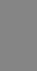

sum 349391 320494
64 133


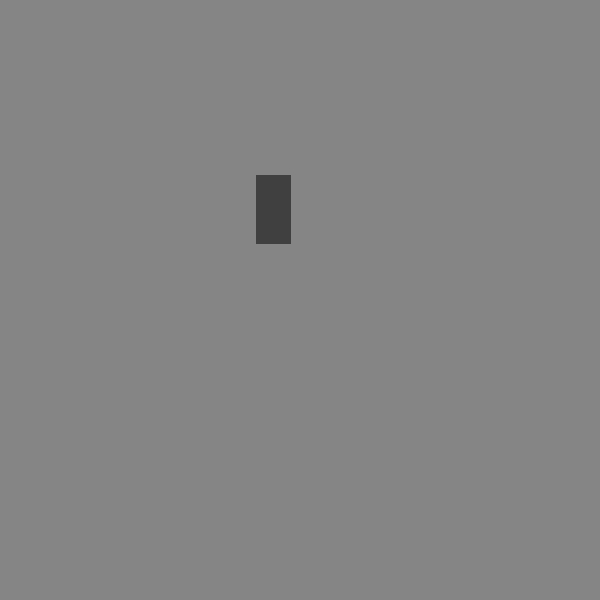

31 62


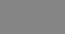

sum 293930 269620
64 133


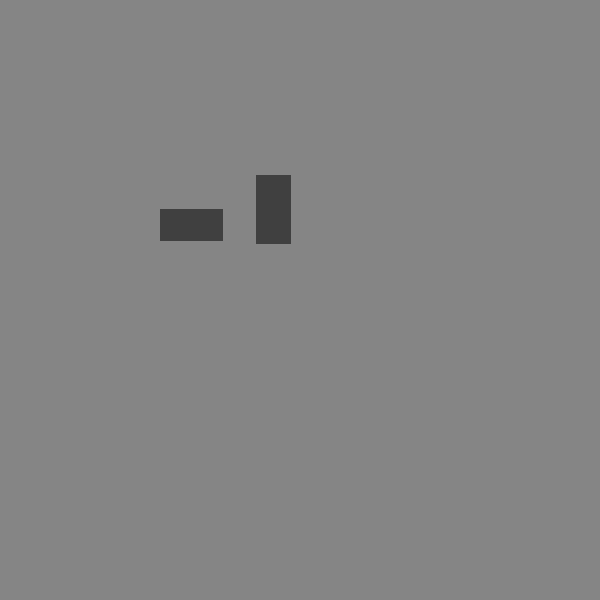

29 58


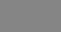

sum 259616 238144
0 133


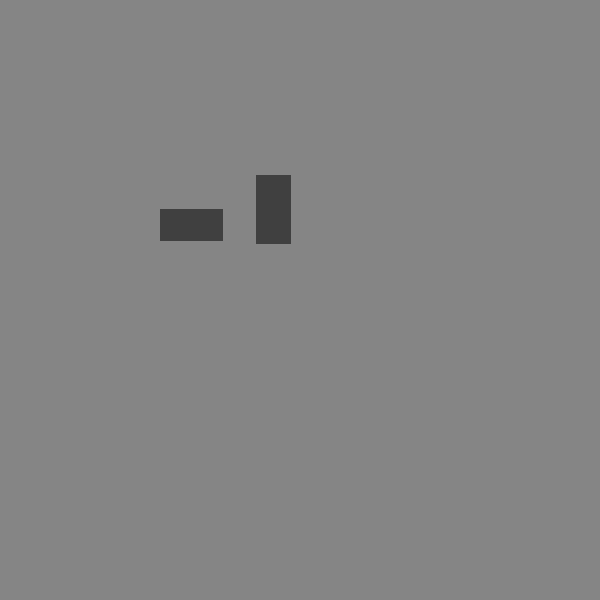

20 40


sum 131537 120658
128 133


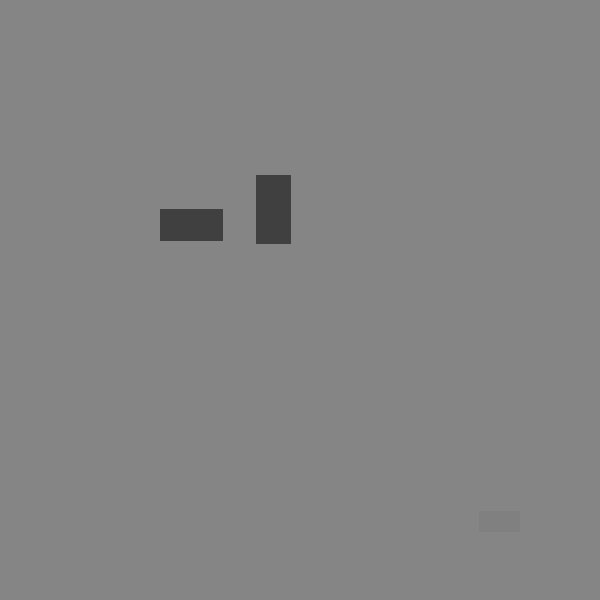

26 52


sum 212135 194590
64 133


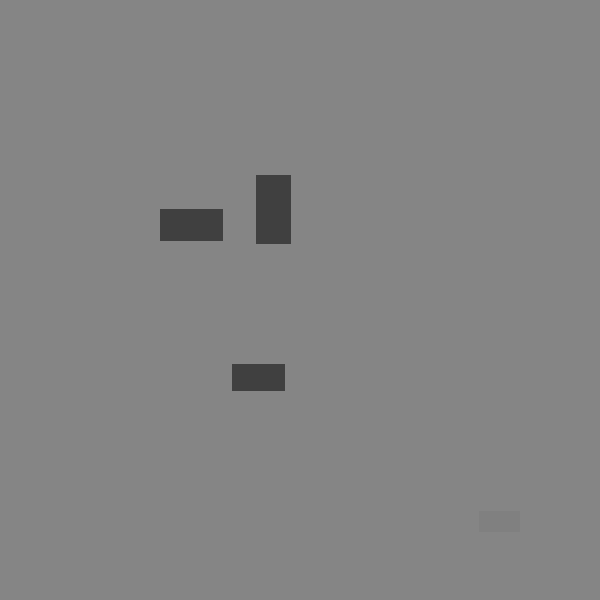

30 60


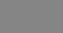

sum 276507 253638
0 133


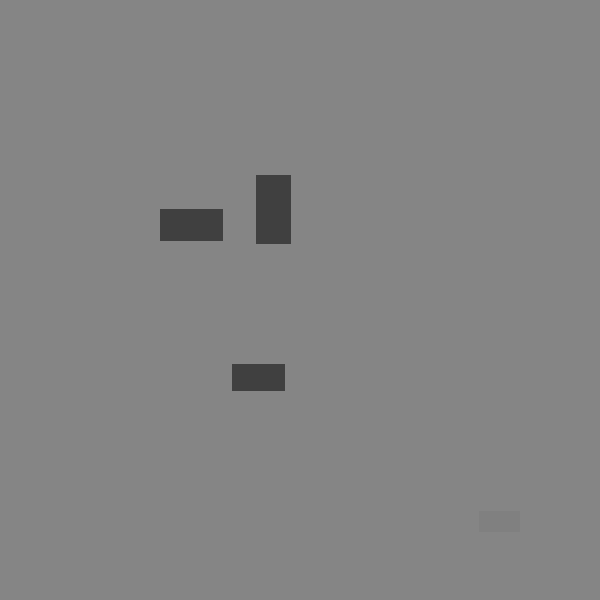

24 48


sum 183141 167994
128 133


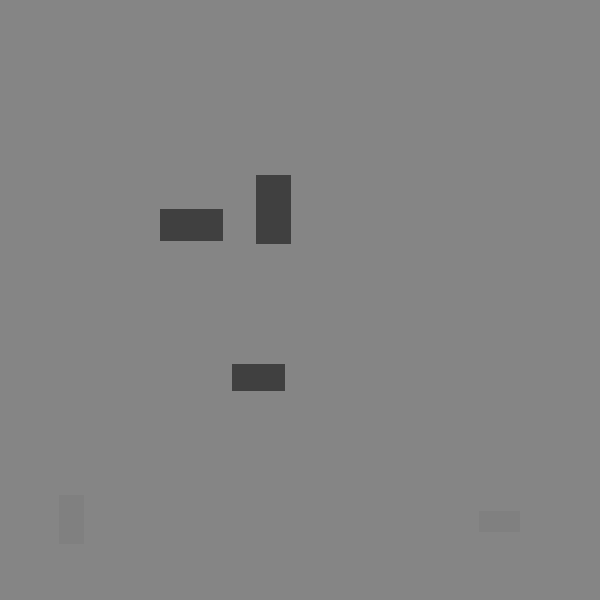

27 54


sum 227430 208620
0 133


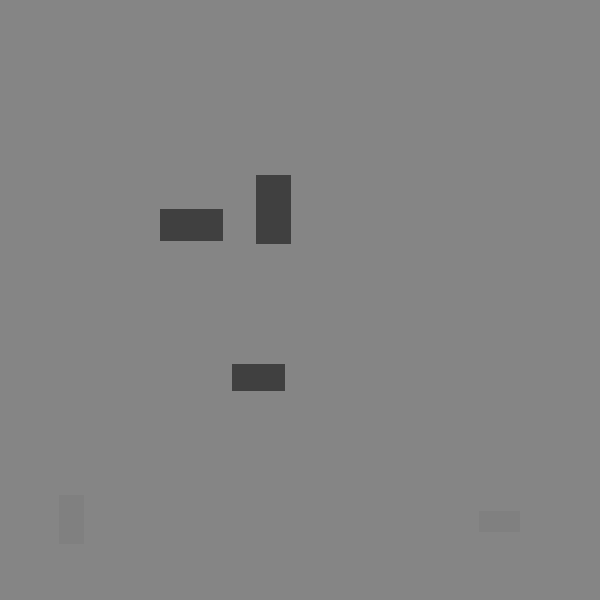

27 54


sum 196380 239670
35 70


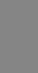

sum 368942 338428
0 133


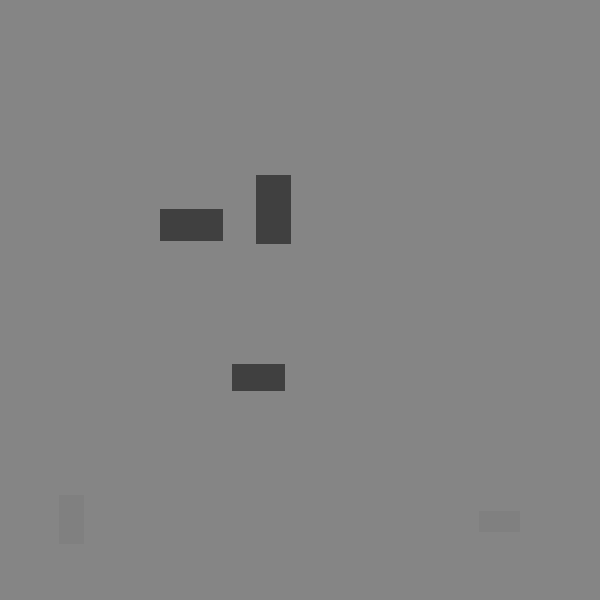

20 40


sum 131537 120658
64 133


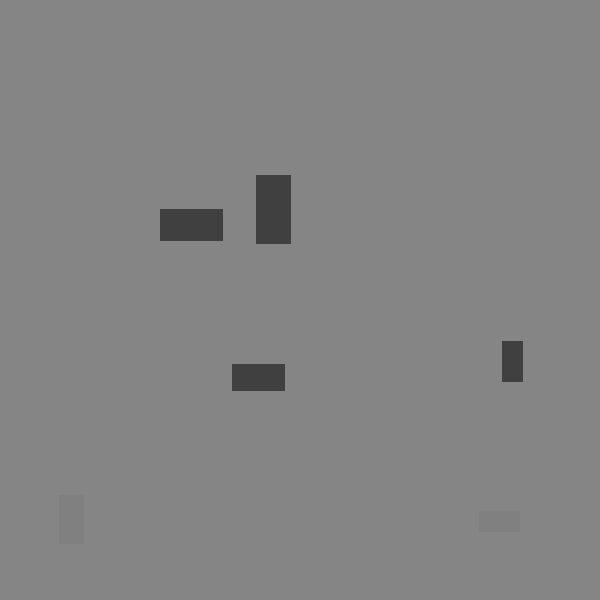

29 58


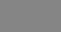

sum 259616 238144
64 133


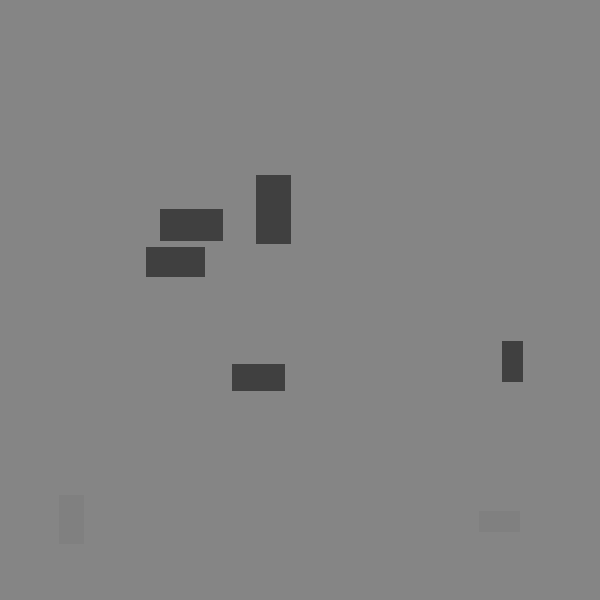

31 62


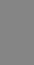

sum 293930 269620
64 133


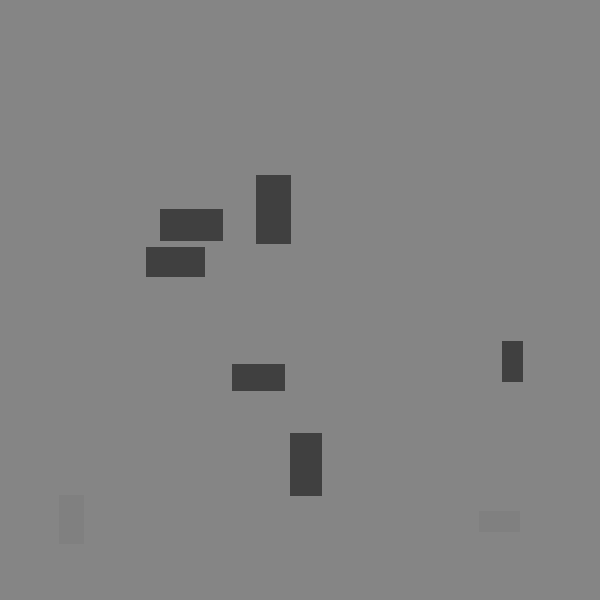

30 60


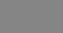

sum 276507 253638
255 133


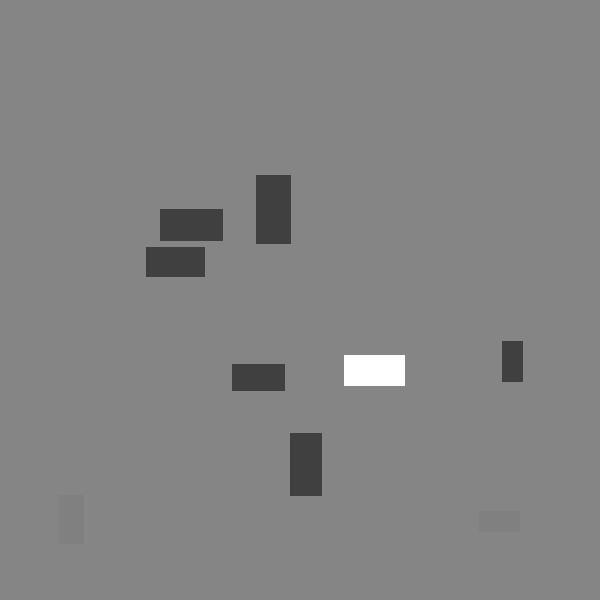

28 56


sum 243257 223138
128 133


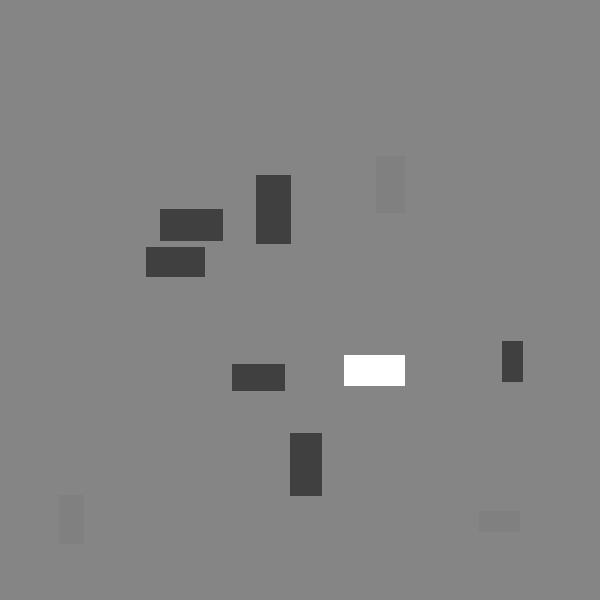

24 48


sum 176103 175032
35 70


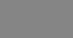

sum 368942 338428
192 133


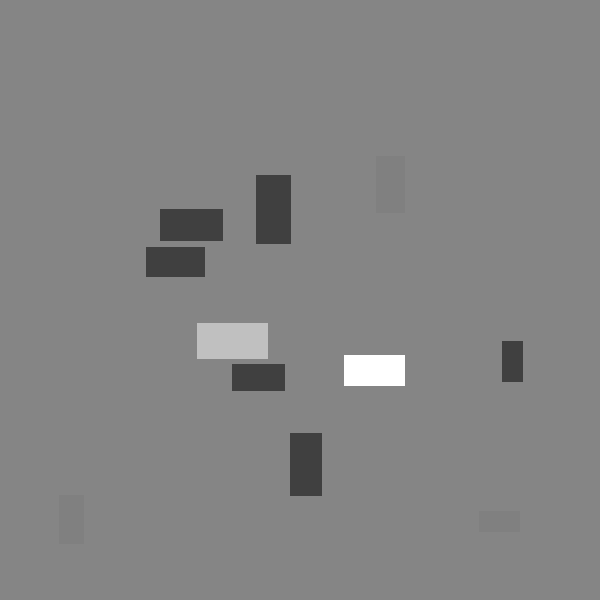

24 48


sum 183141 167994
255 133


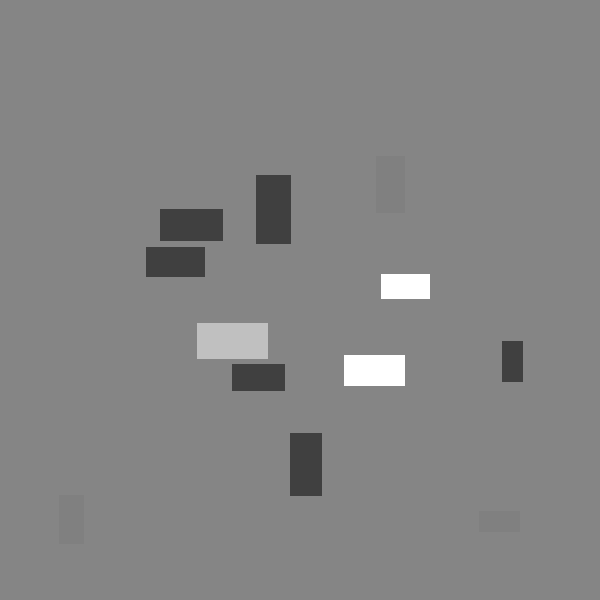

20 40


sum 131537 120658
255 133


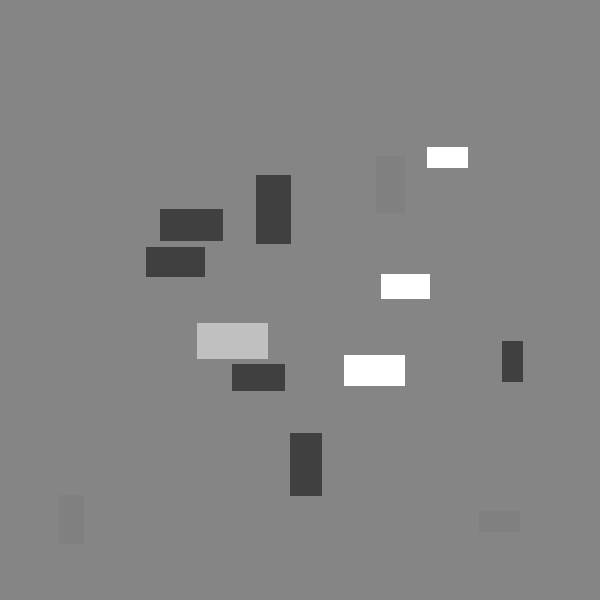

31 62


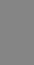

sum 293930 269620
255 133


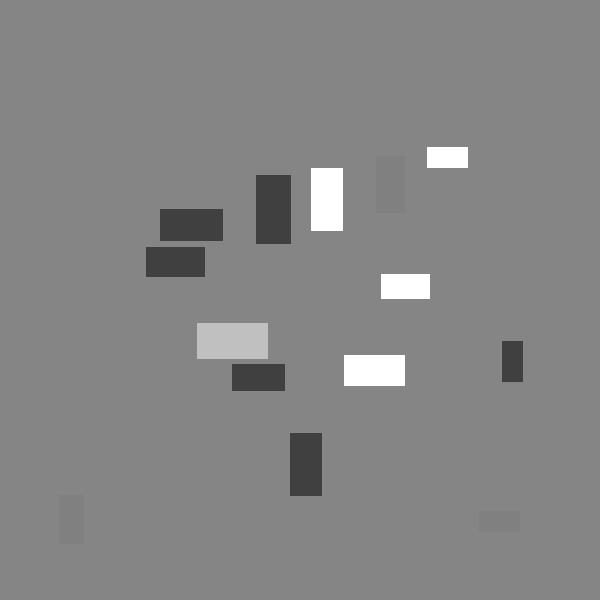

33 66


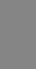

sum 330372 303048
64 133


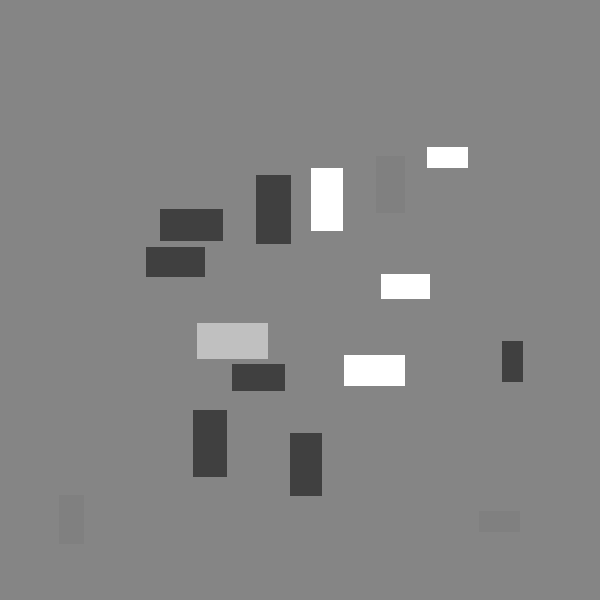

30 60


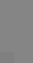

sum 275737 254408
22 44


sum 156275 143350
128 133


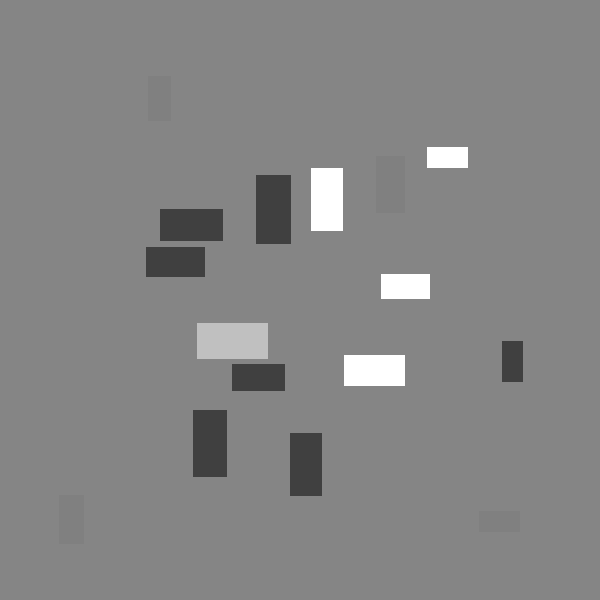

34 68


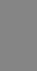

sum 349391 320494
255 133


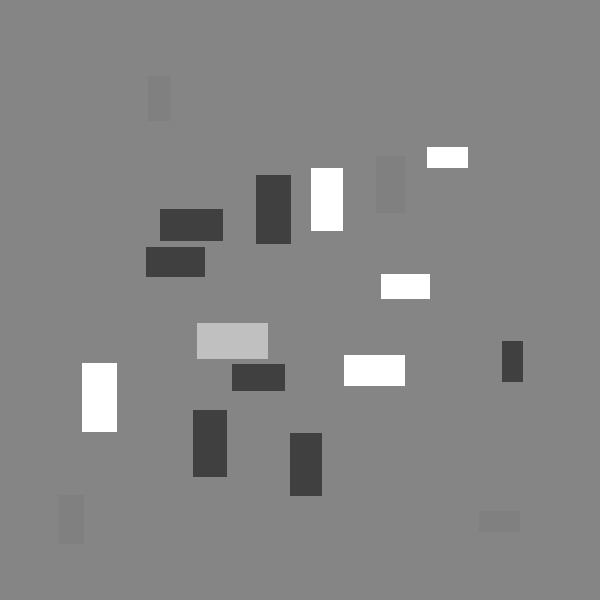

31 62


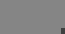

sum 292274 271276
33 66


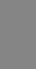

sum 330372 303048
255 133


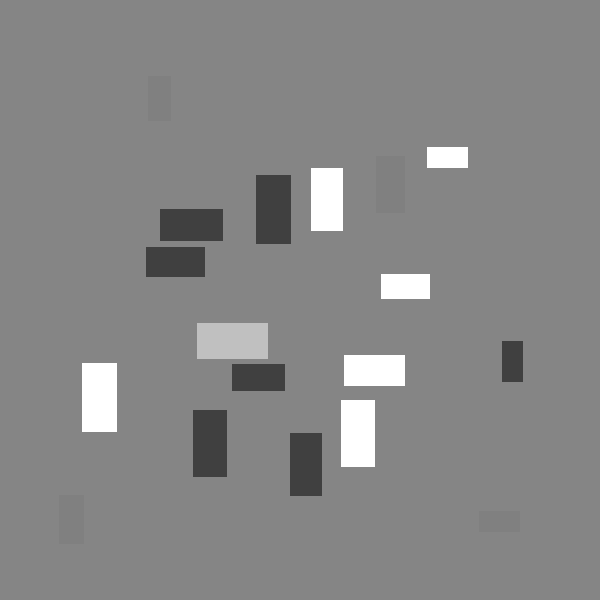

22 44


sum 156275 143350
0 133


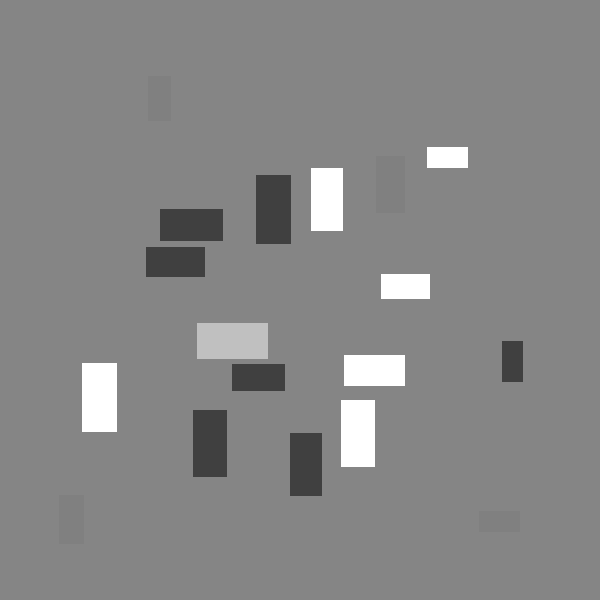

20 40


sum 129122 123073
27 54


sum 227430 208620
0 133


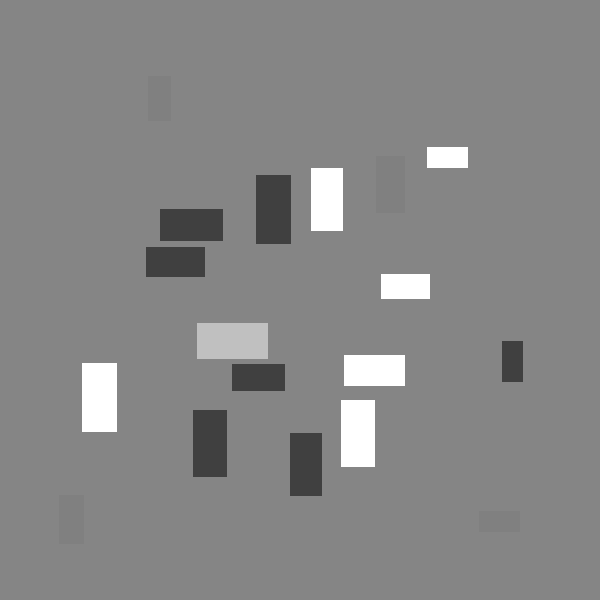

30 60


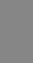

sum 276507 253638
255 133


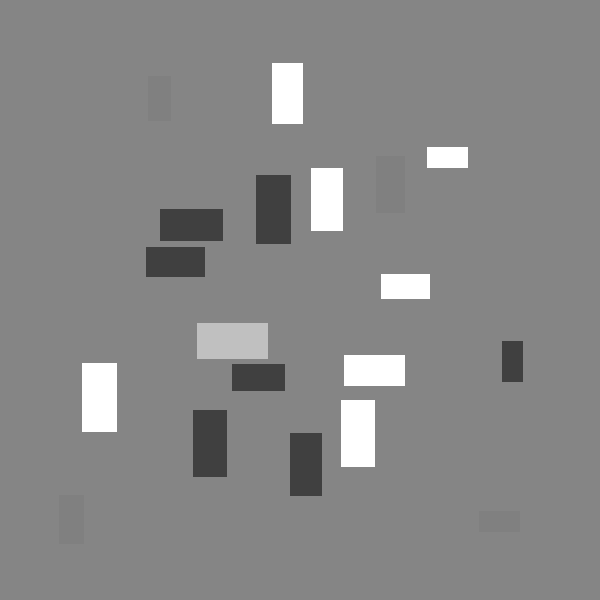

32 64


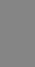

sum 311885 286090
0 133


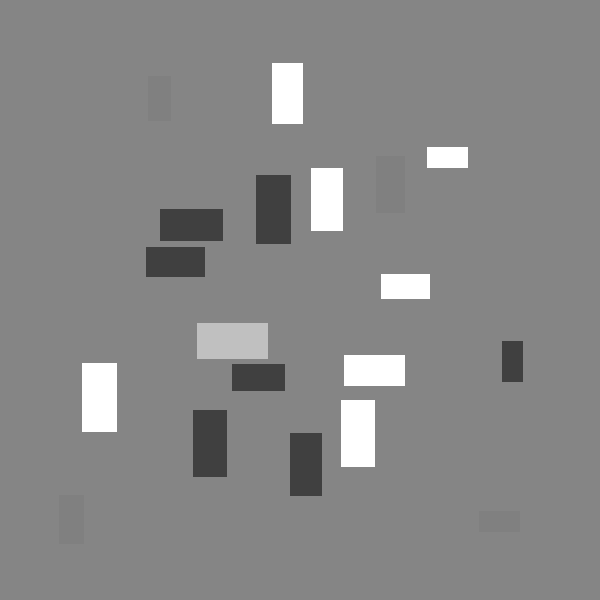

26 52


sum 212135 194590
255 133


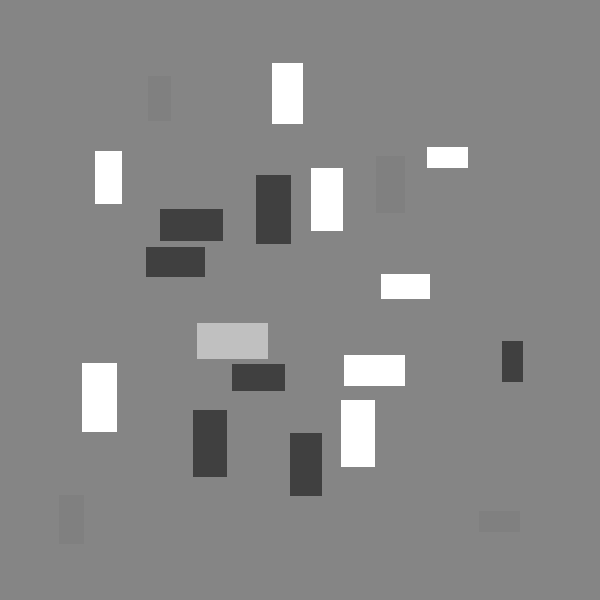

28 56


sum 259697 206698
31 62


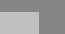

sum 344552 218998
27 54


sum 342476 93574
24 48


sum 183141 167994
128 133


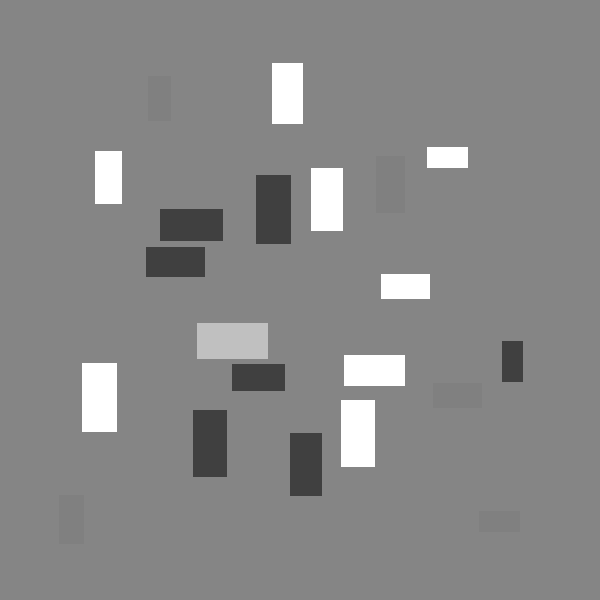

27 54


sum 231334 204716
32 64


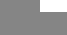

sum 351413 246562
22 44


sum 156275 143350
64 133


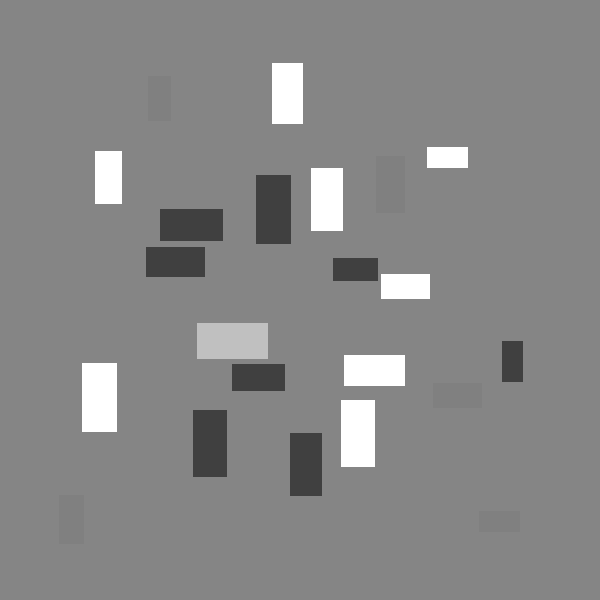

20 40


sum 145166 107029
24 48


sum 201929 149206
22 44


sum 155120 144505
21 42


sum 143640 131760
255 133


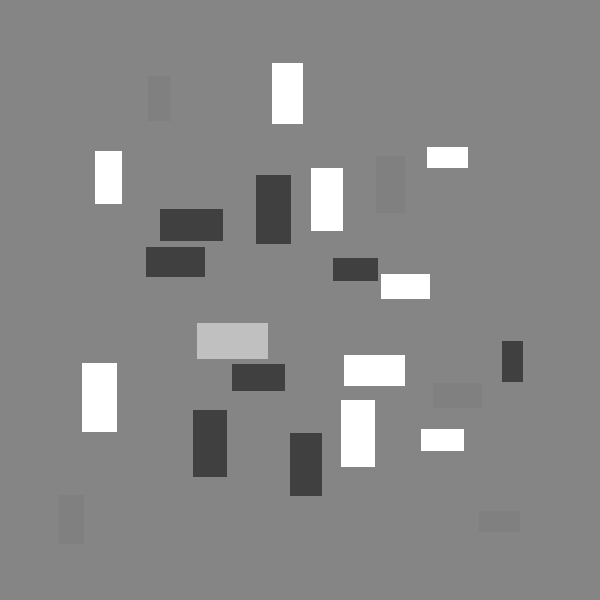

29 58


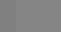

sum 257056 240704
30 60


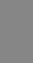

sum 276507 253638
0 133


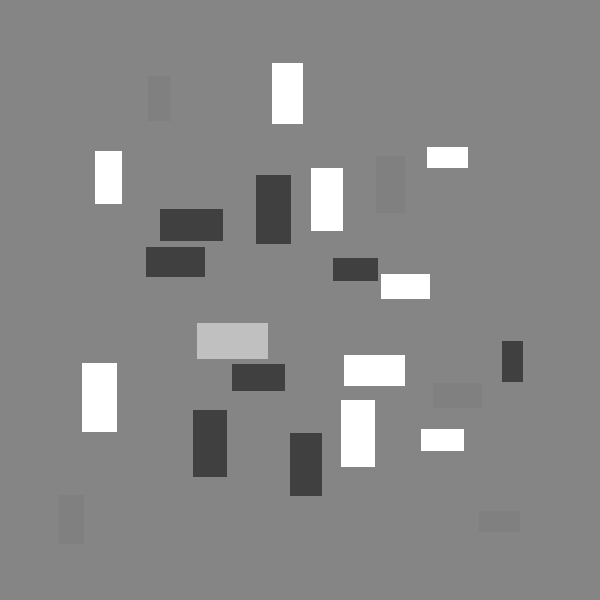

24 48


sum 183141 167994
192 133


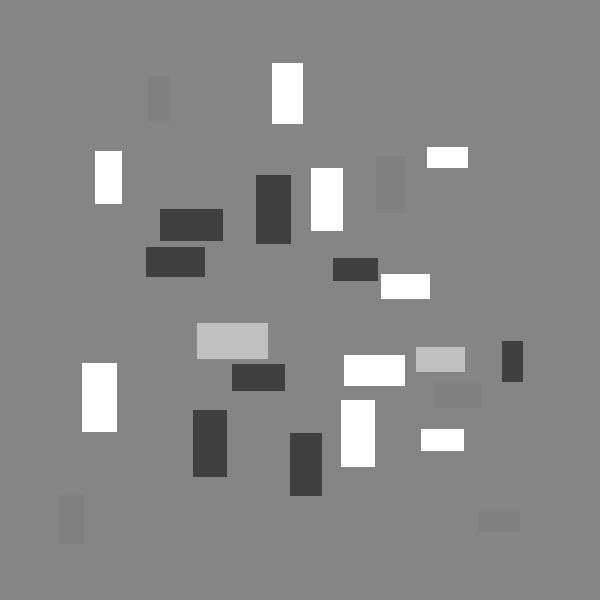

26 52


sum 212135 194590
192 133


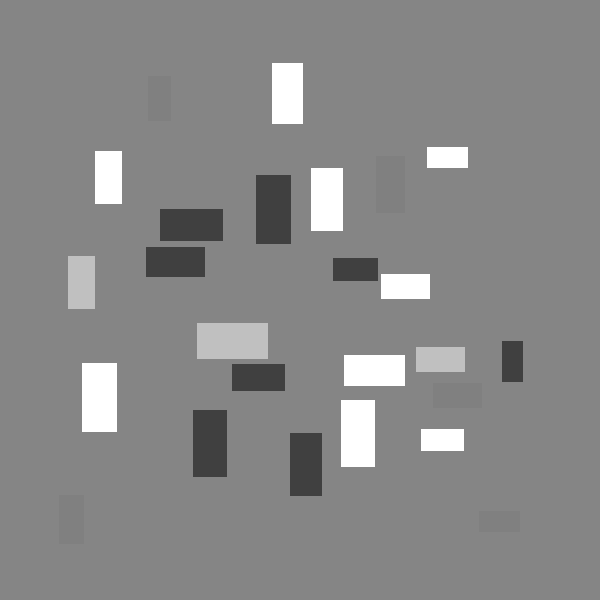

33 66


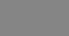

sum 330372 303048
192 133


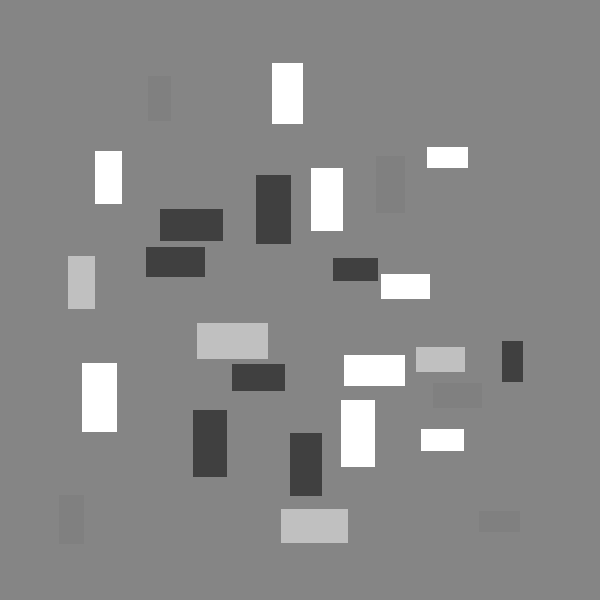

26 52


sum 345481 61244
33 66


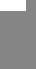

sum 365264 268156
35 70


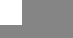

sum 436042 271328
31 62


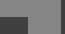

sum 251702 311848
29 58


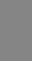

sum 259616 238144
128 133


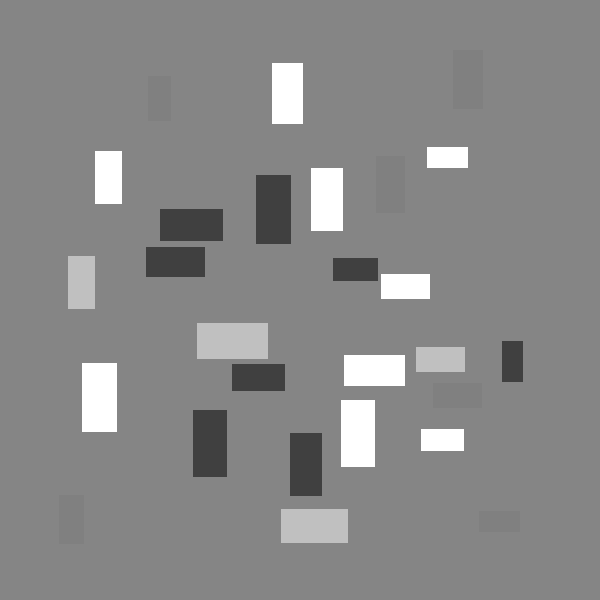

21 42


sum 143640 131760
192 133


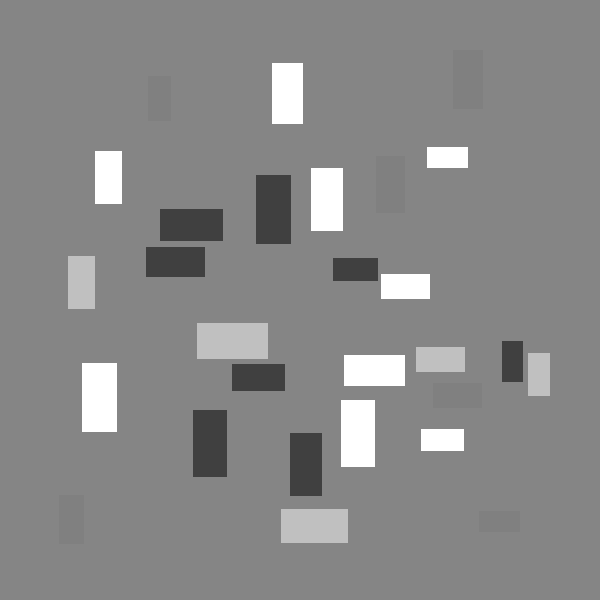

22 44


sum 156275 143350
255 133


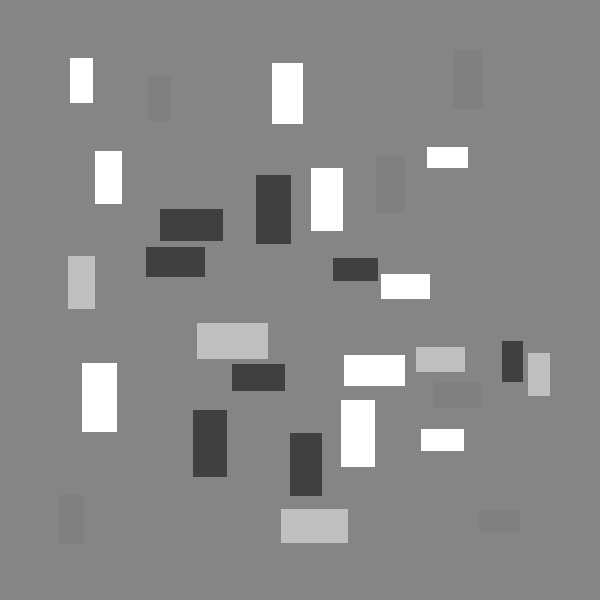

22 44


sum 139577 160048
29 58


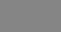

sum 259616 238144
128 133


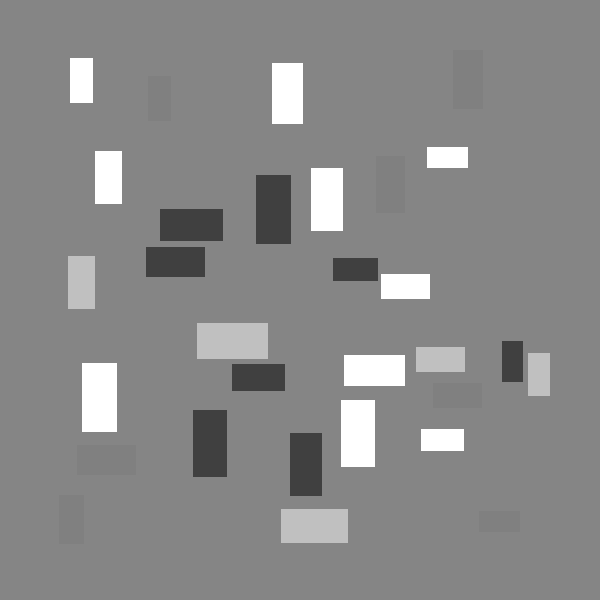

34 68


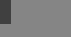

sum 331175 338710
26 52


sum 154106 252619
25 50


sum 258372 120048
28 56


sum 241812 224583
24 48


sum 123525 227610
22 44


sum 140750 158875
22 44


sum 184945 114680
34 68


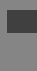

sum 301781 368104
30 60


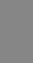

sum 276507 253638
255 133


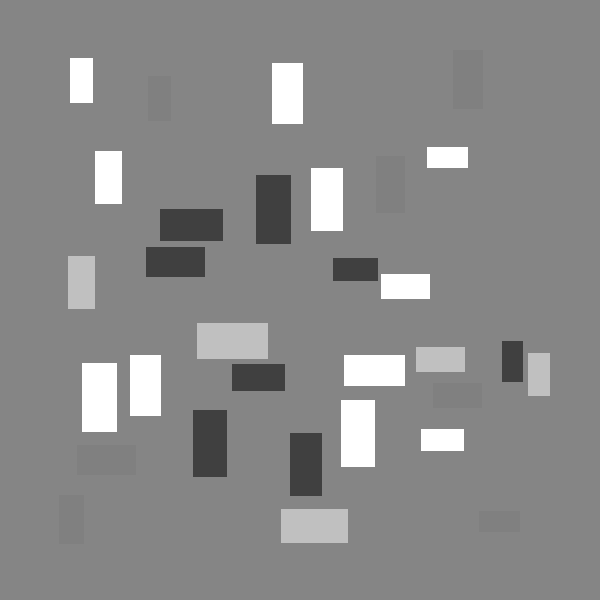

21 42


sum 181980 93420
29 58


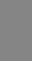

sum 259616 238144
128 133


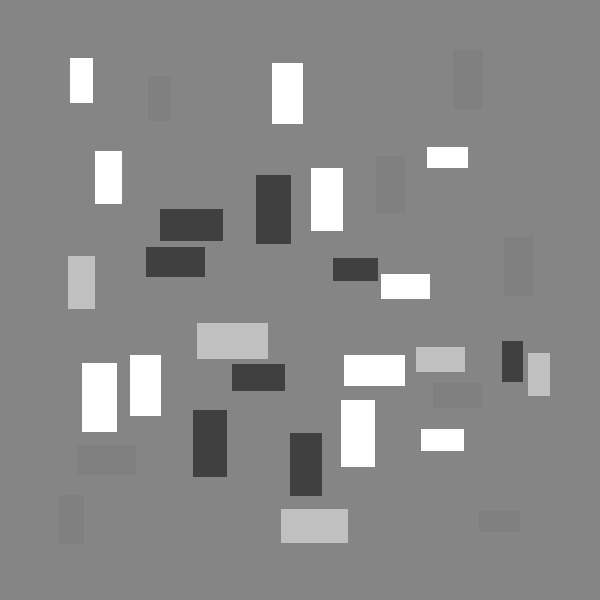

27 54


sum 241166 194884
35 70


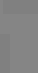

sum 364542 342828
22 44


sum 153545 146080
34 68


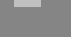

sum 360542 309343
20 40


sum 131537 120658
255 133


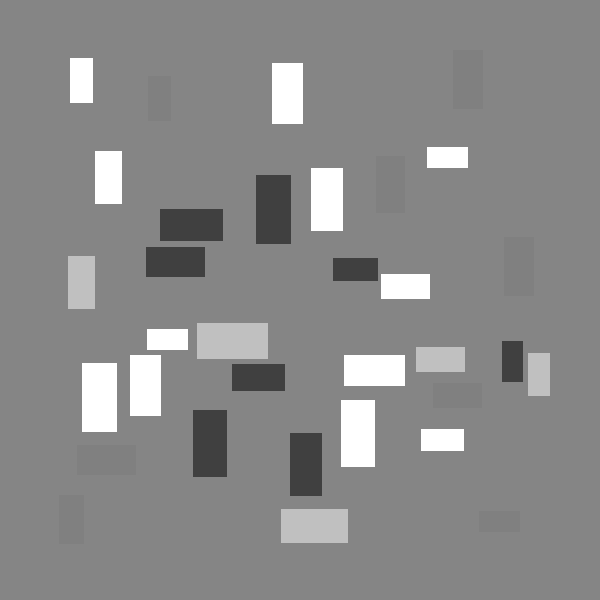

21 42


sum 142980 132420
28 56


sum 196199 270196
32 64


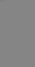

sum 311835 286140
20 40


sum 131537 120658
0 133


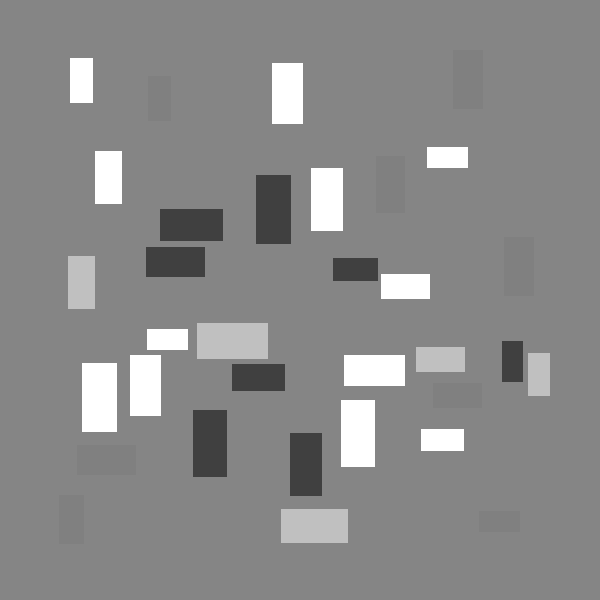

24 48


sum 183141 167994
255 133


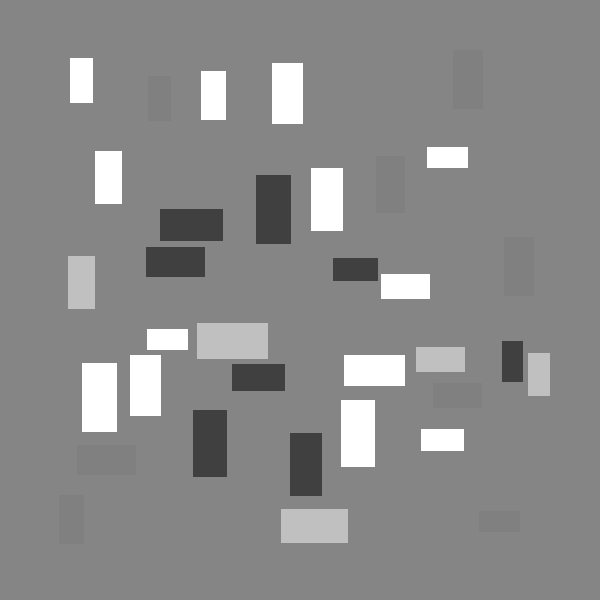

34 68


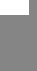

sum 402461 267424
30 60


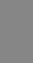

sum 276507 253638
128 133


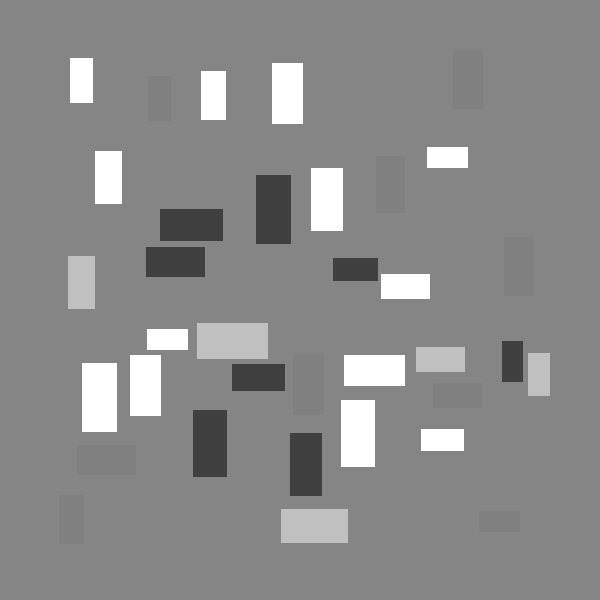

34 68


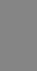

sum 349391 320494
128 133


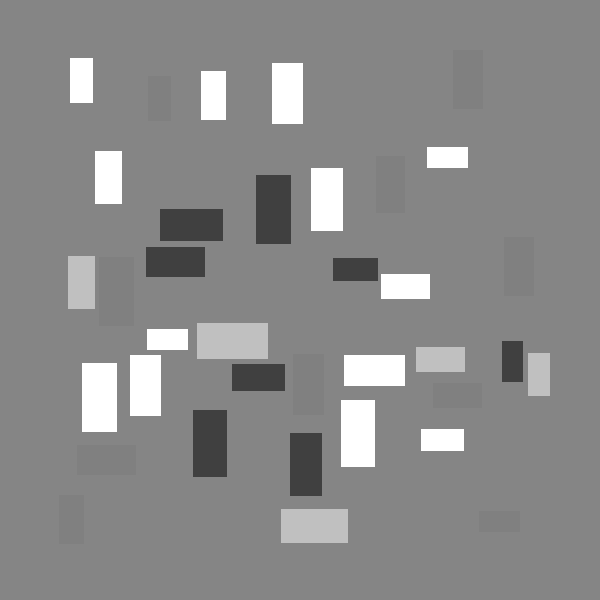

29 58


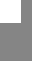

sum 318542 179218
21 42


sum 169260 106140
28 56


sum 240359 226036
24 48


sum 182691 168444
28 56


sum 250481 215914
28 56


sum 355253 111142
25 50


sum 203154 175266
22 44


sum 156275 143350
0 133


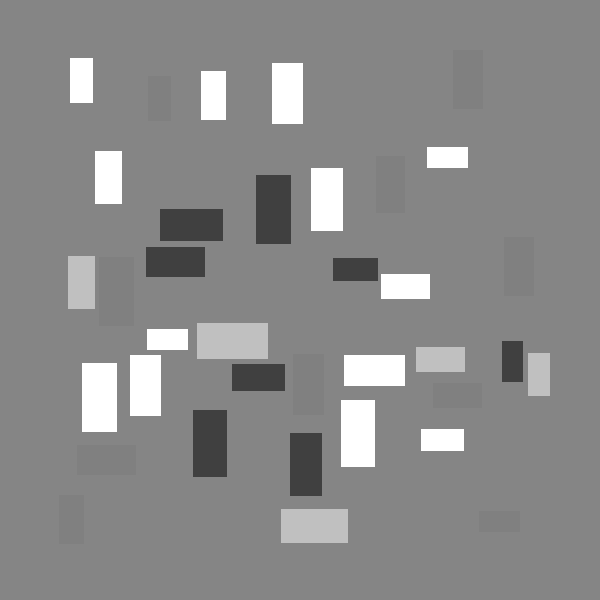

34 68


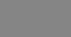

sum 349391 320494
128 133


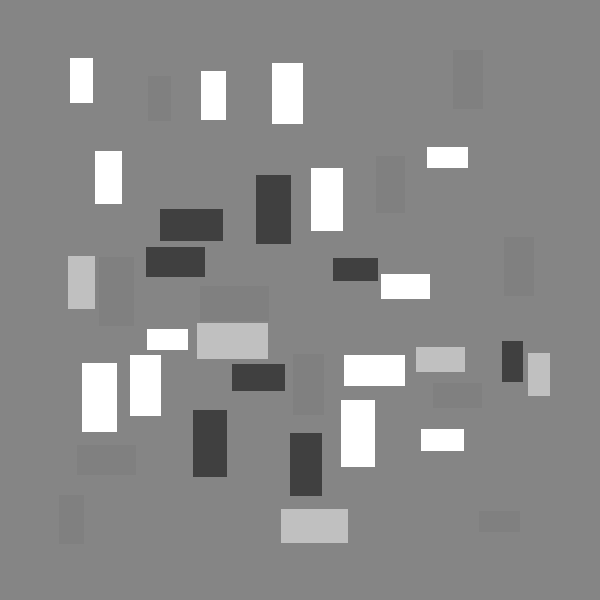

30 60


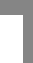

sum 411195 118950
31 62


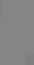

sum 293370 270180
24 48


sum 146433 204702
25 50


sum 197372 181048
0 133


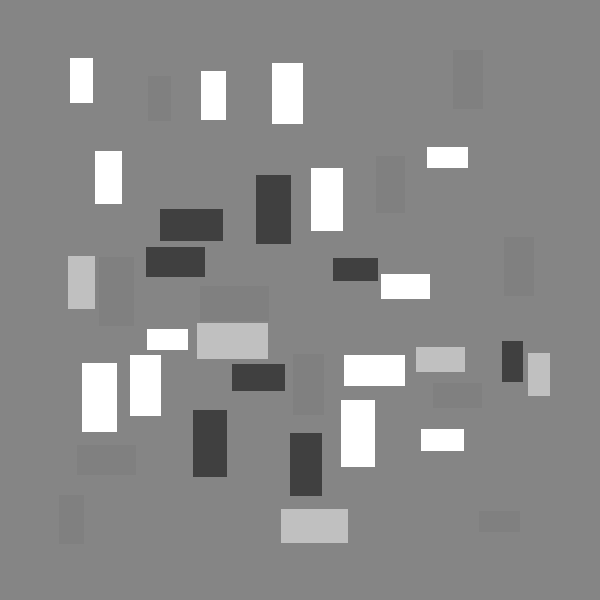

25 50


sum 213916 164504
33 66


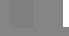

sum 346916 286504
20 40


sum 153009 99186
24 48


sum 272079 79056
24 48


sum 183141 167994
255 133


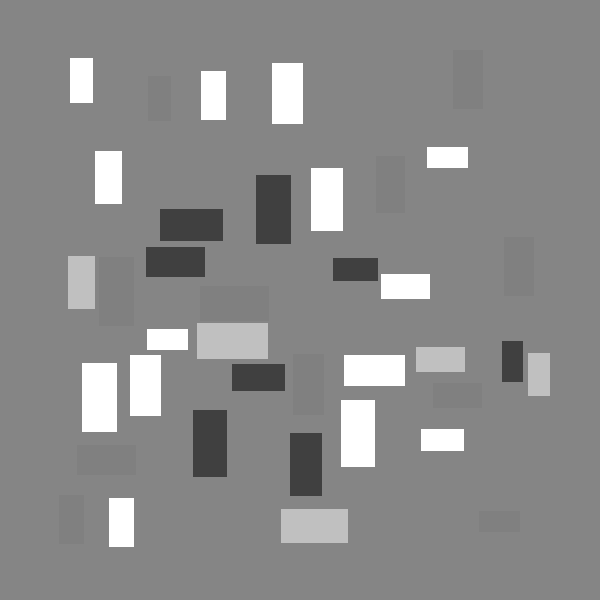

34 68


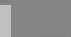

sum 369824 300061
26 52


sum 230796 175929
22 44


sum 152650 146975
23 46


sum 211954 112916
30 60


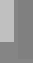

sum 306774 223371
25 50


sum 174602 203818
21 42


sum 193200 82200
22 44


sum 156275 143350
0 133


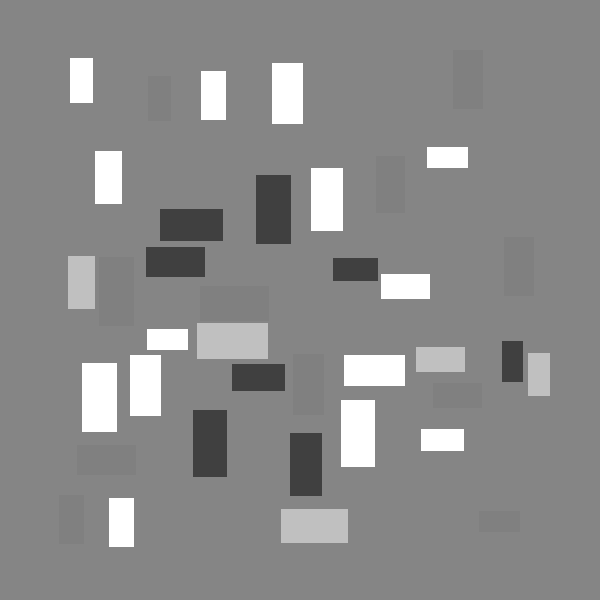

29 58


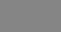

sum 259616 238144
64 133


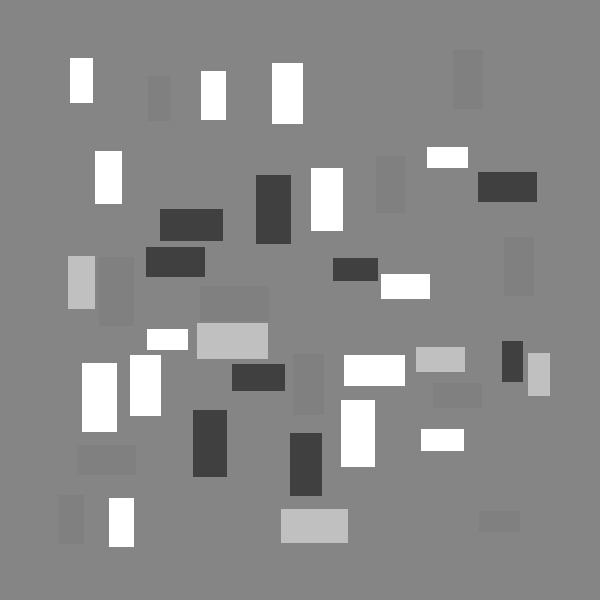

21 42


sum 143265 132135
29 58


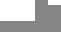

sum 357216 140544
31 62


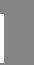

sum 317842 245708
23 46


sum 181886 142984
31 62


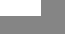

sum 373962 189588
23 46


sum 199332 125538
30 60


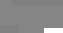

sum 286062 244083
25 50


sum 197372 181048
0 133


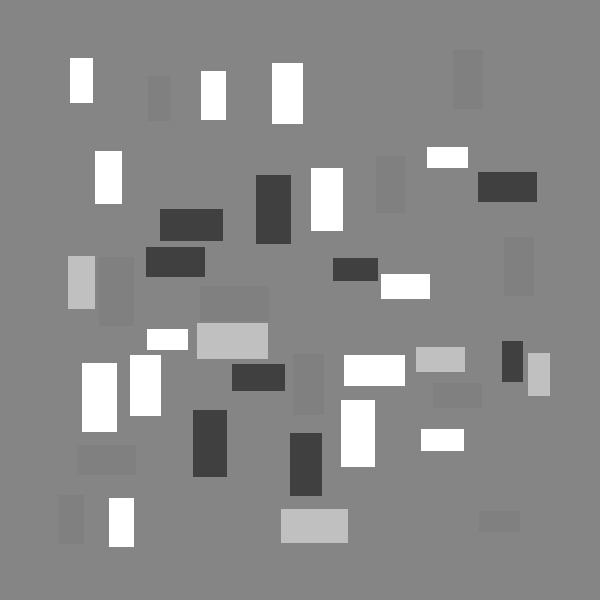

33 66


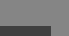

sum 295182 338238
32 64


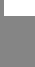

sum 372397 225578
21 42


sum 178776 96624
26 52


sum 210692 196033
28 56


sum 243257 223138
64 133


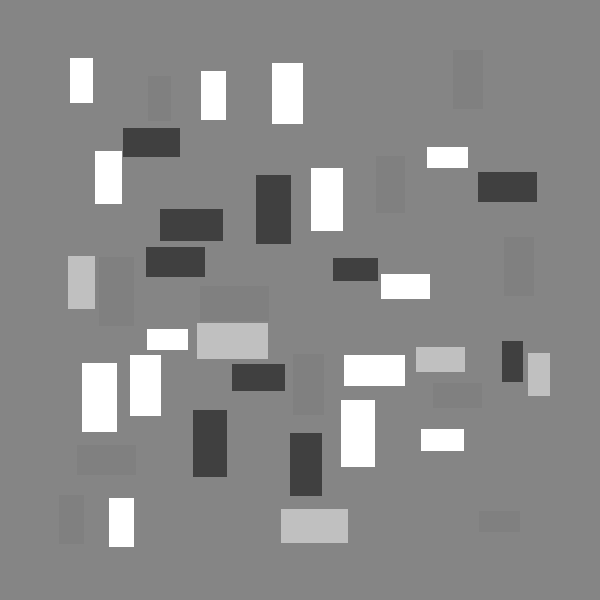

34 68


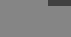

sum 339869 330016
28 56


sum 238836 227559
30 60


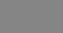

sum 276507 253638
192 133


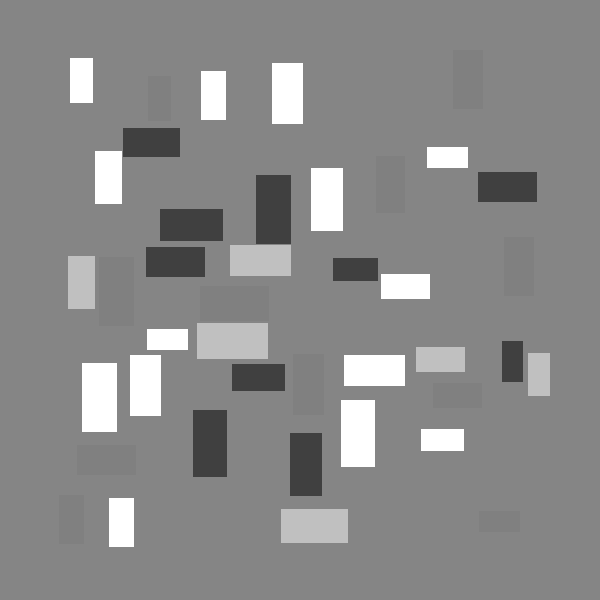

26 52


sum 233045 173680
24 48


sum 183141 167994
0 133


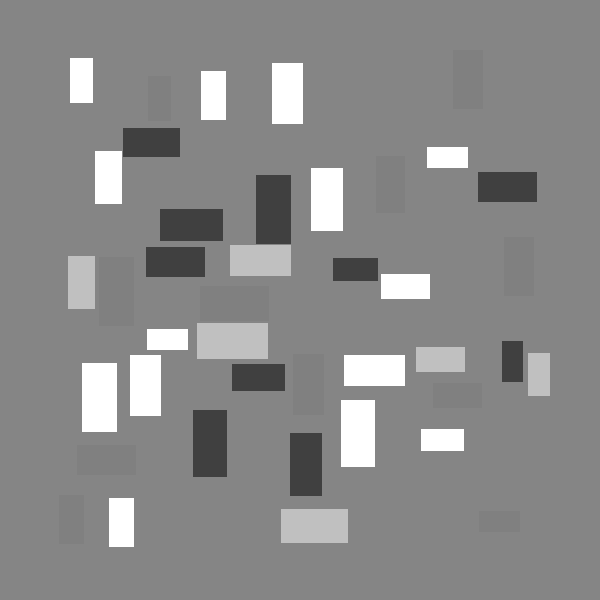

27 54


sum 237190 198860
34 68


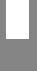

sum 458825 211060
26 52


sum 209135 197590
33 66


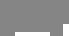

sum 356236 277184
33 66


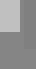

sum 365192 268228
27 54


sum 180786 255264
30 60


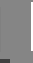

sum 285478 244667
20 40


sum 131307 120888
31 62


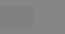

sum 290360 273190
26 52


sum 198128 208597
23 46


sum 212771 112099
34 68


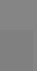

sum 342626 327259
33 66


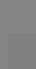

sum 325472 307948
31 62


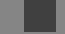

sum 223274 340276
32 64


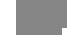

sum 384475 213500
33 66


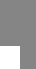

sum 386492 246928
30 60


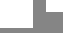

sum 414123 116022
33 66


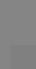

sum 327372 306048
23 46


sum 169442 155428
0 133


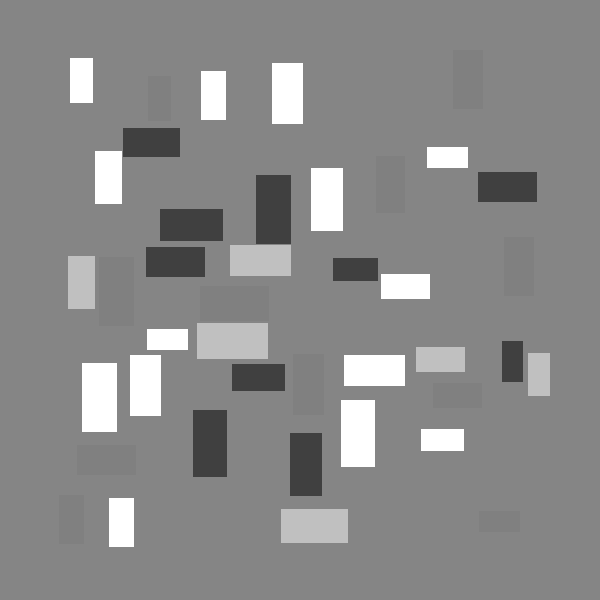

30 60


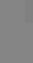

sum 275587 254558
34 68


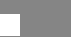

sum 403071 266814
20 40


sum 131537 120658
64 133


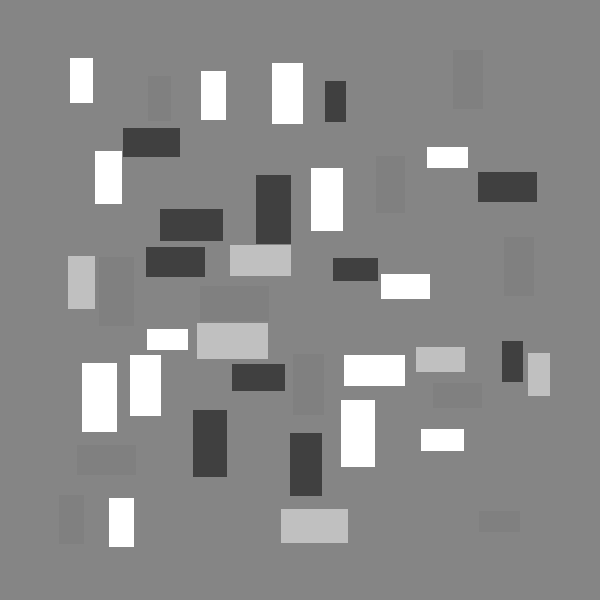

25 50


sum 197372 181048
64 133


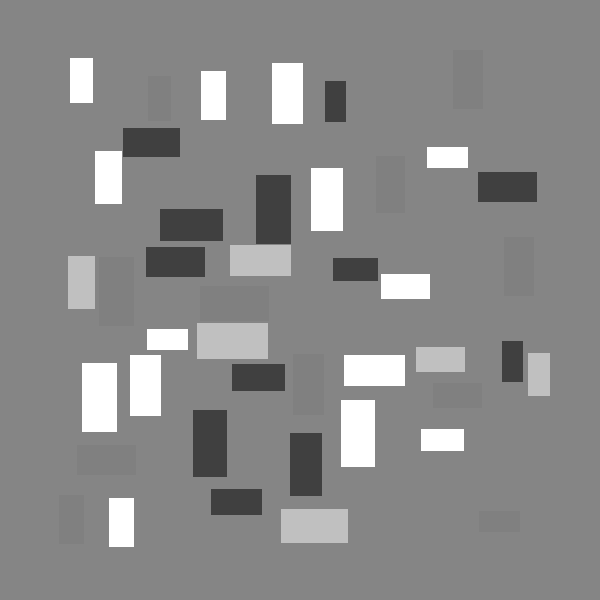

25 50


sum 293020 85400
27 54


sum 226740 209310
20 40


sum 131217 120978
29 58


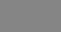

sum 259616 238144
255 133


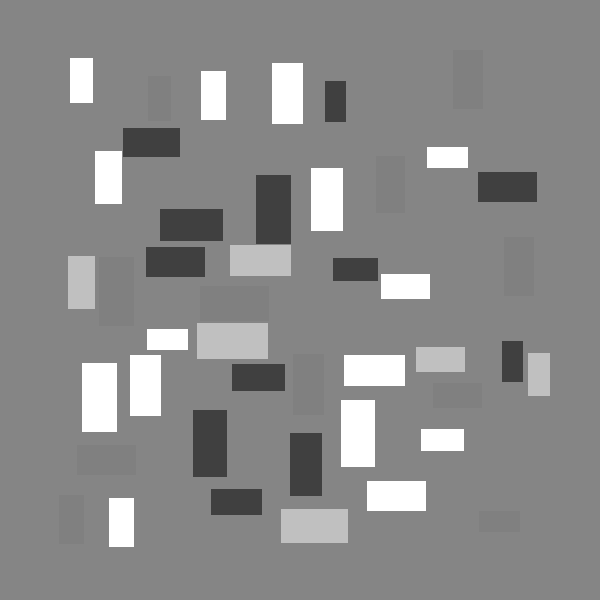

35 70


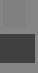

sum 295802 411568
26 52


sum 242147 164578
27 54


sum 227150 208900
23 46


sum 239848 85022
35 70


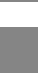

sum 484842 222528
21 42


sum 154831 120569
26 52


sum 216459 190266
20 40


sum 122429 129766
26 52


sum 288263 118462
21 42


sum 152180 123220
21 42


sum 147498 127902
20 40


sum 130727 121468
20 40


sum 210105 42090
34 68


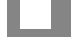

sum 490667 179218
23 46


sum 181949 142921
34 68


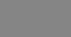

sum 349391 320494
64 133


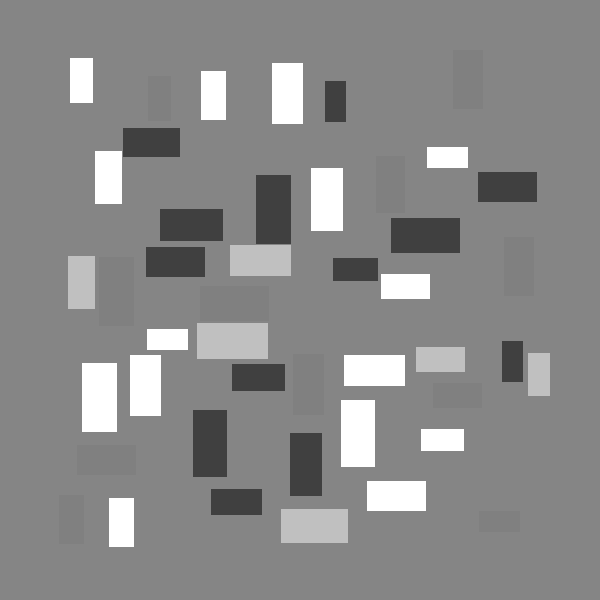

29 58


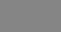

sum 259616 238144
0 133


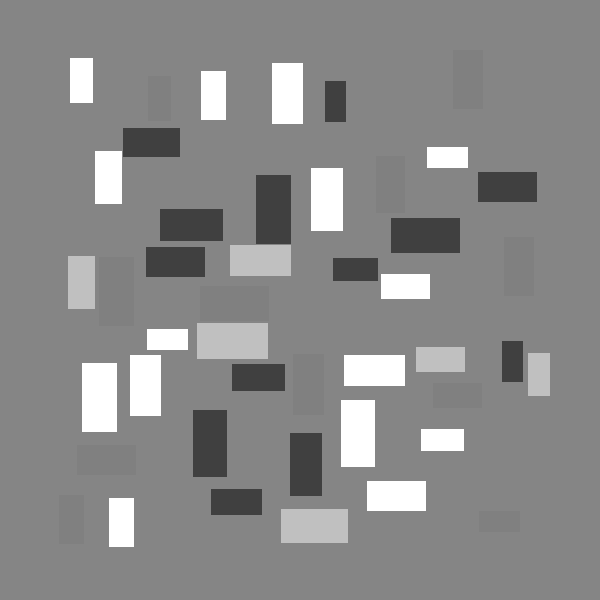

31 62


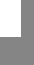

sum 388724 174826
24 48


sum 198962 152173
23 46


sum 164102 160768
25 50


sum 196392 182028
23 46


sum 209092 115778
35 70


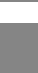

sum 466298 241072
29 58


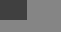

sum 222356 275404
26 52


sum 403187 3538
28 56


sum 188050 278345
33 66


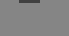

sum 326025 307395
31 62


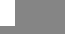

sum 341510 222040
25 50


sum 184806 193614
35 70


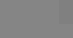

sum 367262 340108
30 60


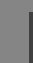

sum 262431 267714
21 42


sum 133497 141903
27 54


sum 227430 208620
128 133


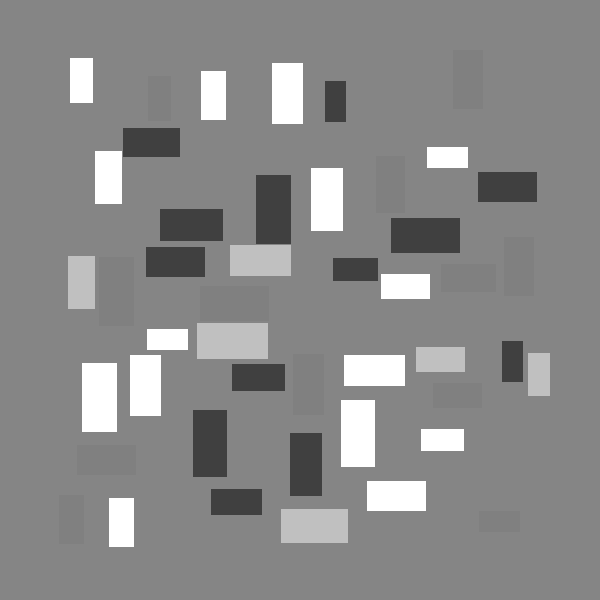

21 42


sum 105552 169848
29 58


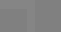

sum 252351 245409
29 58


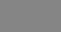

sum 259616 238144
192 133


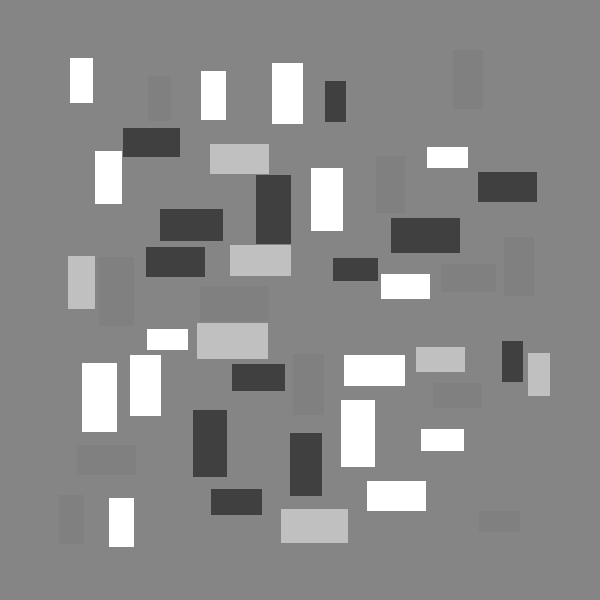

33 66


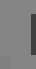

sum 315512 317908
31 62


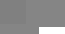

sum 313014 250536
34 68


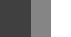

sum 360528 309357
33 66


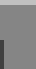

sum 332988 300432
22 44


sum 206425 93200
24 48


sum 182865 168270
25 50


sum 229756 148664
29 58


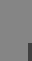

sum 254648 243112
23 46


sum 167352 157518
35 70


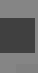

sum 283427 423943
29 58


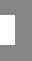

sum 314516 183244
27 54


sum 216015 220035
33 66


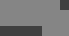

sum 295182 338238
34 68


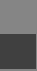

sum 262451 407434
34 68


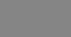

sum 349391 320494
64 133


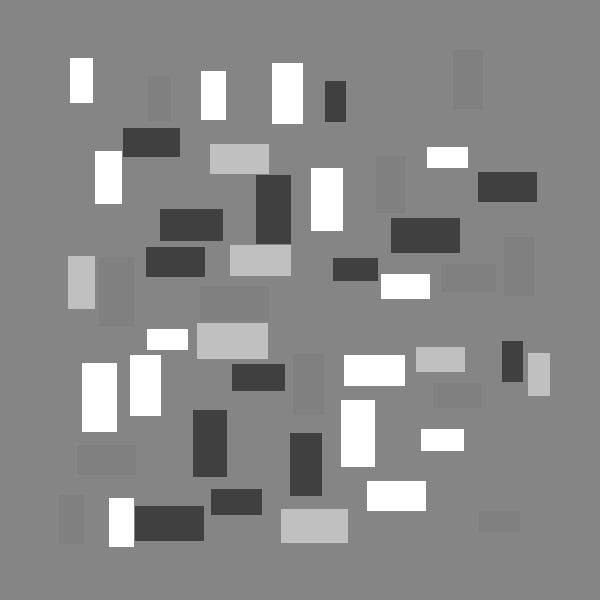

25 50


sum 237244 141176
24 48


sum 182921 168214
26 52


sum 339625 67100
32 64


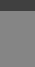

sum 285320 312655
31 62


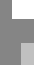

sum 361800 201750
30 60


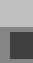

sum 286227 243918
31 62


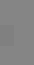

sum 292460 271090
27 54


sum 223855 212195
30 60


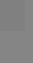

sum 272632 257513
29 58


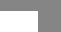

sum 356972 140788
33 66


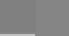

sum 328742 304678
26 52


sum 178808 227917
29 58


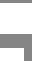

sum 418704 79056
25 50


sum 171290 207130
30 60


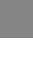

sum 377157 152988
24 48


sum 200067 151068
30 60


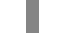

sum 477807 52338
24 48


sum 183141 167994
128 133


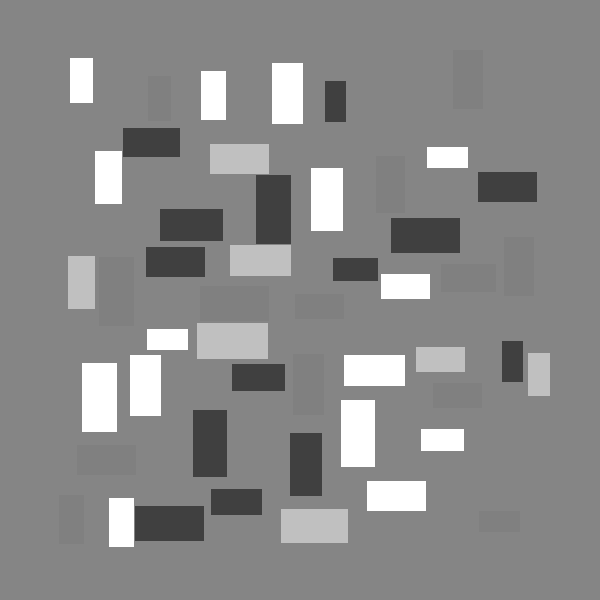

31 62


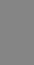

sum 293930 269620
192 133


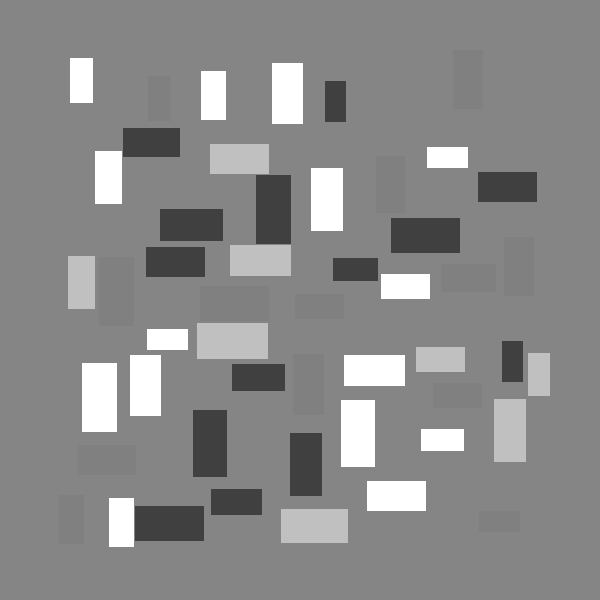

30 60


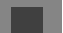

sum 223125 307020
29 58


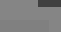

sum 245567 252193
28 56


sum 269100 197295
34 68


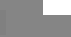

sum 399881 270004
25 50


sum 193472 184948
22 44


sum 182165 117460
21 42


sum 208056 67344
28 56


sum 240748 225647
35 70


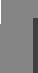

sum 352895 354475
20 40


sum 201687 50508
26 52


sum 174125 232600
27 54


sum 235646 200404
35 70


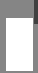

sum 536900 170470
27 54


sum 293310 142740
32 64


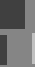

sum 252857 345118
21 42


sum 129036 146364
21 42


sum 142380 133020
26 52


sum 209715 197010
28 56


sum 237345 229050
23 46


sum 166667 158203
25 50


sum 250320 128100
20 40


sum 138966 113229
28 56


sum 166943 299452
22 44


sum 119690 179935
20 40


sum 178751 73444
21 42


sum 142430 132970
24 48


sum 192143 158992
34 68


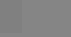

sum 345761 324124
30 60


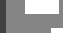

sum 328237 201908
27 54


sum 259642 176408
24 48


sum 172515 178620
32 64


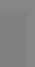

sum 304595 293380
33 66


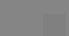

sum 327842 305578
21 42


sum 219402 55998
27 54


sum 263919 172131
25 50


sum 211542 166878
32 64


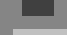

sum 295673 302302
22 44


sum 133022 166603
22 44


sum 99350 200275
31 62


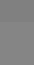

sum 290190 273360
26 52


sum 208945 197780
27 54


sum 223980 212070
30 60


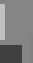

sum 259323 270822
21 42


sum 206836 68564
33 66


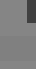

sum 311589 321831
34 68


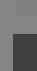

sum 286439 383446
30 60


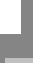

sum 371875 158270
30 60


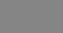

sum 276507 253638
192 133


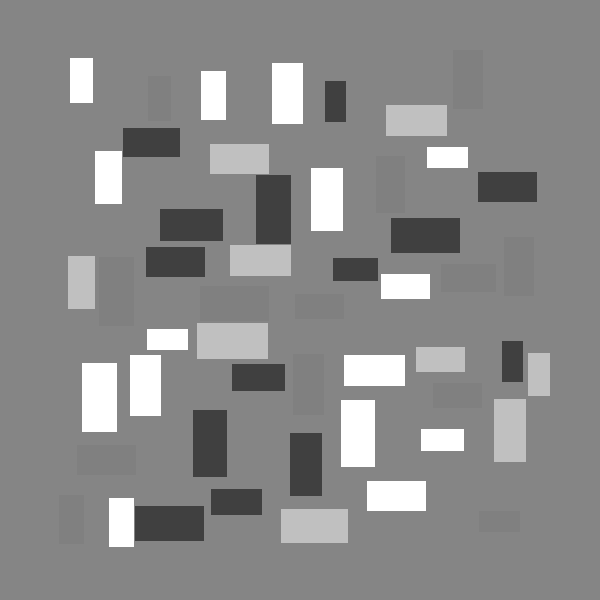

20 40


sum 137520 114675
27 54


sum 215280 220770
21 42


sum 161385 114015
34 68


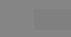

sum 345506 324379
33 66


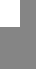

sum 396252 237168
32 64


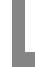

sum 473413 124562
26 52


sum 152105 254620
31 62


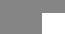

sum 352856 210694
20 40


sum 127237 124958
23 46


sum 88298 236572
35 70


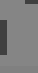

sum 347119 360251
34 68


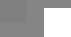

sum 441812 228073
24 48


sum 183141 167994
255 133


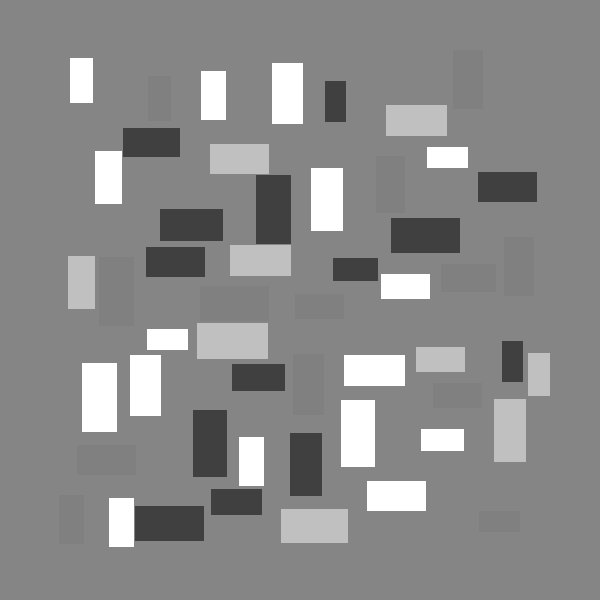

26 52


sum 300585 106140
30 60


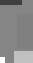

sum 283229 246916
30 60


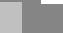

sum 327481 202664
22 44


sum 205075 94550
30 60


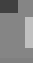

sum 274168 255977
26 52


sum 256055 150670
32 64


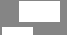

sum 447183 150792
24 48


sum 229013 122122
23 46


sum 122798 202072
21 42


sum 145941 129459
20 40


sum 70771 181424
25 50


sum 181433 196987
24 48


sum 175113 176022
29 58


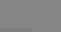

sum 258976 238784
27 54


sum 226935 209115
25 50


sum 183992 194428
30 60


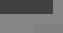

sum 224149 305996
29 58


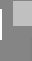

sum 294965 202795
23 46


sum 165542 159328
31 62


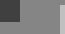

sum 272125 291425
35 70


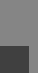

sum 314915 392455
20 40


sum 154052 98143
21 42


sum 171342 104058
31 62


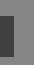

sum 254324 309226
26 52


sum 232227 174498
25 50


sum 201764 176656
23 46


sum 153020 171850
24 48


sum 155610 195525
34 68


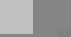

sum 415069 254816
21 42


sum 214156 61244
24 48


sum 233781 117354
30 60


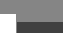

sum 278681 251464
24 48


sum 167649 183486
23 46


sum 145454 179416
35 70


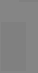

sum 362627 344743
35 70


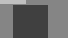

sum 318563 388807
30 60


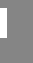

sum 302127 228018
27 54


sum 224370 211680
26 52


sum 226070 180655
29 58


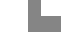

sum 407968 89792
32 64


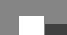

sum 353137 244838
30 60


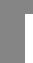

sum 324331 205814
29 58


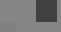

sum 227018 270742
27 54


sum 227430 208620
64 133


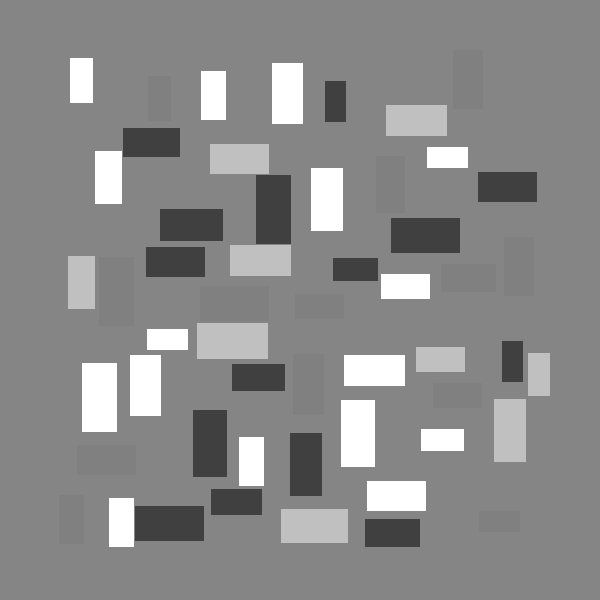

29 58


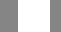

sum 384544 113216
23 46


sum 213785 111085
35 70


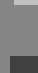

sum 343178 364192
35 70


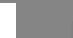

sum 437092 270278
20 40


sum 131537 120658
255 133


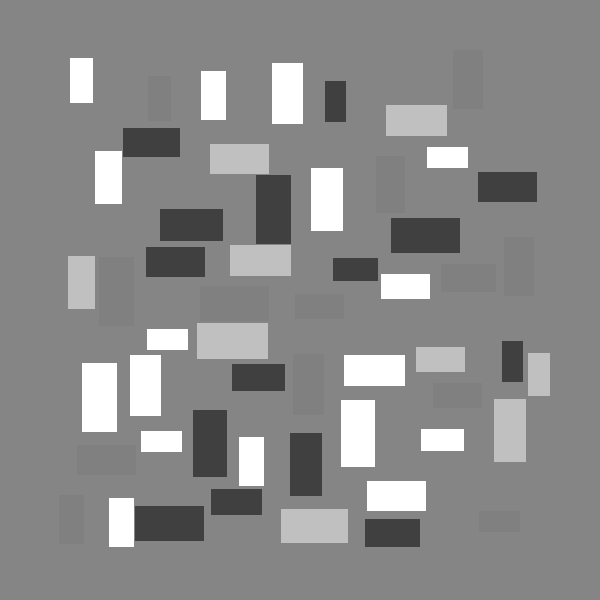

32 64


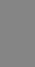

sum 311885 286090
192 133


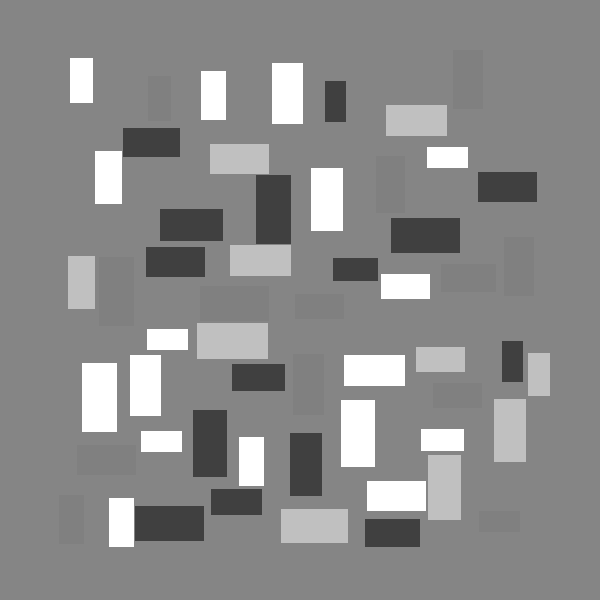

28 56


sum 243257 223138
128 133


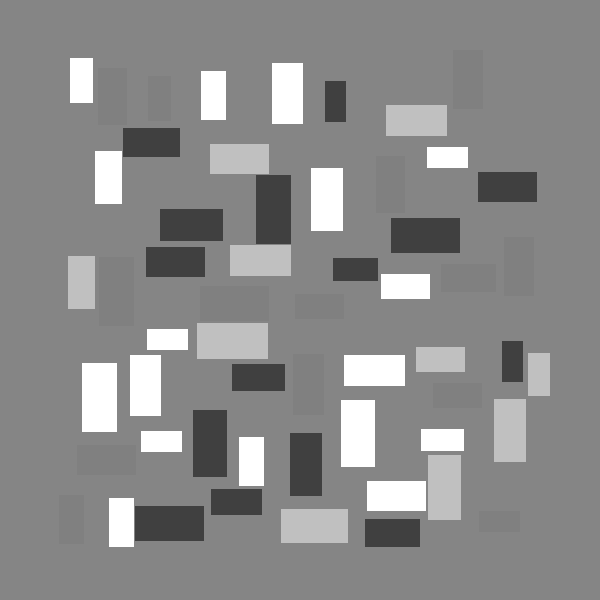

26 52


sum 174219 232506
20 40


sum 83927 168268
30 60


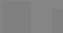

sum 270547 259598
30 60


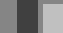

sum 262910 267235
21 42


sum 237336 38064
31 62


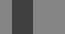

sum 244664 318886
27 54


sum 236640 199410
30 60


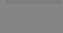

sum 275407 254738
34 68


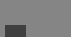

sum 332003 337882
31 62


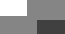

sum 319586 243964
26 52


sum 212135 194590
128 133


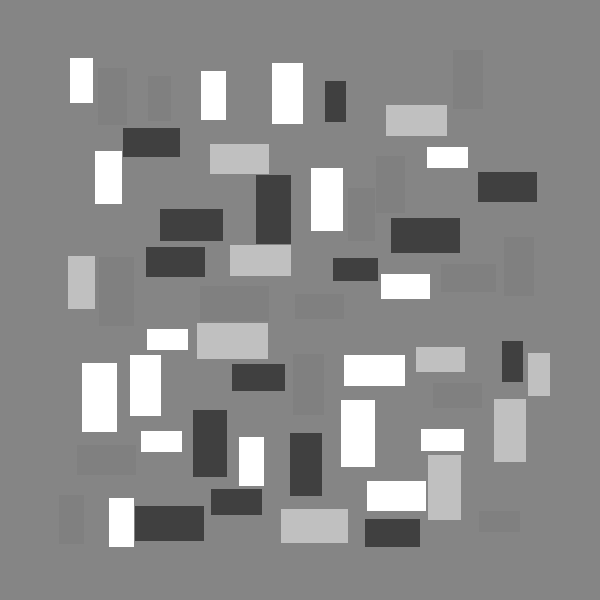

27 54


sum 222760 213290
25 50


sum 243728 134692
30 60


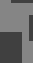

sum 217719 312426
25 50


sum 194152 184268
27 54


sum 258220 177830
23 46


sum 169442 155428
192 133


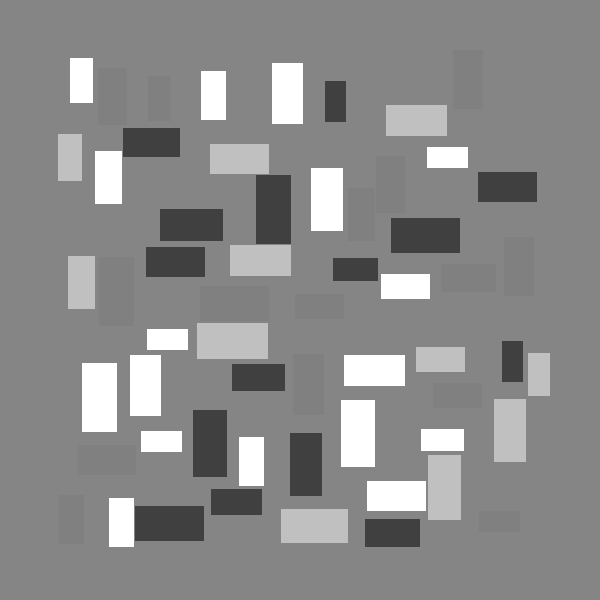

30 60


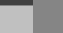

sum 317691 212454
24 48


sum 179818 171317
26 52


sum 257605 149120
28 56


sum 224665 241730
22 44


sum 162647 136978
27 54


sum 223225 212825
22 44


sum 169514 130111
20 40


sum 151938 100257
30 60


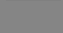

sum 276232 253913
20 40


sum 87101 165094
23 46


sum 190103 134767
33 66


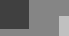

sum 284143 349277
32 64


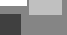

sum 330425 267550
24 48


sum 181485 169650
35 70


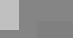

sum 399512 307858
21 42


sum 142360 133040
32 64


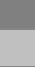

sum 381325 216650
31 62


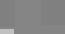

sum 293035 270515
32 64


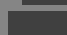

sum 198656 399319
30 60


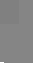

sum 274715 255430
23 46


sum 157826 167044
34 68


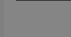

sum 344721 325164
33 66


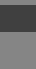

sum 263304 370116
33 66


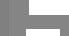

sum 430988 202432
32 64


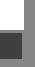

sum 360257 237718
35 70


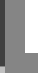

sum 432000 275370
35 70


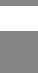

sum 484842 222528
34 68


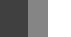

sum 381729 288156
34 68


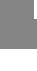

sum 455653 214232
33 66


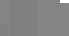

sum 327926 305494
30 60


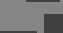

sum 241800 288345
28 56


sum 212828 253567
30 60


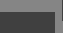

sum 195363 334782
29 58


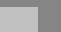

sum 315666 182094
31 62


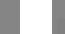

sum 426066 137484
24 48


sum 216771 134364
35 70


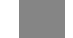

sum 494114 213256
29 58


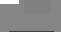

sum 263893 233867
25 50


sum 197372 181048
64 133


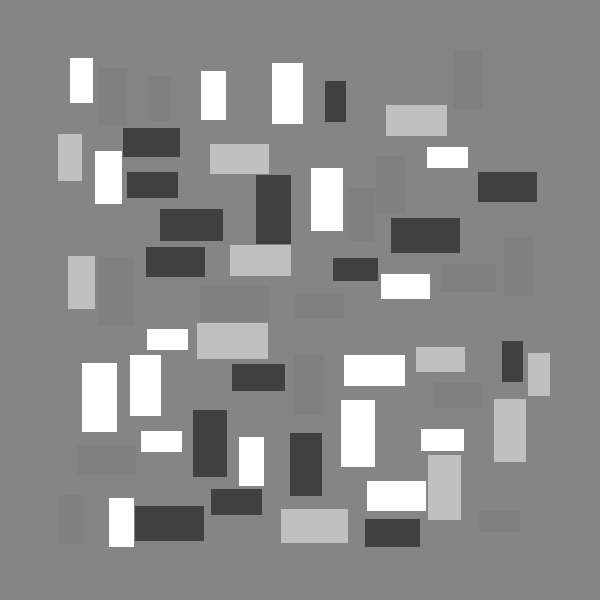

27 54


sum 251300 184750
26 52


sum 179223 227502
30 60


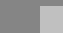

sum 313146 216999
34 68


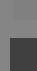

sum 285512 384373
28 56


sum 294426 171969
29 58


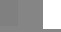

sum 320960 176800
35 70


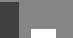

sum 349196 358174
31 62


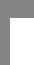

sum 431546 132004
22 44


sum 164993 134632
32 64


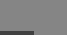

sum 302501 295474
28 56


sum 356839 109556
27 54


sum 143112 292938
22 44


sum 153975 145650
21 42


sum 97617 177783
27 54


sum 231324 204726
29 58


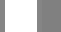

sum 381504 116256
23 46


sum 241566 83304
21 42


sum 138258 137142
24 48


sum 183141 167994
0 133


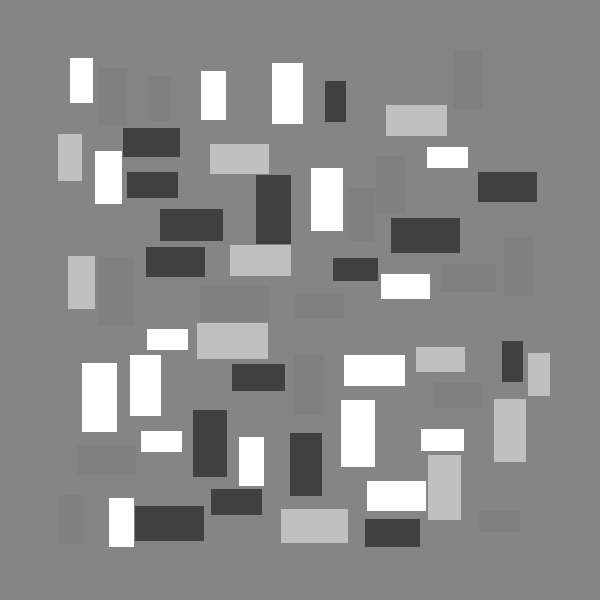

31 62


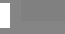

sum 319810 243740
30 60


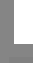

sum 377779 152366
24 48


sum 149310 201825
30 60


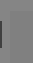

sum 266801 263344
26 52


sum 208365 198360
26 52


sum 146930 259795
22 44


sum 171525 128100
31 62


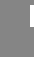

sum 337850 225700
31 62


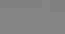

sum 291350 272200
33 66


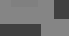

sum 275814 357606
31 62


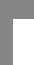

sum 411782 151768
24 48


sum 183141 167994
255 133


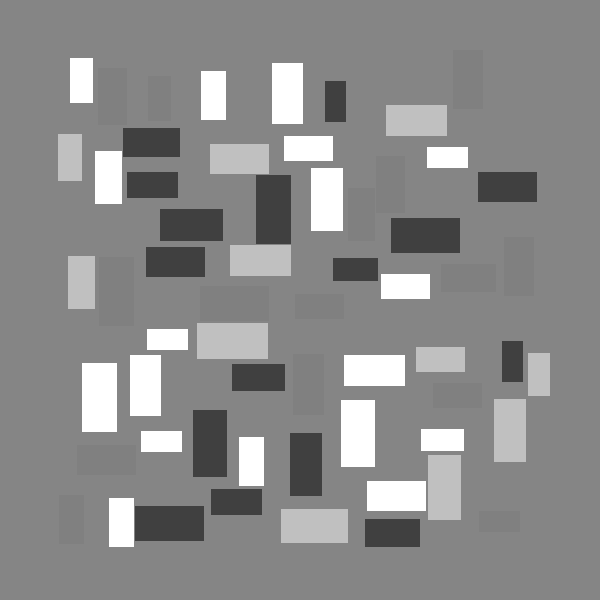

26 52


sum 244644 162081
29 58


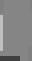

sum 258418 239342
20 40


sum 131537 120658
192 133


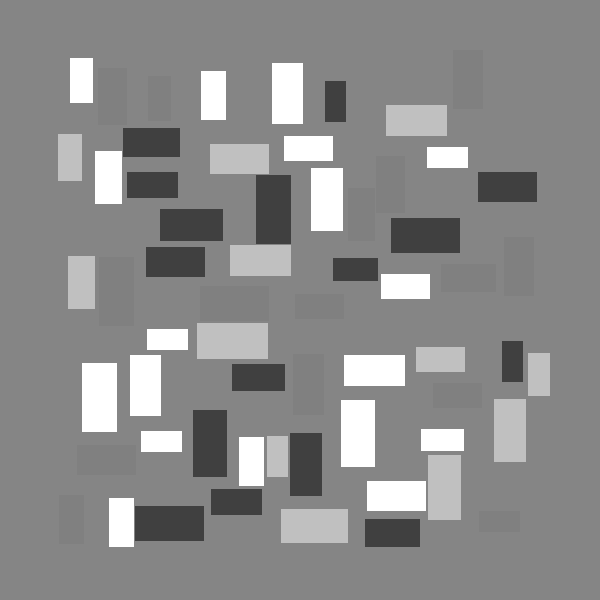

32 64


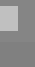

sum 334060 263915
27 54


sum 290090 145960
28 56


sum 246597 219798
29 58


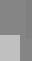

sum 289126 208634
29 58


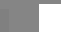

sum 333733 164027
22 44


sum 137805 161820
28 56


sum 230789 235606
29 58


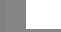

sum 382486 115274
29 58


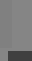

sum 240176 257584
25 50


sum 254391 124029
23 46


sum 135701 189169
20 40


sum 149709 102486
25 50


sum 290773 87647
29 58


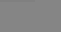

sum 259266 238494
24 48


sum 171411 179724
29 58


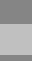

sum 318144 179616
27 54


sum 299067 136983
33 66


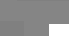

sum 357592 275828
31 62


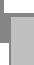

sum 430802 132748
22 44


sum 75200 224425
30 60


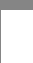

sum 483419 46726
23 46


sum 246944 77926
29 58


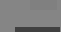

sum 242741 255019
34 68


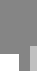

sum 399122 270763
27 54


sum 227430 208620
0 133


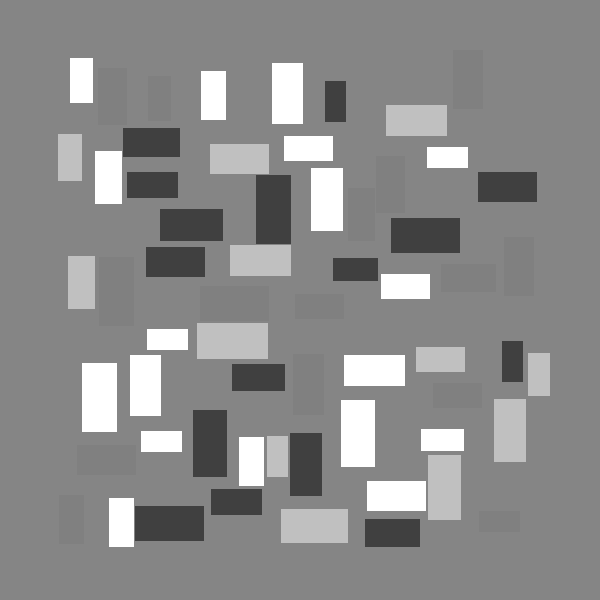

30 60


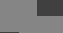

sum 246492 283653
32 64


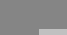

sum 321797 276178
28 56


sum 299393 167002
34 68


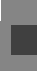

sum 298133 371752
30 60


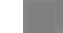

sum 363975 166170
33 66


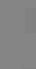

sum 328932 304488
30 60


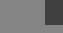

sum 245457 284688
23 46


sum 163982 160888
24 48


sum 147123 204012
29 58


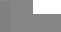

sum 305790 191970
30 60


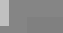

sum 287433 242712
27 54


sum 303594 132456
33 66


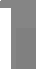

sum 408256 225164
28 56


sum 210197 256198
23 46


sum 200154 124716
32 64


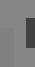

sum 290525 307450
27 54


sum 207144 228906
35 70


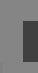

sum 326357 381013
26 52


sum 209510 197215
27 54


sum 227030 209020
33 66


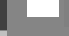

sum 383640 249780
26 52


sum 170346 236379
31 62


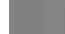

sum 326352 237198
31 62


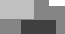

sum 309946 253604
23 46


sum 189620 135250
24 48


sum 181416 169719
35 70


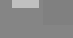

sum 377936 329434
32 64


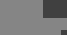

sum 280007 317968
28 56


sum 242178 224217
30 60


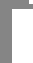

sum 416807 113338
26 52


sum 317050 89675
34 68


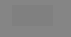

sum 345086 324799
34 68


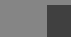

sum 296399 373486
30 60


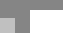

sum 382380 147765
33 66


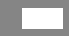

sum 435414 198006
26 52


sum 200183 206542
30 60


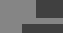

sum 217512 312633
27 54


sum 253980 182070
23 46


sum 169442 155428
255 133


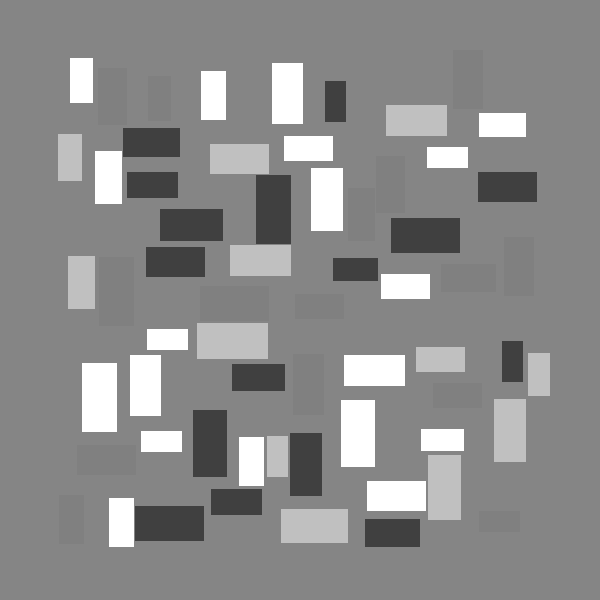

24 48


sum 233997 117138
33 66


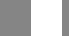

sum 466524 166896
34 68


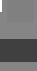

sum 290630 379255
33 66


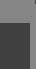

sum 234876 398544
26 52


sum 314249 92476
31 62


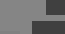

sum 244364 319186
21 42


sum 161304 114096
33 66


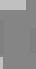

sum 346386 287034
32 64


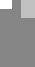

sum 339929 258046
29 58


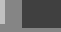

sum 191348 306412
27 54


sum 290550 145500
22 44


sum 178577 121048
20 40


sum 128777 123418
35 70


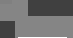

sum 307405 399965
29 58


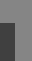

sum 220286 277474
20 40


sum 159207 92988
34 68


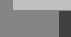

sum 362083 307802
27 54


sum 273790 162260
20 40


sum 144486 107709
32 64


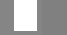

sum 394496 203479
25 50


sum 236306 142114
20 40


sum 129812 122383
24 48


sum 233527 117608
23 46


sum 172022 152848
25 50


sum 151487 226933
25 50


sum 288971 89449
30 60


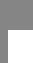

sum 377157 152988
30 60


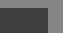

sum 193707 336438
26 52


sum 212135 194590
192 133


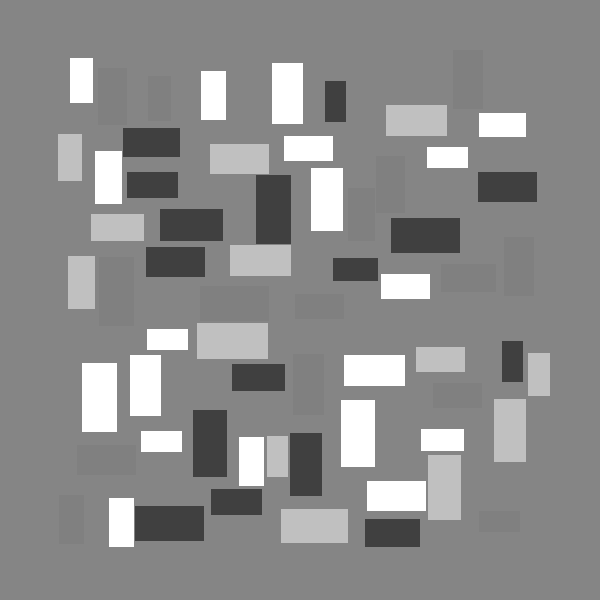

33 66


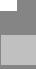

sum 415136 218284
34 68


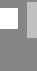

sum 416747 253138
35 70


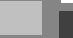

sum 431504 275866
35 70


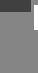

sum 355474 351896
20 40


sum 201687 50508
20 40


sum 86535 165660
31 62


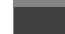

sum 252841 310709
24 48


sum 247191 103944
28 56


sum 312385 154010
33 66


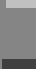

sum 321072 312348
25 50


sum 224426 153994
33 66


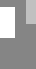

sum 401262 232158
23 46


sum 166031 158839
26 52


sum 261695 145030
20 40


sum 101384 150811
28 56


sum 153557 312838
30 60


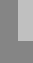

sum 312792 217353
29 58


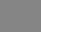

sum 337696 160064
27 54


sum 298909 137141
25 50


sum 195437 182983
23 46


sum 164267 160603
22 44


sum 234843 64782
27 54


sum 227430 208620
255 133


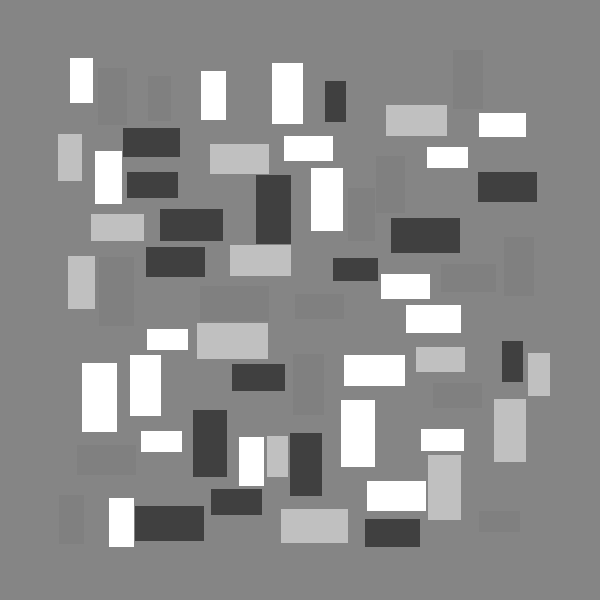

29 58


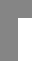

sum 333060 164700
23 46


sum 178193 146677
34 68


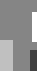

sum 381325 288560
34 68


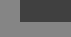

sum 271973 397912
28 56


sum 258087 208308
20 40


sum 126592 125603
22 44


sum 259975 39650
22 44


sum 226533 73092
32 64


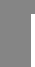

sum 337749 260226
33 66


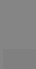

sum 327072 306348
25 50


sum 152936 225484
25 50


sum 194432 183988
22 44


sum 124259 175366
33 66


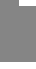

sum 373560 259860
28 56


sum 307673 158722
27 54


sum 210617 225433
21 42


sum 141840 133560
22 44


sum 120050 179575
34 68


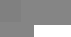

sum 401249 268636
35 70


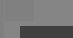

sum 321253 386117
21 42


sum 211232 64168
30 60


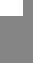

sum 321403 208742
35 70


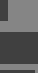

sum 266201 441169
25 50


sum 287042 91378
30 60


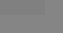

sum 273132 257013
20 40


sum 131537 120658
128 133


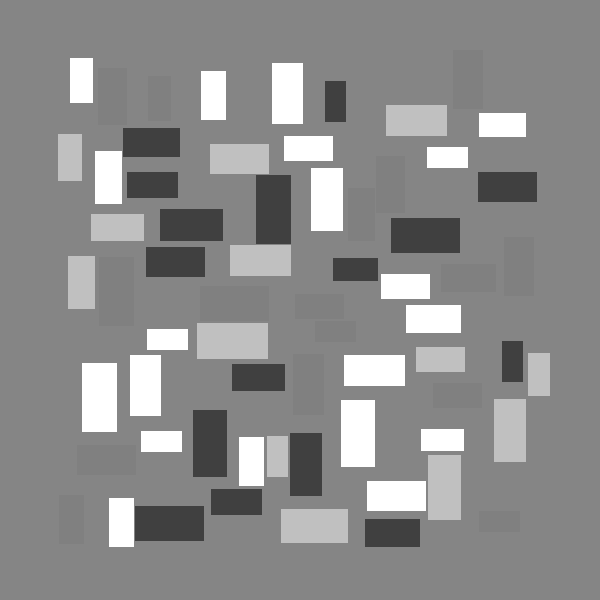

34 68


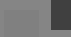

sum 303266 366619
31 62


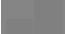

sum 291123 272427
29 58


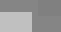

sum 295536 202224
32 64


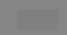

sum 307580 290395
22 44


sum 229631 69994
31 62


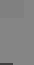

sum 289976 273574
21 42


sum 123468 151932
28 56


sum 344273 122122
27 54


sum 264632 171418
22 44


sum 105500 194125
25 50


sum 181624 196796
31 62


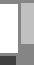

sum 423045 140505
27 54


sum 216267 219783
22 44


sum 155775 143850
32 64


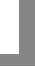

sum 441327 156648
31 62


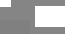

sum 378084 185466
24 48


sum 145794 205341
34 68


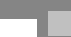

sum 464568 205317
28 56


sum 307551 158844
23 46


sum 221362 103508
28 56


sum 238367 228028
32 64


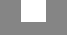

sum 378985 218990
26 52


sum 216834 189891
24 48


sum 158922 192213
33 66


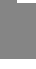

sum 381246 252174
27 54


sum 273058 162992
21 42


sum 215304 60096
20 40


sum 127742 124453
25 50


sum 191354 187066
25 50


sum 197372 181048
255 133


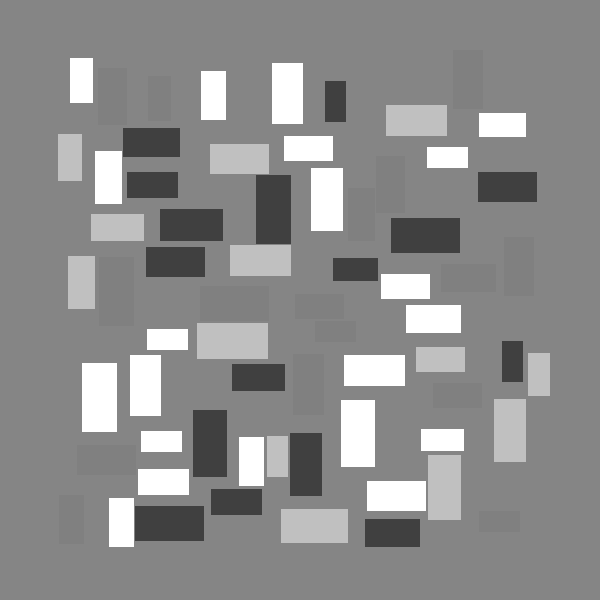

28 56


sum 334025 132370
21 42


sum 141360 134040
30 60


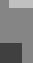

sum 257475 272670
29 58


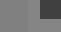

sum 227605 270155
22 44


sum 115703 183922
24 48


sum 276837 74298
27 54


sum 251502 184548
31 62


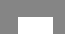

sum 366520 197030
35 70


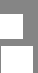

sum 544500 162870
34 68


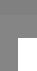

sum 423110 246775
22 44


sum 156613 143012
23 46


sum 208306 116564
27 54


sum 179295 256755
35 70


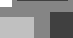

sum 376535 330835
23 46


sum 170156 154714
27 54


sum 241950 194100
24 48


sum 305019 46116
29 58


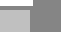

sum 322712 175048
24 48


sum 179996 171139
22 44


sum 156275 143350
128 133


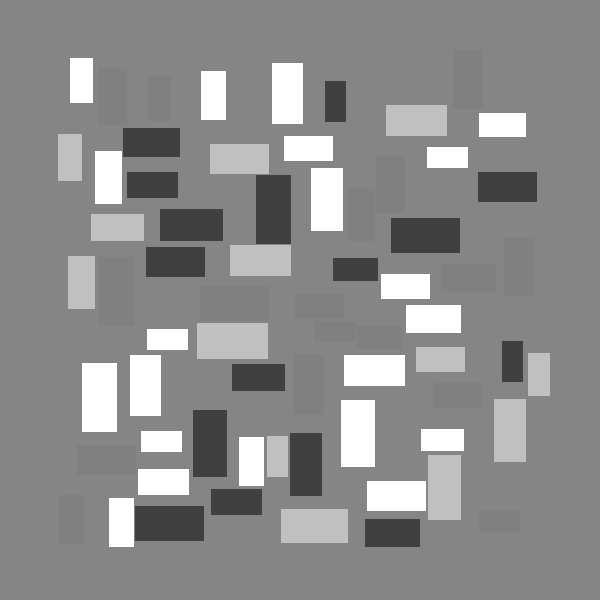

30 60


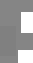

sum 328641 201504
25 50


sum 188318 190102
27 54


sum 248198 187852
35 70


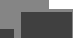

sum 295106 412264
21 42


sum 170480 104920
34 68


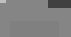

sum 333837 336048
34 68


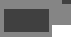

sum 303308 366577
27 54


sum 268033 168017
21 42


sum 143640 131760
192 133


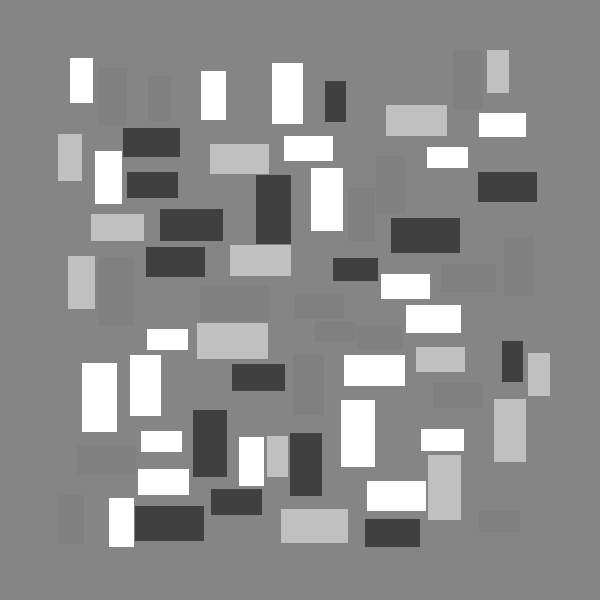

30 60


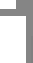

sum 442889 87256
23 46


sum 196282 128588
33 66


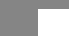

sum 432486 200934
20 40


sum 153013 99182
24 48


sum 157284 193851
22 44


sum 172913 126712
29 58


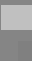

sum 303941 193819
24 48


sum 205846 145289
35 70


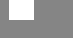

sum 429942 277428
35 70


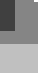

sum 402851 304519
27 54


sum 270264 165786
22 44


sum 113288 186337
28 56


sum 365257 101138
28 56


sum 201305 265090
29 58


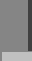

sum 261470 236290
35 70


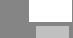

sum 507718 199652
23 46


sum 280462 44408
21 42


sum 195490 79910
35 70


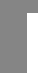

sum 449462 257908
27 54


sum 276990 159060
21 42


sum 85128 190272
29 58


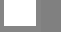

sum 357920 139840
33 66


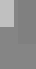

sum 348714 284706
23 46


sum 165802 159068
34 68


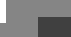

sum 320687 349198
24 48


sum 126090 225045
24 48


sum 148182 202953
25 50


sum 236168 142252
24 48


sum 286841 64294
27 54


sum 172196 263854
34 68


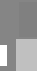

sum 403823 266062
26 52


sum 319019 87706
27 54


sum 226630 209420
21 42


sum 113541 161859
28 56


sum 240382 226013
35 70


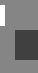

sum 334142 373228
28 56


sum 179315 287080
20 40


sum 210227 41968
34 68


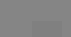

sum 346991 322894
33 66


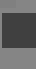

sum 247622 385798
29 58


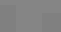

sum 255651 242109
29 58


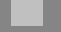

sum 308704 189056
35 70


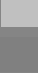

sum 421233 286137
35 70


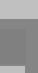

sum 417315 290055
33 66


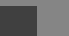

sum 253782 379638
32 64


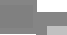

sum 367022 230953
22 44


sum 164771 134854
22 44


sum 94658 204967
35 70


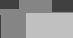

sum 407493 299877
34 68


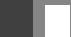

sum 362742 307143
28 56


sum 187142 279253
21 42


sum 154254 121146
24 48


sum 178236 172899
28 56


sum 299434 166961
22 44


sum 197080 102545
24 48


sum 245729 105406
31 62


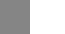

sum 439110 124440
32 64


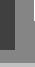

sum 270957 327018
29 58


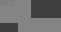

sum 210728 287032
28 56


sum 239072 227323
32 64


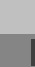

sum 374643 223332
33 66


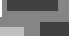

sum 280541 352879
21 42


sum 174122 101278
30 60


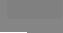

sum 274576 255569
32 64


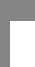

sum 452185 145790
28 56


sum 275117 191278
28 56


sum 222557 243838
33 66


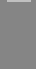

sum 333204 300216
33 66


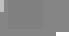

sum 334473 298947
24 48


sum 183061 168074
33 66


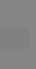

sum 327327 306093
35 70


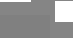

sum 416872 290498
32 64


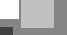

sum 403267 194708
25 50


sum 249292 129128
20 40


sum 103822 148373
34 68


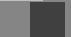

sum 267403 402482
25 50


sum 258860 119560
22 44


sum 155204 144421
25 50


sum 202360 176060
22 44


sum 123845 175780
20 40


sum 119508 132687
28 56


sum 213612 252783
27 54


sum 282300 153750
29 58


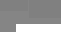

sum 299116 198644
20 40


sum 89999 162196
30 60


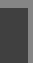

sum 170247 359898
20 40


sum 201687 50508
24 48


sum 182581 168554
32 64


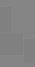

sum 306830 291145
23 46


sum 236128 88742
30 60


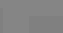

sum 273242 256903
23 46


sum 160610 164260
20 40


sum 130433 121762
34 68


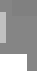

sum 414363 255522
34 68


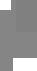

sum 397515 272370
23 46


sum 201656 123214
30 60


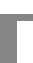

sum 414855 115290
26 52


sum 189365 217360
30 60


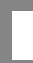

sum 402045 128100
20 40


sum 130962 121233
27 54


sum 224965 211085
28 56


sum 356717 109678
32 64


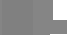

sum 342694 255281
35 70


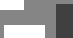

sum 423366 284004
25 50


sum 244736 133684
30 60


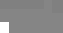

sum 285890 244255
22 44


sum 189825 109800
35 70


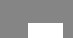

sum 432992 274378
27 54


sum 344184 91866
22 44


sum 155250 144375
20 40


sum 126592 125603
33 66


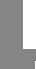

sum 409062 224358
25 50


sum 193102 185318
20 40


sum 171258 80937
30 60


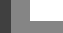

sum 336006 194139
23 46


sum 243080 81790
22 44


sum 149939 149686
20 40


sum 118841 133354
26 52


sum 249467 157258
21 42


sum 180102 95298
30 60


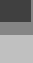

sum 283965 246180
26 52


sum 208565 198160
23 46


sum 190900 133970
20 40


sum 131192 121003
20 40


sum 128307 123888
25 50


sum 147554 230866
22 44


sum 190259 109366
34 68


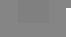

sum 363516 306369
33 66


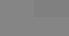

sum 327397 306023
32 64


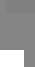

sum 359776 238199
23 46


sum 324870 0
32 64


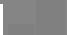

sum 316671 281304
21 42


sum 145936 129464
29 58


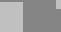

sum 302981 194779
29 58


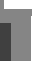

sum 267008 230752
29 58


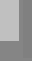

sum 302967 194793
26 52


sum 225311 181414
33 66


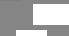

sum 445196 188224
35 70


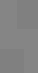

sum 363017 344353
20 40


sum 246583 5612
30 60


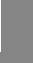

sum 282851 247294
33 66


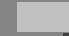

sum 421170 212250
32 64


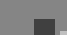

sum 290353 307622
26 52


sum 259925 146800
34 68


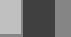

sum 309821 360064
24 48


sum 264384 86751
27 54


sum 198396 237654
24 48


sum 180846 170289
21 42


sum 153520 121880
31 62


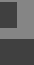

sum 202436 361114
34 68


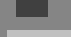

sum 338287 331598
30 60


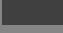

sum 171282 358863
22 44


sum 246189 53436
26 52


sum 206230 200495
32 64


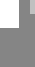

sum 380919 217056
32 64


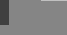

sum 297894 300081
23 46


sum 226321 98549
35 70


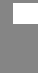

sum 432992 274378
27 54


sum 284070 151980
33 66


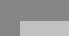

sum 373737 259683
34 68


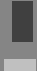

sum 312638 357247
27 54


sum 271989 164061
21 42


sum 204152 71248
28 56


sum 368795 97600
31 62


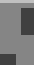

sum 263585 299965
20 40


sum 166067 86128
28 56


sum 255647 210748
20 40


sum 116955 135240
34 68


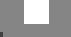

sum 421556 248329
20 40


sum 149454 102741
23 46


sum 162928 161942
33 66


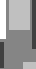

sum 380759 252661
24 48


sum 183141 167994
255 133


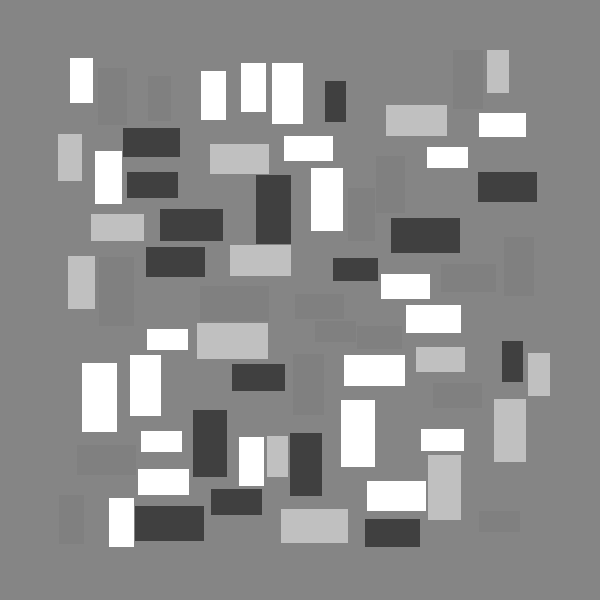

22 44


sum 156275 143350
0 133


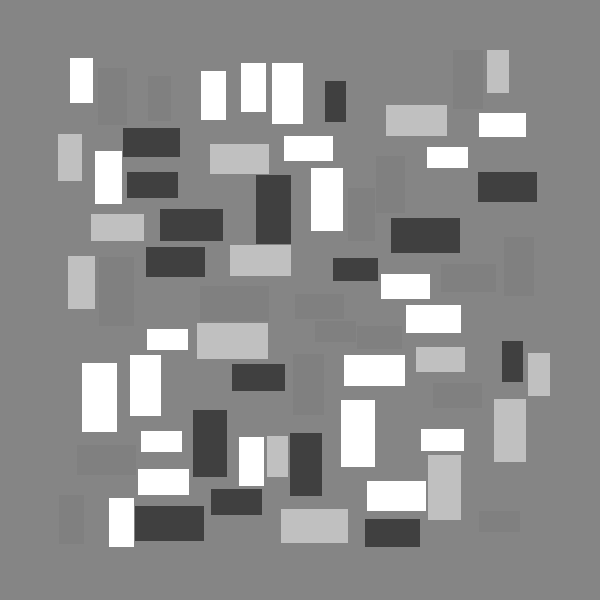

28 56


sum 411373 55022
21 42


sum 117405 157995
22 44


sum 184035 115590
32 64


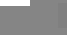

sum 332720 265255
26 52


sum 207005 199720
34 68


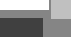

sum 375218 294667
21 42


sum 142320 133080
29 58


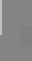

sum 262486 235274
26 52


sum 175579 231146
20 40


sum 132595 119600
20 40


sum 127737 124458
24 48


sum 198513 152622
29 58


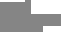

sum 330132 167628
32 64


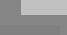

sum 349595 248380
31 62


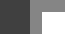

sum 285282 278268
33 66


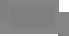

sum 353044 280376
24 48


sum 240127 111008
23 46


sum 166377 158493
32 64


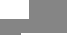

sum 390331 207644
33 66


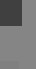

sum 290144 343276
30 60


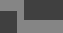

sum 196881 333264
33 66


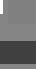

sum 275124 358296
23 46


sum 169442 155428
128 133


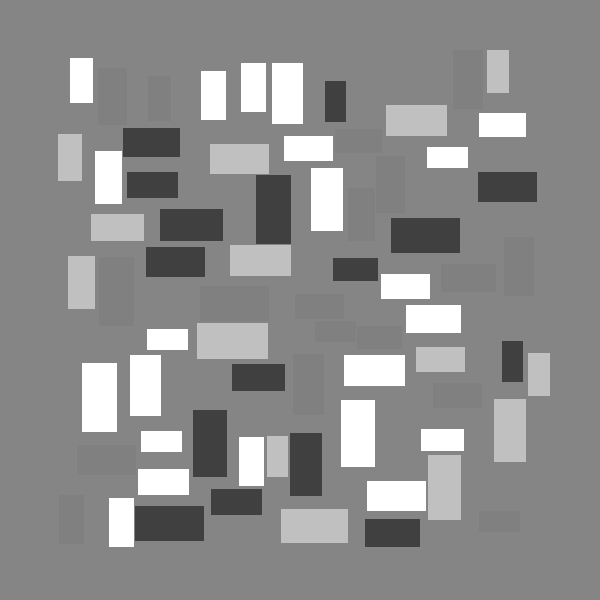

34 68


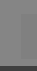

sum 333026 336859
33 66


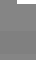

sum 375032 258388
25 50


sum 178880 199540
29 58


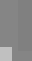

sum 265958 231802
33 66


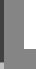

sum 386412 247008
29 58


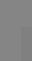

sum 257746 240014
31 62


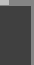

sum 170384 393166
27 54


sum 280530 155520
22 44


sum 159325 140300
32 64


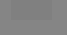

sum 307785 290190
28 56


sum 238917 227478
22 44


sum 123500 176125
23 46


sum 301202 23668
25 50


sum 237692 140728
30 60


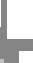

sum 424949 105196
25 50


sum 187389 191031
31 62


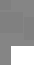

sum 343129 220421
35 70


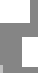

sum 513098 194272
27 54


sum 188307 247743
23 46


sum 166322 158548
23 46


sum 202748 122122
31 62


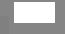

sum 398162 165388
24 48


sum 176793 174342
29 58


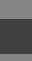

sum 182336 315424
23 46


sum 248742 76128
33 66


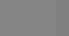

sum 328032 305388
32 64


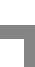

sum 500619 97356
35 70


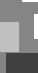

sum 374516 332854
26 52


sum 179949 226776
30 60


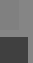

sum 223425 306720
21 42


sum 118593 156807
35 70


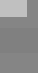

sum 391273 316097
29 58


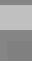

sum 304316 193444
22 44


sum 154895 144730
20 40


sum 143359 108836
28 56


sum 236997 229398
26 52


sum 302957 103768
25 50


sum 153212 225208
35 70


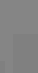

sum 363767 343603
22 44


sum 216665 82960
21 42


sum 231480 43920
32 64


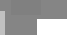

sum 375275 222700
27 54


sum 285136 150914
29 58


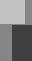

sum 245336 252424
22 44


sum 230573 69052
29 58


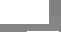

sum 406192 91568
29 58


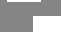

sum 322568 175192
25 50


sum 248348 130072
24 48


sum 159543 191592
24 48


sum 186037 165098
24 48


sum 244501 106634
31 62


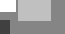

sum 348581 214969
23 46


sum 130672 194198
32 64


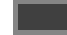

sum 279489 318486
22 44


sum 179519 120106
22 44


sum 156275 143350
128 133


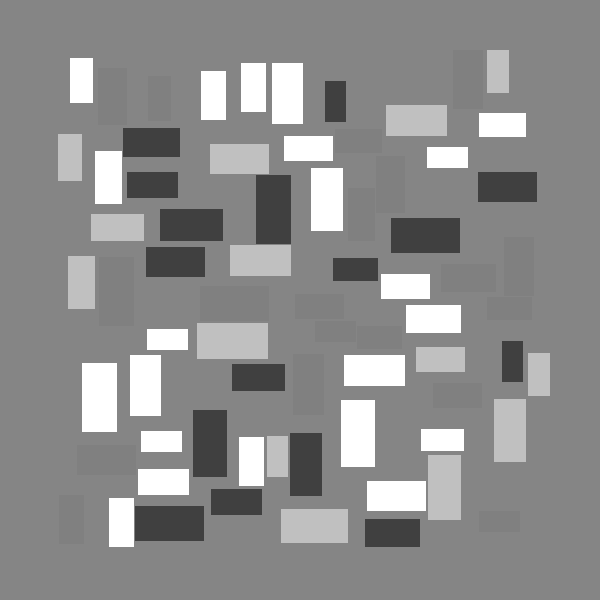

35 70


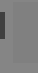

sum 352002 355368
29 58


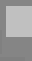

sum 306430 191330
24 48


sum 249021 102114
23 46


sum 209090 115780
23 46


sum 141428 183442
28 56


sum 333763 132632
23 46


sum 168867 156003
31 62


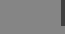

sum 286754 276796
22 44


sum 136695 162930
30 60


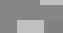

sum 303101 227044
29 58


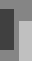

sum 250690 247070
26 52


sum 254202 152523
22 44


sum 164535 135090
30 60


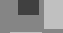

sum 289169 240976
31 62


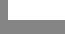

sum 433010 130540
34 68


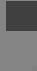

sum 285096 384789
20 40


sum 130657 121538
20 40


sum 129007 123188
28 56


sum 238707 227688
29 58


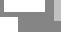

sum 361253 136507
26 52


sum 210885 195840
30 60


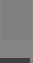

sum 259957 270188
29 58


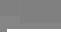

sum 273145 224615
21 42


sum 187619 87781
32 64


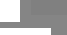

sum 406419 191556
28 56


sum 207581 258814
24 48


sum 268785 82350
24 48


sum 264515 86620
34 68


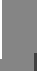

sum 360061 309824
21 42


sum 140880 134520
25 50


sum 285523 92897
30 60


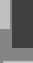

sum 227605 302540
25 50


sum 249515 128905
30 60


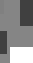

sum 286692 243453
35 70


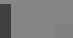

sum 341786 365584
34 68


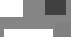

sum 421982 247903
20 40


sum 78131 174064
22 44


sum 169550 130075
32 64


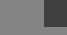

sum 269036 328939
25 50


sum 195132 183288
25 50


sum 193232 185188
23 46


sum 165542 159328
27 54


sum 232890 203160
25 50


sum 132070 246350
32 64


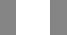

sum 457065 140910
32 64


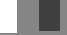

sum 335408 262567
35 70


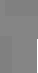

sum 368230 339140
31 62


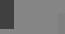

sum 265181 298369
20 40


sum 194977 57218
22 44


sum 186409 113216
29 58


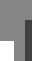

sum 273973 223787
22 44


sum 216055 83570
23 46


sum 175590 149280
24 48


sum 162787 188348
22 44


sum 78443 221182
24 48


sum 310319 40816
21 42


sum 185010 90390
26 52


sum 266431 140294
26 52


sum 314615 92110
27 54


sum 248685 187365
25 50


sum 207284 171136
32 64


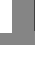

sum 451998 145977
29 58


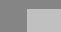

sum 305754 192006
23 46


sum 164432 160438
26 52


sum 229215 177510
23 46


sum 201908 122962
26 52


sum 256593 150132
29 58


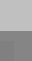

sum 316744 181016
28 56


sum 241862 224533
28 56


sum 280727 185668
27 54


sum 227430 208620
255 133


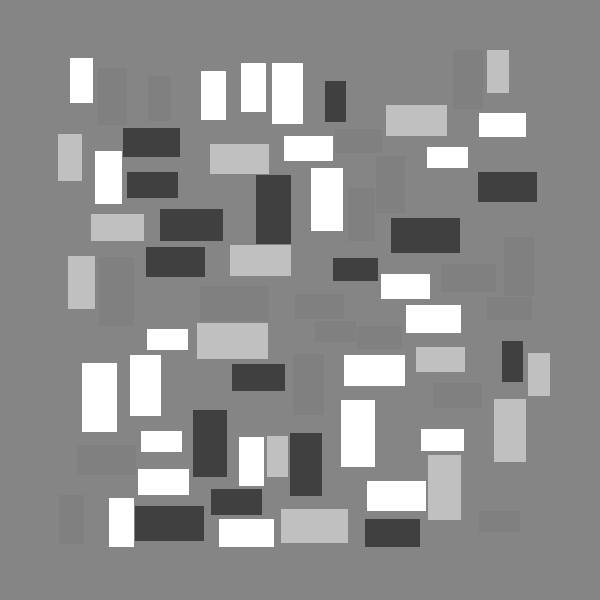

33 66


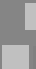

sum 385782 247638
30 60


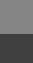

sum 210474 319671
25 50


sum 264689 113731
20 40


sum 207665 44530
25 50


sum 191032 187388
29 58


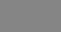

sum 259616 238144
192 133


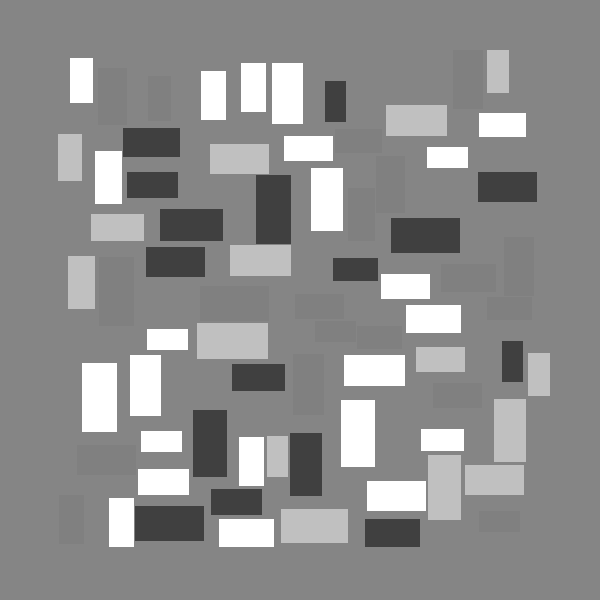

35 70


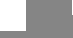

sum 469104 238266
28 56


sum 259840 206555
22 44


sum 200195 99430
22 44


sum 186719 112906
33 66


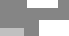

sum 430516 202904
20 40


sum 131702 120493
29 58


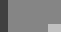

sum 248088 249672
26 52


sum 208415 198310
21 42


sum 193908 81492
26 52


sum 189814 216911
27 54


sum 268140 167910
25 50


sum 236382 142038
33 66


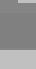

sum 367614 265806
31 62


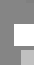

sum 358995 204555
26 52


sum 222068 184657
35 70


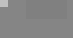

sum 368351 339019
22 44


sum 198342 101283
30 60


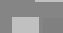

sum 303799 226346
29 58


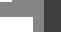

sum 285398 212362
20 40


sum 185587 66608
29 58


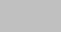

sum 374784 122976
31 62


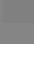

sum 377473 186077
26 52


sum 176255 230470
35 70


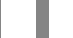

sum 642466 64904
35 70


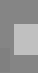

sum 411638 295732
32 64


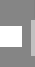

sum 376655 221320
21 42


sum 113464 161936
20 40


sum 120497 131698
26 52


sum 301107 105618
35 70


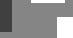

sum 395882 311488
27 54


sum 251400 184650
20 40


sum 96623 155572
31 62


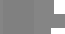

sum 317696 245854
35 70


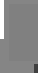

sum 377225 330145
30 60


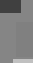

sum 259415 270730
30 60


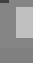

sum 303262 226883
29 58


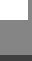

sum 314688 183072
24 48


sum 177736 173399
20 40


sum 131042 121153
20 40


sum 129122 123073
27 54


sum 209080 226970
32 64


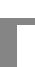

sum 480977 116998
26 52


sum 225630 181095
28 56


sum 210827 255568
31 62


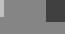

sum 269100 294450
28 56


sum 251295 215100
31 62


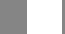

sum 439110 124440
33 66


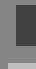

sum 283704 349716
26 52


sum 206400 200325
27 54


sum 173625 262425
24 48


sum 191393 159742
27 54


sum 308338 127712
21 42


sum 218304 57096
30 60


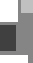

sum 332647 197498
21 42


sum 225624 49776
23 46


sum 167272 157598
25 50


sum 192907 185513
21 42


sum 140040 135360
29 58


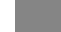

sum 318176 179584
23 46


sum 242788 82082
33 66


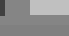

sum 355572 277848
28 56


sum 250976 215419
26 52


sum 192509 214216
21 42


sum 179748 95652
25 50


sum 193964 184456
34 68


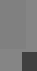

sum 323356 346529
24 48


sum 244345 106790
22 44


sum 129150 170475
31 62


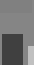

sum 253657 309893
35 70


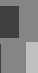

sum 346937 360433
34 68


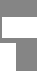

sum 493717 176168
30 60


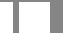

sum 442915 87230
31 62


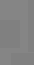

sum 288190 275360
32 64


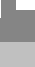

sum 388886 209089
31 62


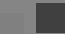

sum 231380 332170
23 46


sum 92300 232570
33 66


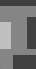

sum 290881 342539
34 68


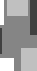

sum 404838 265047
31 62


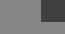

sum 257498 306052
31 62


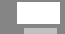

sum 421024 142526
28 56


sum 259274 207121
27 54


sum 235350 200700
35 70


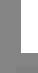

sum 478094 229276
22 44


sum 163125 136500
20 40


sum 85169 167026
25 50


sum 193747 184673
21 42


sum 97272 178128
27 54


sum 263159 172891
24 48


sum 183870 167265
28 56


sum 170393 296002
30 60


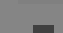

sum 264015 266130
29 58


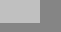

sum 313896 183864
28 56


sum 280014 186381
25 50


sum 139412 239008
33 66


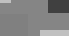

sum 320668 312752
20 40


sum 96002 156193
32 64


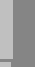

sum 360383 237592
32 64


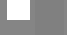

sum 362930 235045
35 70


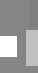

sum 436724 270646
29 58


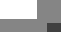

sum 336688 161072
34 68


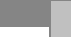

sum 451651 218234
23 46


sum 163679 161191
33 66


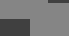

sum 290835 342585
32 64


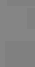

sum 306305 291670
29 58


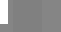

sum 278400 219360
21 42


sum 88977 186423
26 52


sum 238095 168630
27 54


sum 253385 182665
33 66


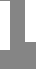

sum 446516 186904
22 44


sum 201653 97972
31 62


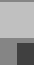

sum 340340 223210
31 62


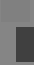

sum 247270 316280
34 68


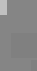

sum 352006 317879
24 48


sum 257913 93222
26 52


sum 162828 243897
22 44


sum 186719 112906
29 58


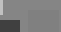

sum 242301 255459
24 48


sum 179226 171909
33 66


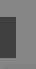

sum 284488 348932
34 68


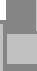

sum 427279 242606
35 70


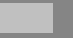

sum 462752 244618
24 48


sum 180036 171099
28 56


sum 350007 116388
30 60


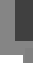

sum 247433 282712
29 58


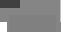

sum 254419 243341
28 56


sum 267512 198883
21 42


sum 199326 76074
34 68


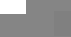

sum 391674 278211
24 48


sum 180526 170609
34 68


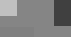

sum 333241 336644
28 56


sum 260673 205722
29 58


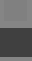

sum 193169 304591
34 68


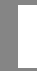

sum 495425 174460
25 50


sum 234836 143584
26 52


sum 258129 148596
26 52


sum 205757 200968
24 48


sum 253713 97422
25 50


sum 172244 206176
33 66


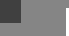

sum 307293 326127
22 44


sum 253509 46116
24 48


sum 227917 123218
23 46


sum 203034 121836
34 68


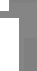

sum 481788 188097
35 70


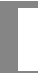

sum 527298 180072
30 60


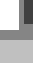

sum 375924 154221
28 56


sum 265273 201122
33 66


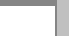

sum 557160 76260
29 58


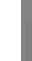

sum 414638 83122
27 54


sum 225540 210510
35 70


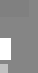

sum 400249 307121
33 66


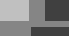

sum 307929 325491
23 46


sum 201302 123568
27 54


sum 291606 144444
21 42


sum 143640 131760
192 133


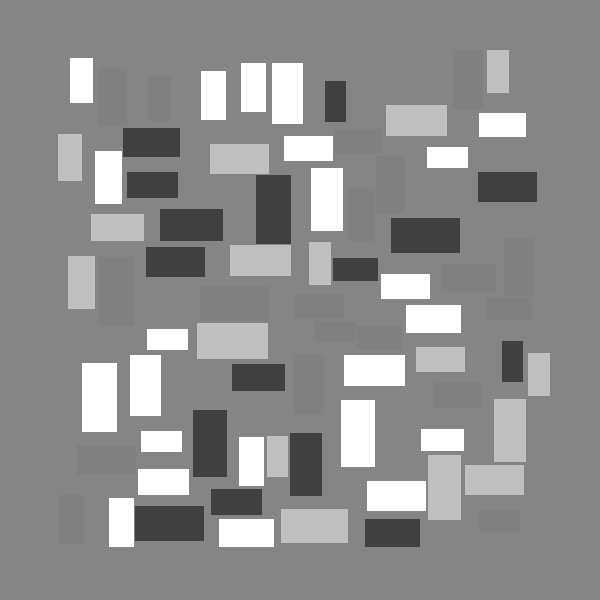

22 44


sum 108458 191167
29 58


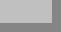

sum 330180 167580
28 56


sum 228942 237453
20 40


sum 83996 168199
30 60


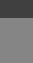

sum 235521 294624
26 52


sum 202220 204505
20 40


sum 78533 173662
22 44


sum 127196 172429
26 52


sum 235572 171153
24 48


sum 184275 166860
29 58


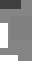

sum 281511 216249
23 46


sum 185480 139390
30 60


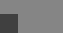

sum 252909 277236
31 62


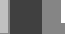

sum 245658 317892
32 64


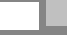

sum 477323 120652
30 60


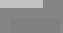

sum 293373 236772
23 46


sum 161530 163340
22 44


sum 97625 202000
30 60


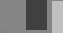

sum 253745 276400
26 52


sum 194593 212132
20 40


sum 128062 124133
20 40


sum 170598 81597
30 60


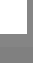

sum 385863 144282
34 68


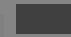

sum 235081 434804
32 64


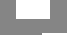

sum 396797 201178
35 70


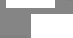

sum 539302 168068
21 42


sum 152370 123030
28 56


sum 376340 90055
27 54


sum 264679 171371
29 58


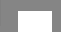

sum 346594 151166
26 52


sum 222778 183947
29 58


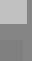

sum 295433 202327
26 52


sum 212005 194720
20 40


sum 76475 175720
26 52


sum 207185 199540
31 62


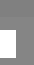

sum 345696 217854
31 62


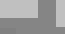

sum 348143 215407
32 64


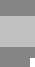

sum 381390 216585
24 48


sum 185796 165339
22 44


sum 91415 208210
34 68


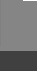

sum 299809 370076
28 56


sum 184799 281596
21 42


sum 150328 125072
33 66


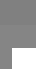

sum 387360 246060
32 64


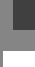

sum 328809 269166
32 64


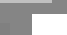

sum 410159 187816
28 56


sum 181157 285238
27 54


sum 304012 132038
20 40


sum 115391 136804
27 54


sum 185478 250572
35 70


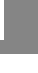

sum 476546 230824
32 64


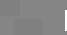

sum 313089 284886
32 64


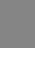

sum 393015 204960
25 50


sum 179708 198712
35 70


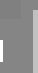

sum 393584 313786
34 68


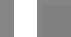

sum 448573 221312
24 48


sum 298431 52704
29 58


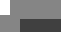

sum 241139 256621
27 54


sum 230026 206024
26 52


sum 211750 194975
24 48


sum 180933 170202
31 62


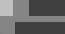

sum 225028 338522
24 48


sum 150195 200940
26 52


sum 258254 148471
26 52


sum 275914 130811
20 40


sum 185702 66493
24 48


sum 183141 167994
255 133


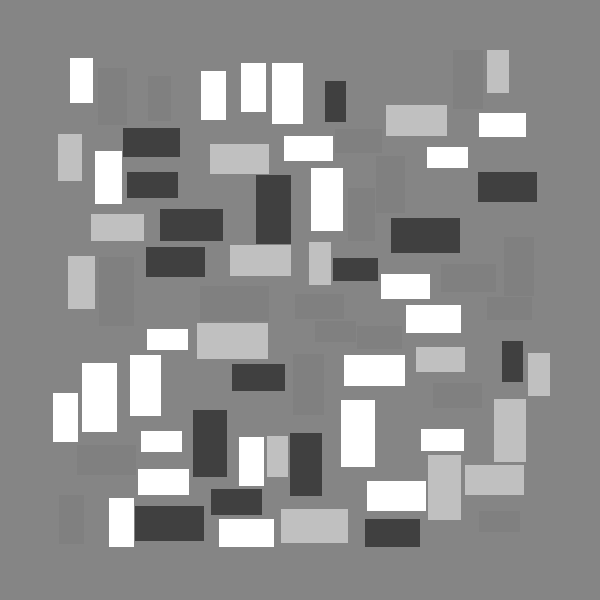

32 64


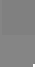

sum 306842 291133
32 64


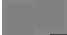

sum 310862 287113
27 54


sum 284070 151980
31 62


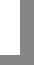

sum 428130 135420
33 66


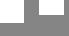

sum 443466 189954
24 48


sum 166443 184692
21 42


sum 143640 131760
255 133


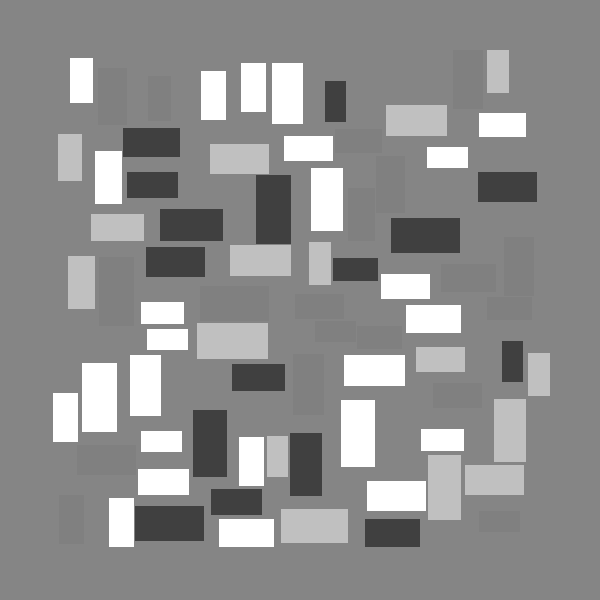

21 42


sum 151102 124298
22 44


sum 202269 97356
23 46


sum 221572 103298
20 40


sum 212416 39779
34 68


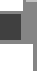

sum 452583 217302
29 58


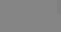

sum 259336 238424
26 52


sum 156935 249790
28 56


sum 269220 197175
32 64


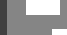

sum 368180 229795
28 56


sum 238757 227638
25 50


sum 164552 213868
29 58


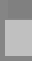

sum 314804 182956
28 56


sum 224081 242314
35 70


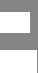

sum 549624 157746
27 54


sum 367364 68686
31 62


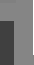

sum 257896 305654
22 44


sum 153415 146210
24 48


sum 314657 36478
22 44


sum 153025 146600
32 64


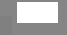

sum 415787 182188
24 48


sum 320635 30500
31 62


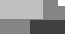

sum 313447 250103
34 68


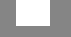

sum 457239 212646
26 52


sum 279831 126894
32 64


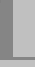

sum 400311 197664
35 70


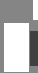

sum 511272 196098
22 44


sum 173276 126349
22 44


sum 181234 118391
32 64


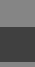

sum 227360 370615
31 62


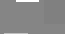

sum 298438 265112
29 58


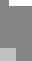

sum 288724 209036
31 62


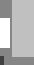

sum 402032 161518
25 50


sum 186056 192364
26 52


sum 142100 264625
25 50


sum 156736 221684
23 46


sum 168012 156858
25 50


sum 195326 183094
35 70


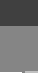

sum 304988 402382
34 68


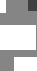

sum 501160 168725
20 40


sum 132824 119371
28 56


sum 249510 216885
34 68


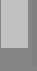

sum 424230 245655
22 44


sum 200024 99601
32 64


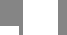

sum 482197 115778
30 60


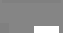

sum 296522 233623
28 56


sum 237692 228703
34 68


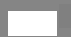

sum 497401 172484
23 46


sum 167162 157708
34 68


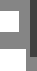

sum 440322 229563
20 40


sum 161385 90810
21 42


sum 147888 127512
21 42


sum 142425 132975
20 40


sum 128777 123418
23 46


sum 166817 158053
34 68


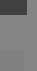

sum 318926 350959
25 50


sum 193542 184878
33 66


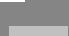

sum 371282 262138
21 42


sum 140040 135360
20 40


sum 142556 109639
24 48


sum 238316 112819
26 52


sum 310155 96570
33 66


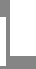

sum 543872 89548
25 50


sum 231474 146946
31 62


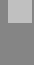

sum 326498 237052
28 56


sum 238547 227848
21 42


sum 137972 137428
26 52


sum 178214 228511
31 62


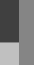

sum 263530 300020
35 70


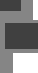

sum 367001 340369
26 52


sum 248559 158166
28 56


sum 348299 118096
24 48


sum 165546 185589
27 54


sum 258023 178027
27 54


sum 225780 210270
28 56


sum 349637 116758
23 46


sum 166877 157993
29 58


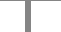

sum 467626 30134
23 46


sum 143249 181621
29 58


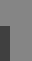

sum 235466 262294
31 62


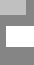

sum 388676 174874
29 58


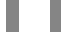

sum 404064 93696
20 40


sum 141451 110744
30 60


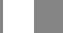

sum 401313 128832
34 68


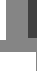

sum 438521 231364
30 60


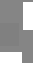

sum 338006 192139
29 58


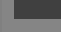

sum 197679 300081
28 56


sum 239007 227388
20 40


sum 183921 68274
25 50


sum 162596 215824
35 70


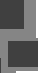

sum 280703 426667
21 42


sum 155241 120159
35 70


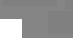

sum 415013 292357
33 66


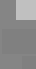

sum 348812 284608
33 66


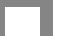

sum 524474 108946
34 68


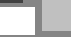

sum 517231 152654
23 46


sum 241544 83326
33 66


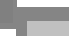

sum 424119 209301
25 50


sum 261056 117364
30 60


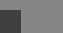

sum 243180 286965
29 58


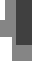

sum 257272 240488
28 56


sum 313837 152558
24 48


sum 256585 94550
24 48


sum 226451 124684
27 54


sum 274620 161430
32 64


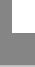

sum 408613 189362
35 70


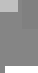

sum 407548 299822
28 56


sum 226973 239422
25 50


sum 327488 50932
32 64


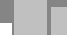

sum 424030 173945
32 64


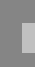

sum 334895 263080
20 40


sum 203033 49162
35 70


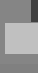

sum 416963 290407
31 62


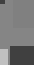

sum 265698 297852
24 48


sum 212480 138655
30 60


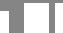

sum 421443 108702
20 40


sum 129337 122858
30 60


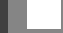

sum 378583 151562
20 40


sum 99981 152214
34 68


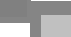

sum 442156 227729
30 60


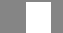

sum 371057 159088
22 44


sum 205075 94550
23 46


sum 255422 69448
23 46


sum 166654 158216
25 50


sum 357624 20796
24 48


sum 189363 161772
32 64


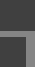

sum 183200 414775
32 64


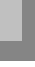

sum 390723 207252
31 62


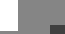

sum 352691 210859
24 48


sum 201159 149976
29 58


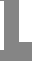

sum 350140 147620
23 46


sum 189206 135664
31 62


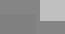

sum 321305 242245
30 60


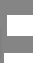

sum 378199 151946
23 46


sum 100787 224083
27 54


sum 342424 93626
24 48


sum 164376 186759
32 64


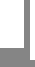

sum 489029 108946
21 42


sum 153615 121785
27 54


sum 336864 99186
28 56


sum 280557 185838
27 54


sum 316938 119112
25 50


sum 190742 187678
31 62


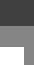

sum 285638 277912
30 60


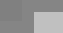

sum 310128 220017
25 50


sum 275828 102592
35 70


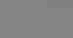

sum 367902 339468
23 46


sum 163072 161798
24 48


sum 196805 154330
21 42


sum 186462 88938
30 60


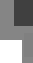

sum 303073 227072
25 50


sum 302414 76006
24 48


sum 239139 111996
23 46


sum 157022 167848
22 44


sum 151900 147725
33 66


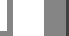

sum 485546 147874
33 66


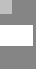

sum 424830 208590
25 50


sum 173199 205221
29 58


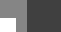

sum 211872 285888
27 54


sum 140490 295560
21 42


sum 159549 115851
31 62


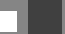

sum 257720 305830
28 56


sum 266557 199838
31 62


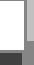

sum 436119 127431
34 68


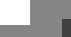

sum 429713 240172
32 64


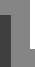

sum 302307 295668
29 58


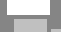

sum 365387 132373
35 70


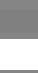

sum 508288 199082
34 68


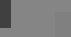

sum 326139 343746
21 42


sum 170114 105286
25 50


sum 185780 192640
20 40


sum 145804 106391
22 44


sum 128875 170750
33 66


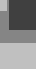

sum 334249 299171
34 68


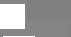

sum 424730 245155
28 56


sum 318365 148030
29 58


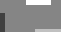

sum 272913 224847
34 68


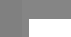

sum 437553 232332
31 62


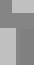

sum 343212 220338
33 66


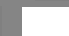

sum 496188 137232
29 58


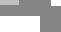

sum 350621 147139
29 58


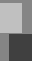

sum 255707 242053
33 66


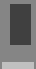

sum 284179 349241
31 62


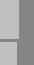

sum 360718 202832
22 44


sum 218065 81560
20 40


sum 132484 119711
23 46


sum 205310 119560
23 46


sum 202482 122388
30 60


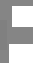

sum 384891 145254
30 60


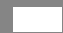

sum 425957 104188
35 70


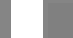

sum 512919 194451
27 54


sum 298095 137955
31 62


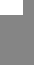

sum 336020 227530
21 42


sum 125604 149796
34 68


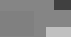

sum 348161 321724
34 68


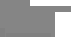

sum 427078 242807
29 58


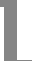

sum 395768 101992
21 42


sum 100377 175023
32 64


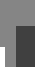

sum 270334 327641
32 64


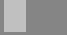

sum 353421 244554
32 64


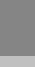

sum 334600 263375


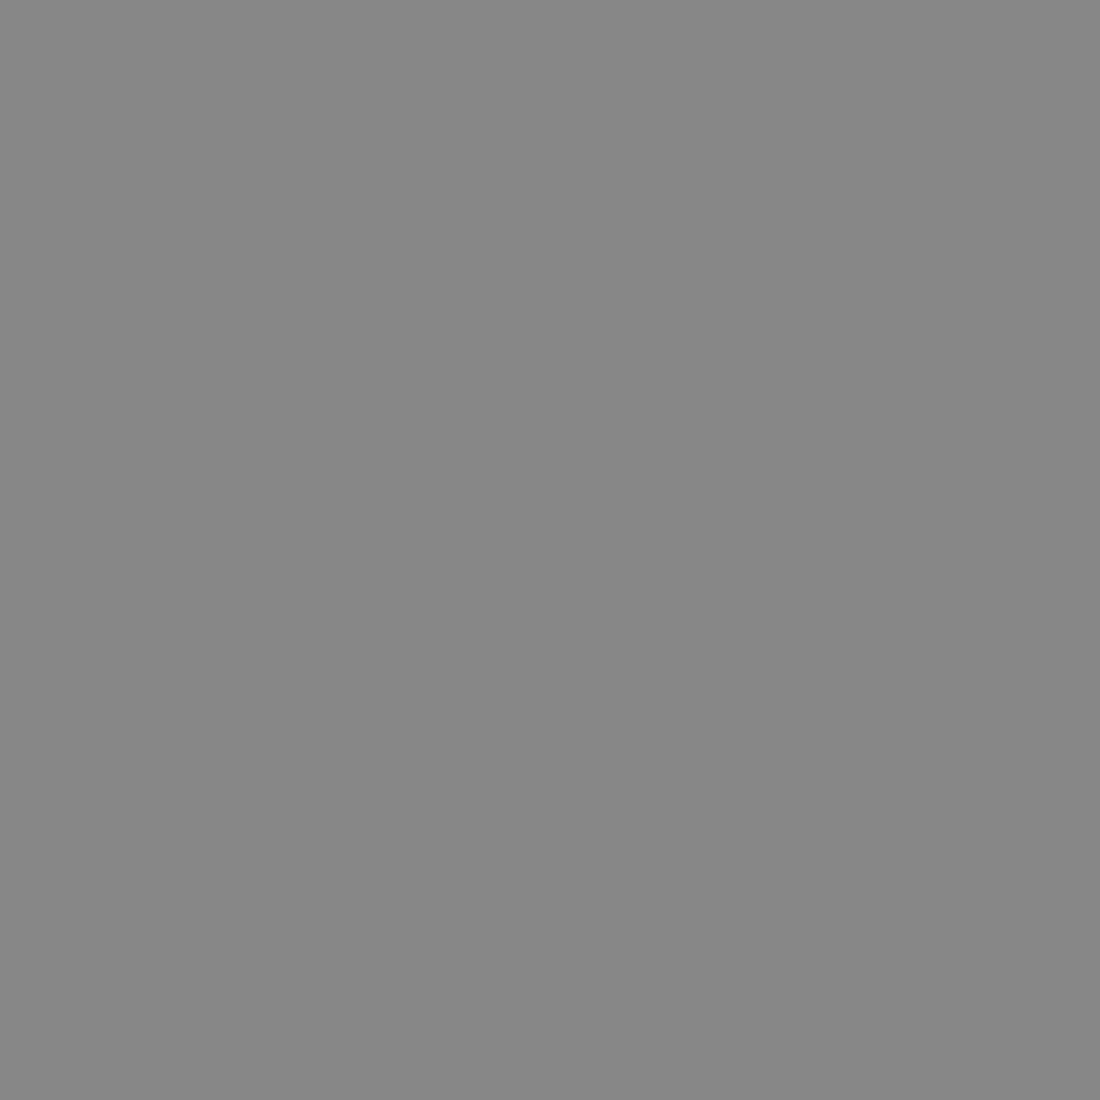

31 62


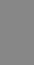

sum 298350 265200
0 135


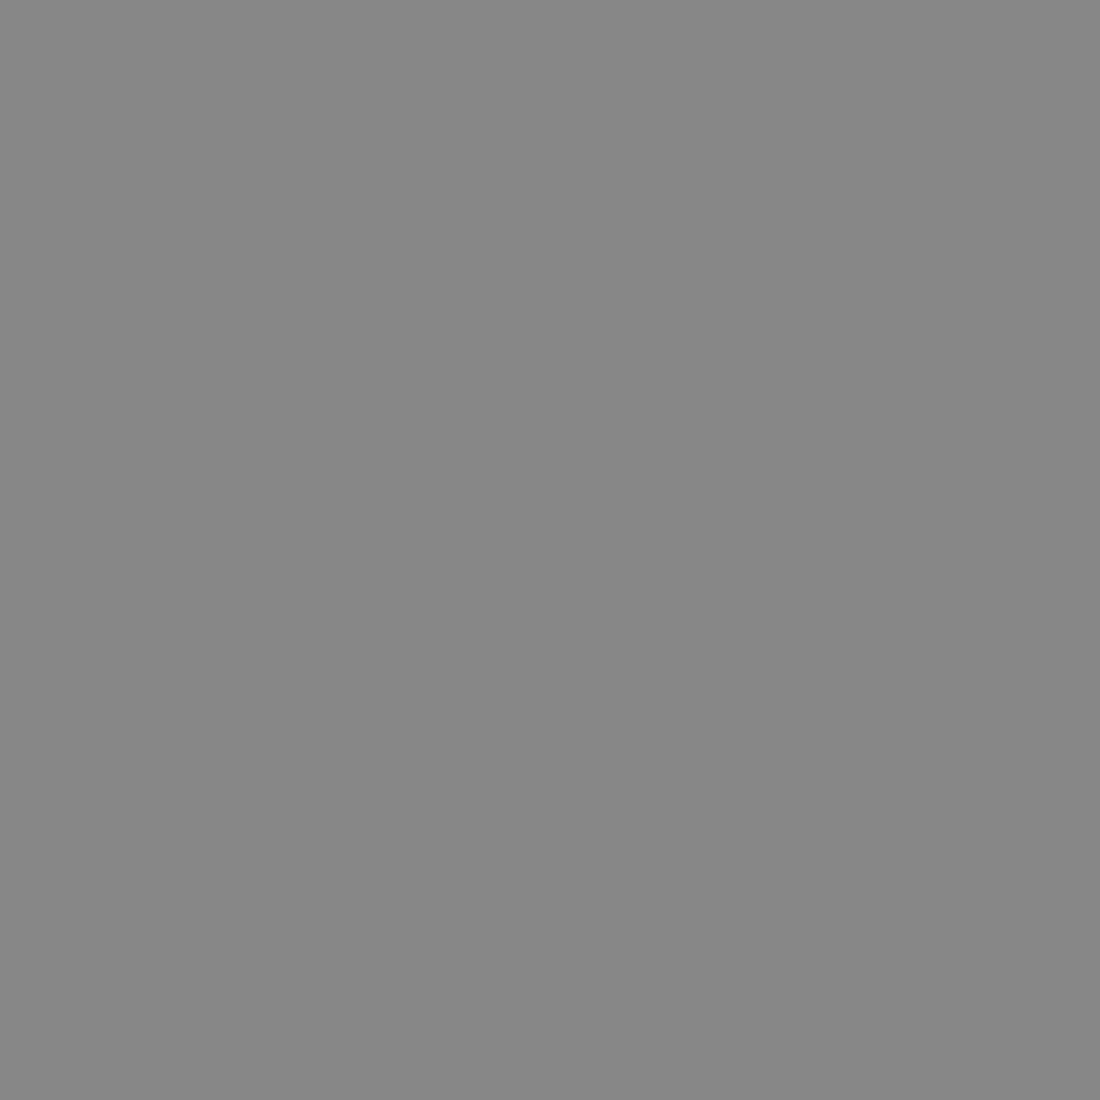

20 40


sum 133515 118680
128 135


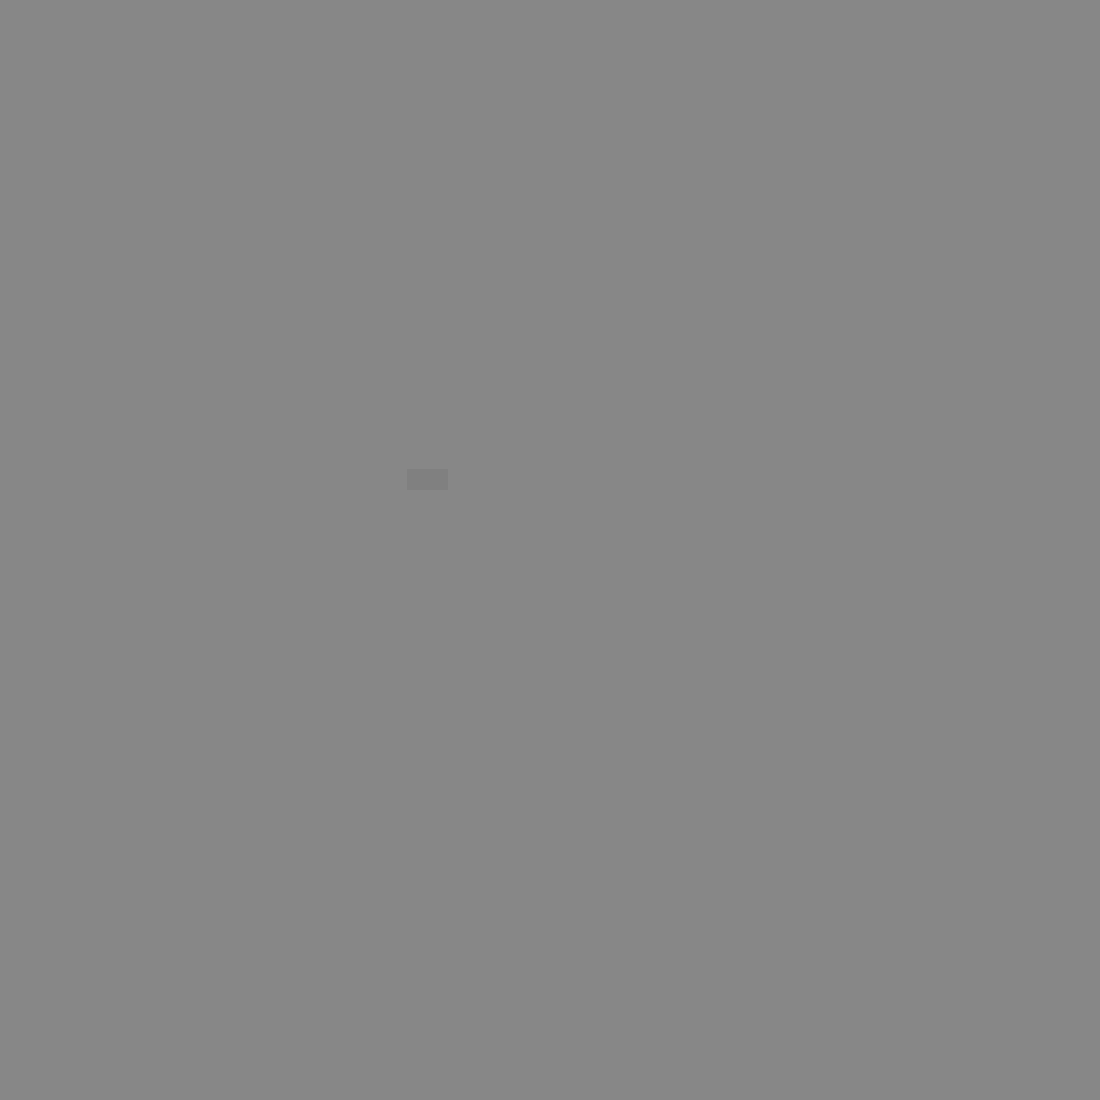

31 62


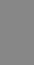

sum 298350 265200
255 135


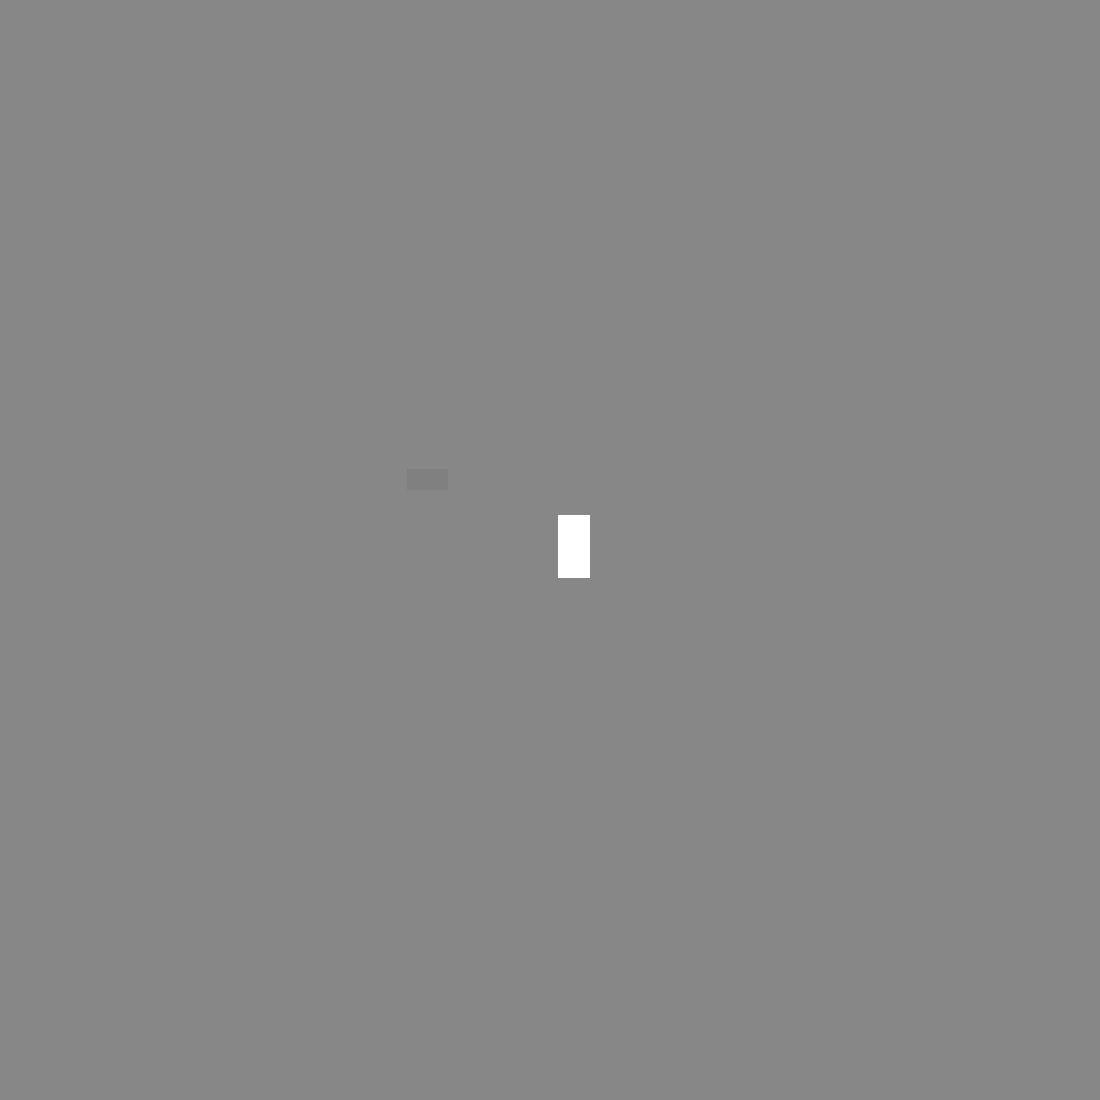

29 58


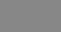

sum 263520 234240
192 135


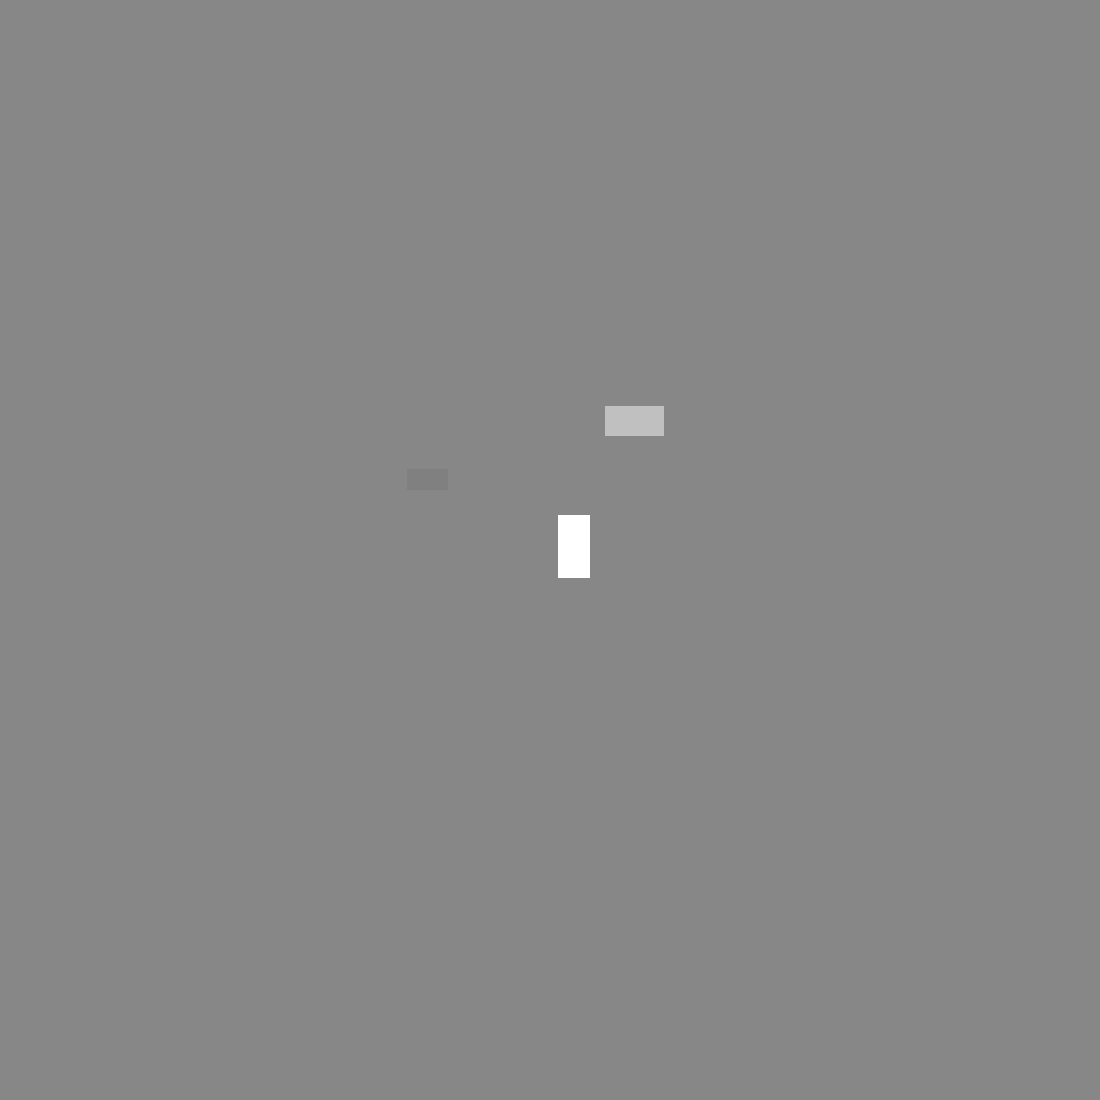

20 40


sum 133515 118680
192 135


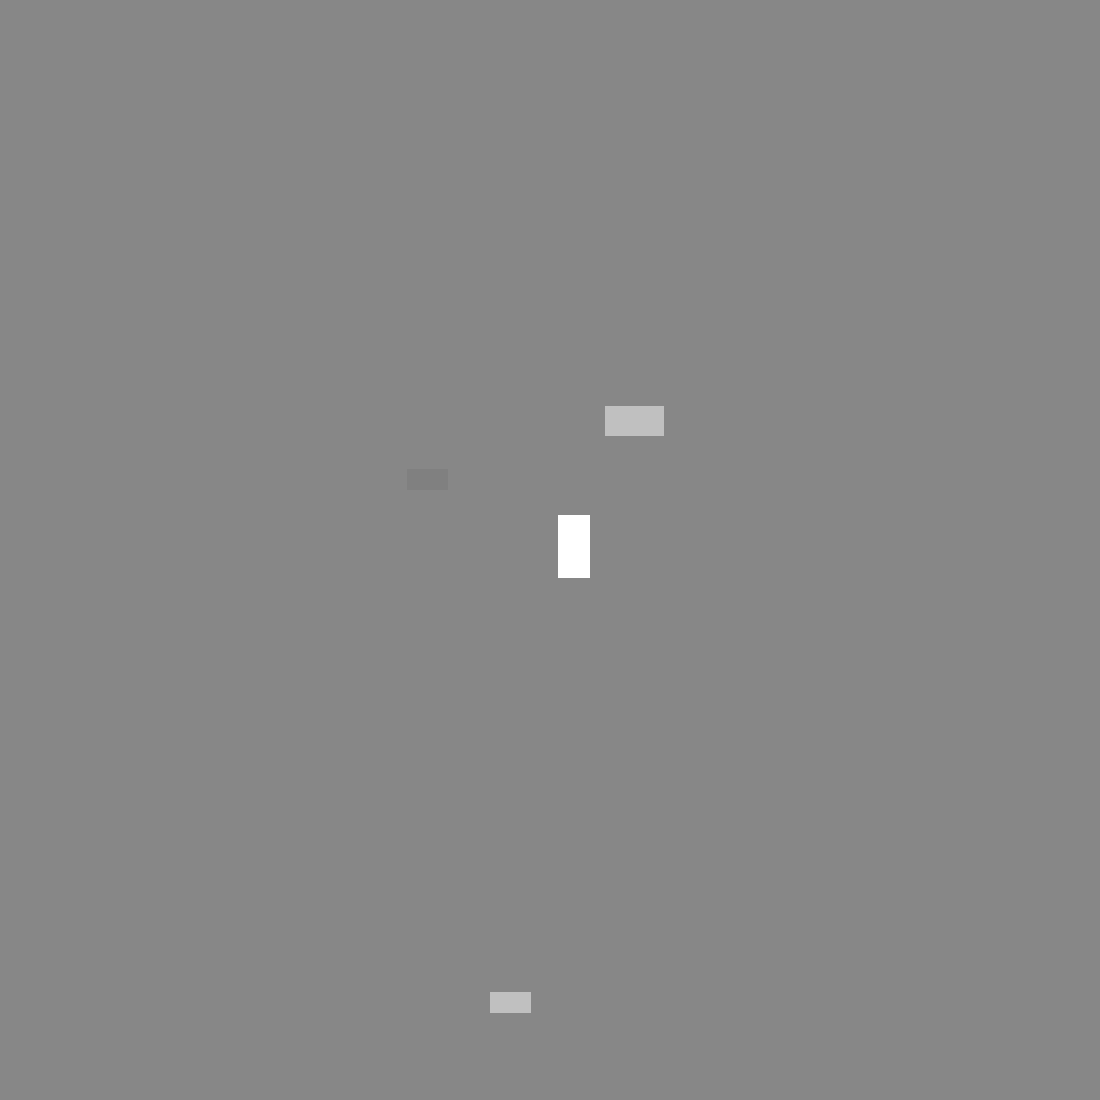

35 70


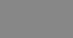

sum 374490 332880
64 135


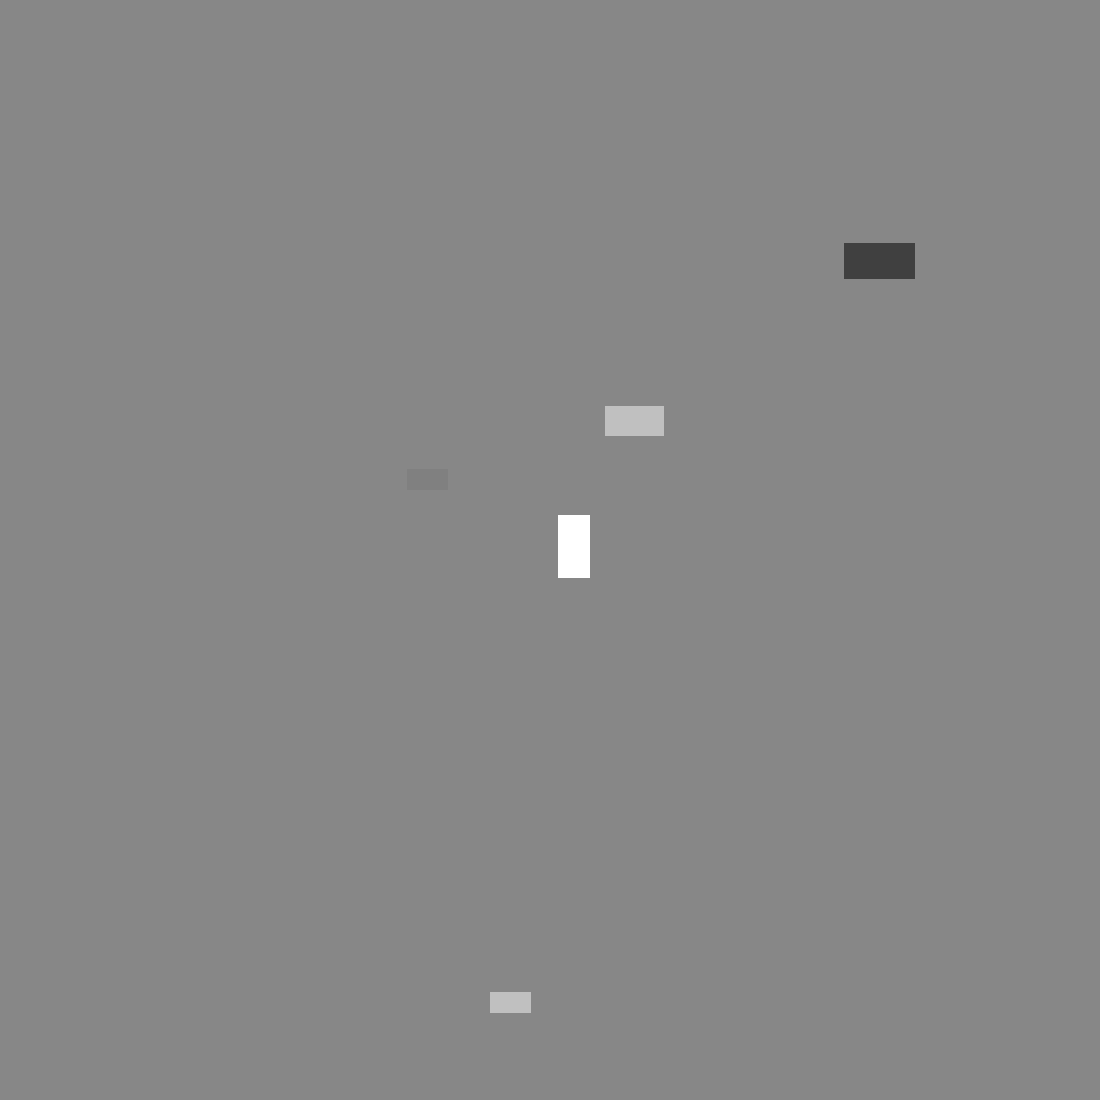

35 70


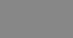

sum 374490 332880
128 135


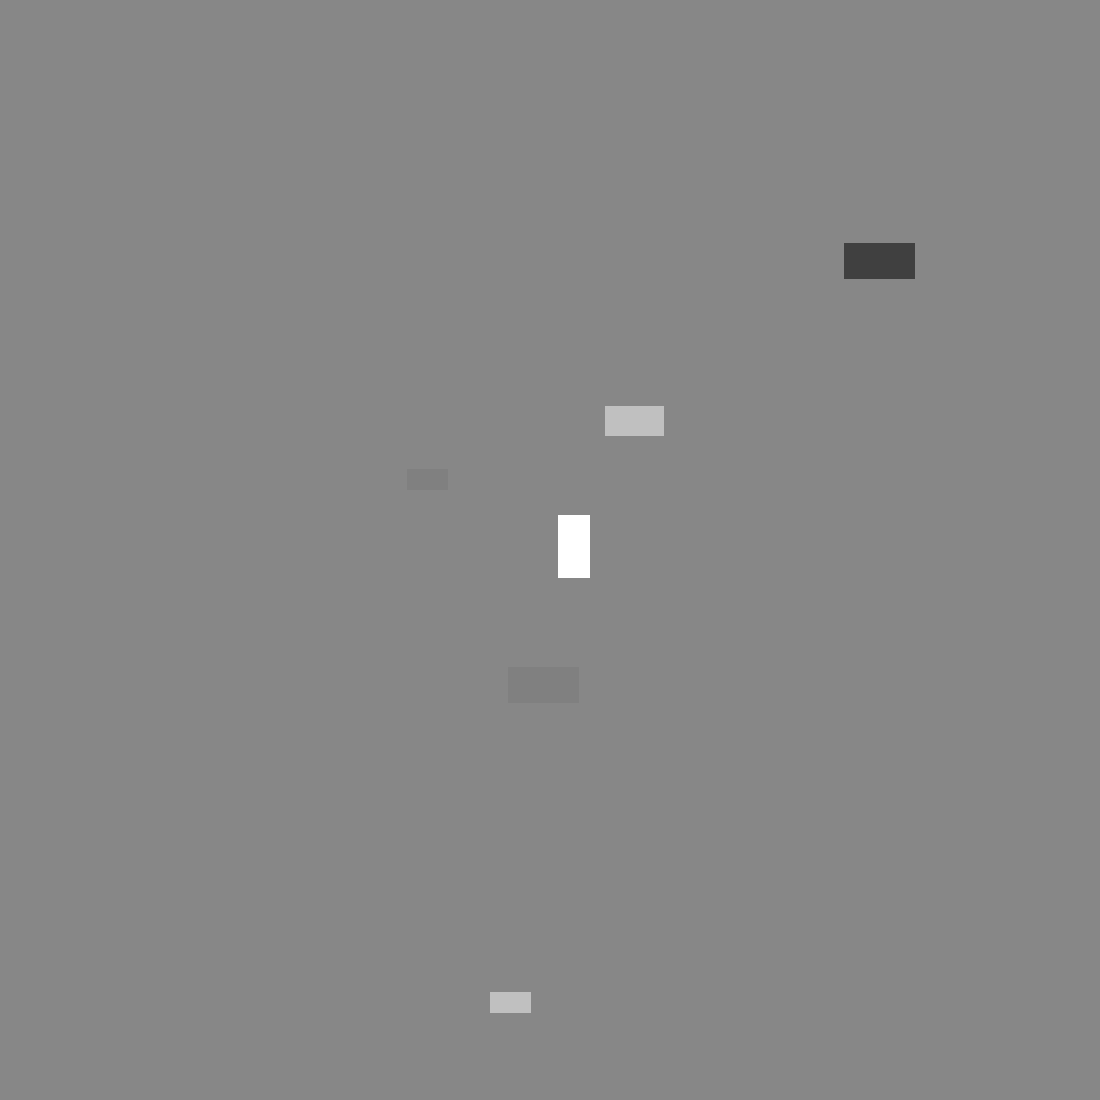

24 48


sum 185895 165240
64 135


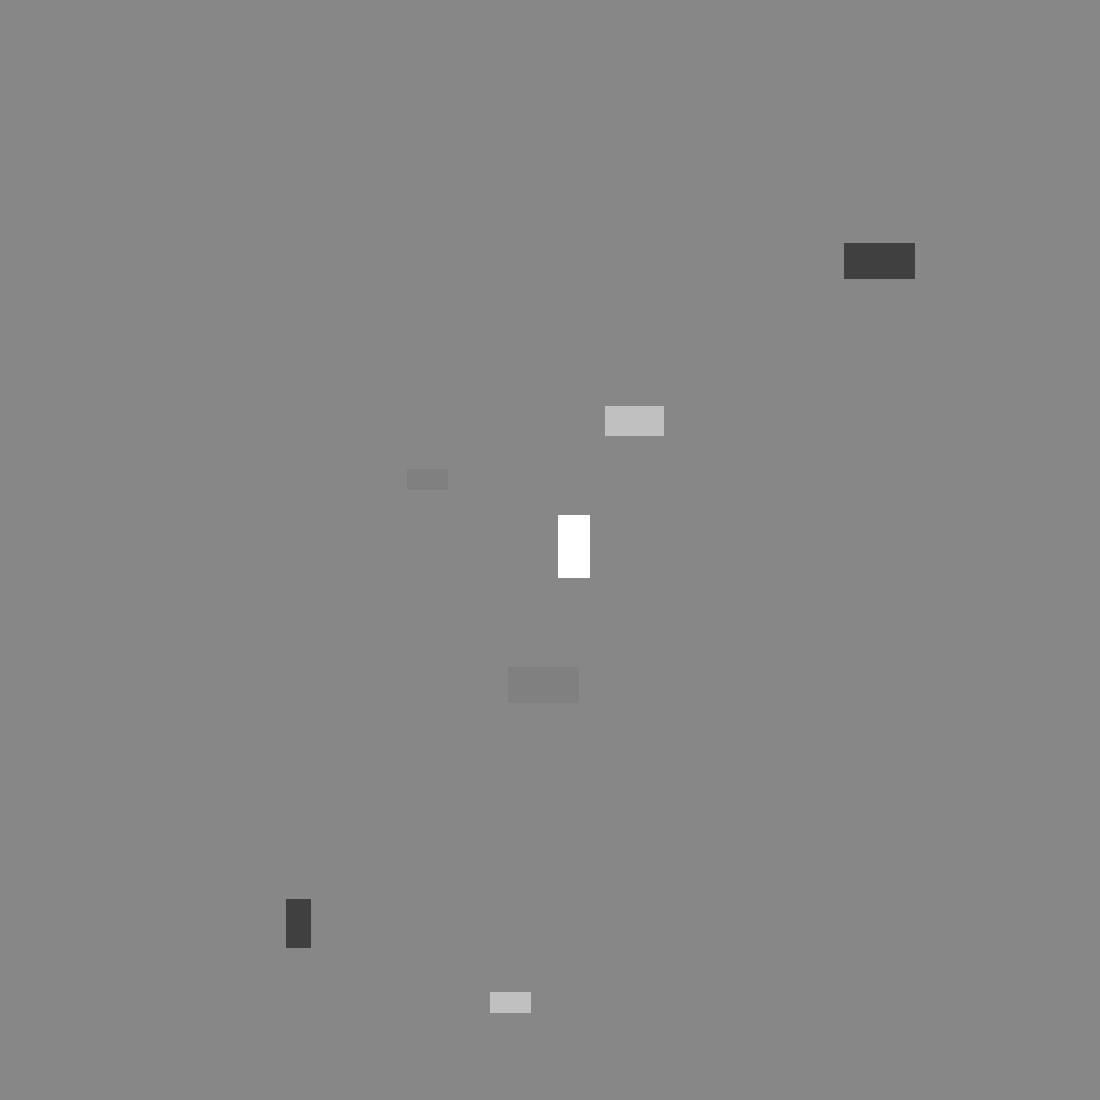

29 58


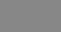

sum 263520 234240
255 135


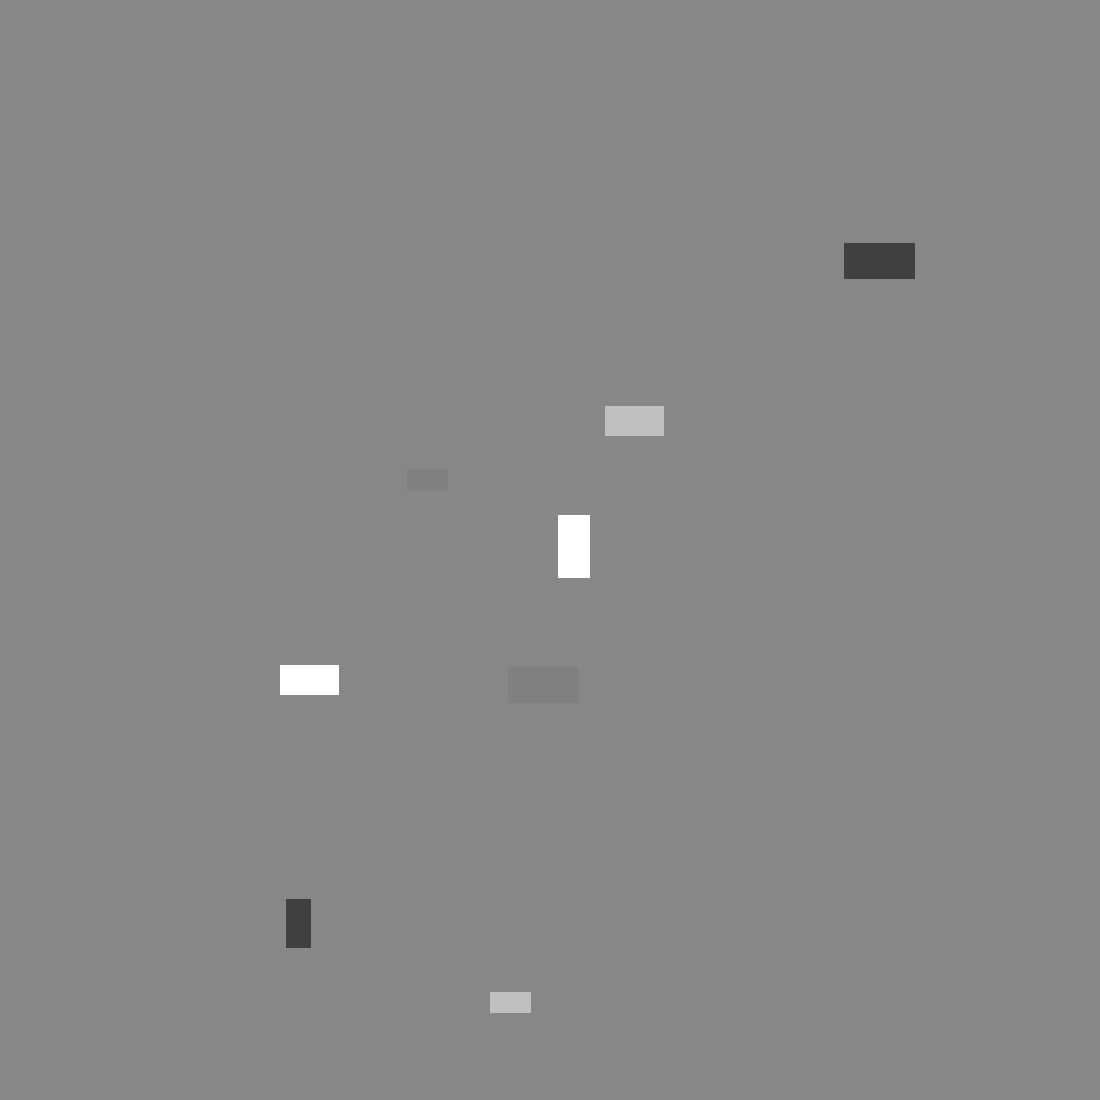

30 60


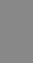

sum 280665 249480
255 135


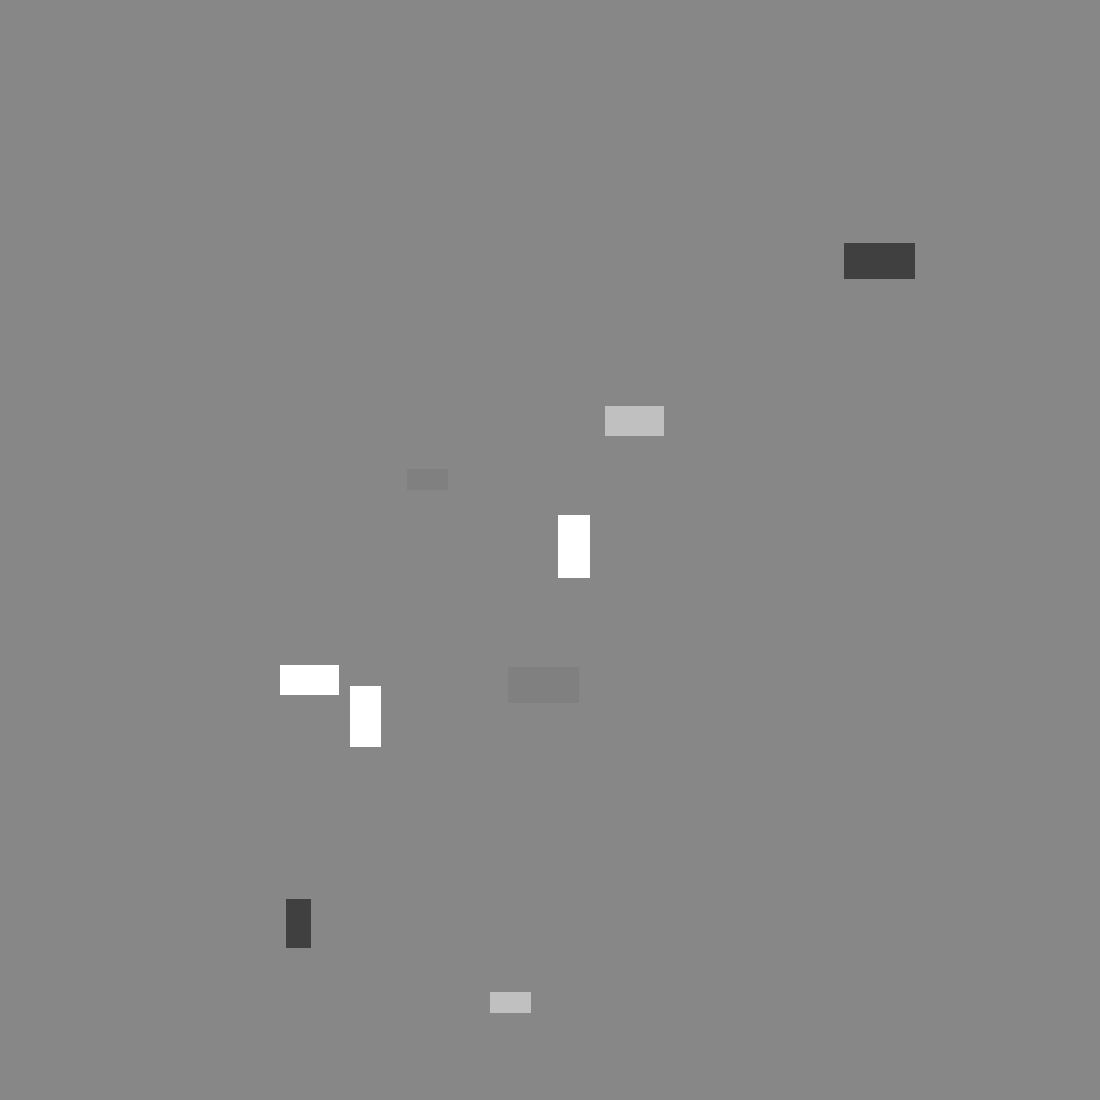

28 56


sum 246915 219480
128 135


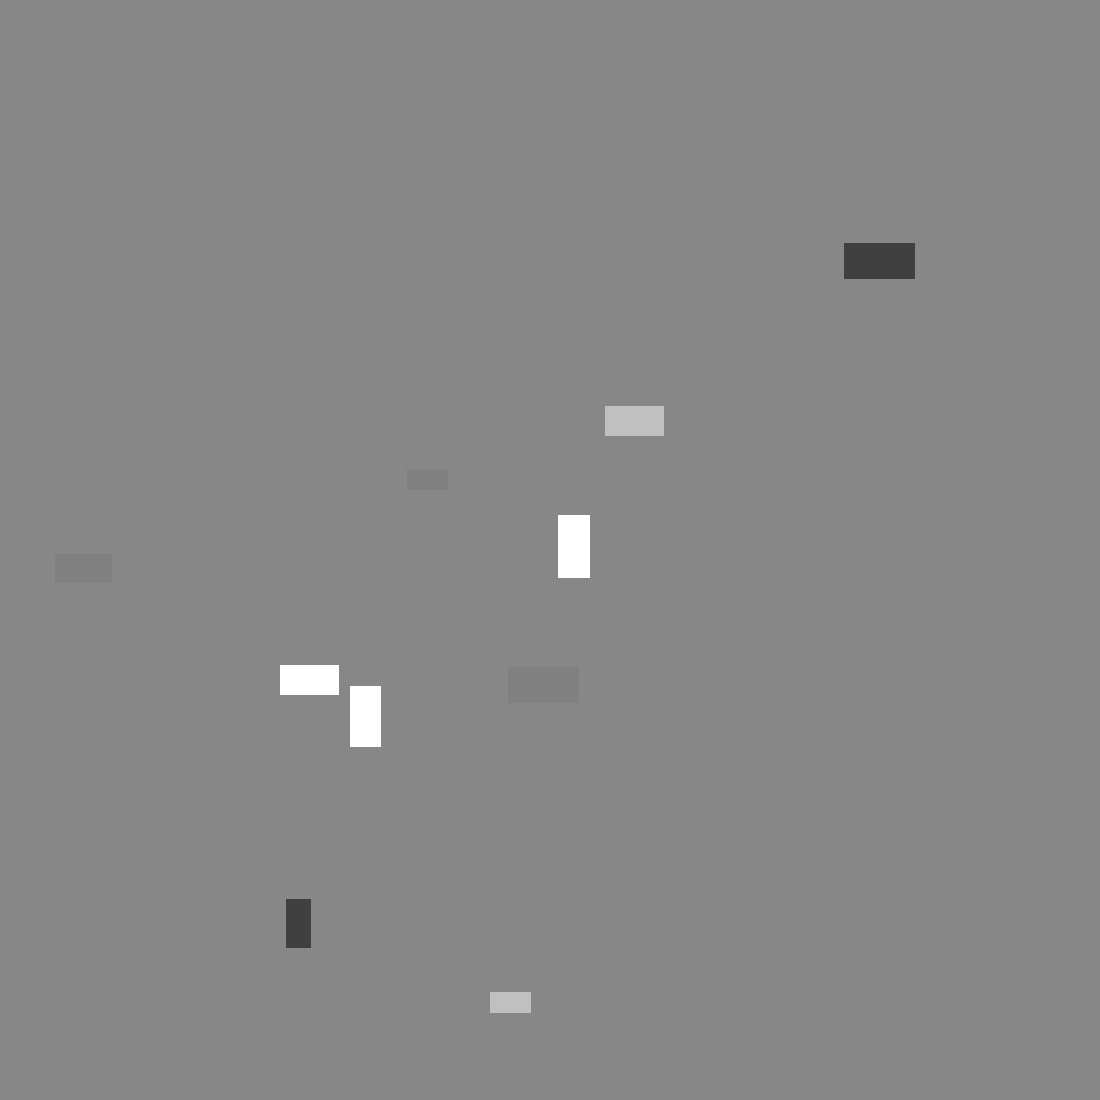

25 50


sum 200340 178080
192 135


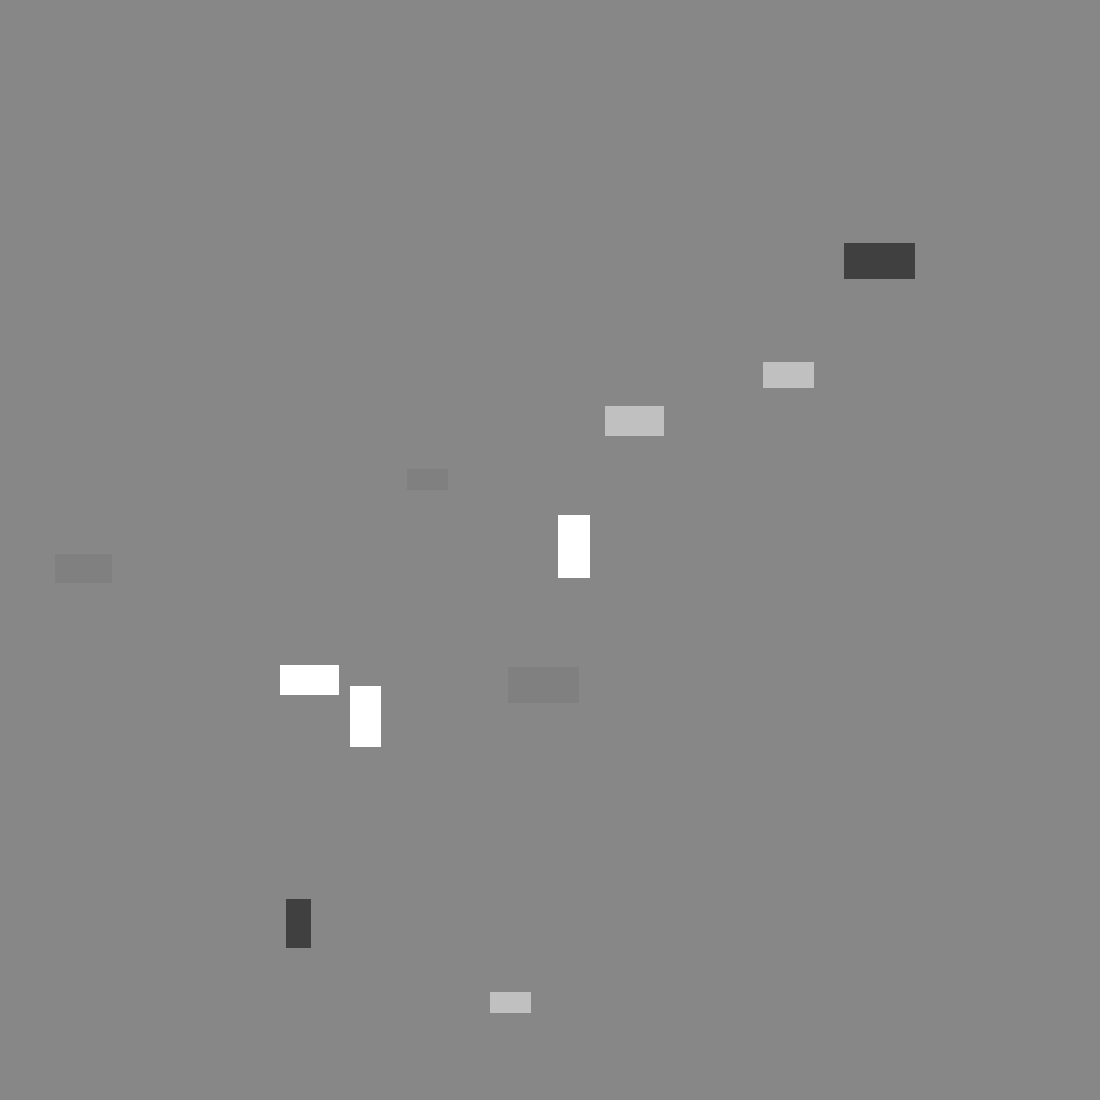

26 52


sum 215325 191400
64 135


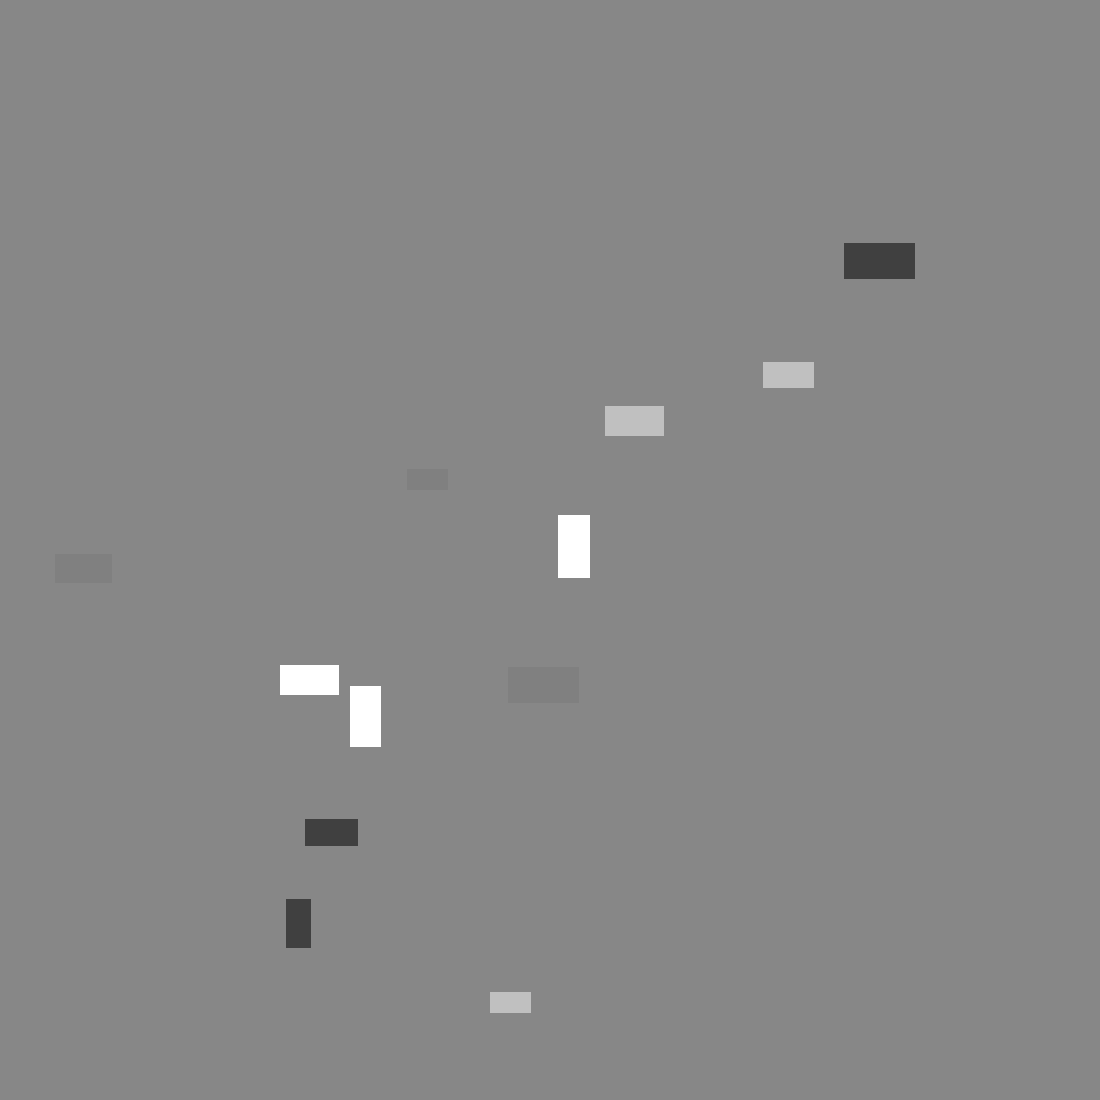

23 46


sum 171990 152880
0 135


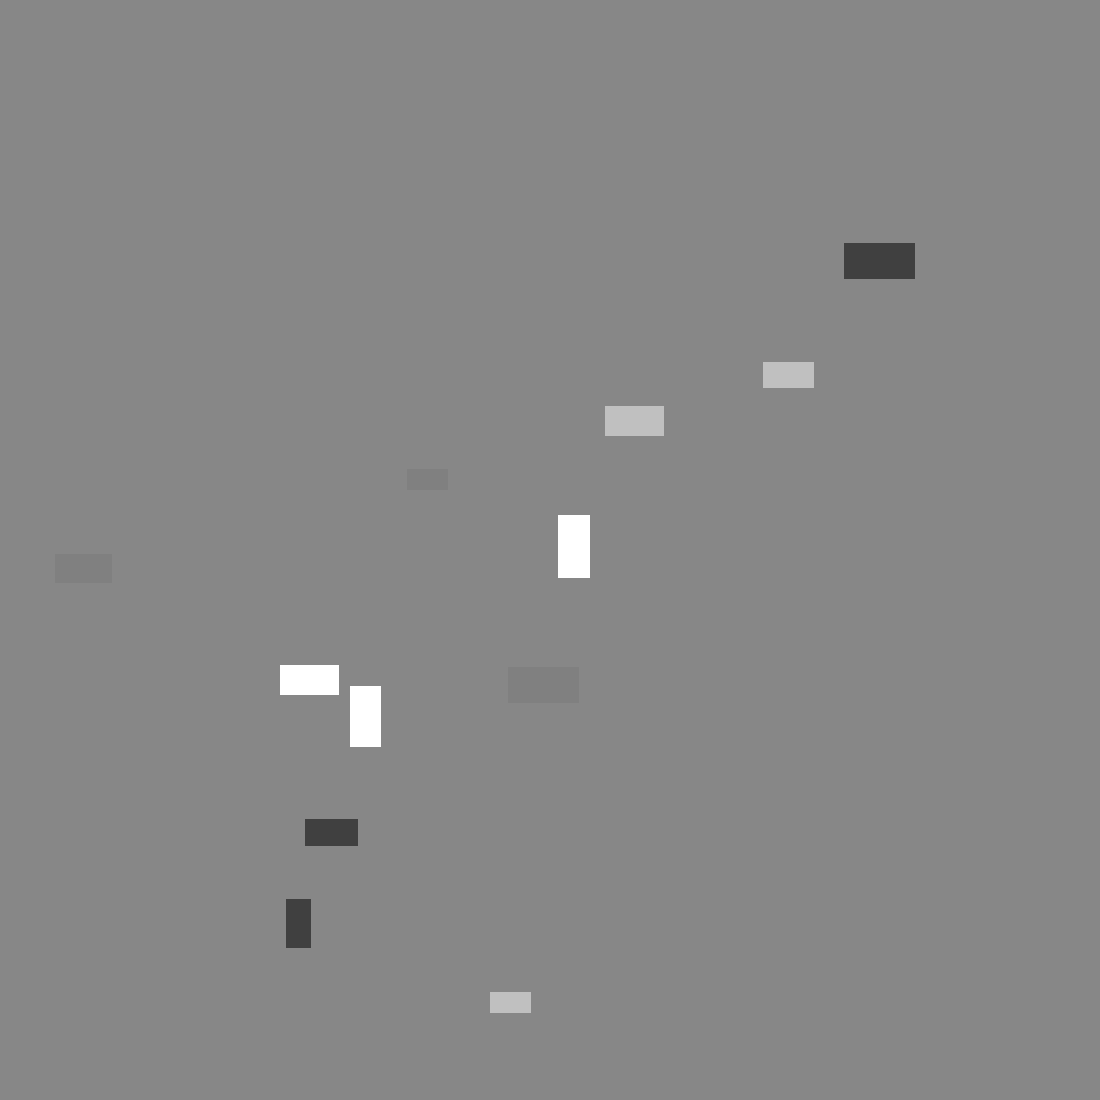

27 54


sum 230850 205200
192 135


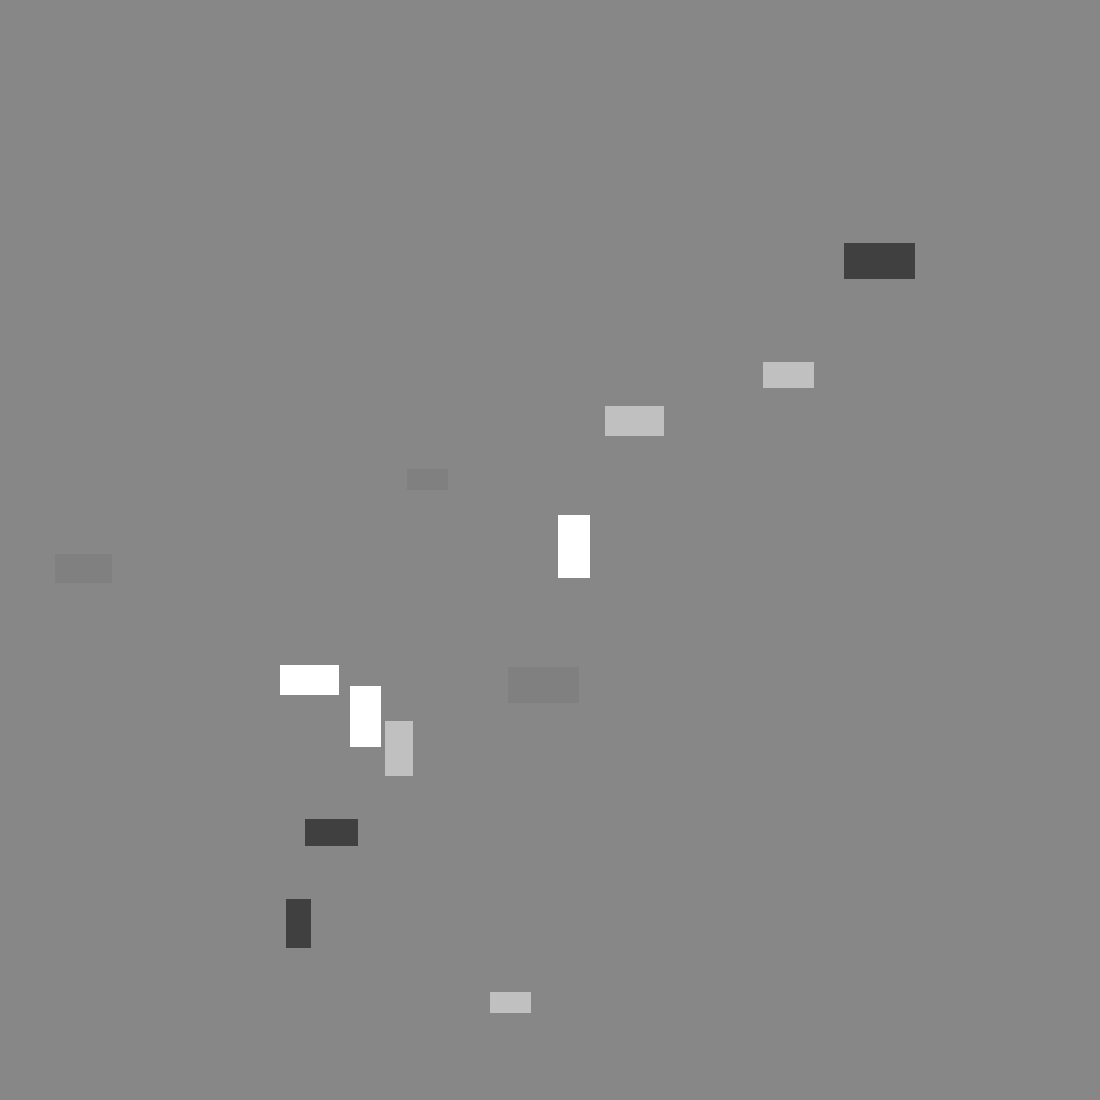

34 68


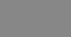

sum 354645 315240
128 135


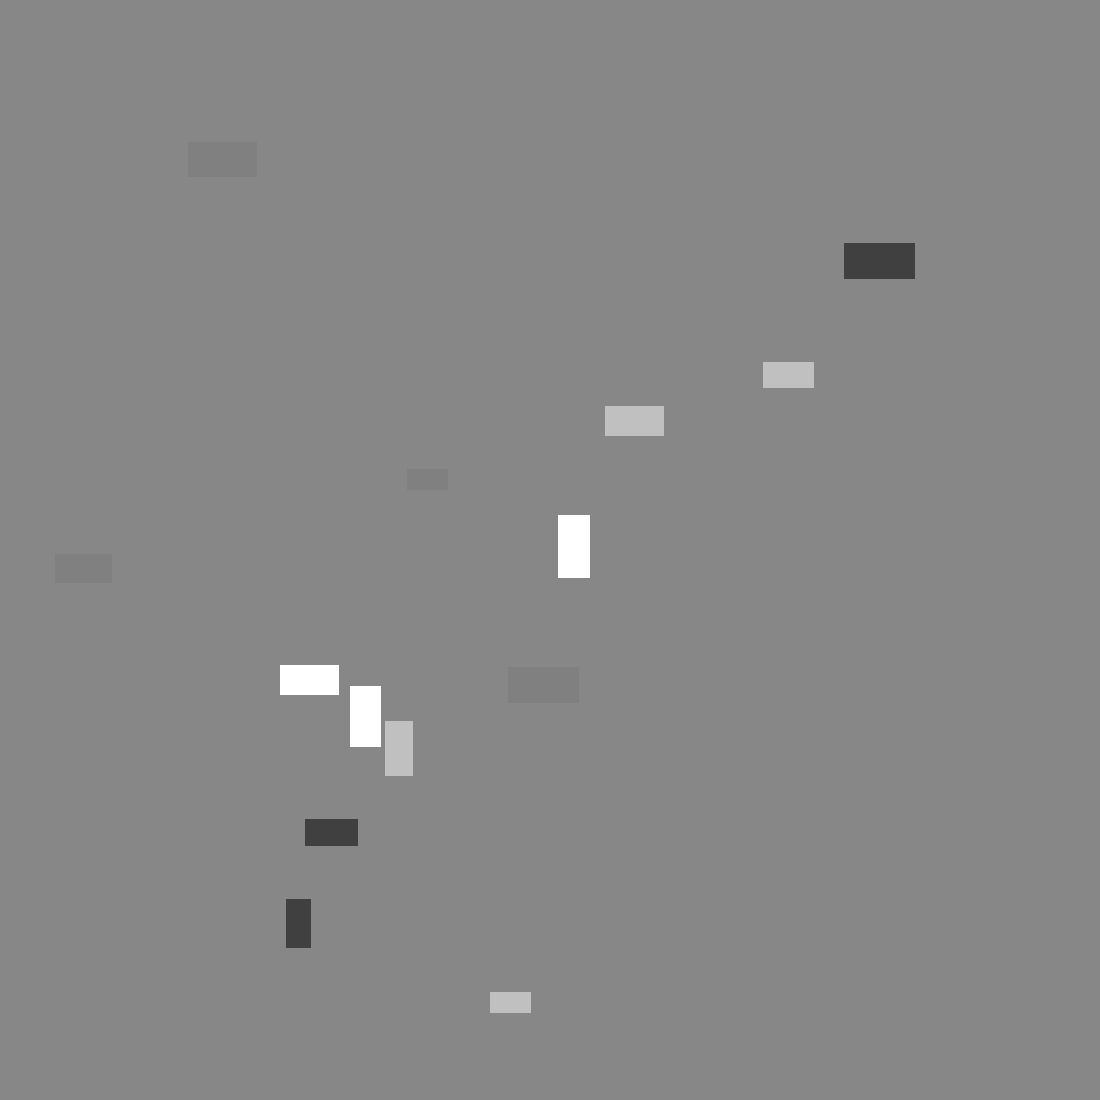

34 68


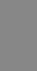

sum 354645 315240
0 135


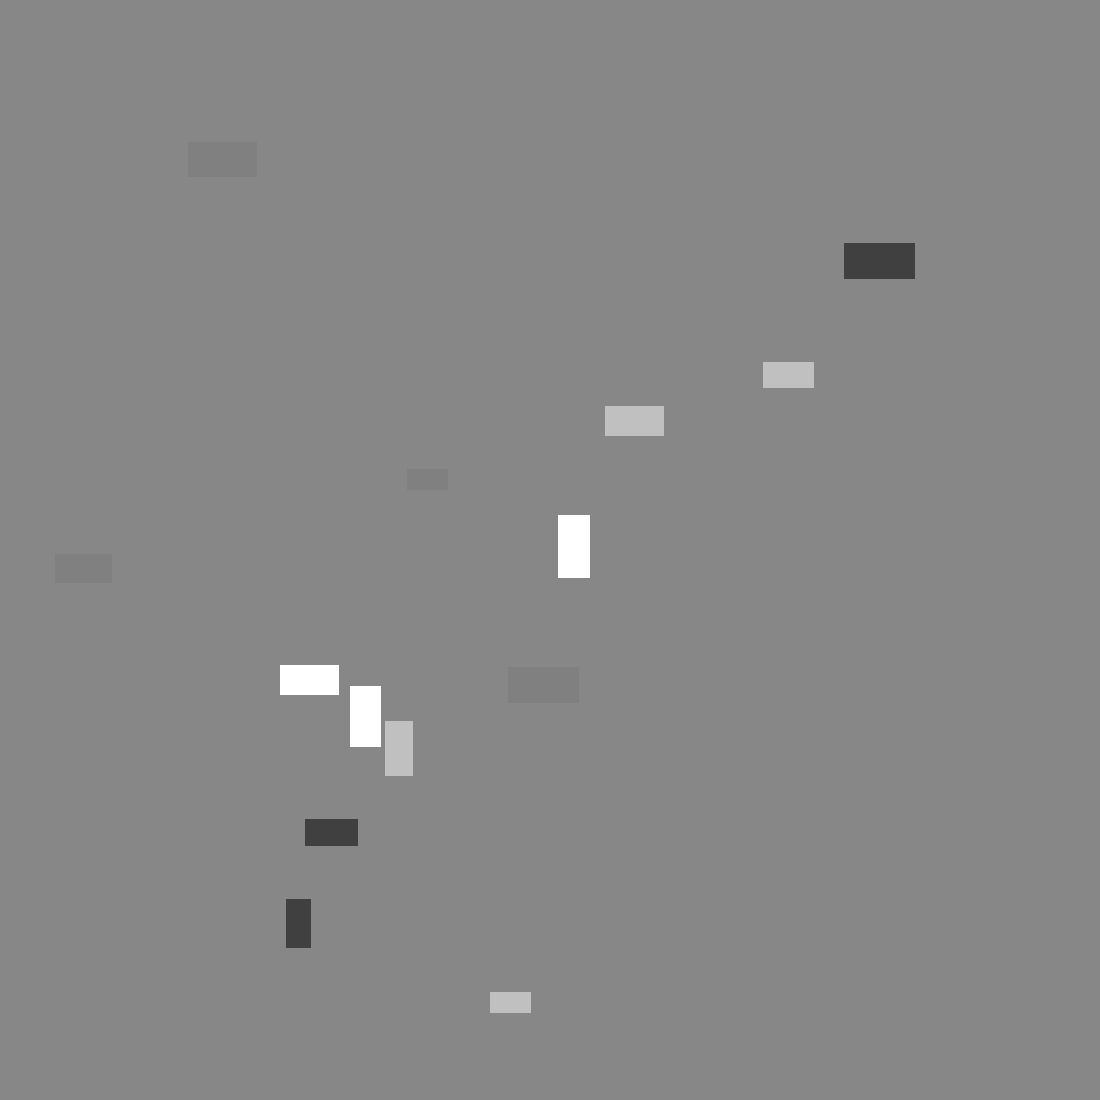

24 48


sum 185895 165240
0 135


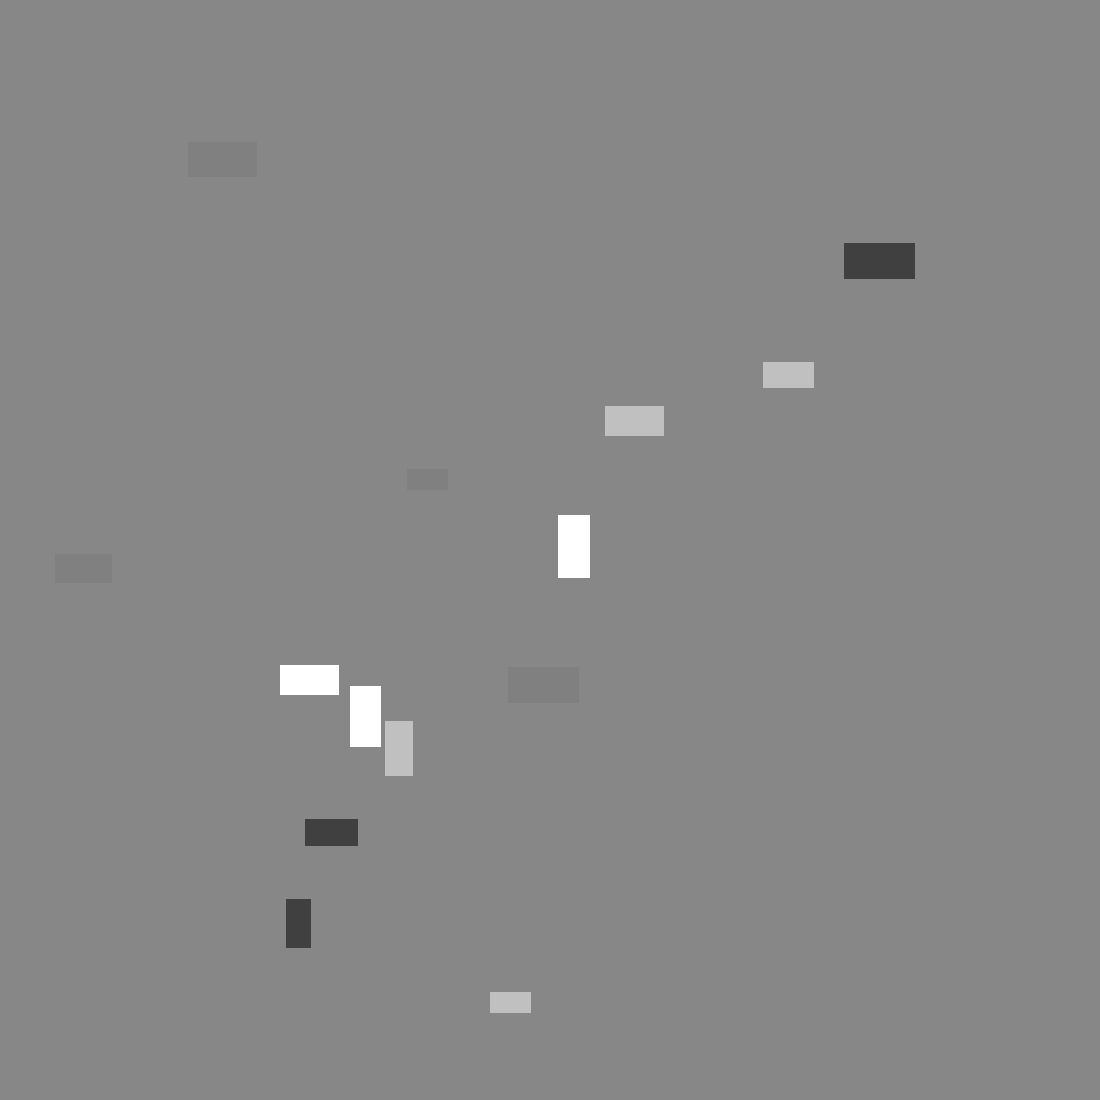

25 50


sum 200340 178080
192 135


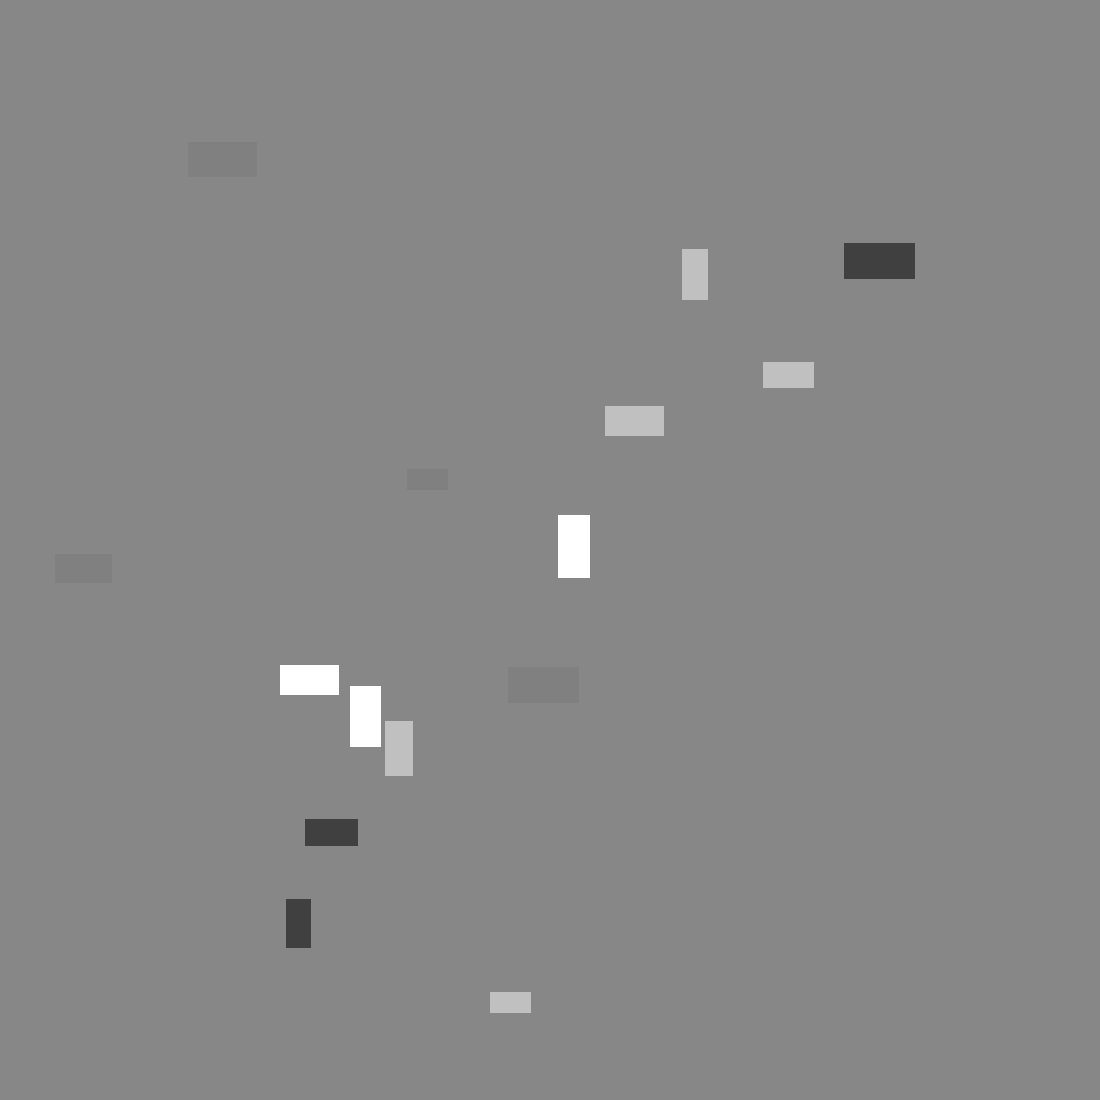

32 64


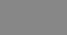

sum 316575 281400
128 135


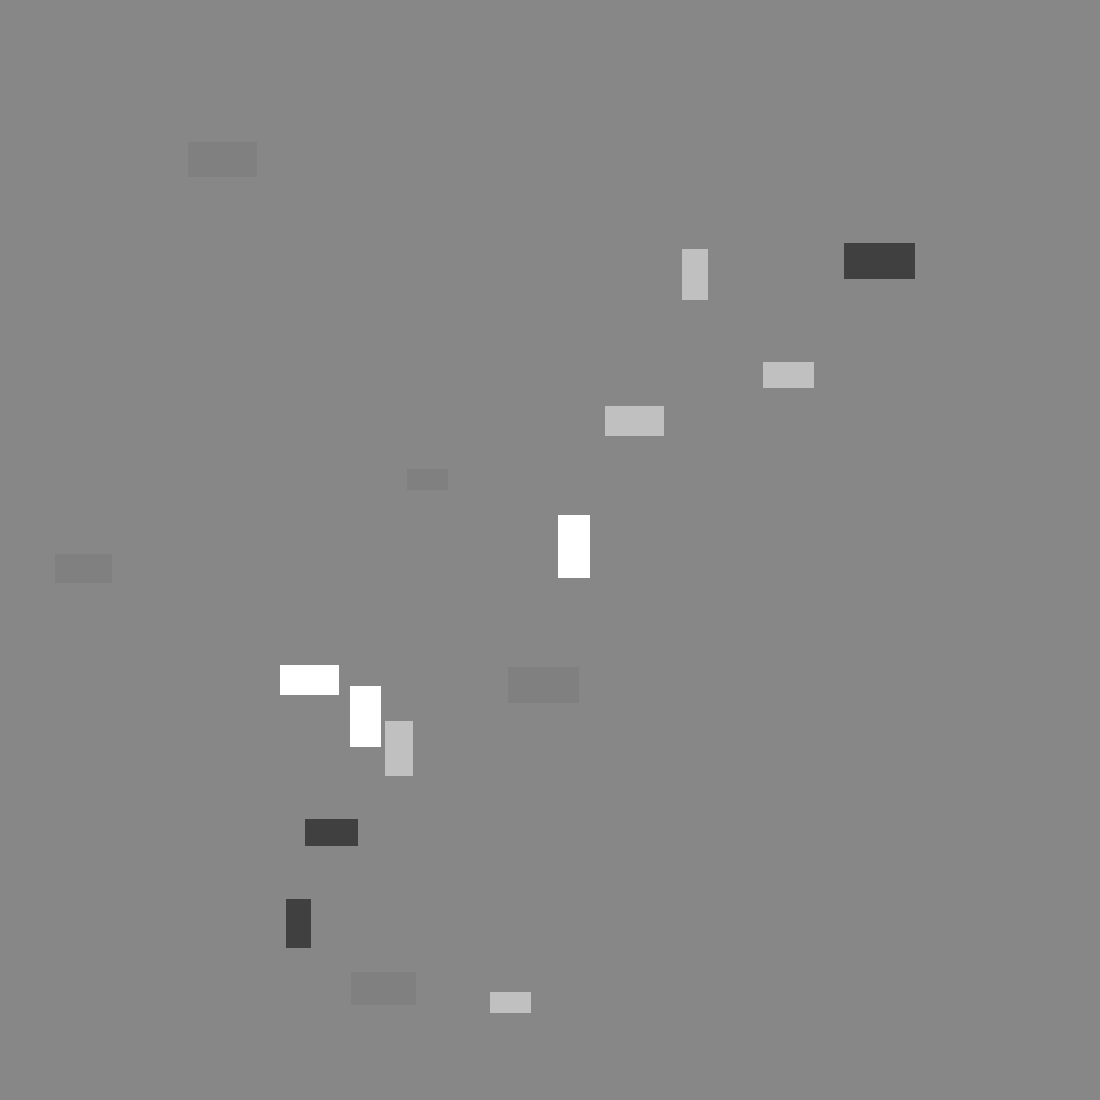

29 58


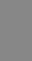

sum 263520 234240
255 135


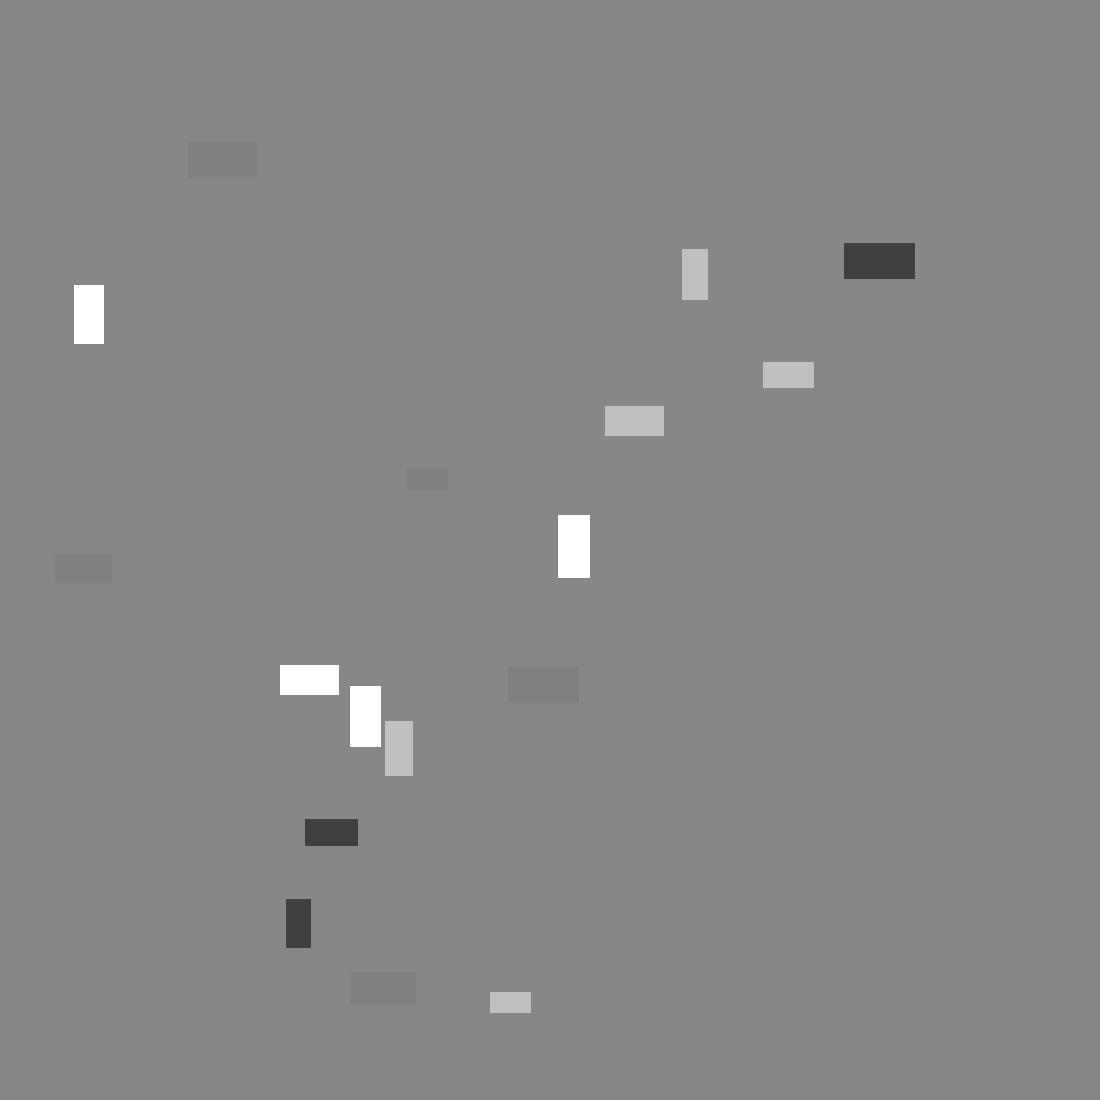

30 60


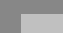

sum 326151 203994
34 68


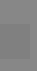

sum 347295 322590
23 46


sum 171990 152880
192 135


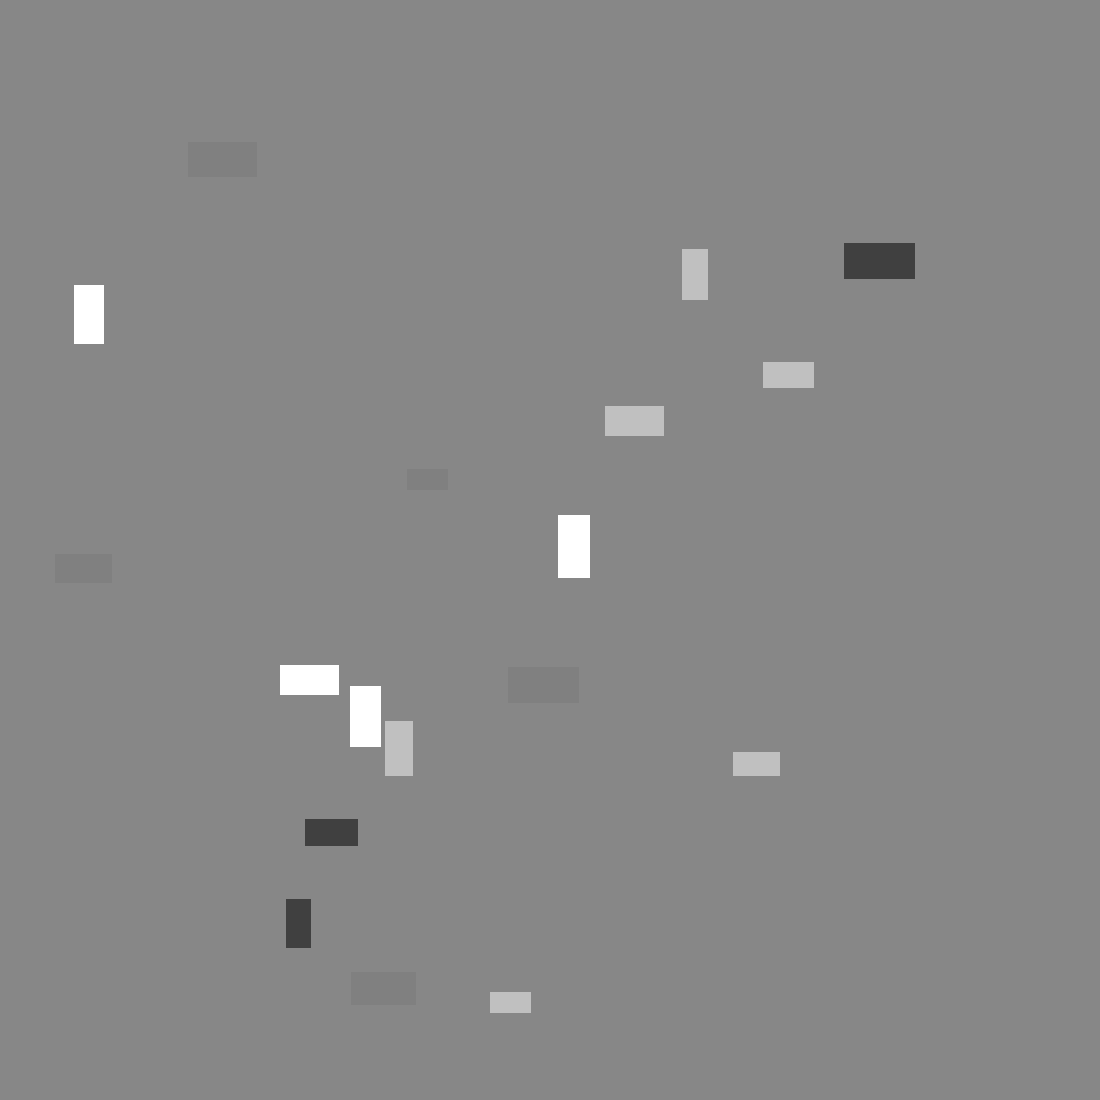

34 68


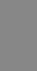

sum 354645 315240
255 135


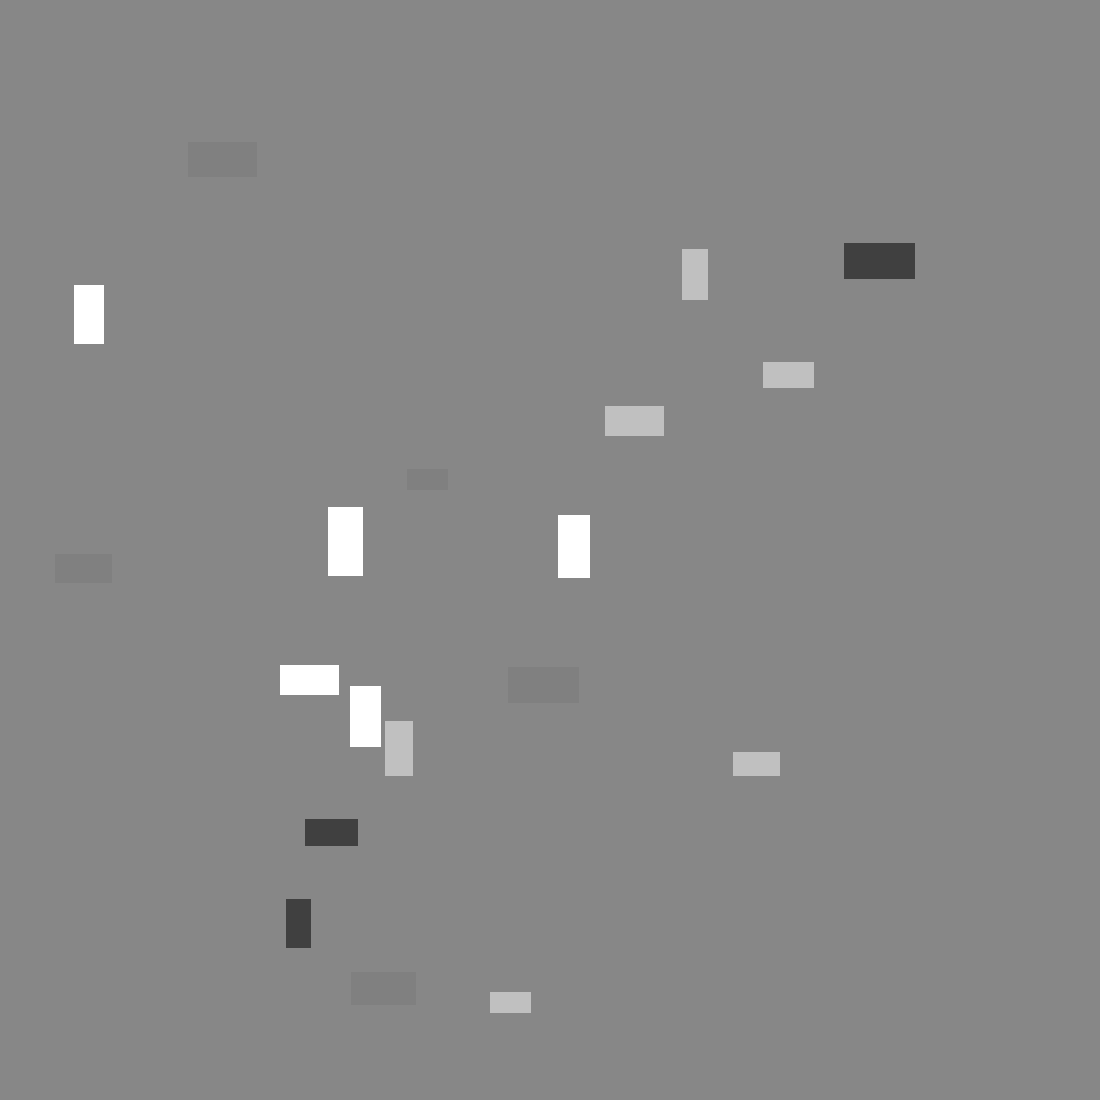

32 64


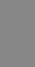

sum 316575 281400
64 135


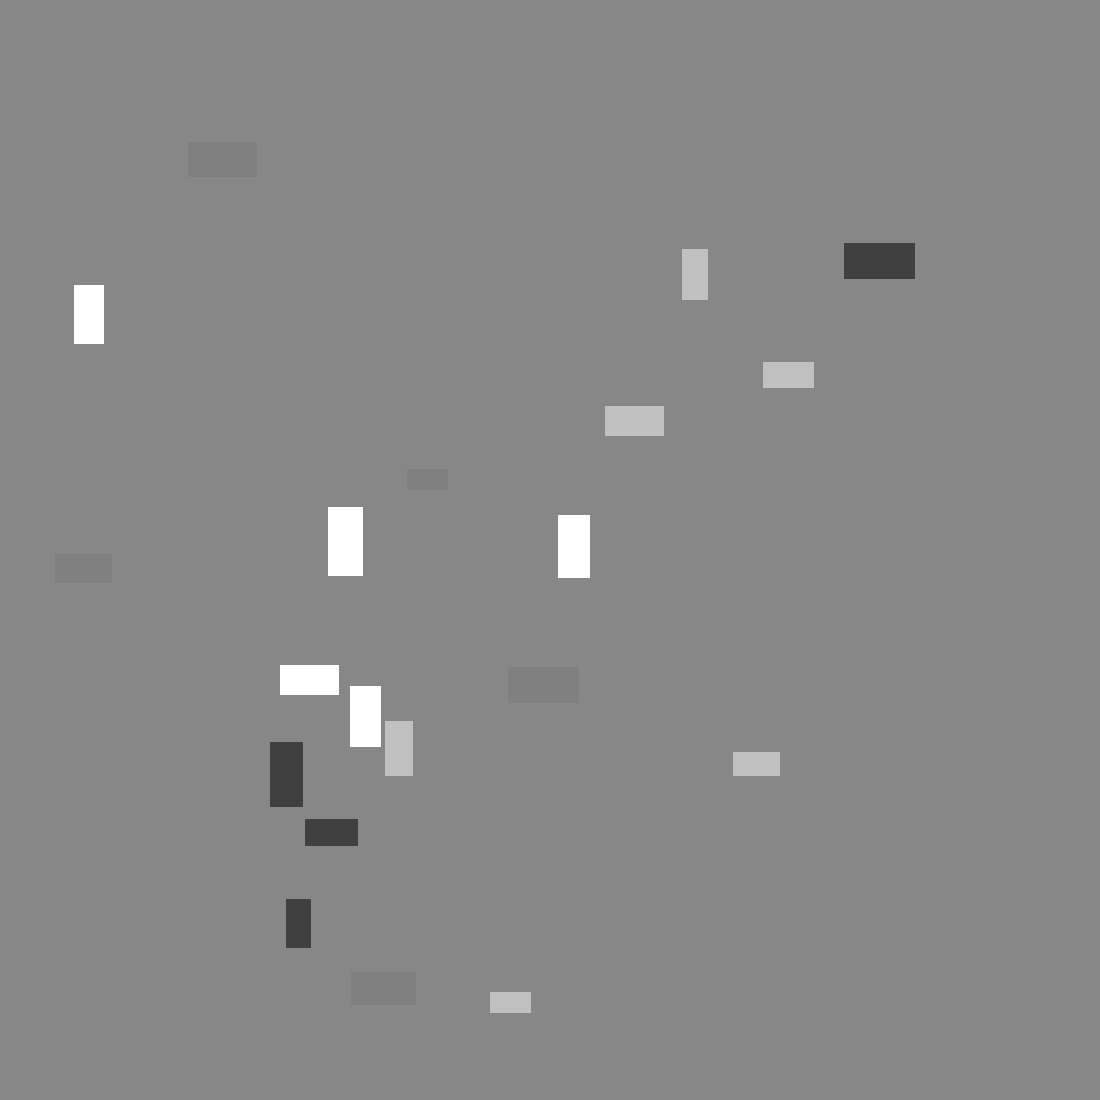

30 60


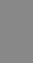

sum 280665 249480
64 135


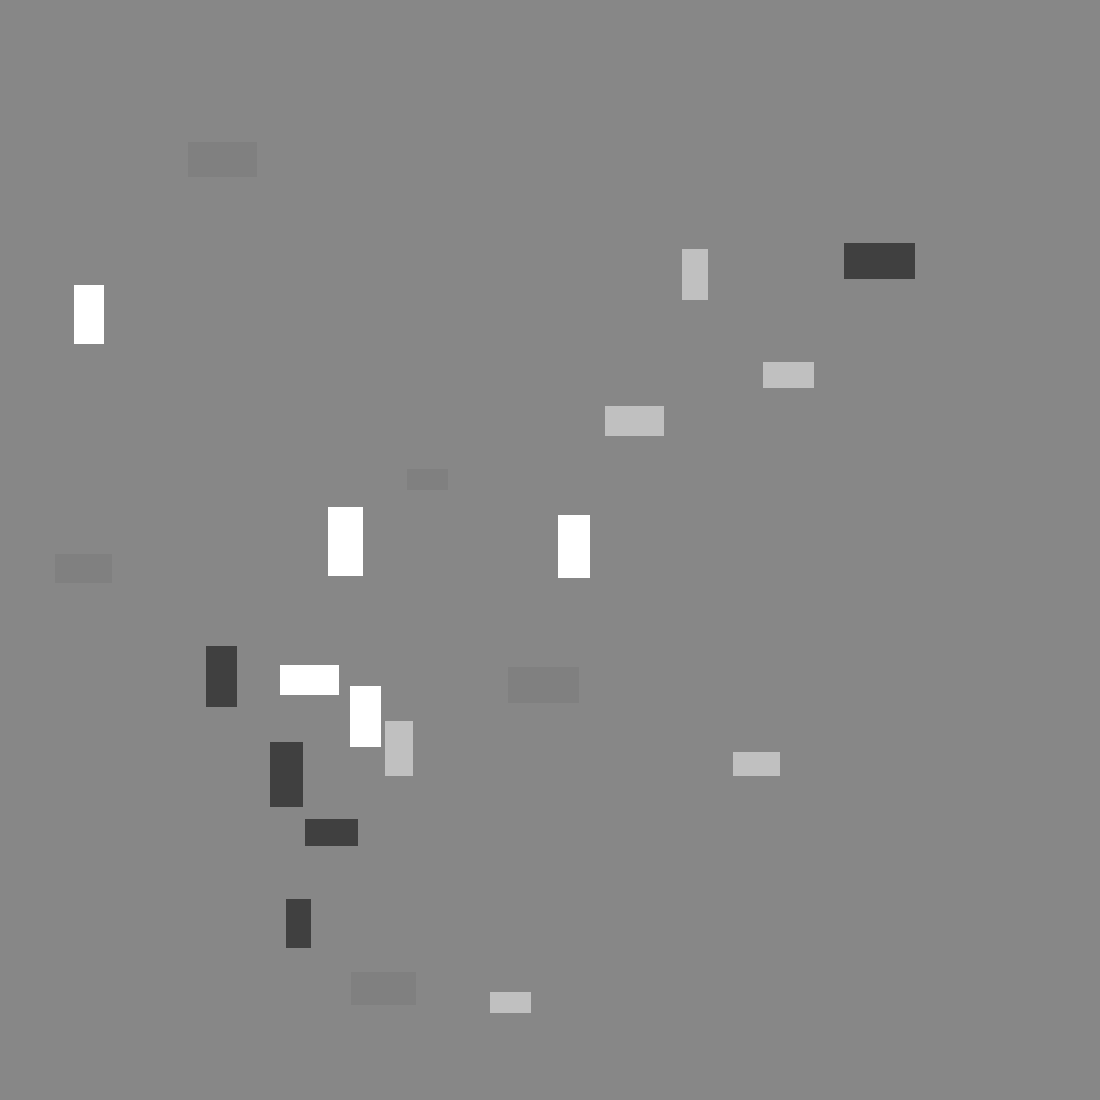

25 50


sum 200340 178080
0 135


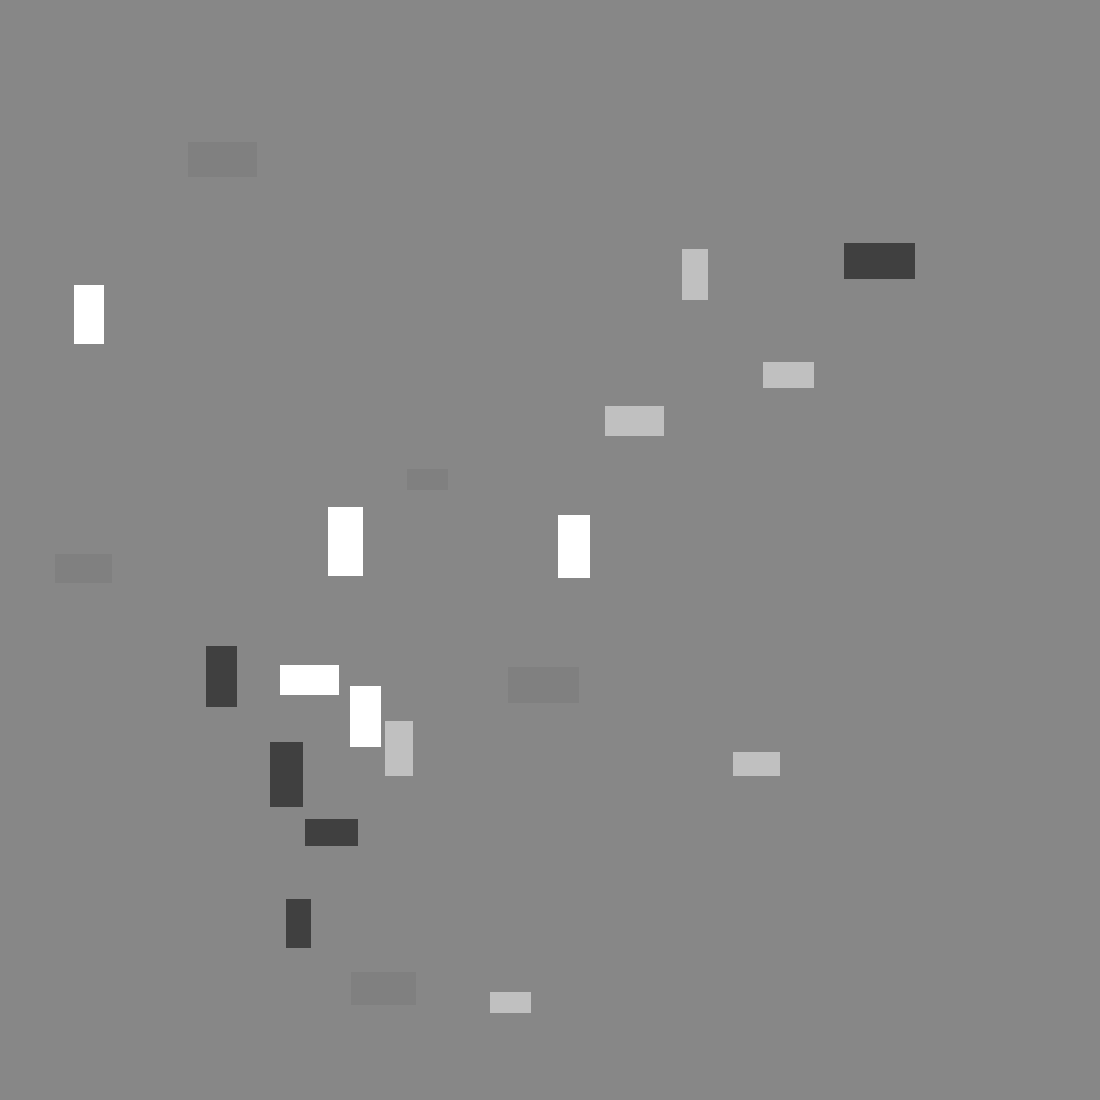

31 62


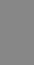

sum 298350 265200
128 135


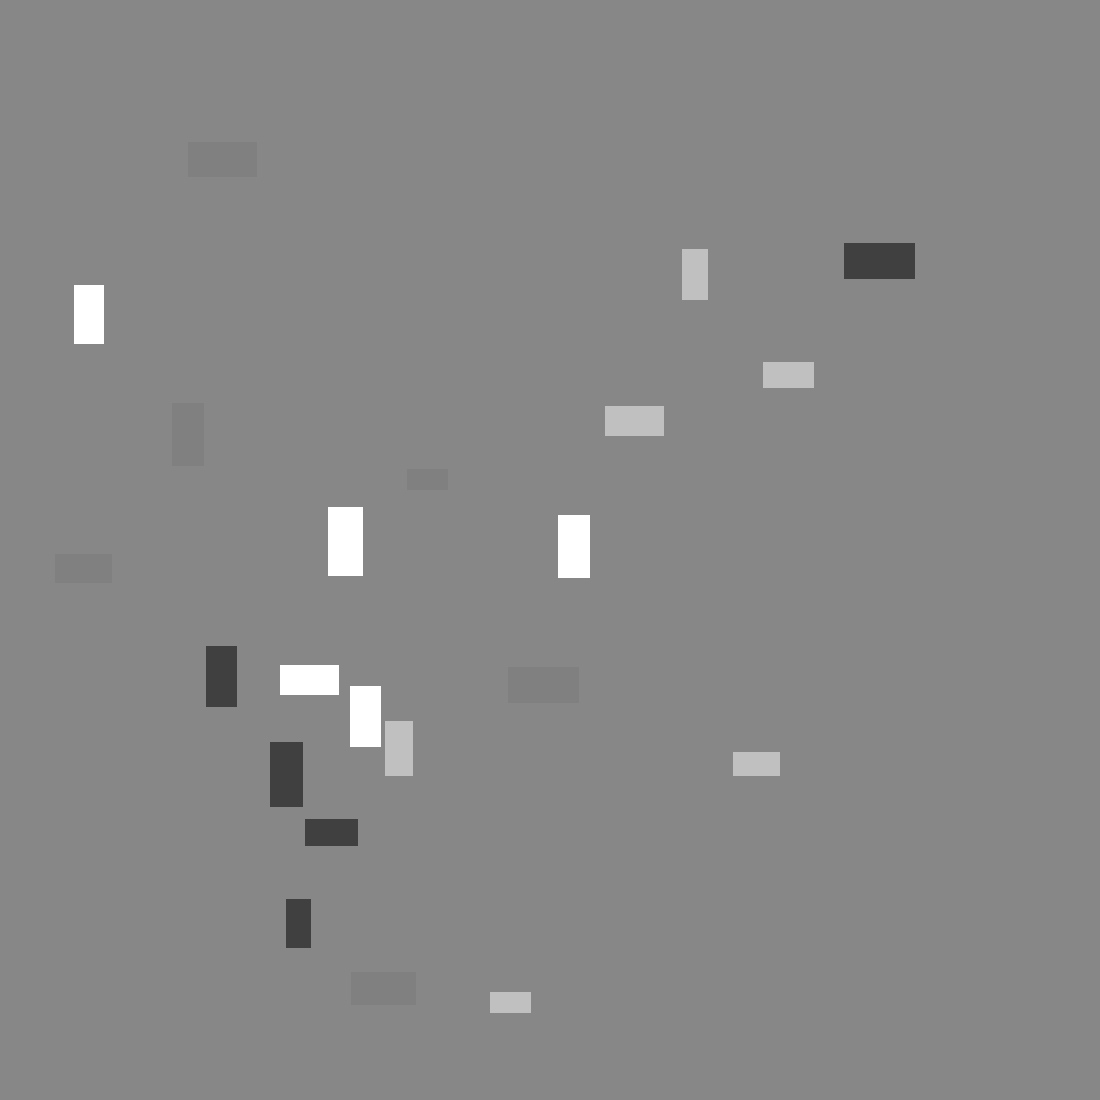

25 50


sum 200340 178080
128 135


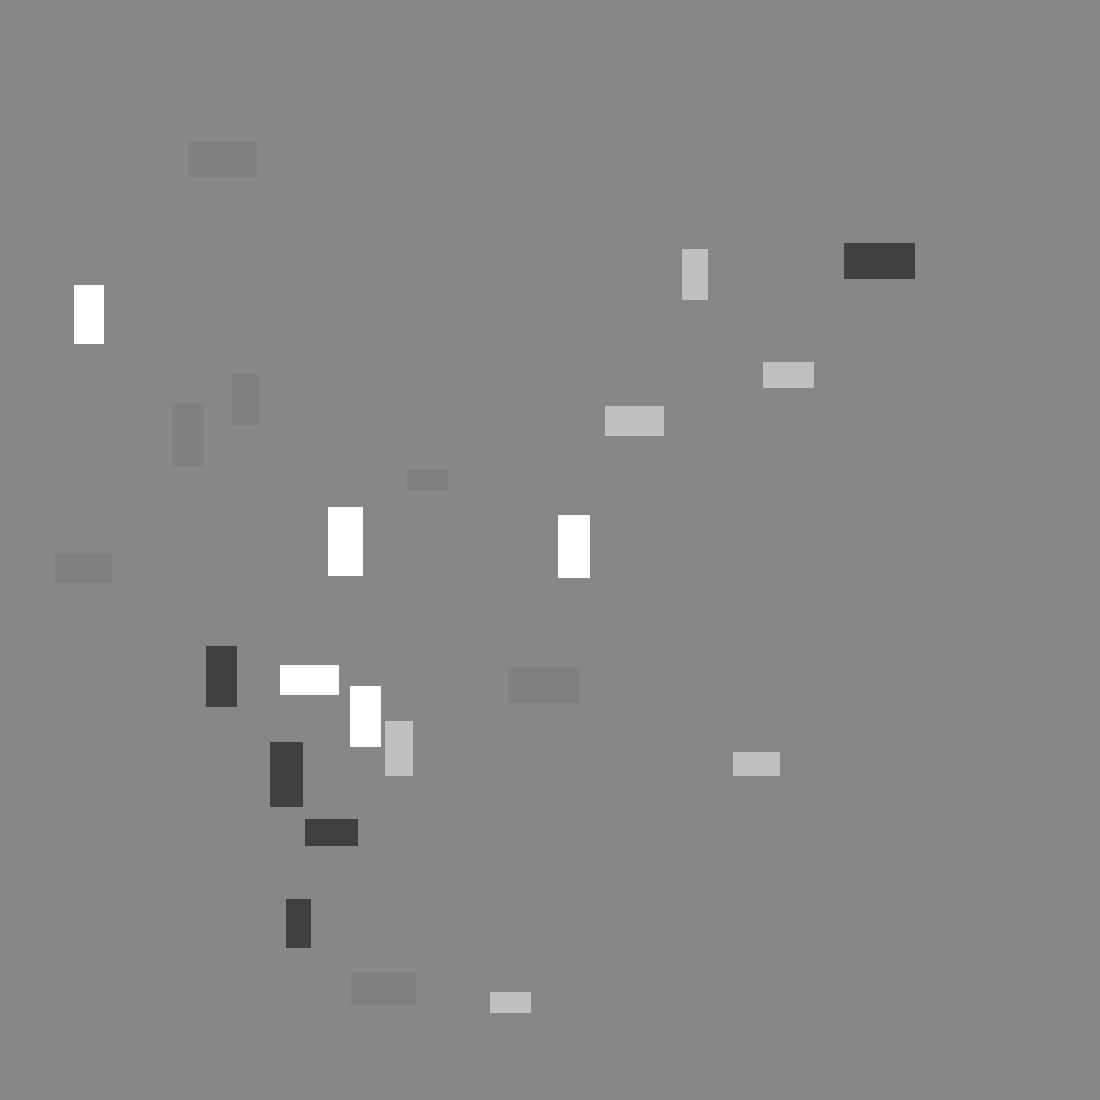

25 50


sum 200340 178080
192 135


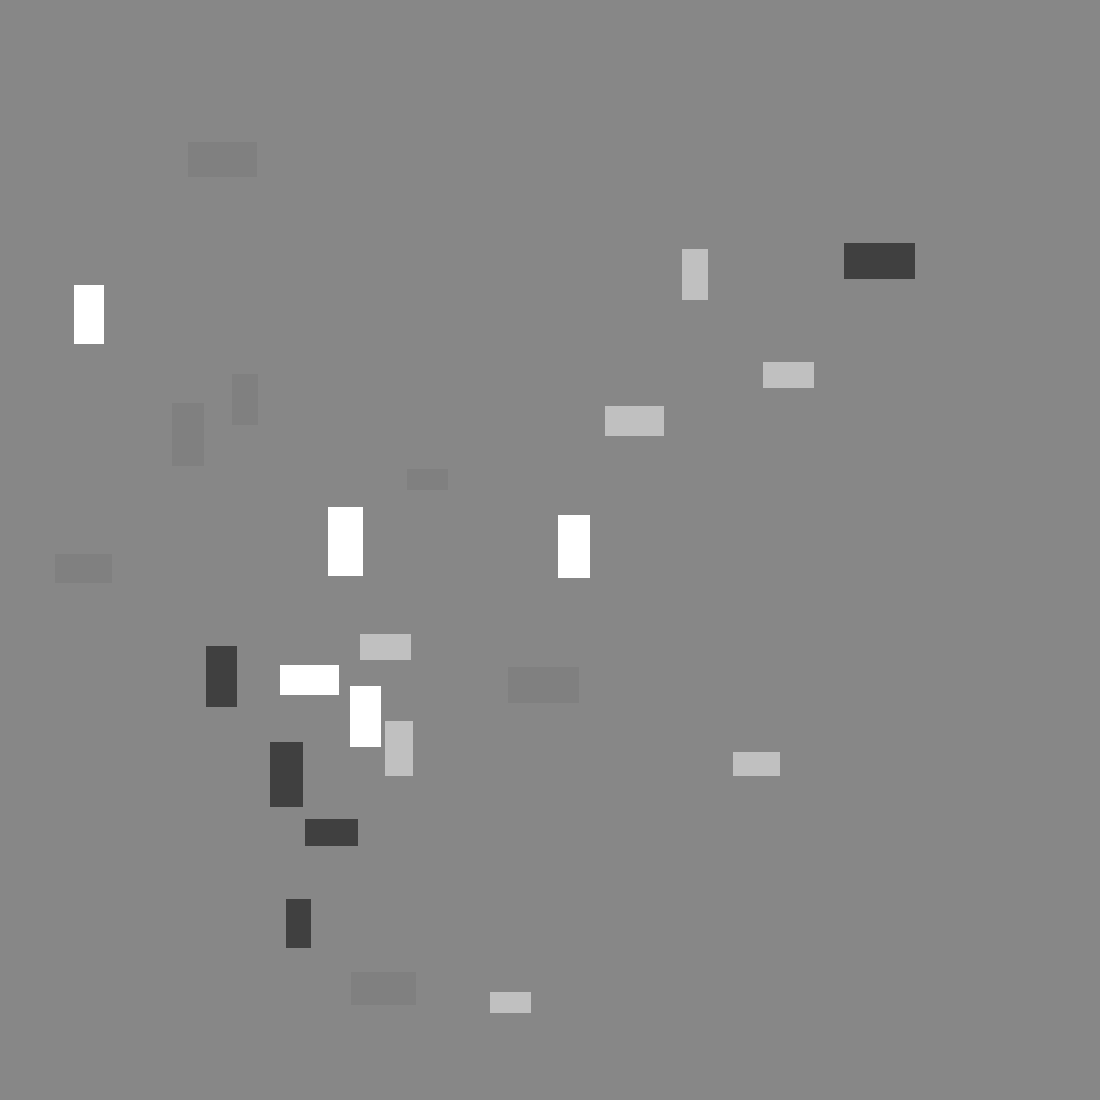

27 54


sum 223626 212424
29 58


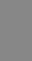

sum 263520 234240
64 135


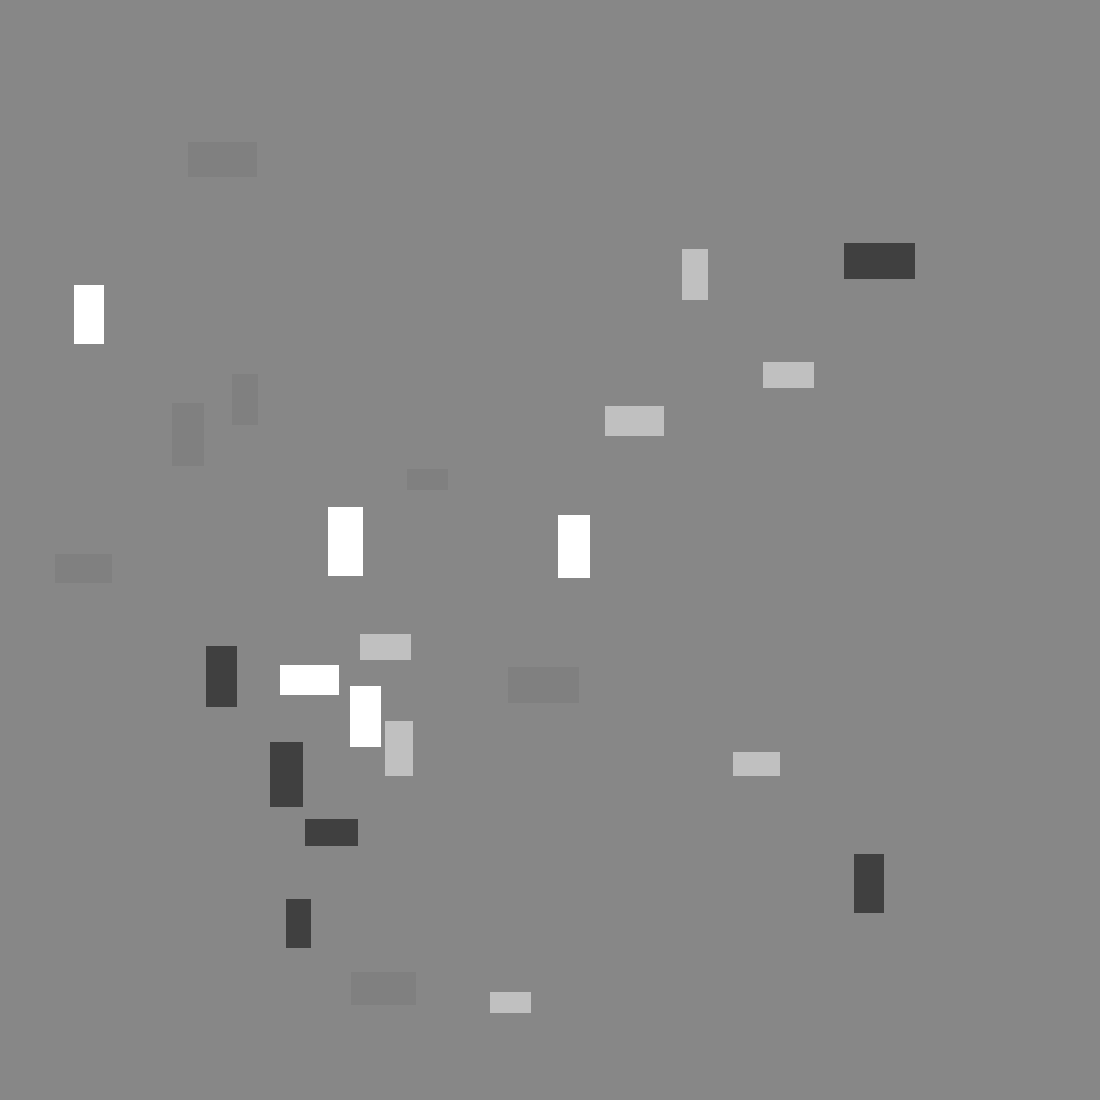

31 62


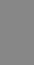

sum 298350 265200
255 135


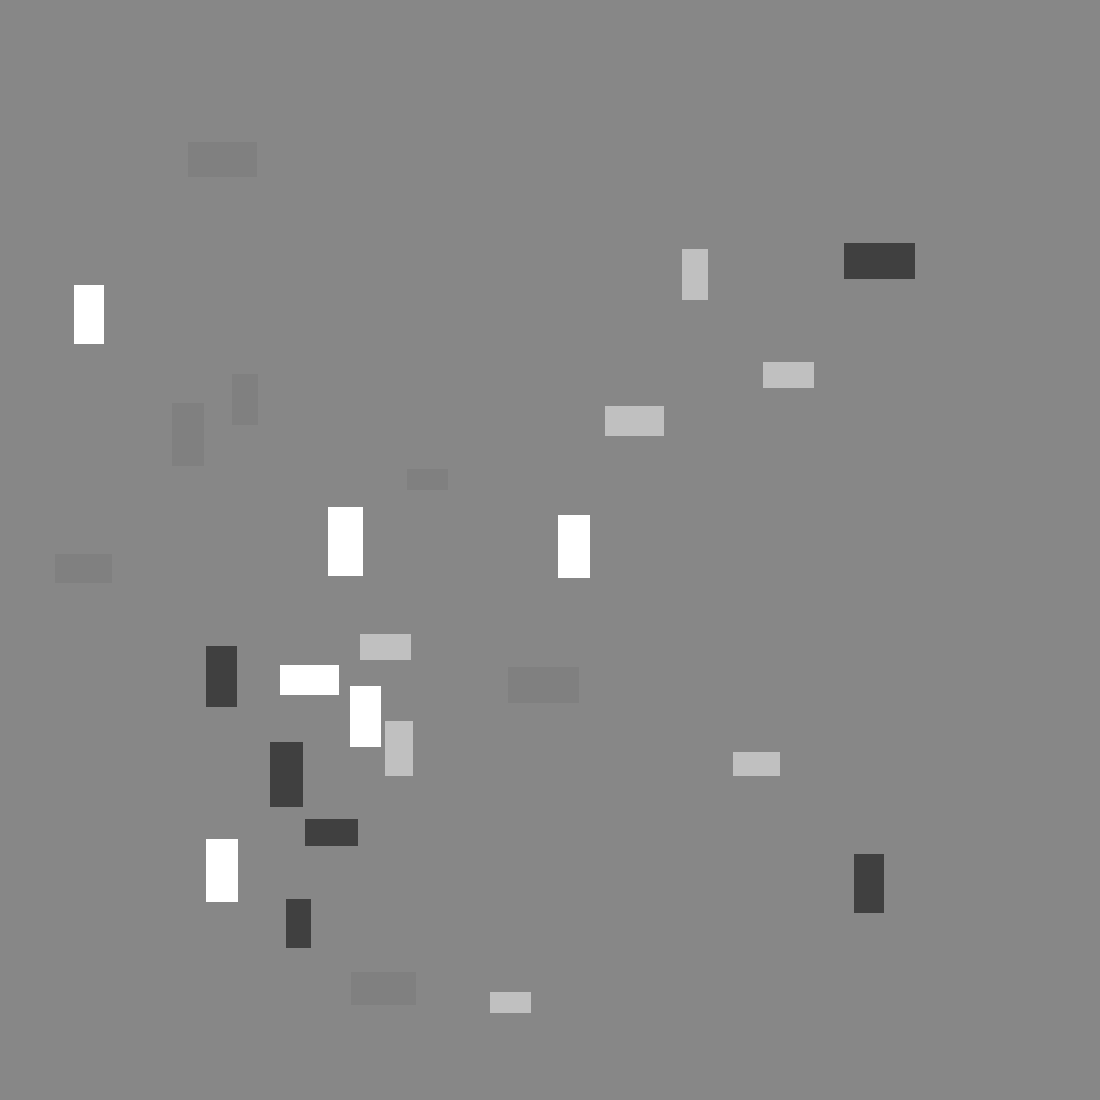

32 64


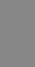

sum 316575 281400
128 135


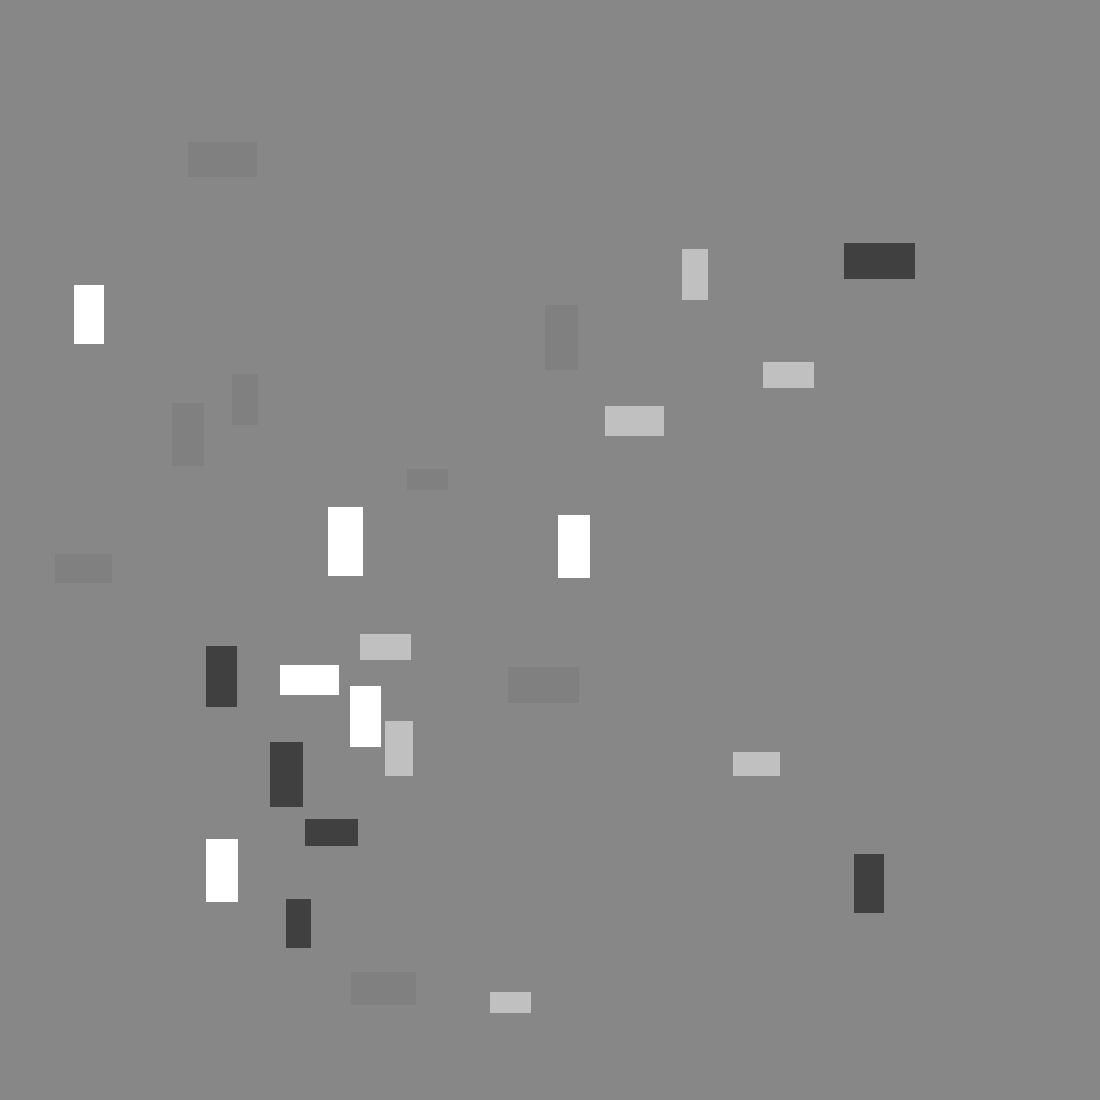

31 62


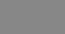

sum 298350 265200
0 135


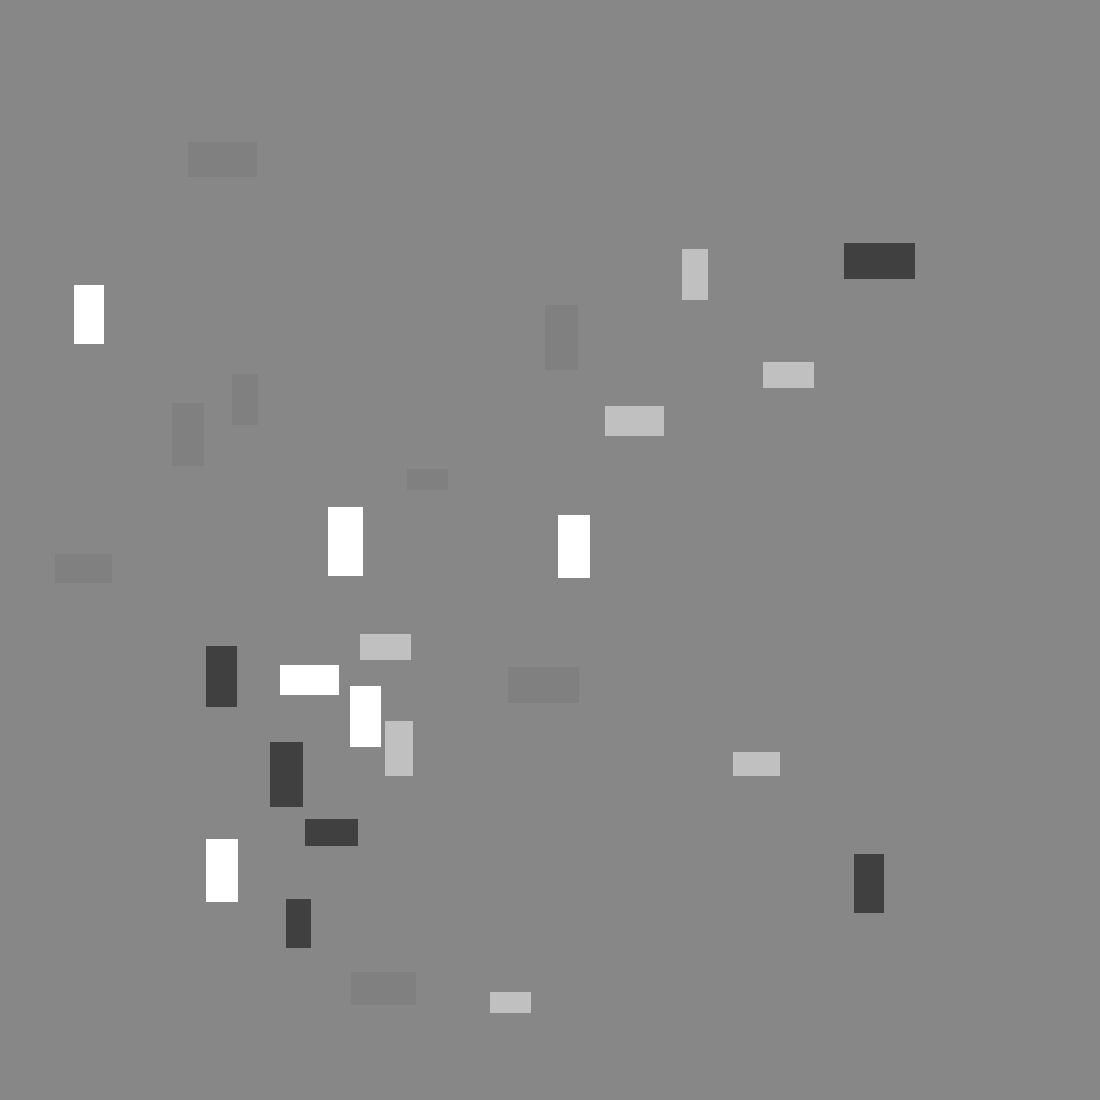

31 62


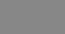

sum 298350 265200
0 135


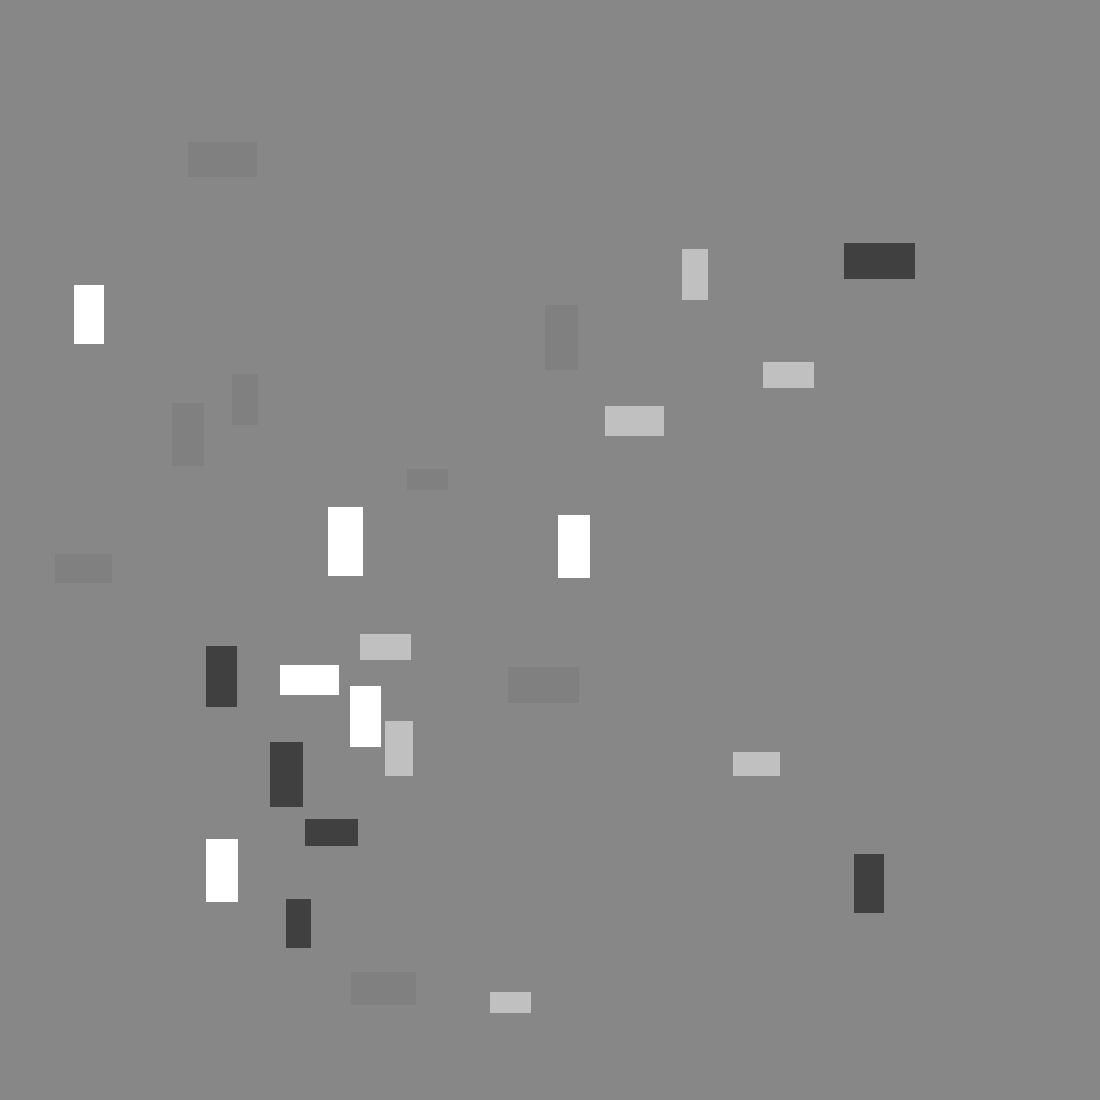

32 64


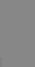

sum 316435 281540
21 42


sum 214128 61272
22 44


sum 158625 141000
255 135


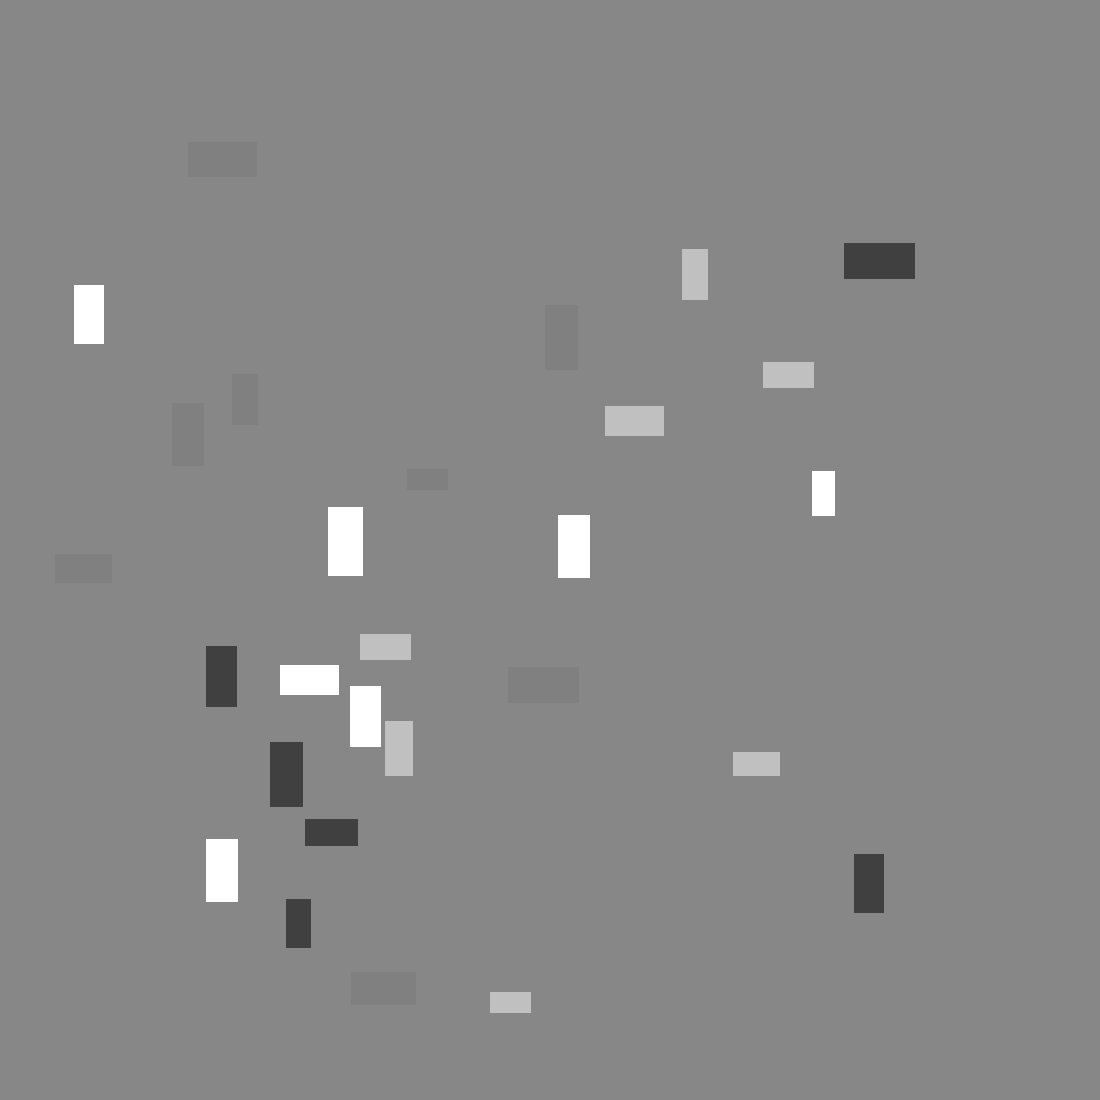

21 42


sum 145800 129600
64 135


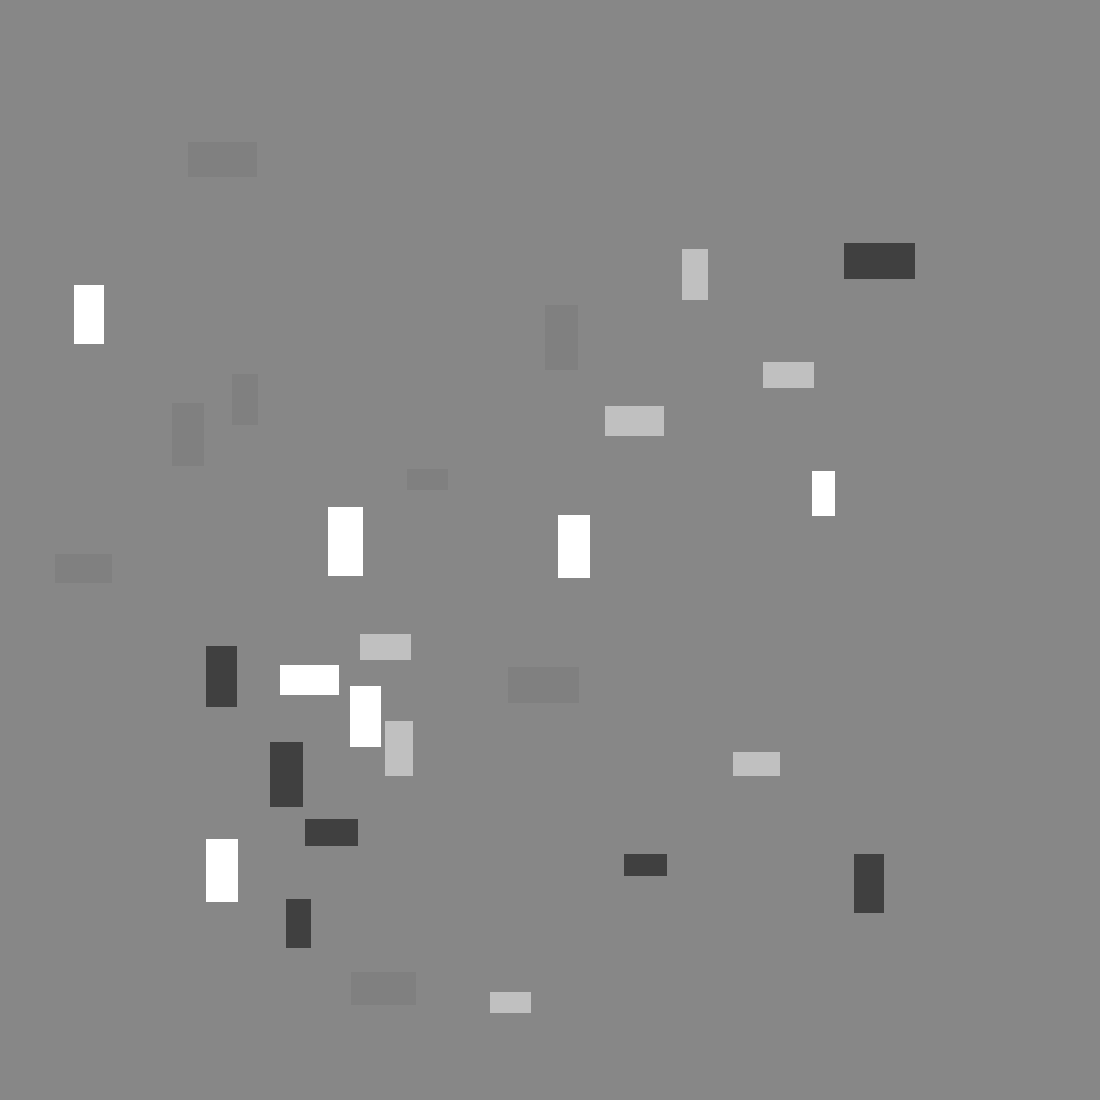

34 68


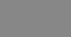

sum 354645 315240
255 135


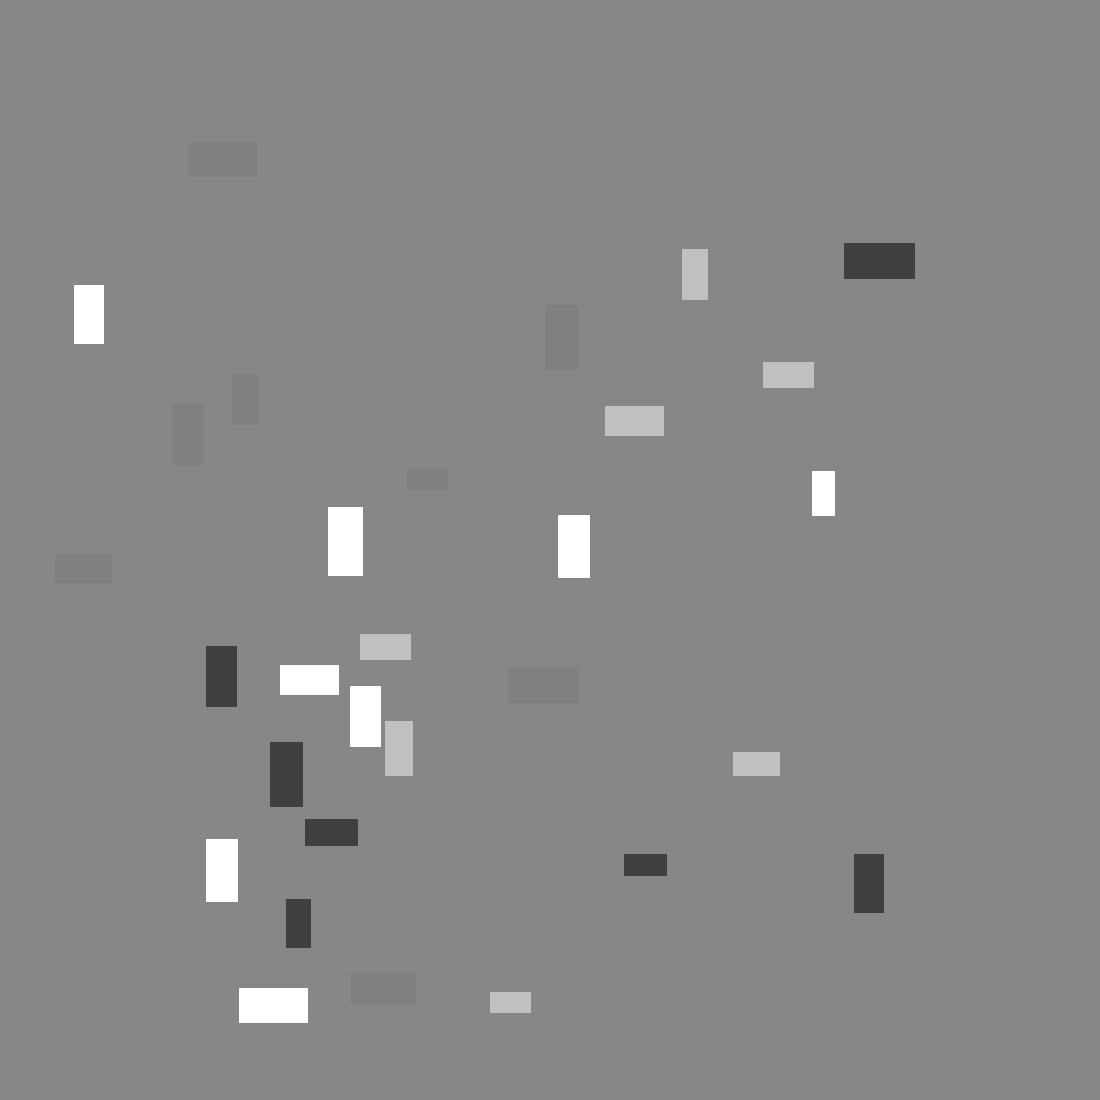

28 56


sum 246915 219480
64 135


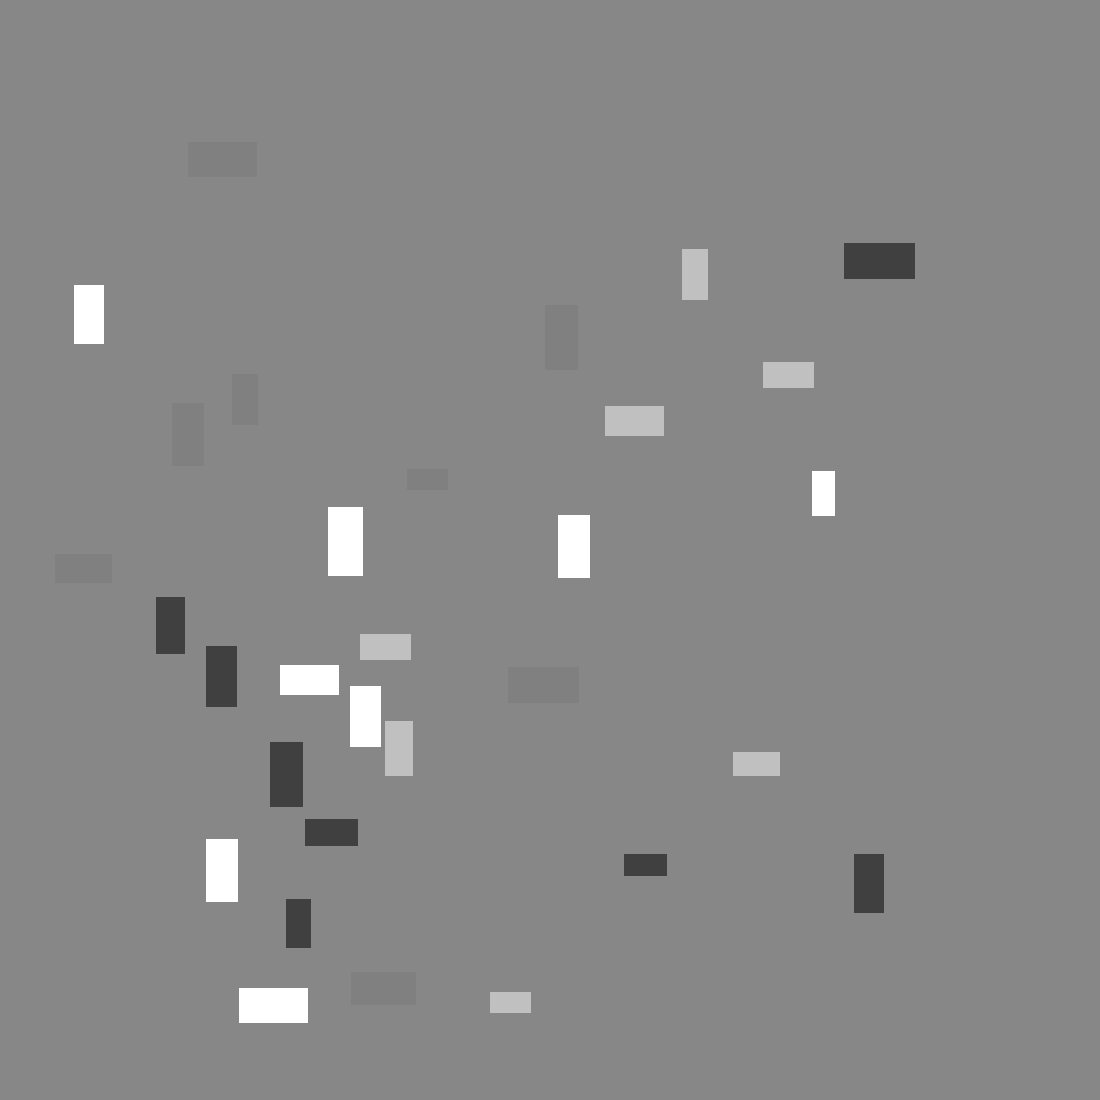

32 64


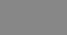

sum 316575 281400
0 135


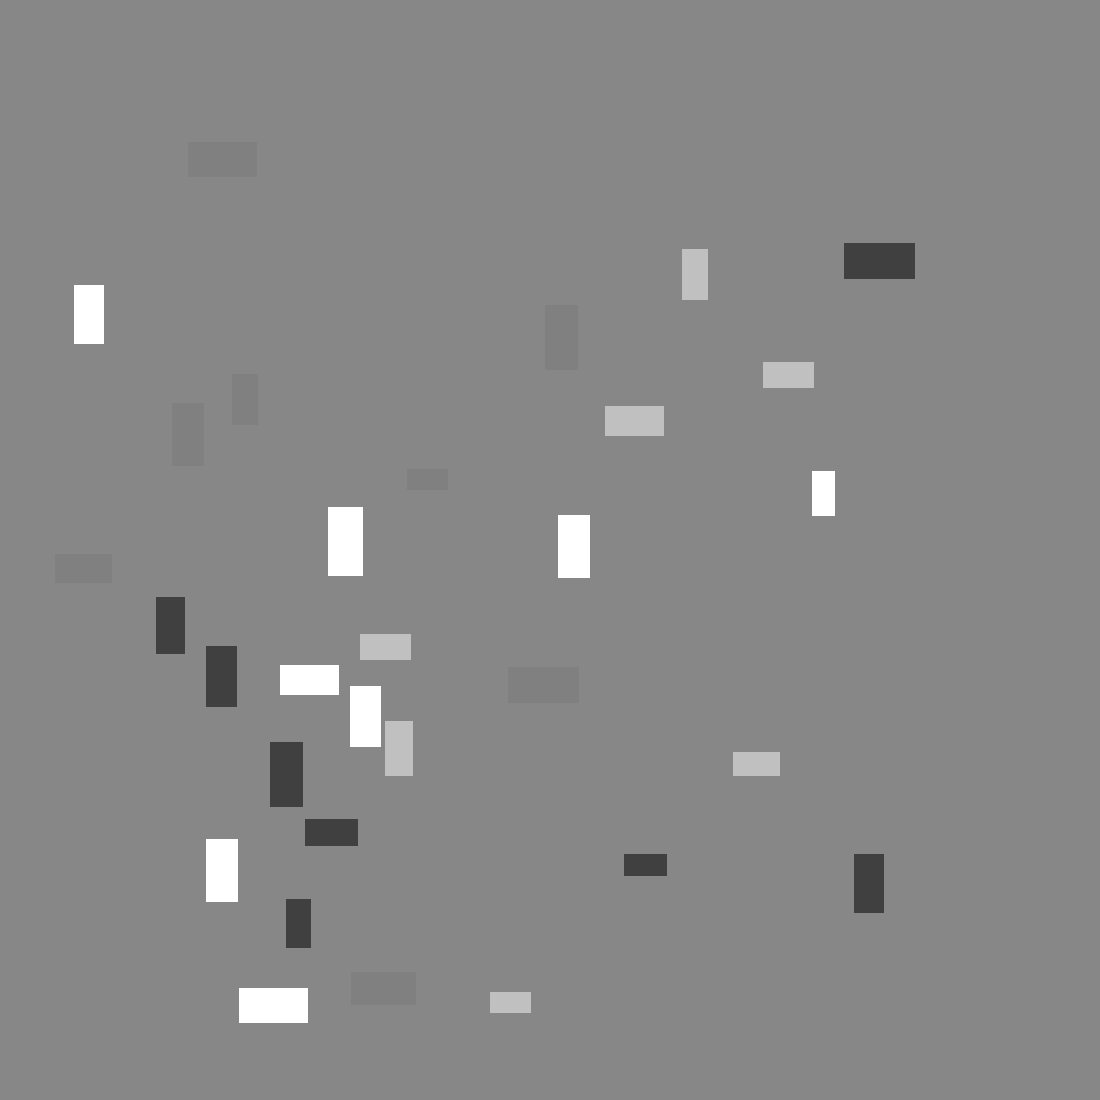

27 54


sum 230850 205200
255 135


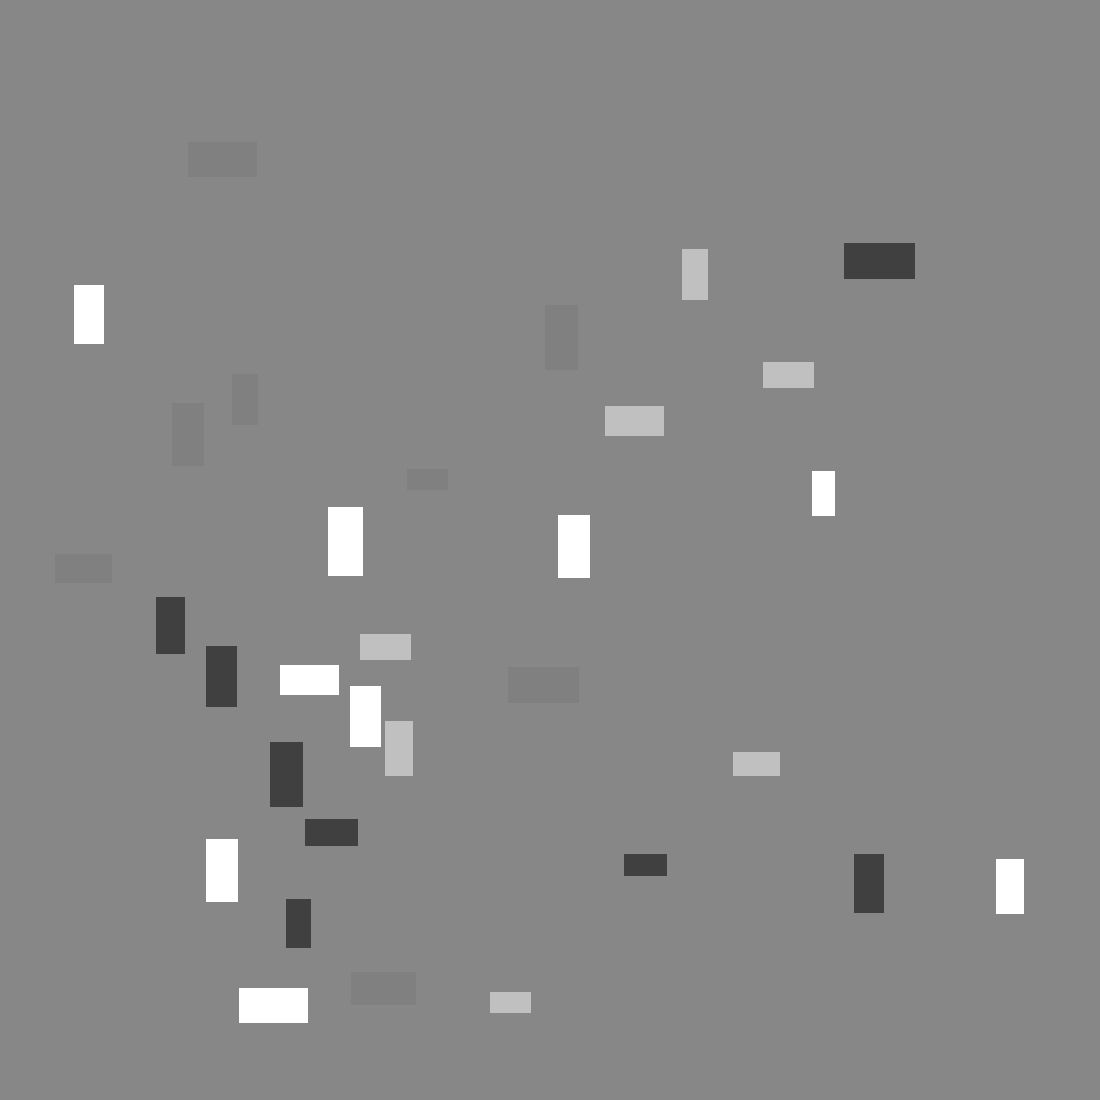

31 62


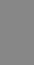

sum 298350 265200
64 135


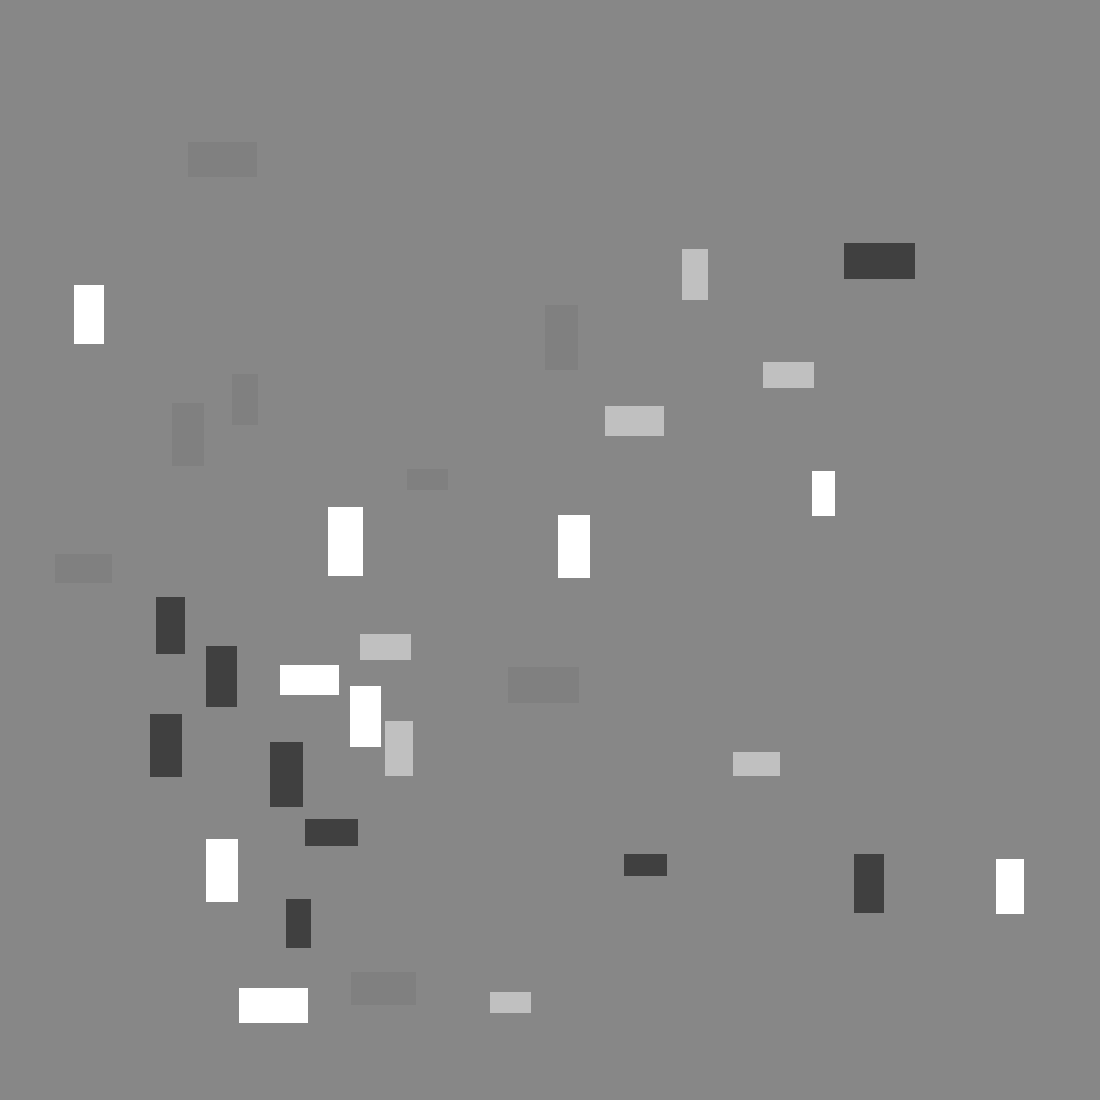

24 48


sum 185895 165240
192 135


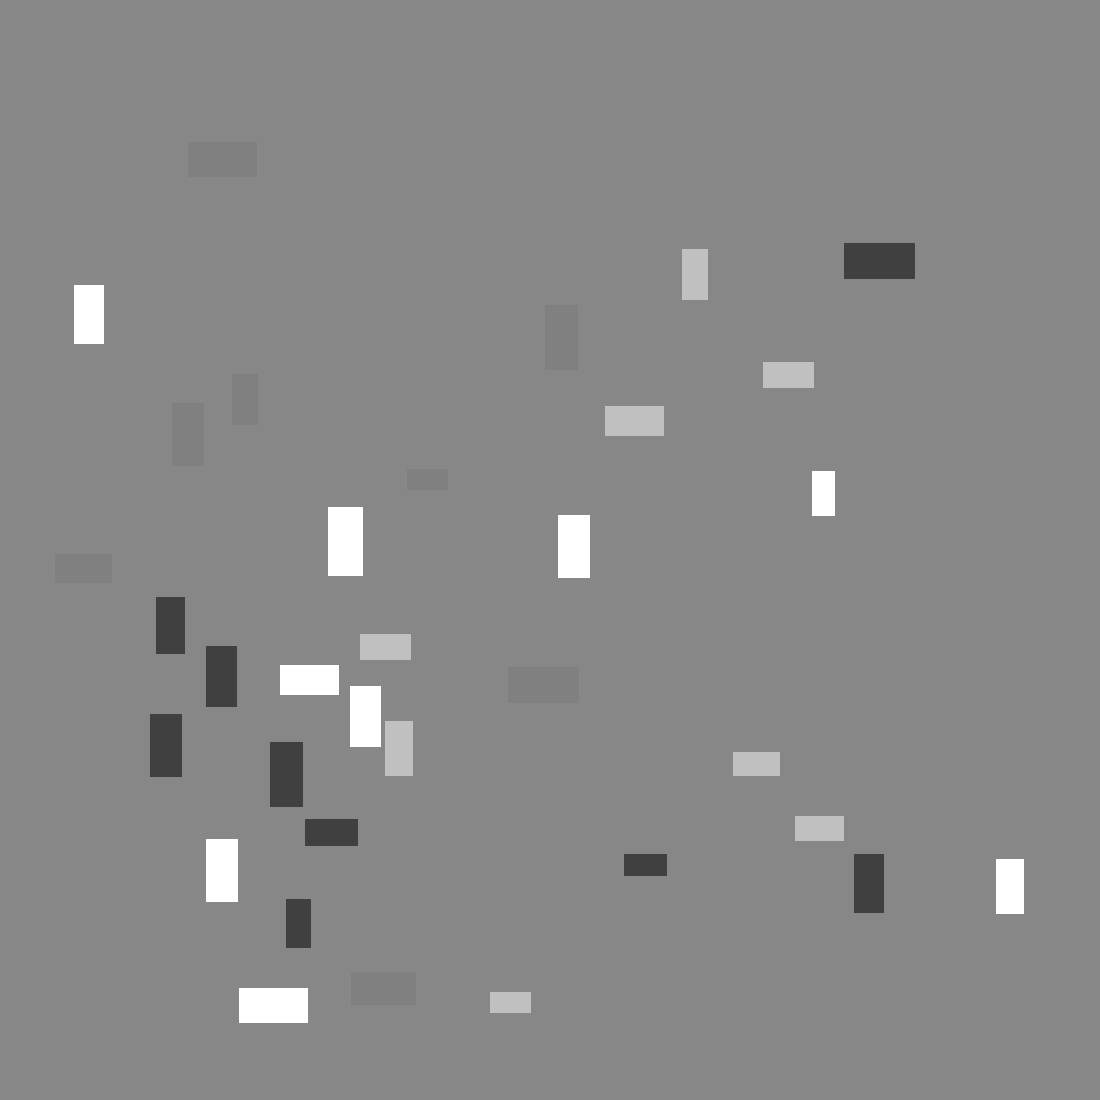

29 58


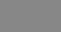

sum 263520 234240
192 135


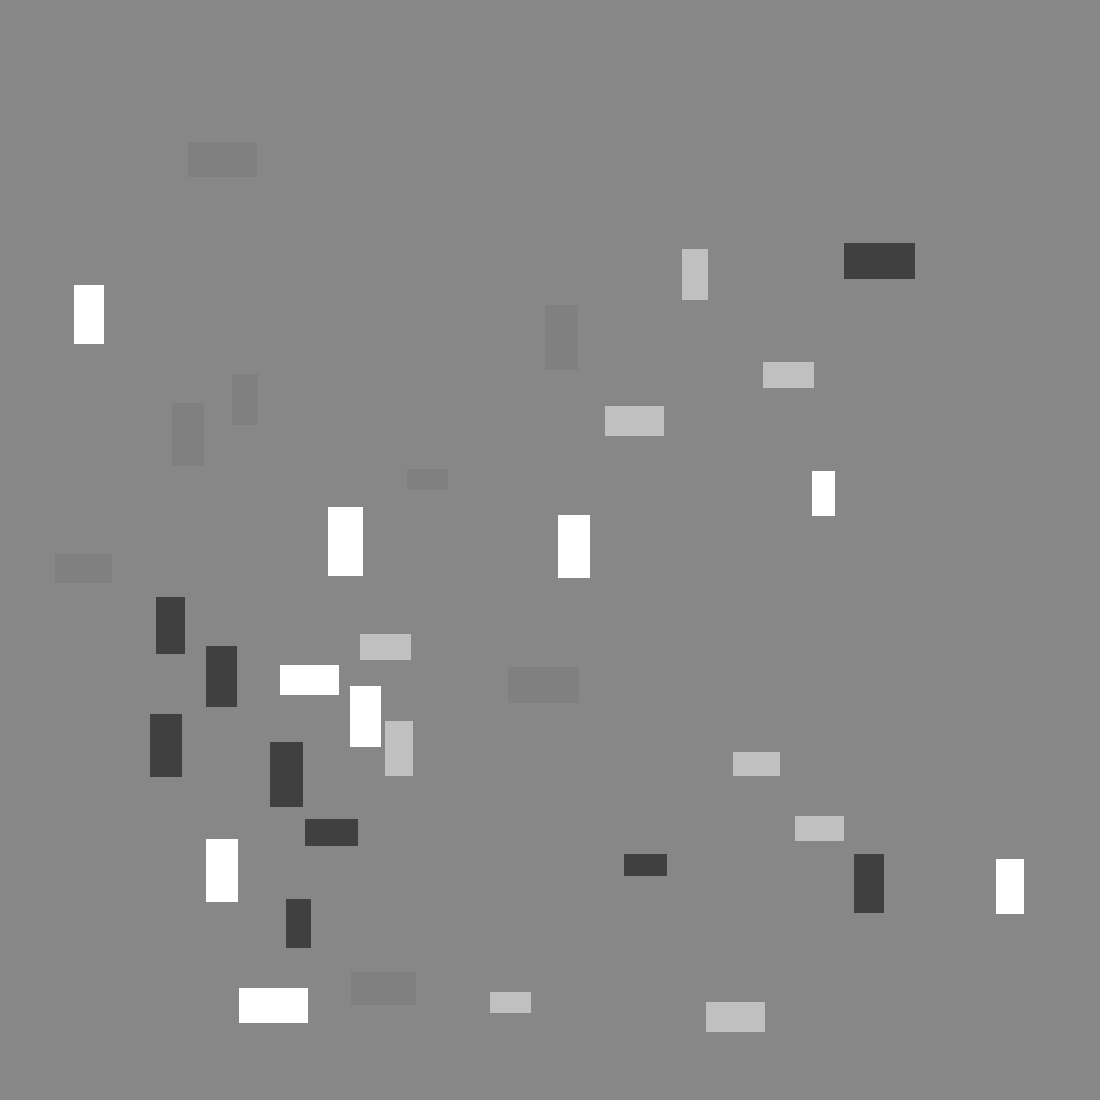

28 56


sum 246915 219480
255 135


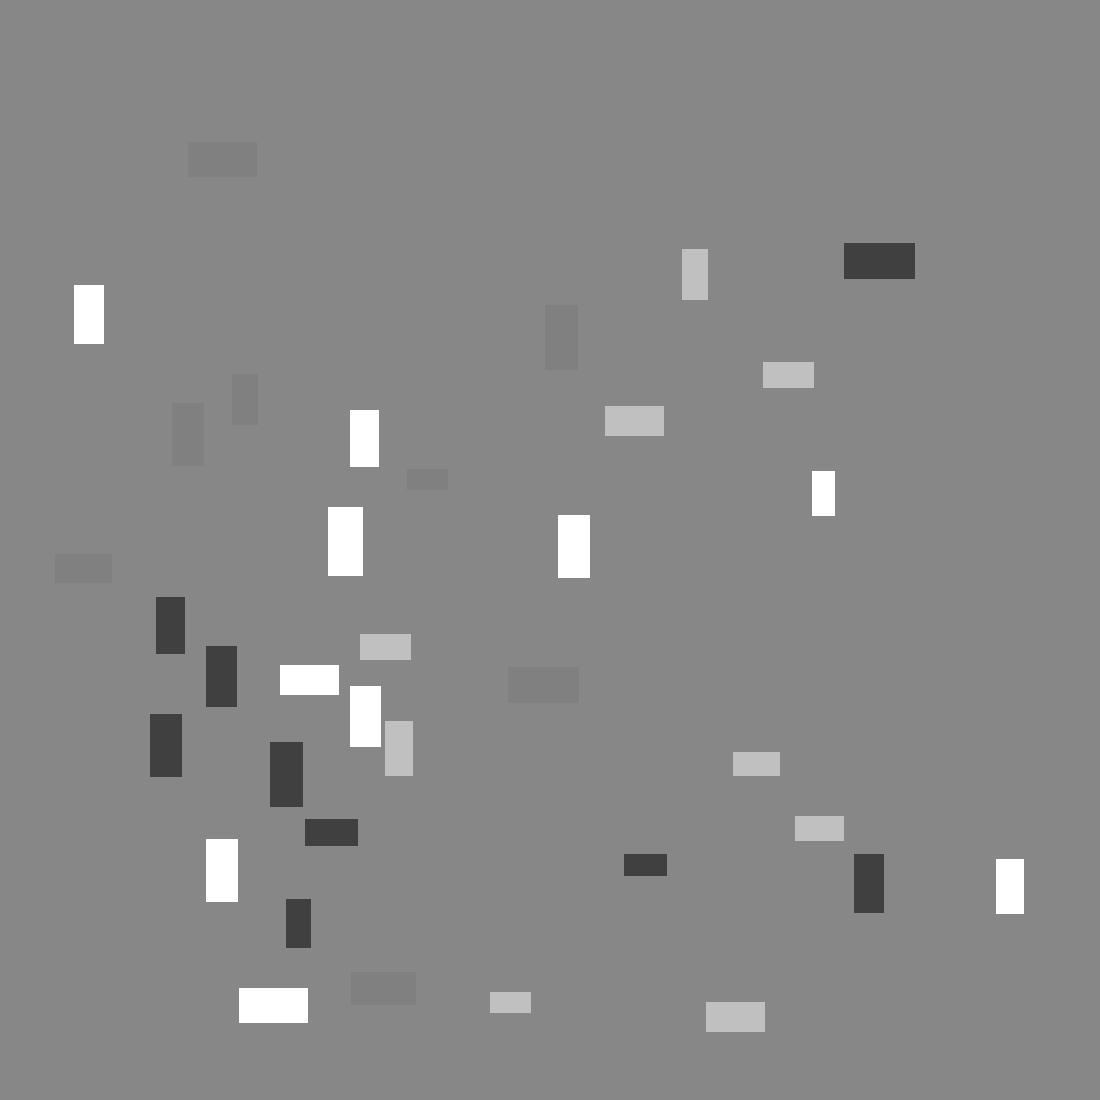

30 60


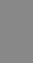

sum 280665 249480
255 135


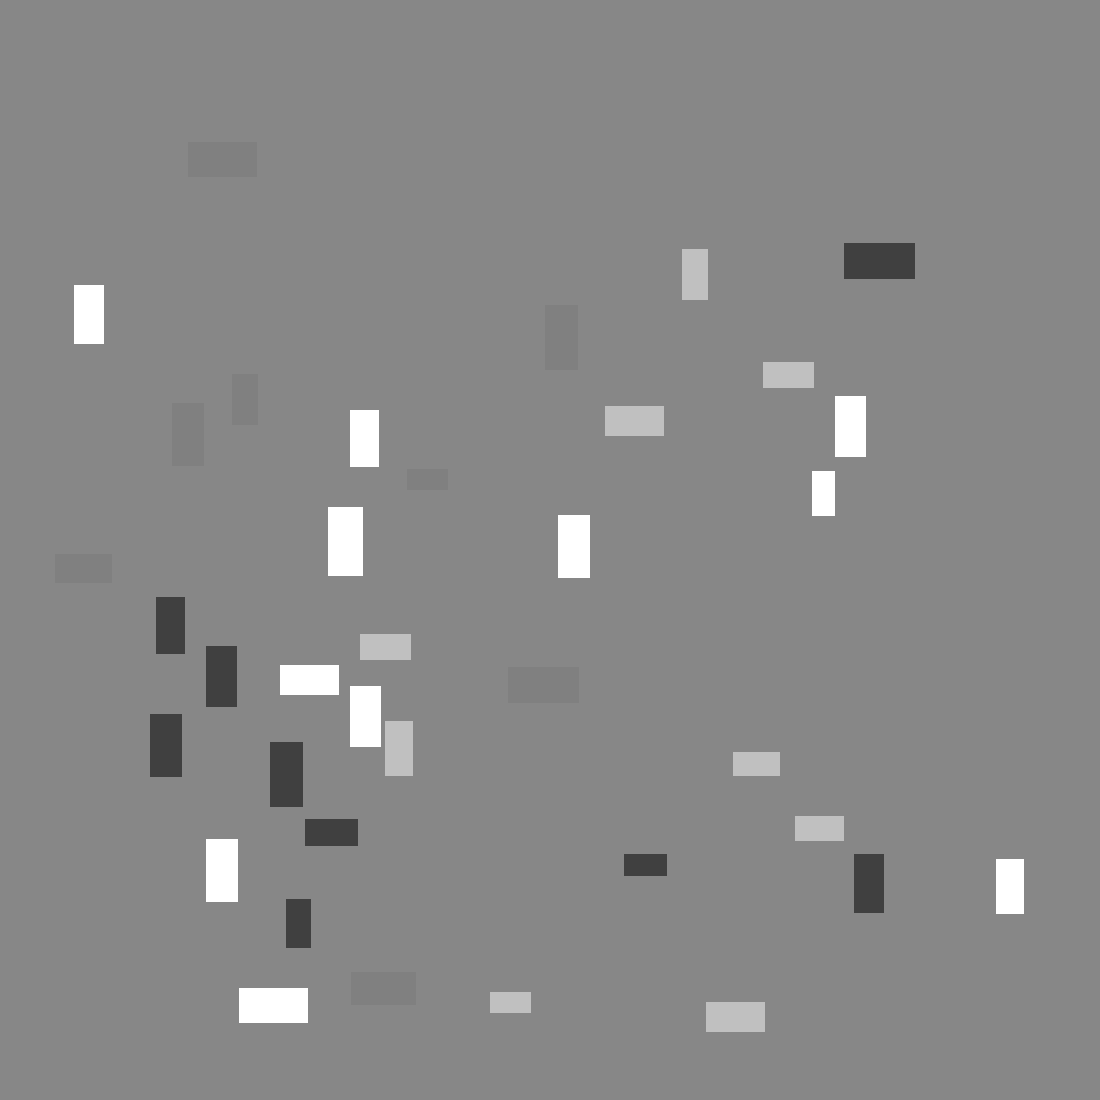

32 64


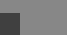

sum 285335 312640
23 46


sum 171990 152880
128 135


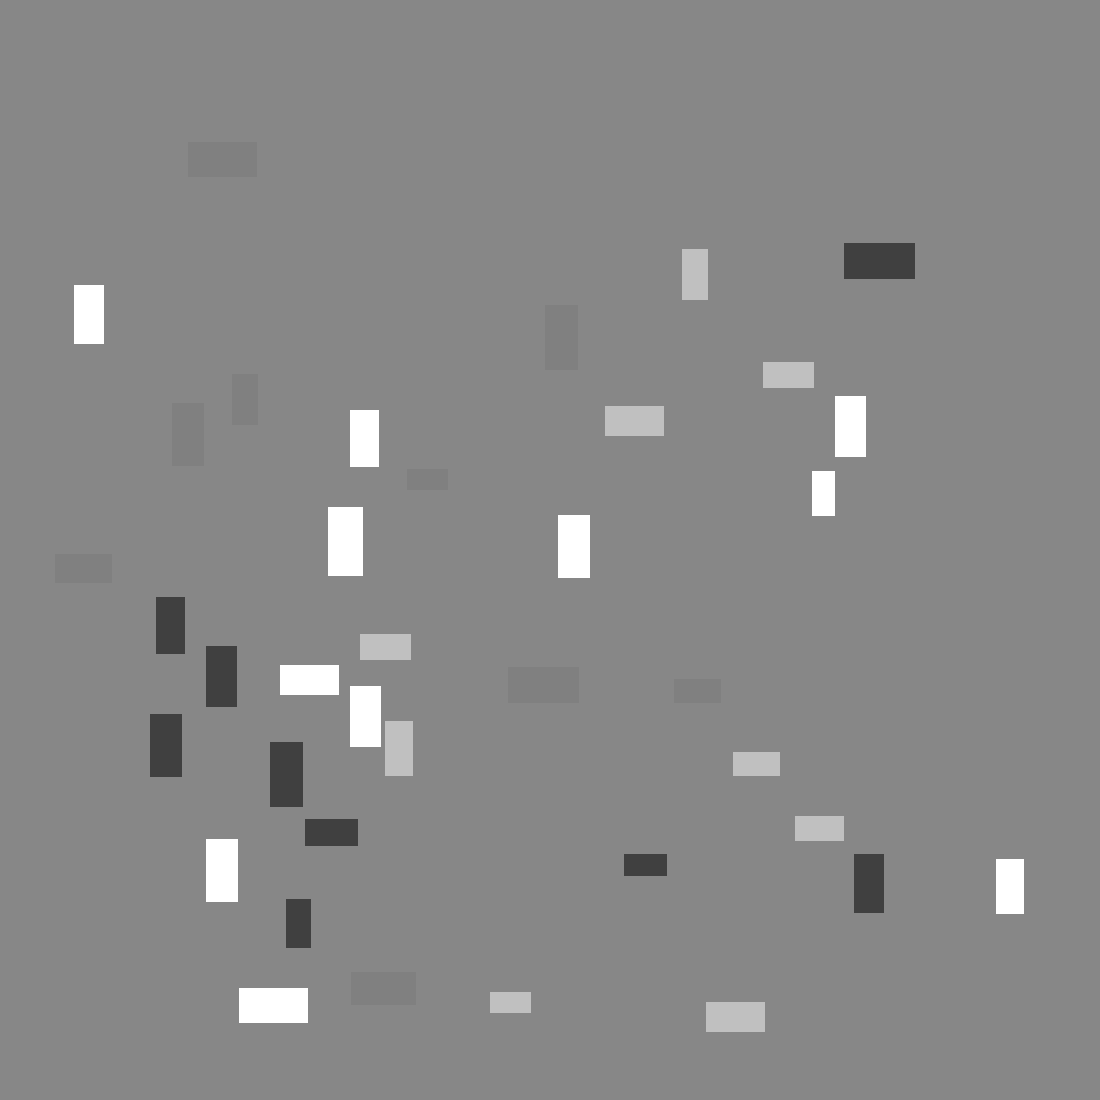

30 60


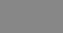

sum 280665 249480
255 135


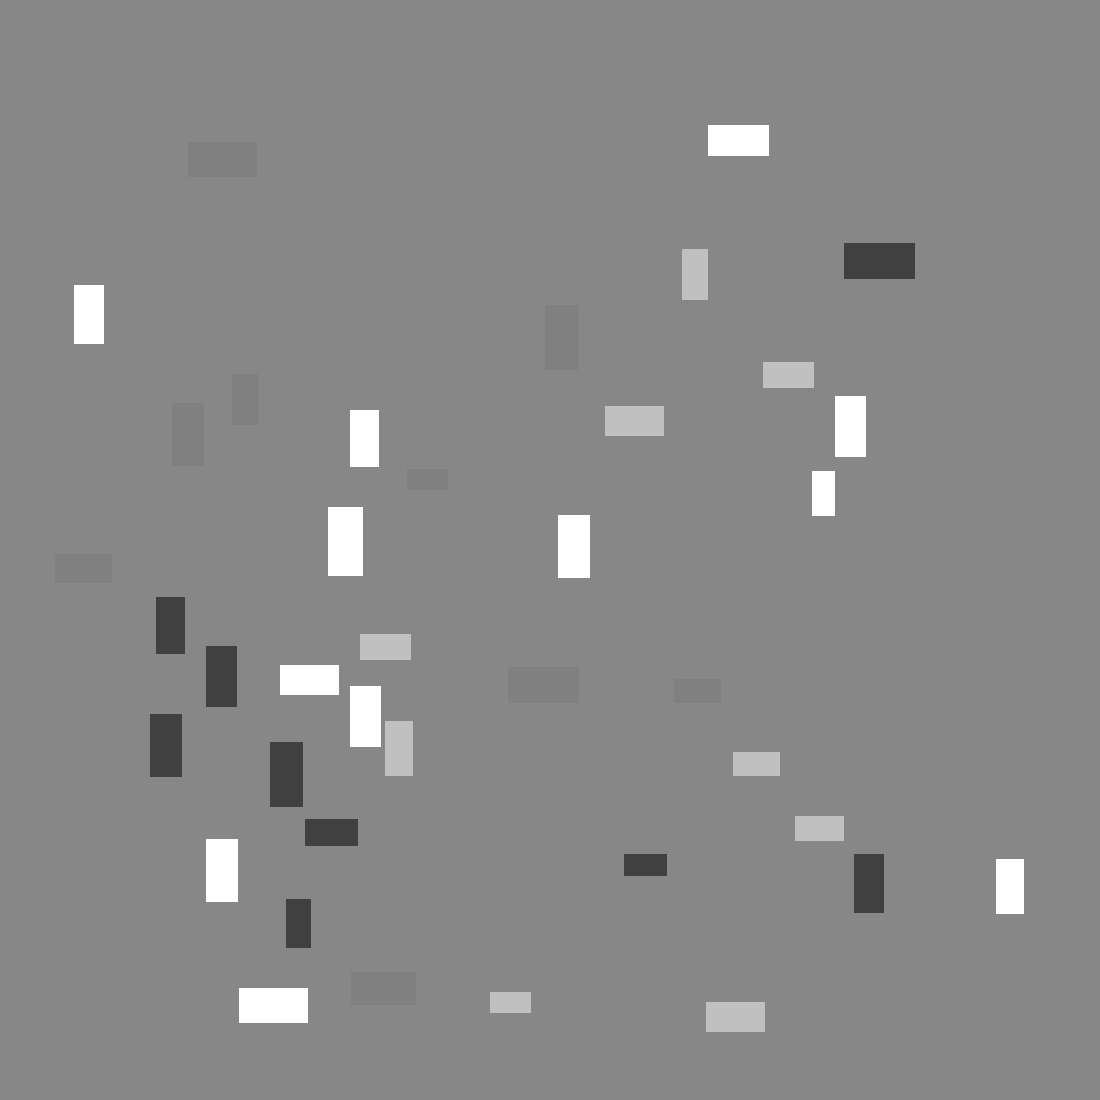

26 52


sum 215325 191400
0 135


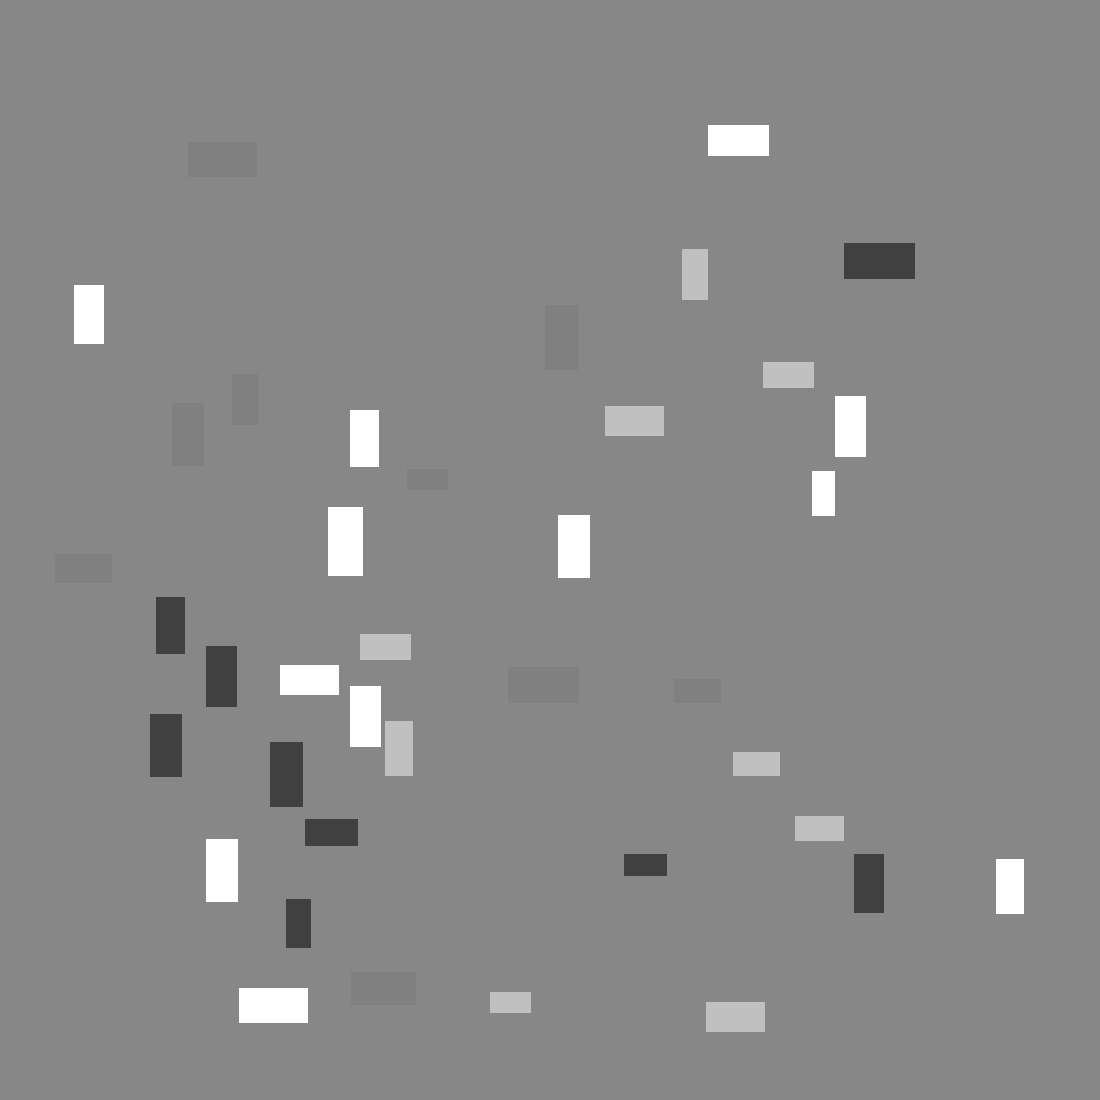

28 56


sum 246915 219480
192 135


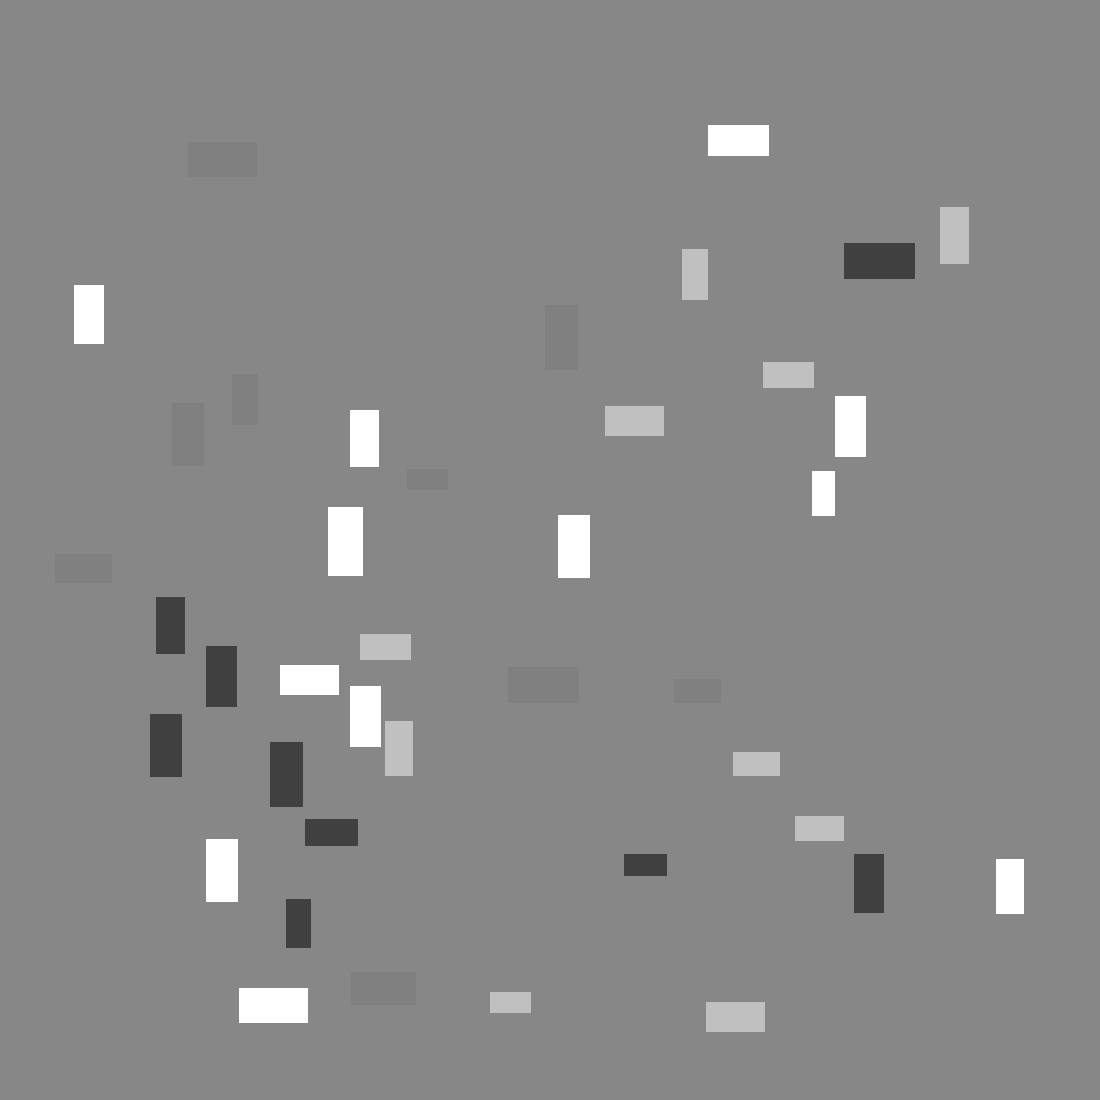

30 60


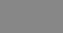

sum 280665 249480
128 135


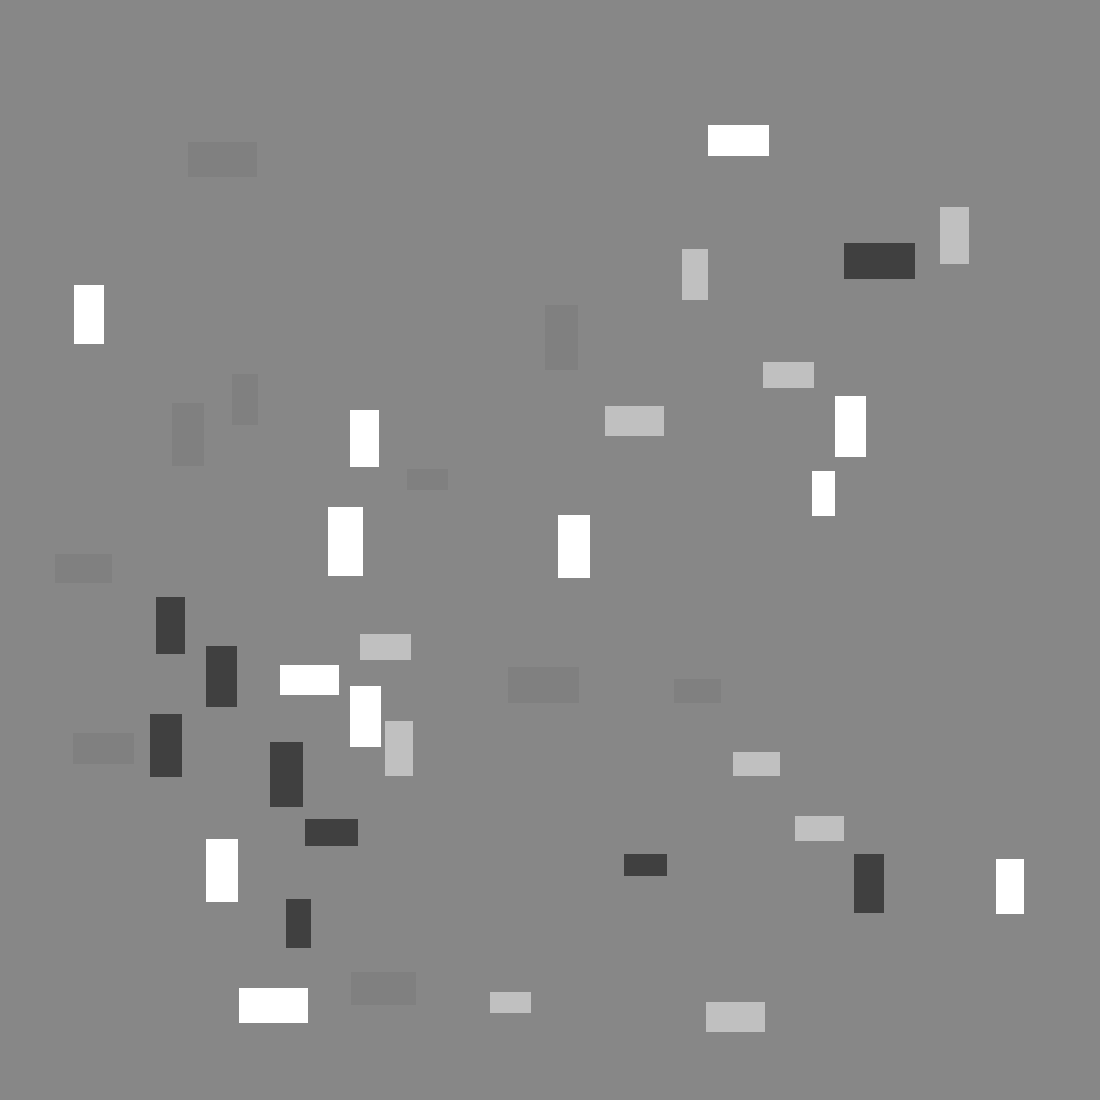

24 48


sum 185895 165240
128 135


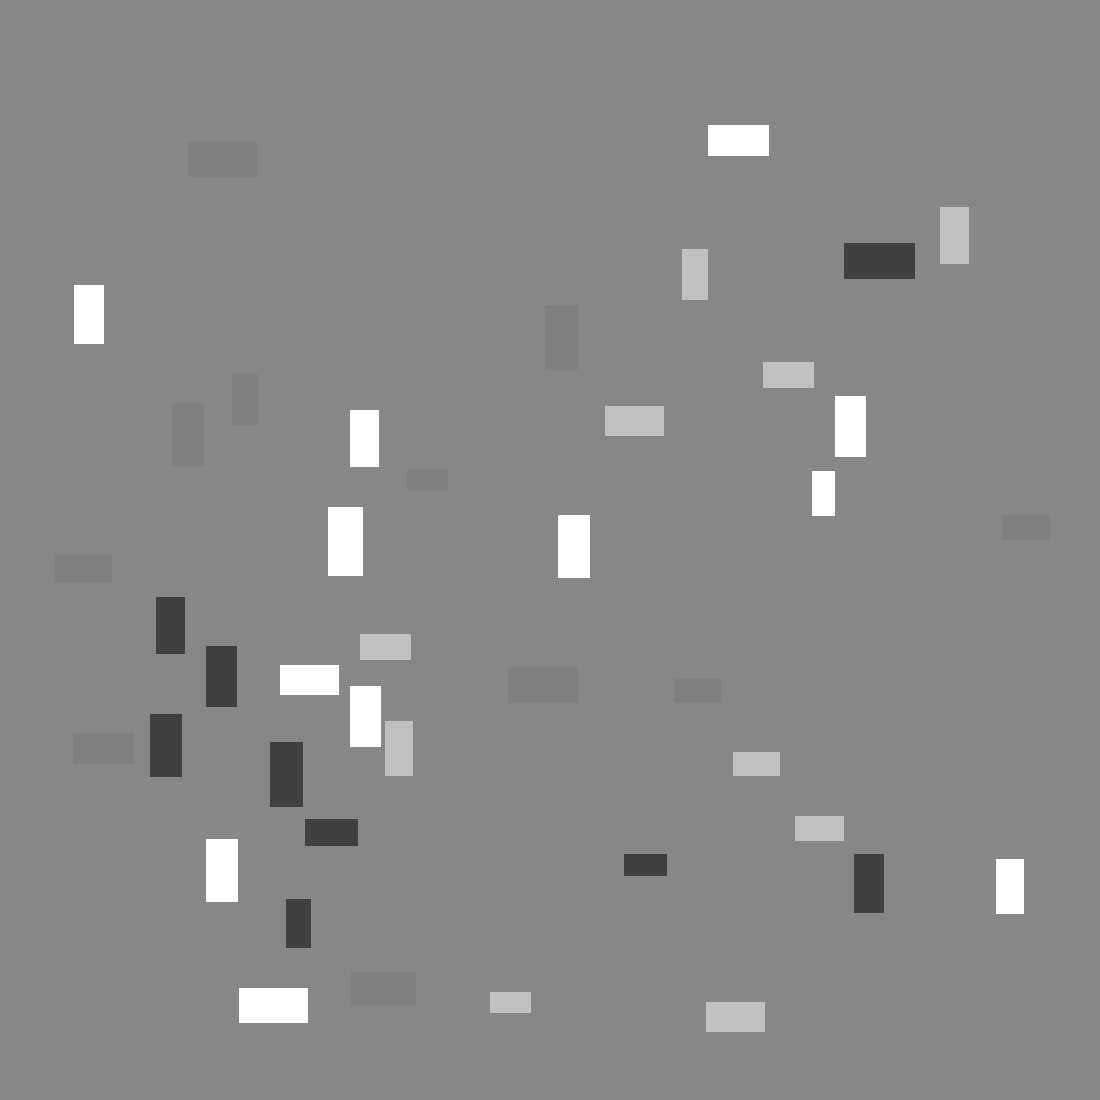

32 64


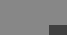

sum 303795 294180
25 50


sum 200340 178080
255 135


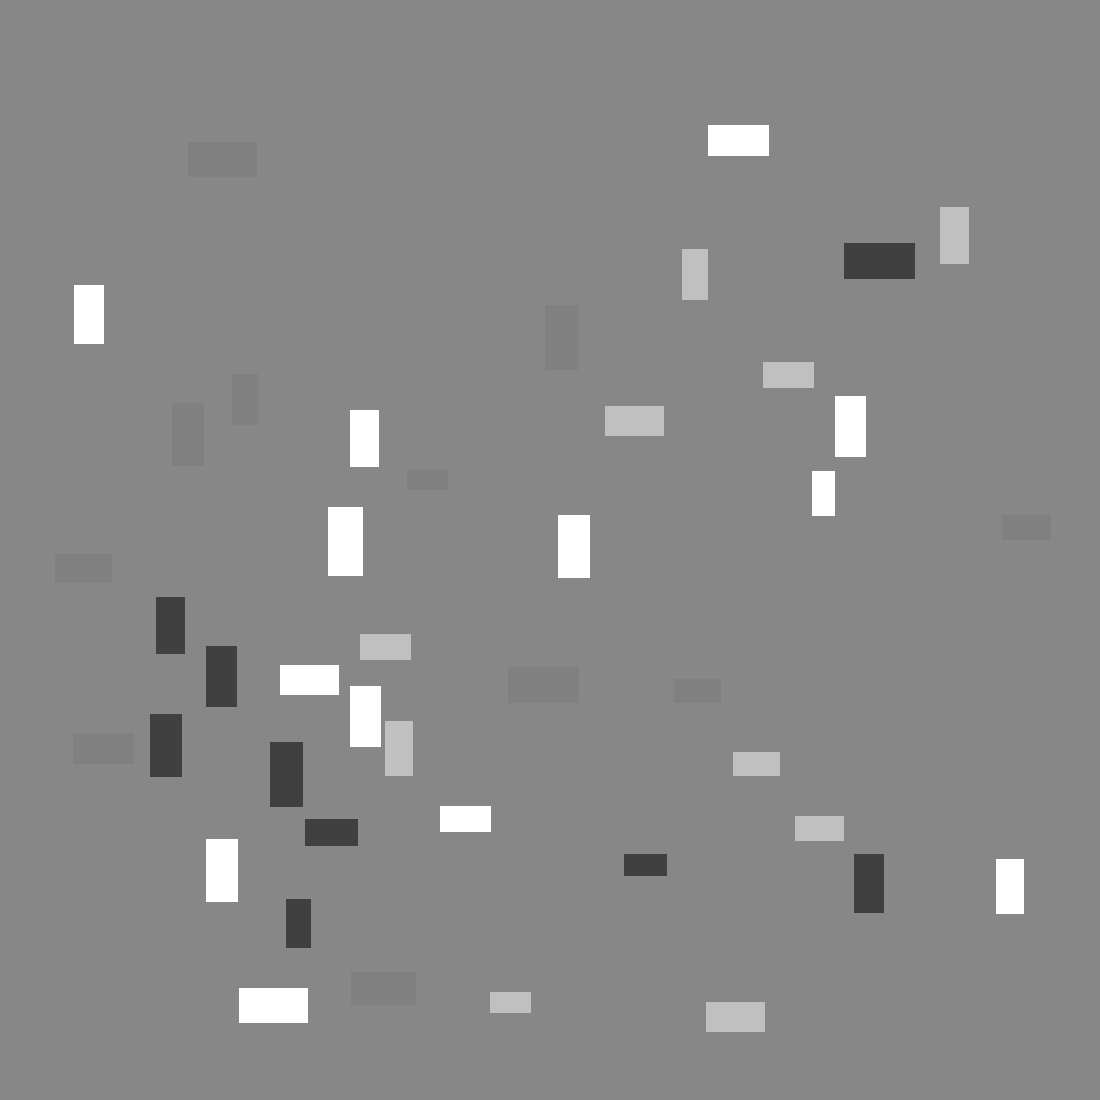

25 50


sum 200340 178080
64 135


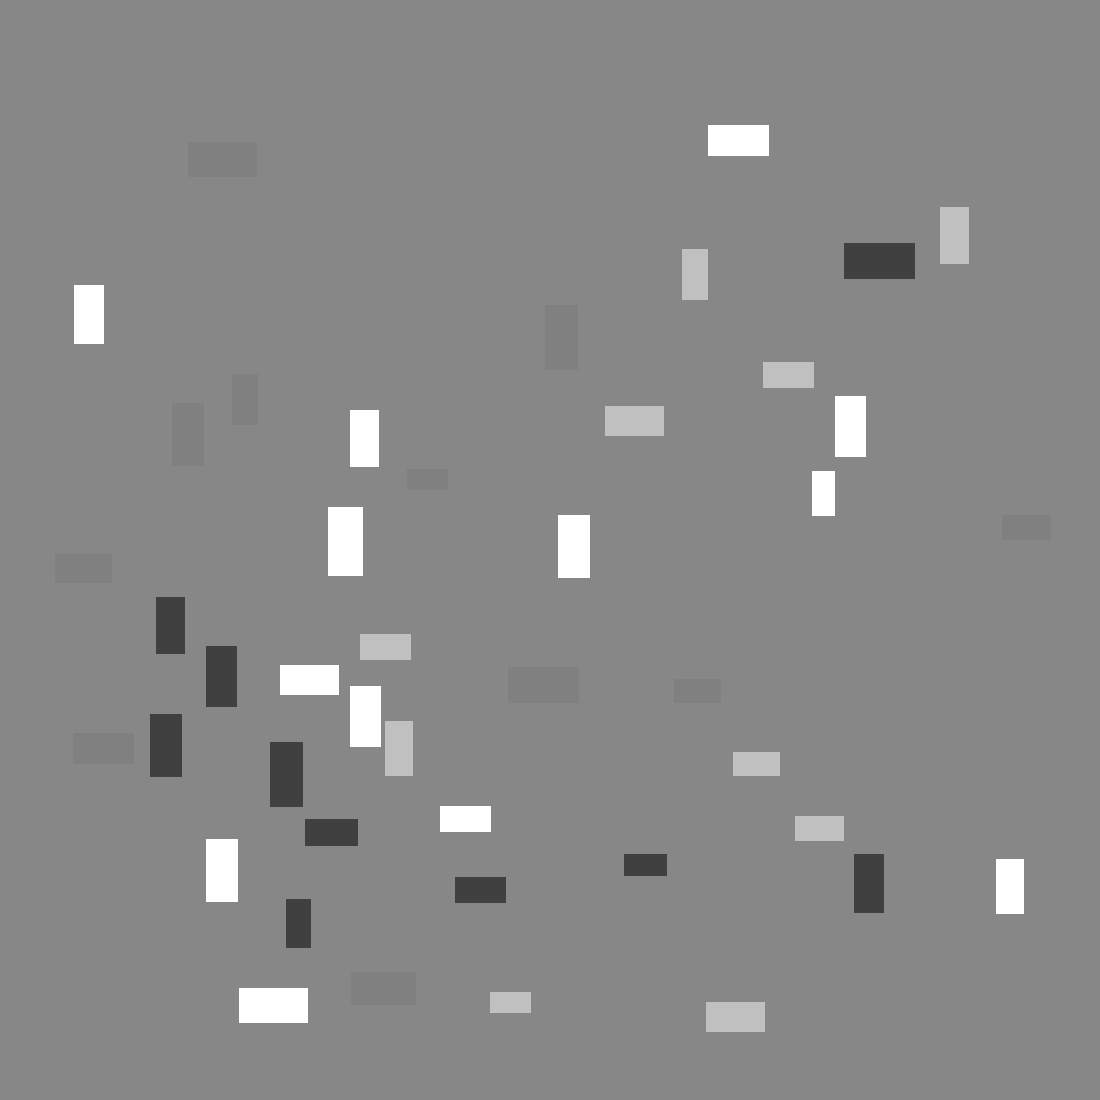

30 60


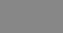

sum 280665 249480
255 135


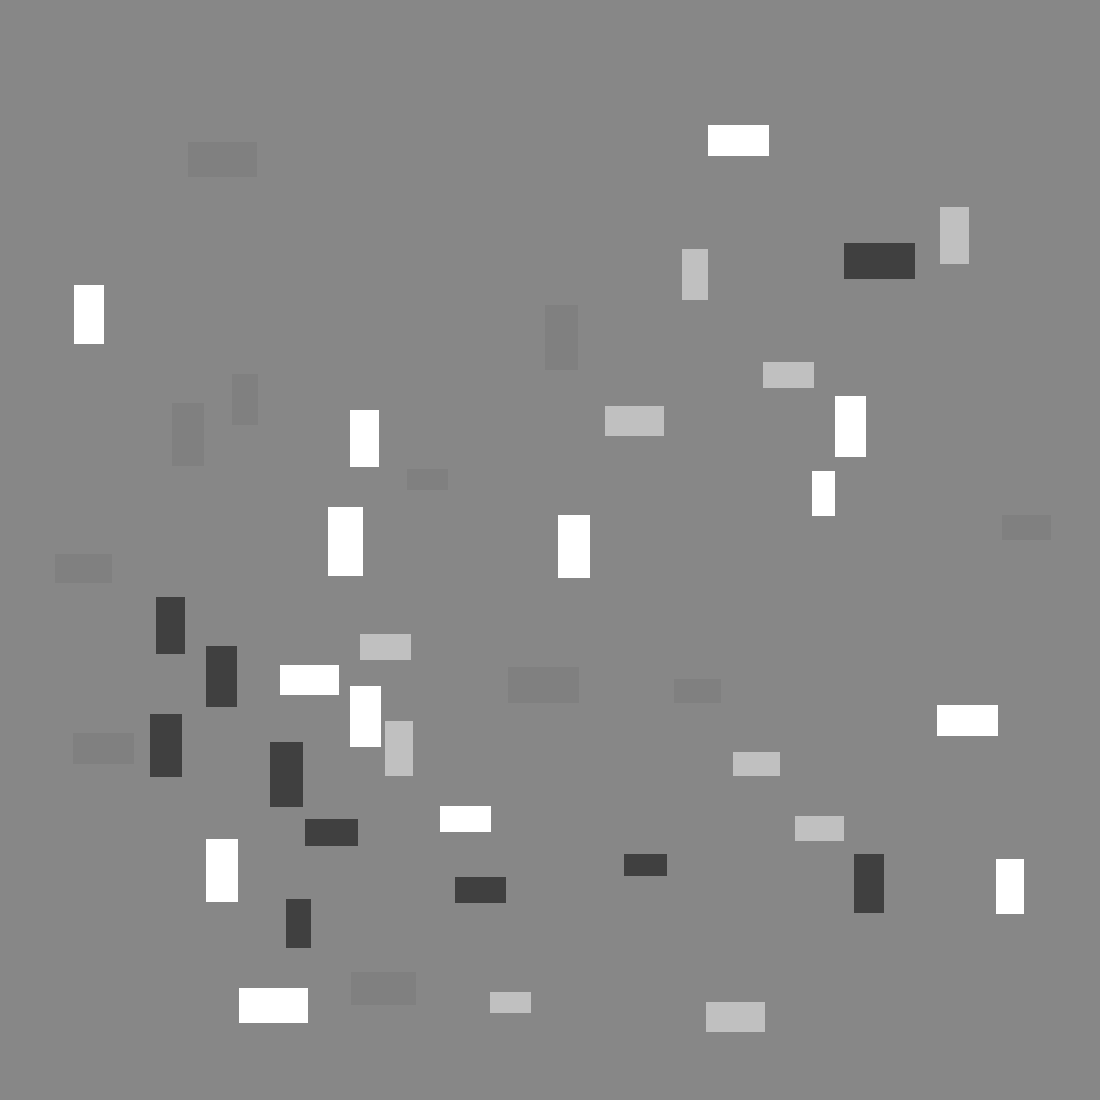

32 64


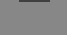

sum 312173 285802
28 56


sum 246327 220068
24 48


sum 185895 165240
128 135


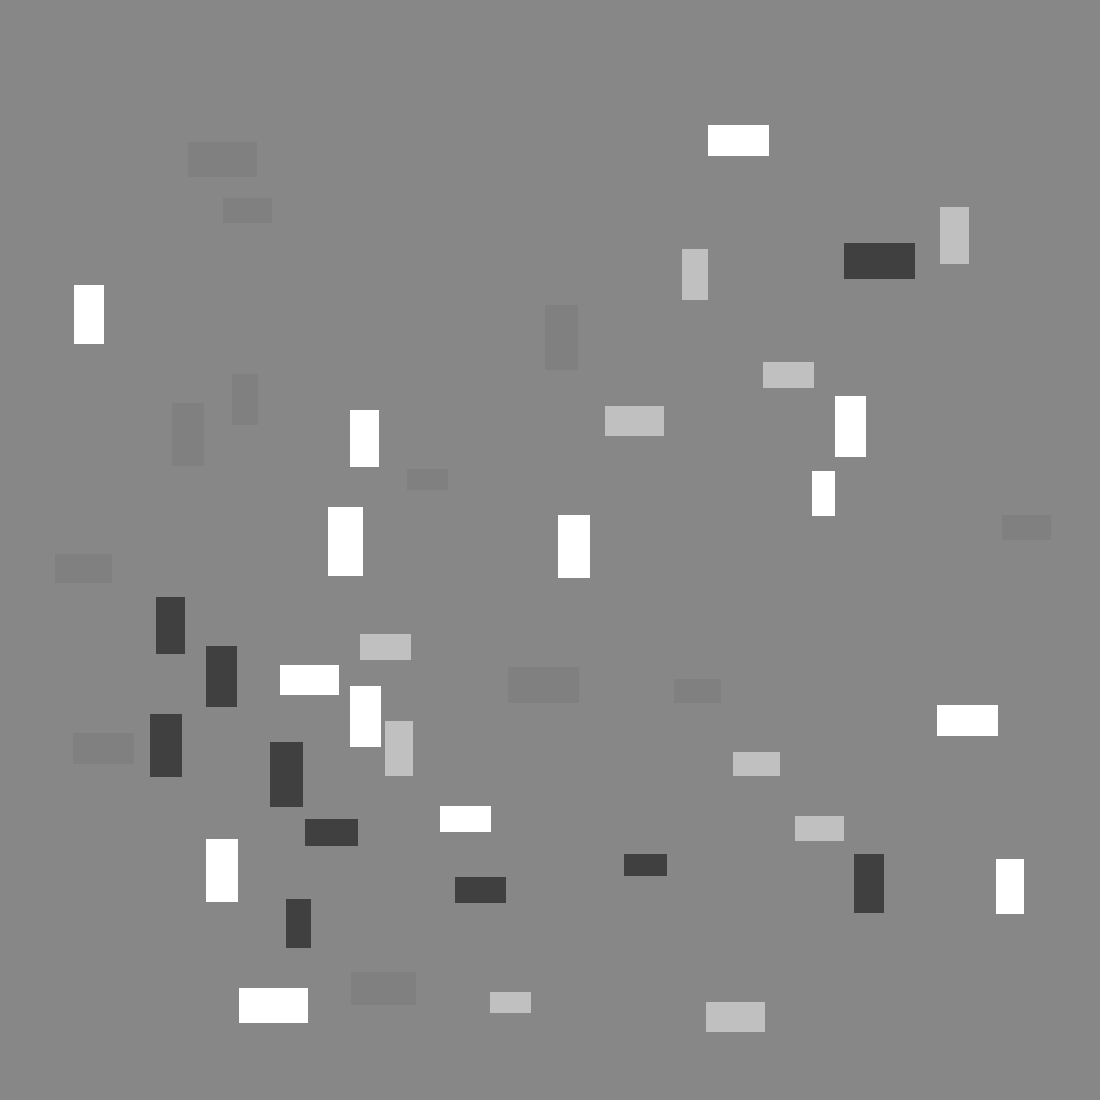

33 66


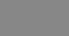

sum 335340 298080
64 135


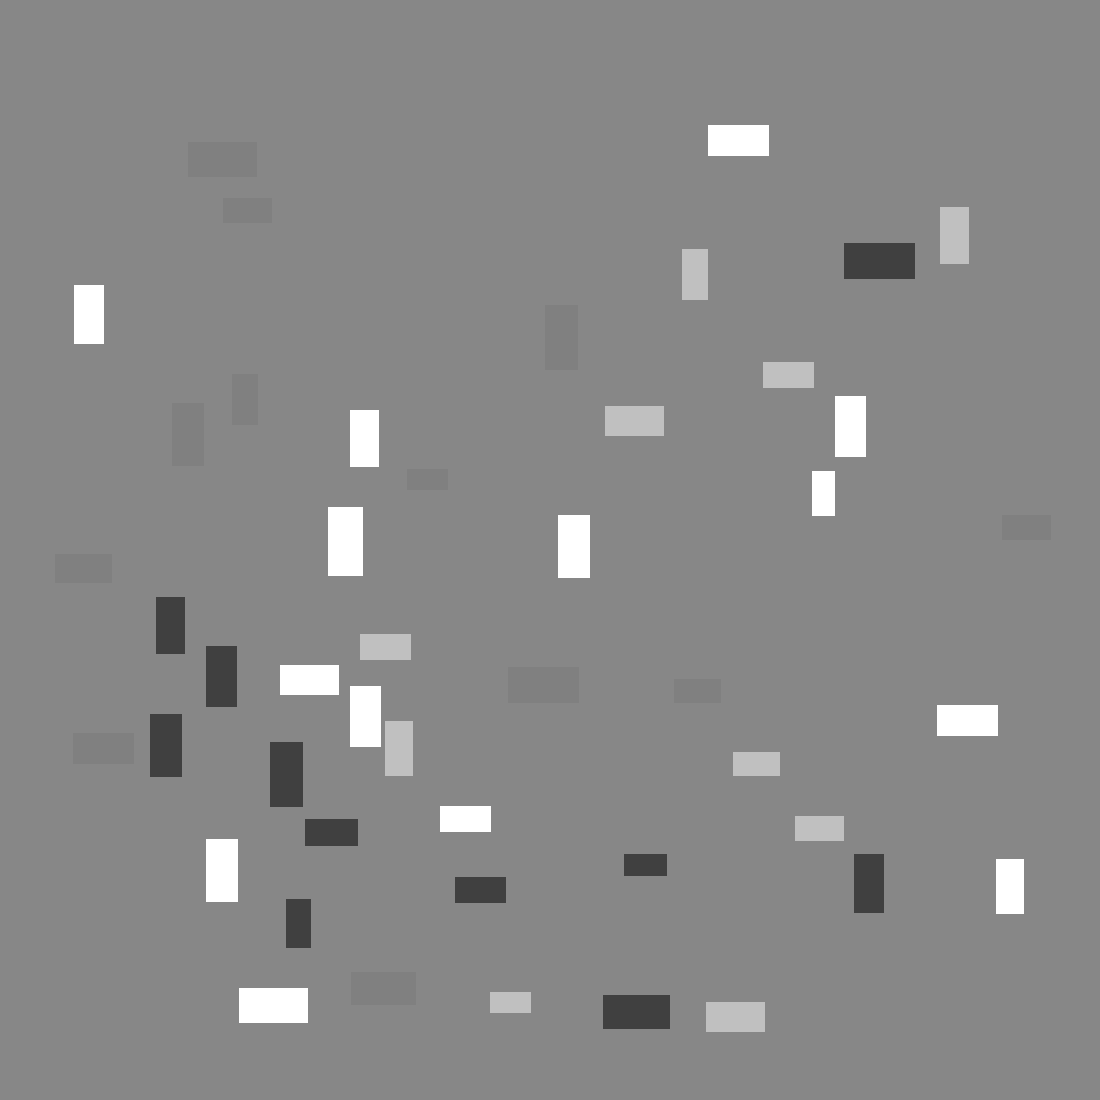

22 44


sum 158625 141000
192 135


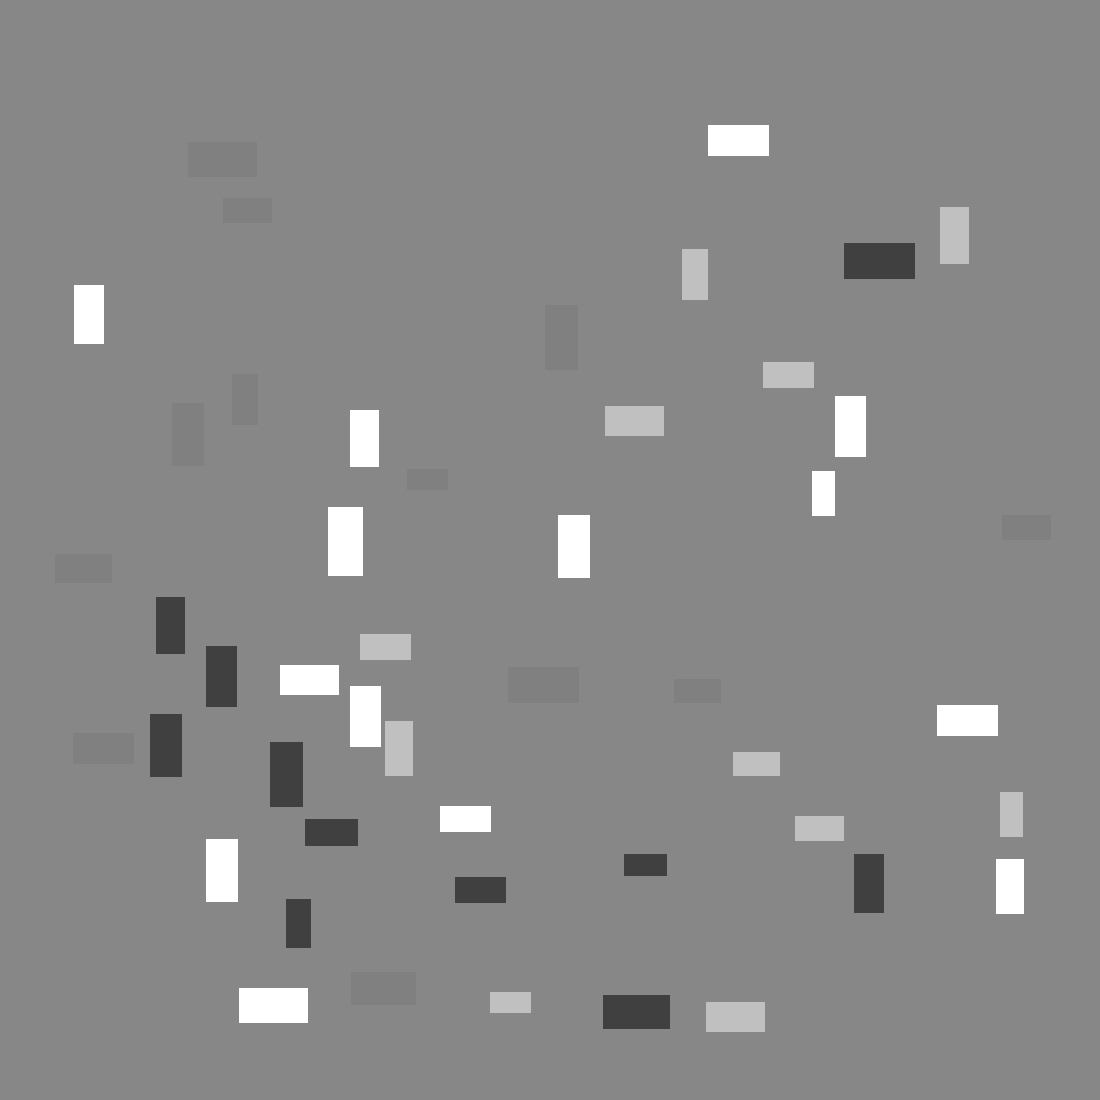

29 58


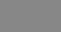

sum 263520 234240
128 135


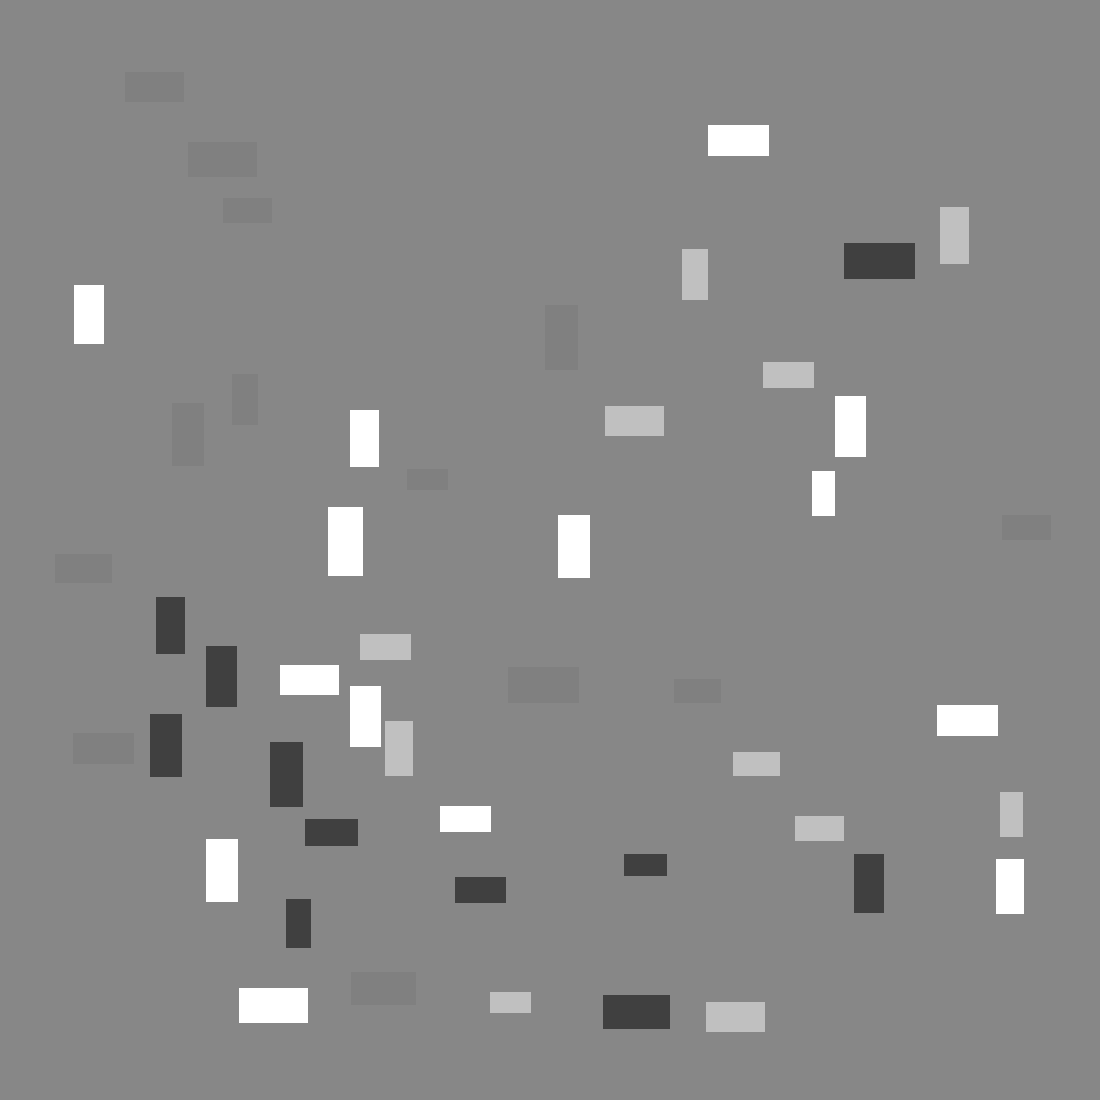

31 62


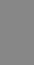

sum 298350 265200
192 135


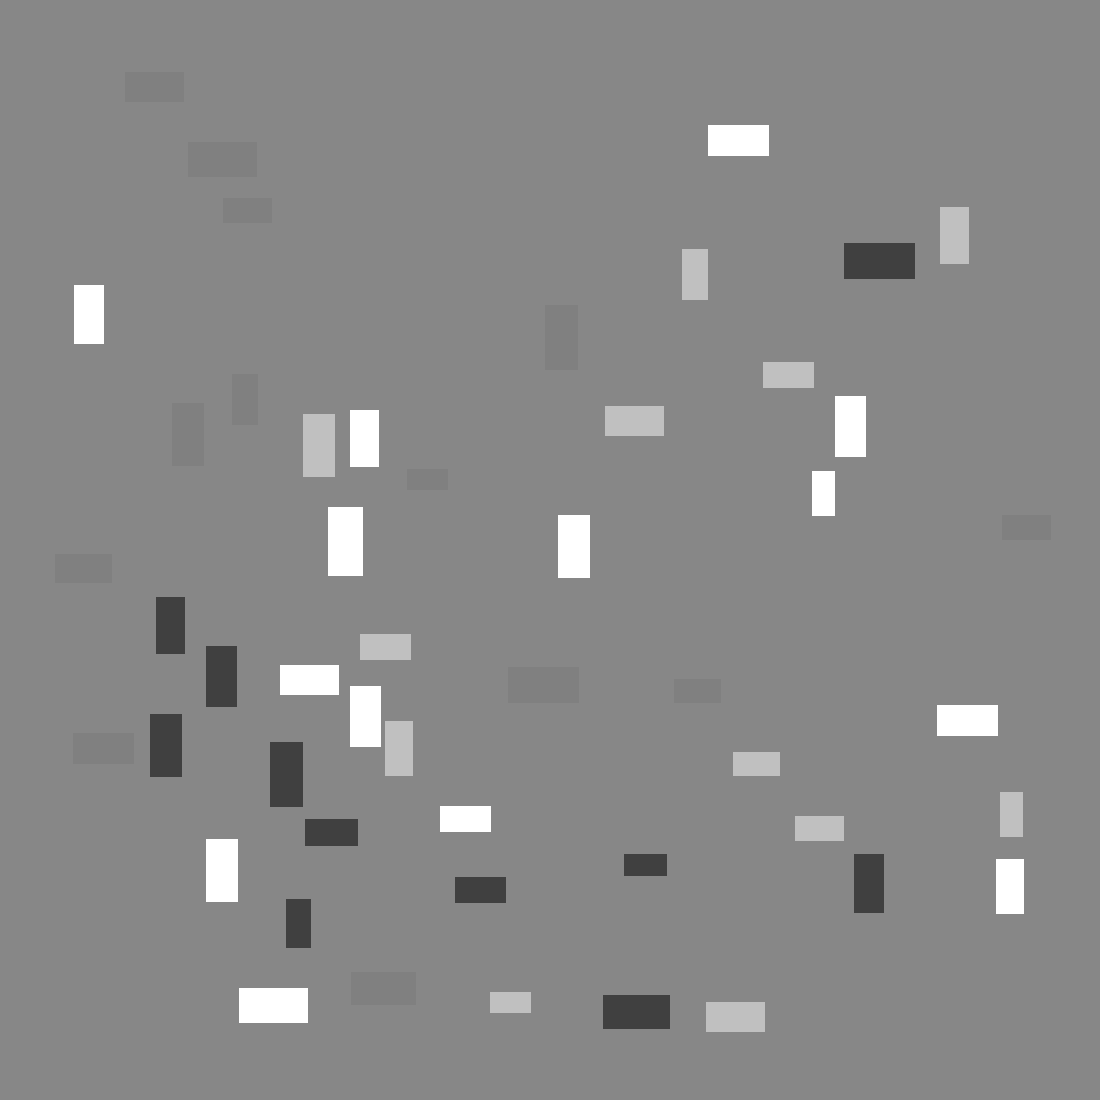

34 68


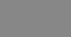

sum 354645 315240
255 135


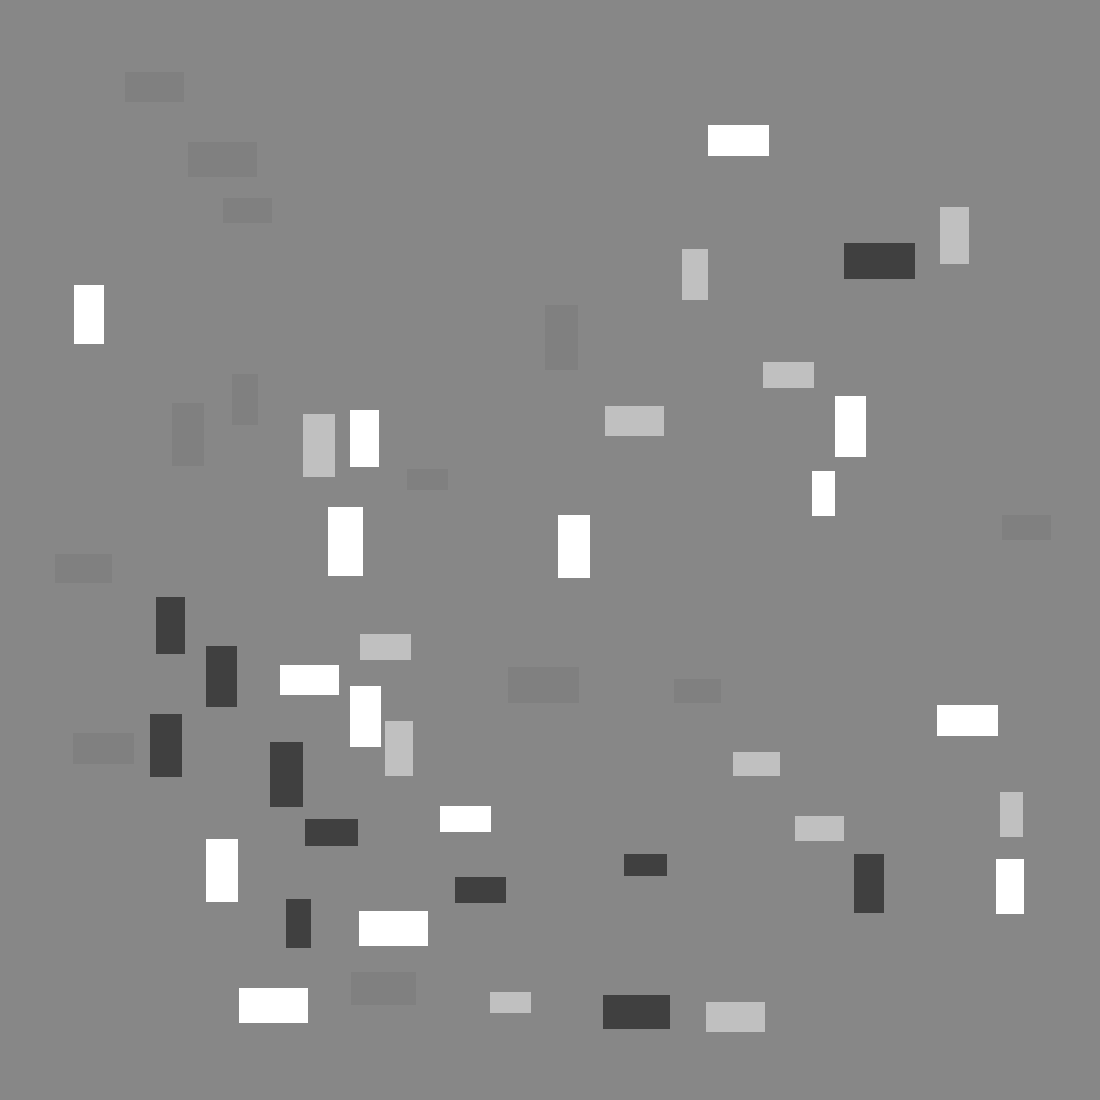

28 56


sum 189405 276990
30 60


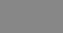

sum 280665 249480
128 135


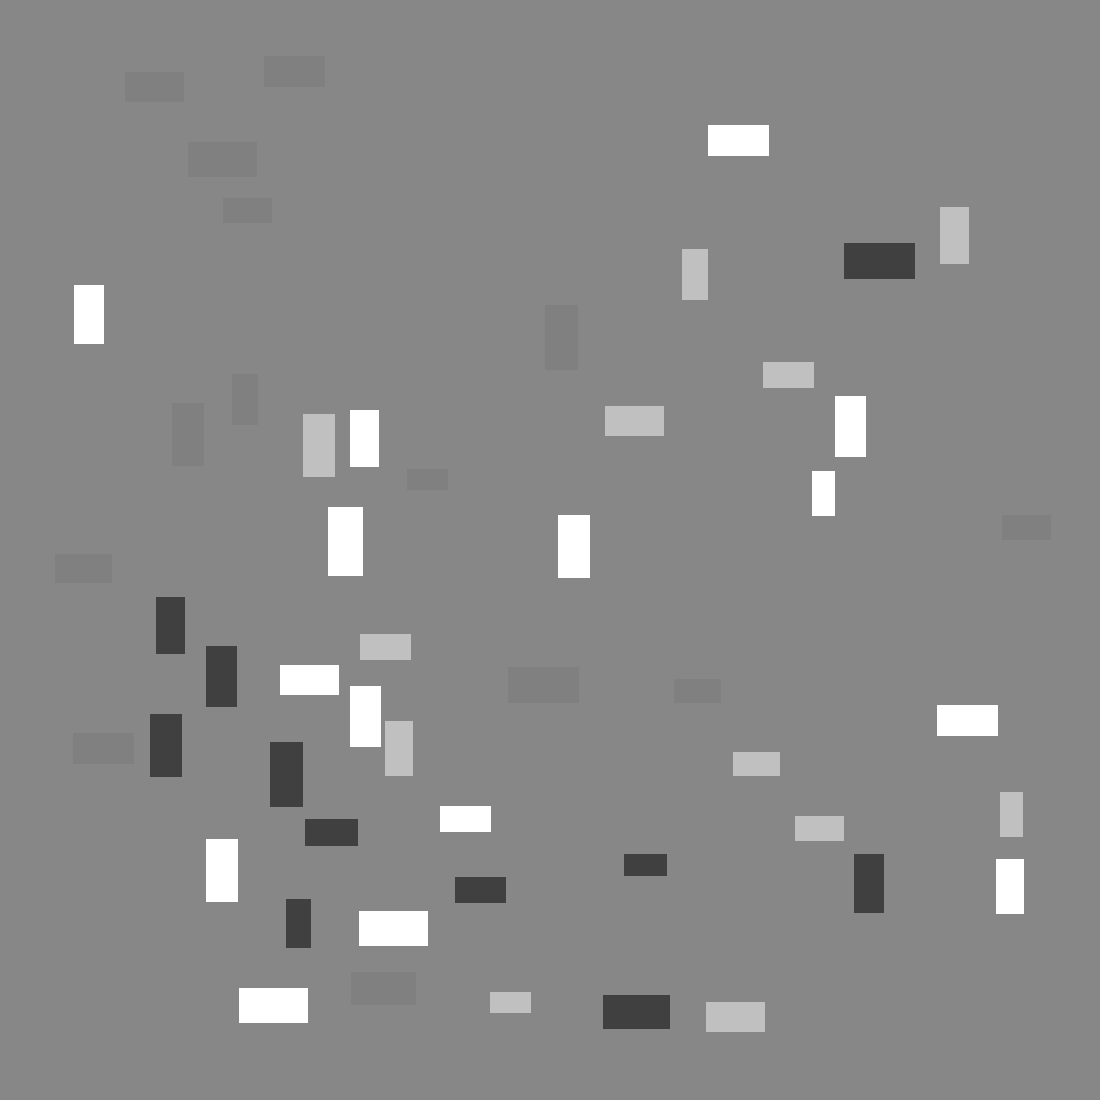

23 46


sum 171990 152880
192 135


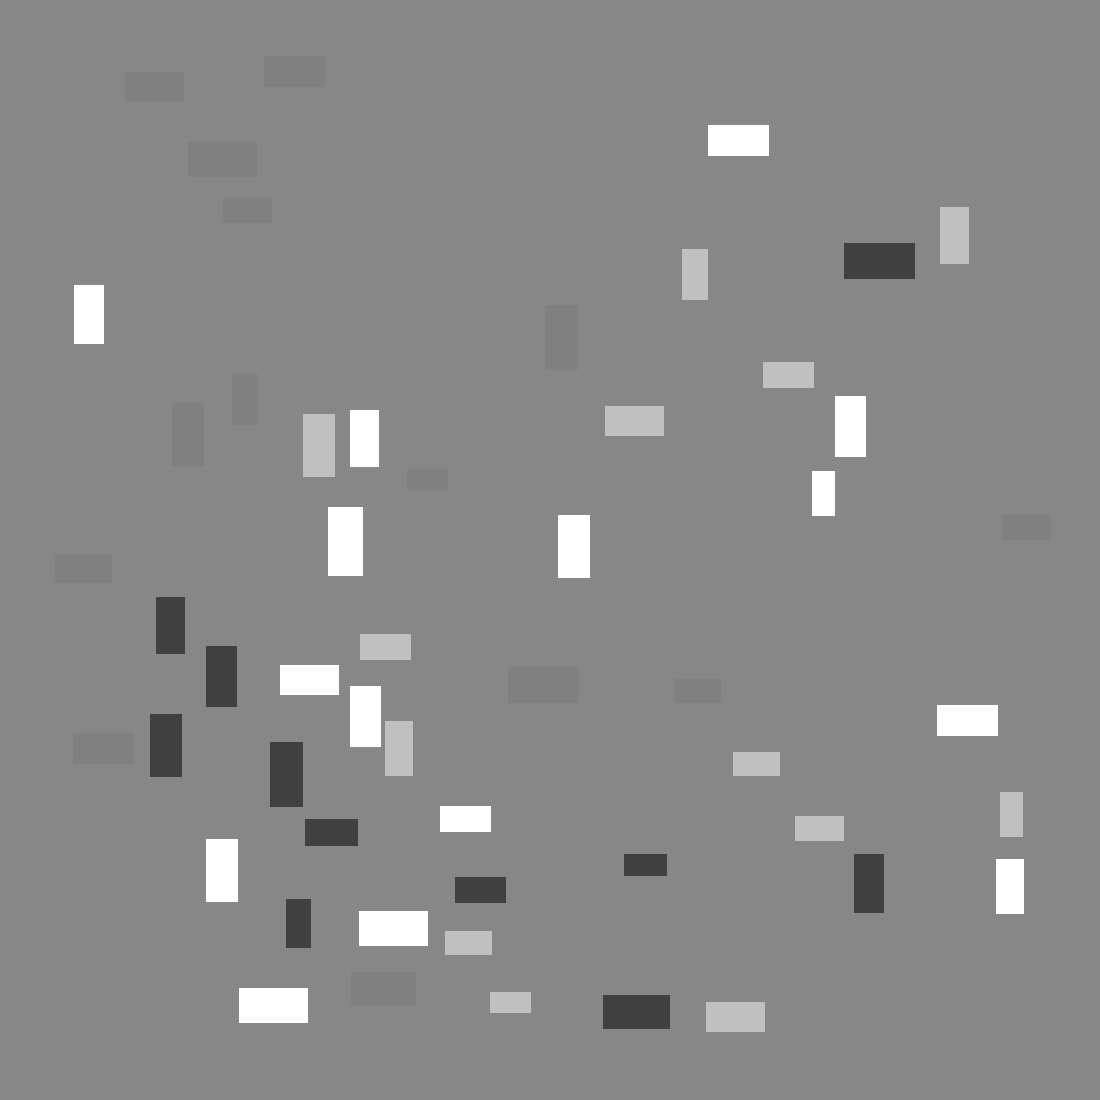

22 44


sum 158625 141000
0 135


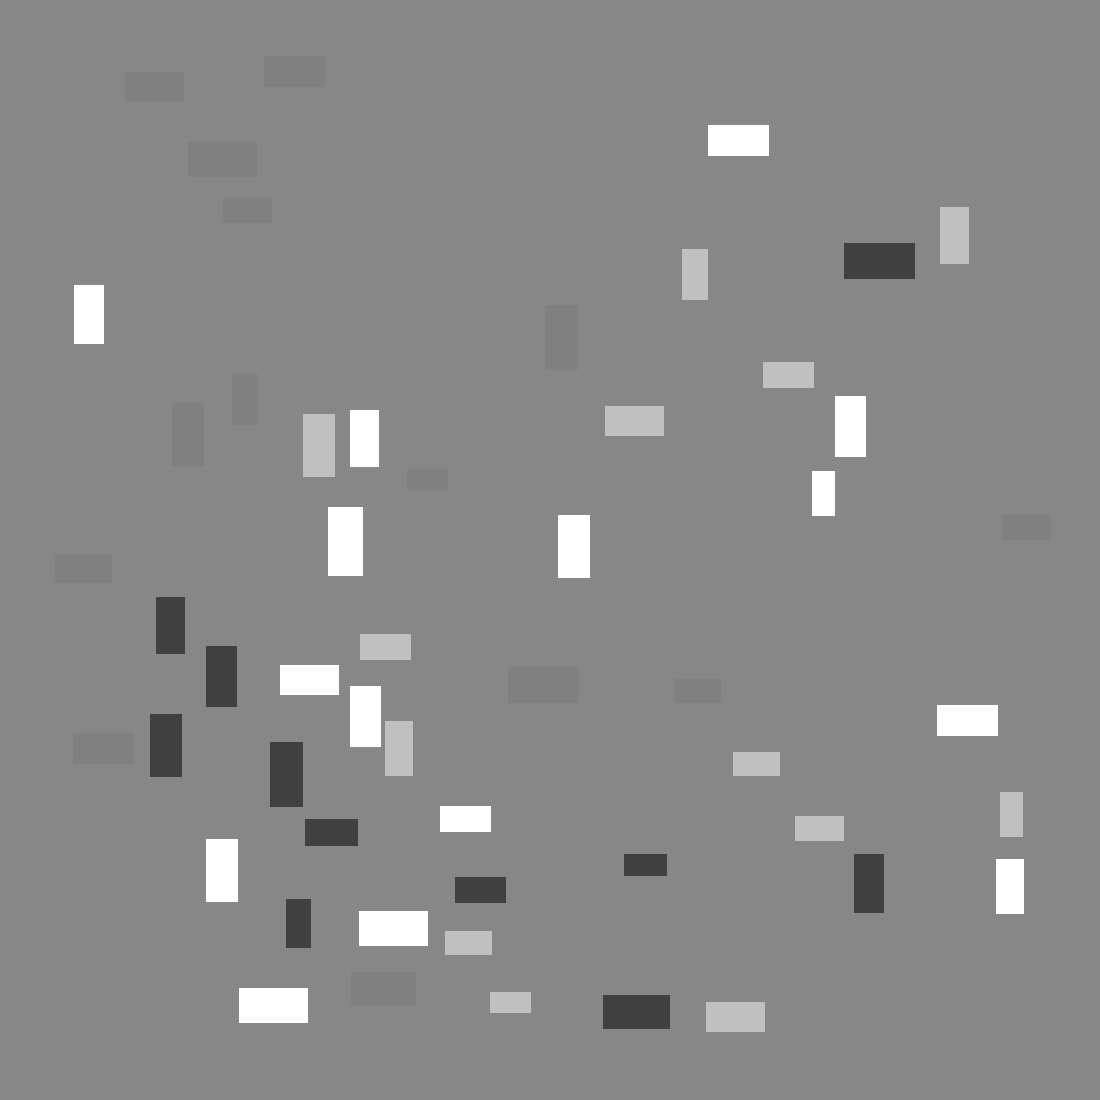

34 68


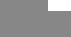

sum 385005 284880
21 42


sum 145800 129600
64 135


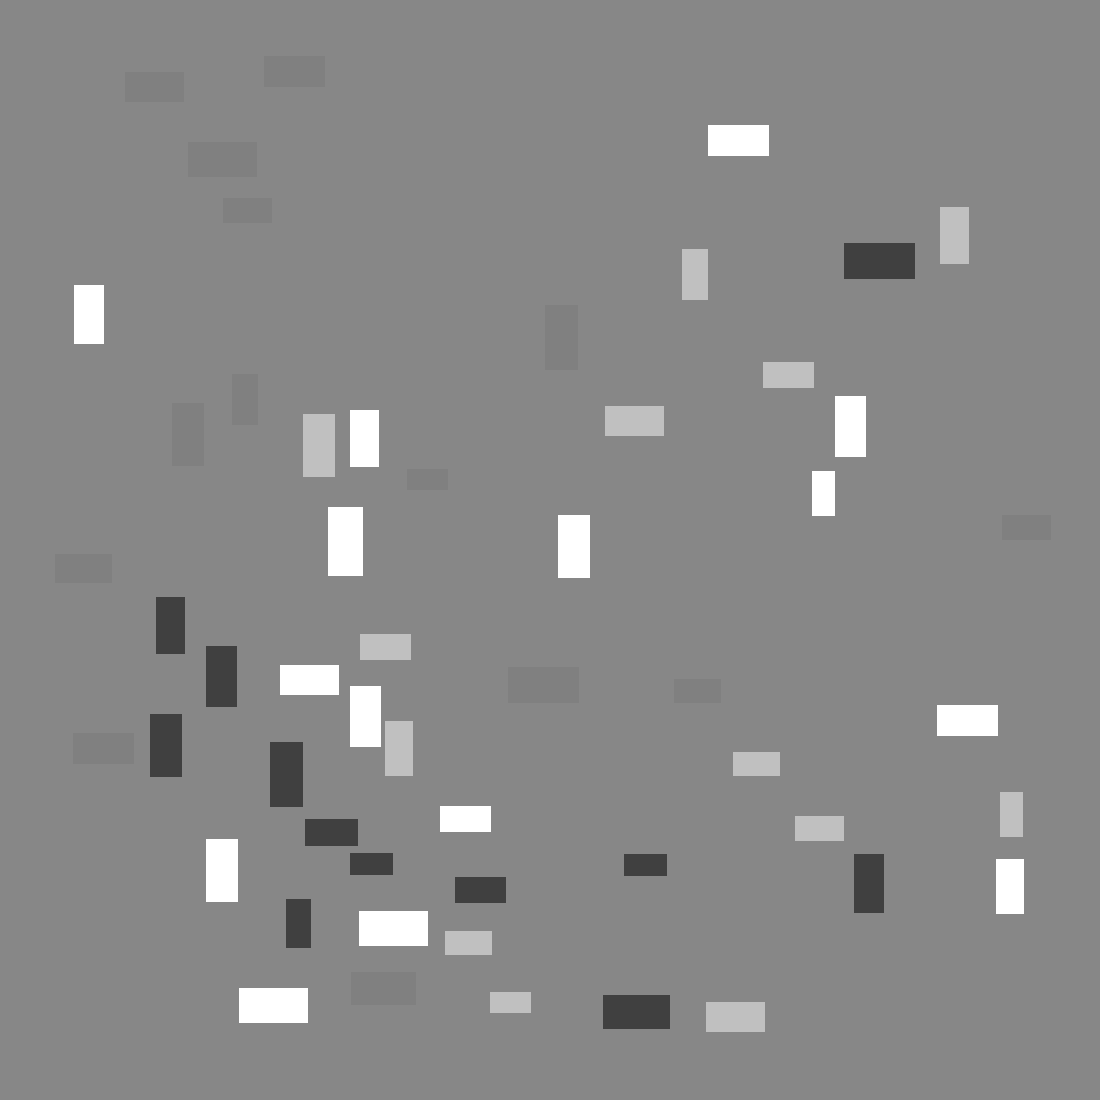

34 68


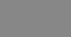

sum 354645 315240
0 135


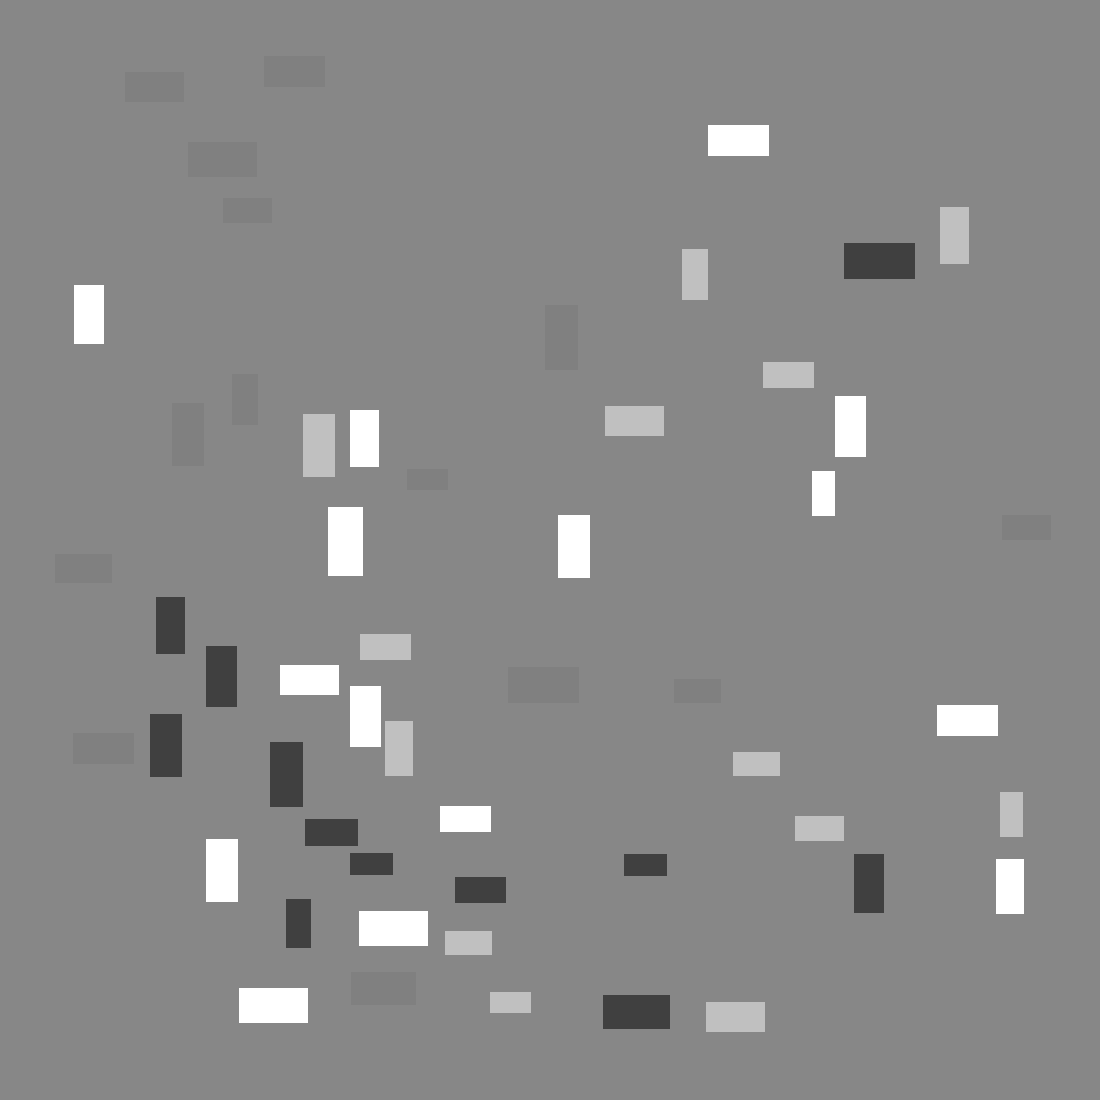

27 54


sum 324060 111990
23 46


sum 171990 152880
128 135


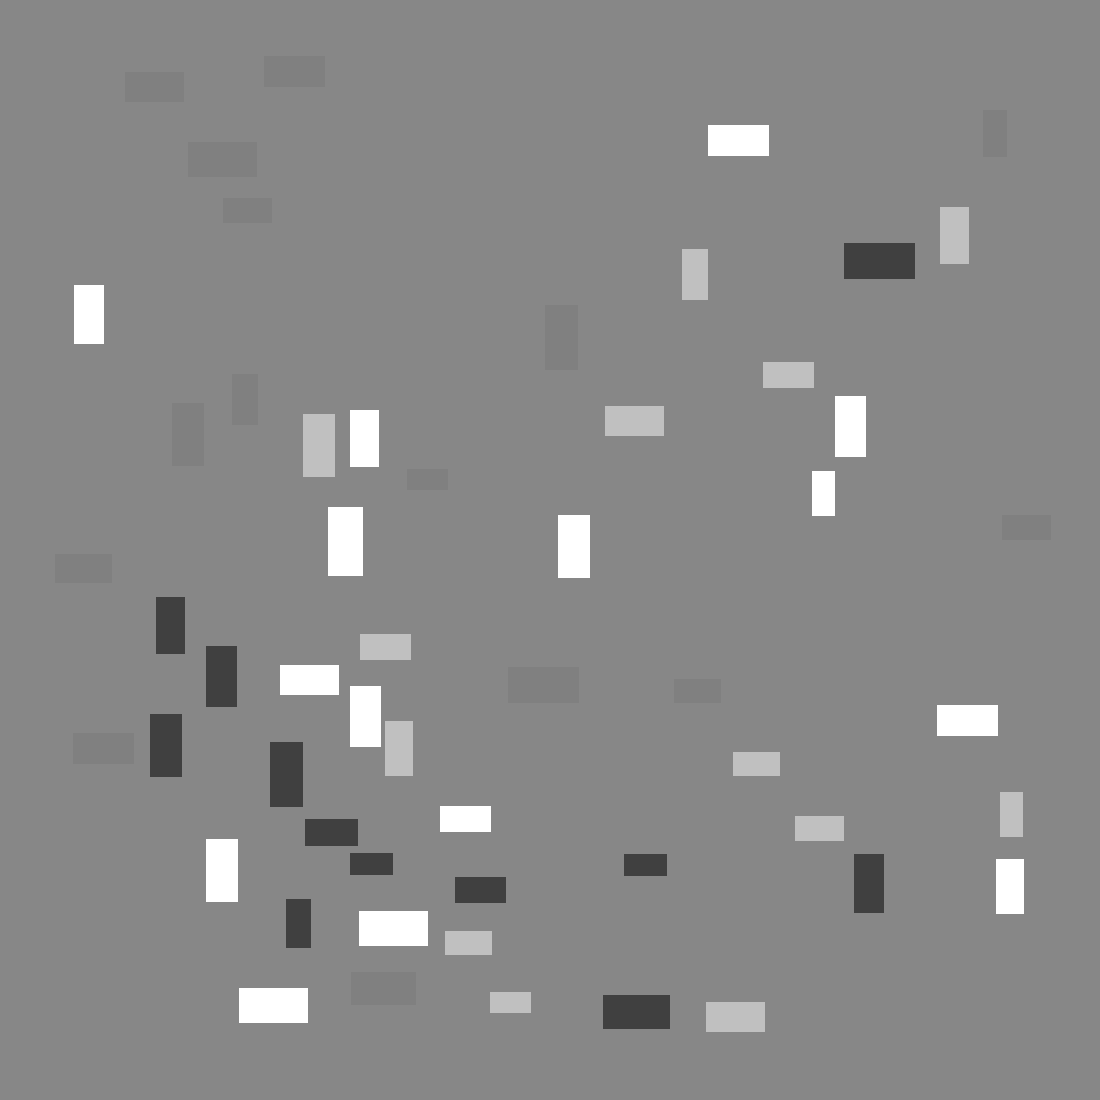

20 40


sum 130778 121417
22 44


sum 236625 63000
30 60


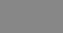

sum 280665 249480
255 135


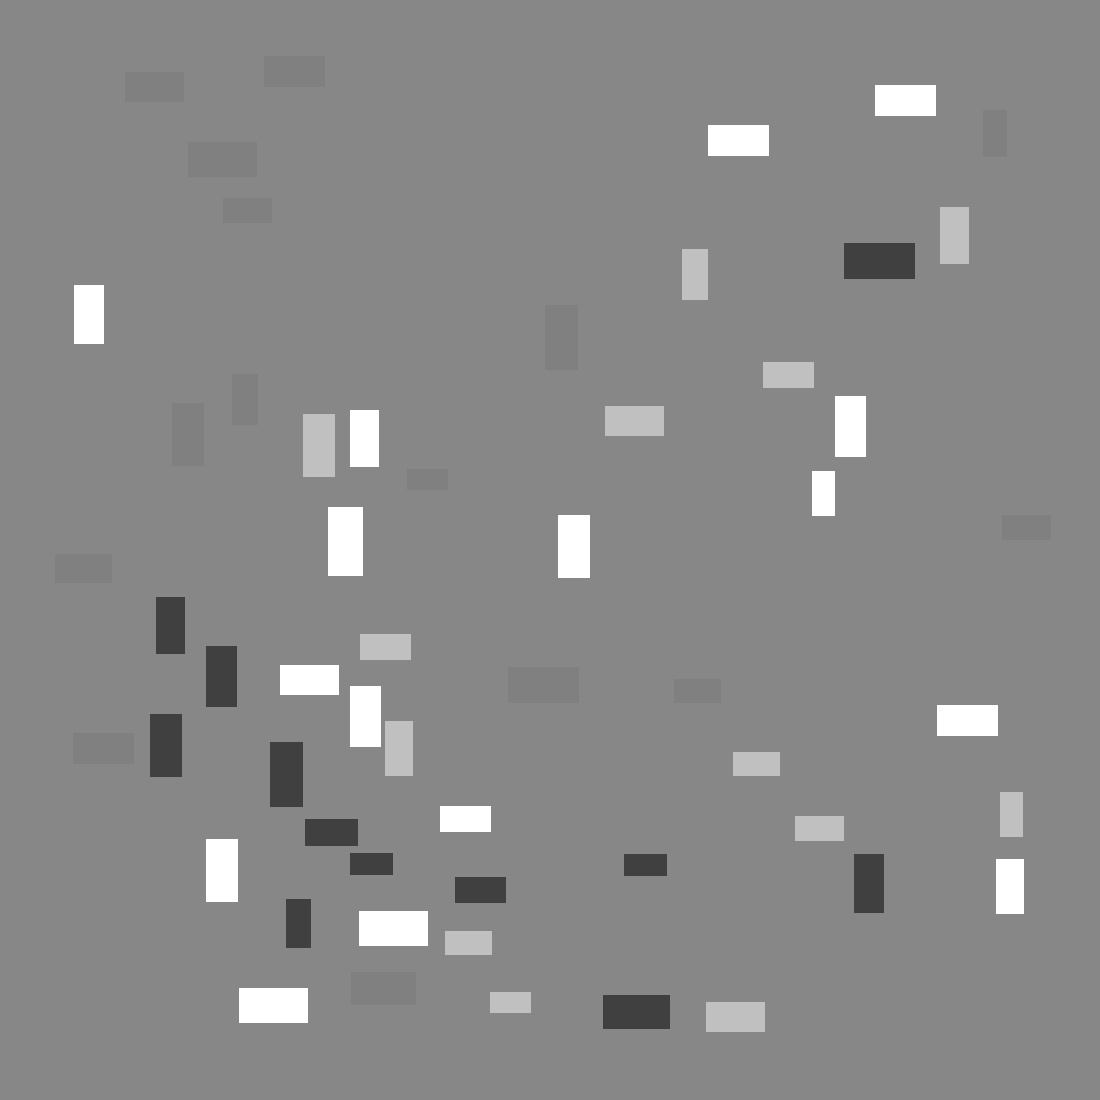

31 62


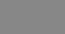

sum 298350 265200
128 135


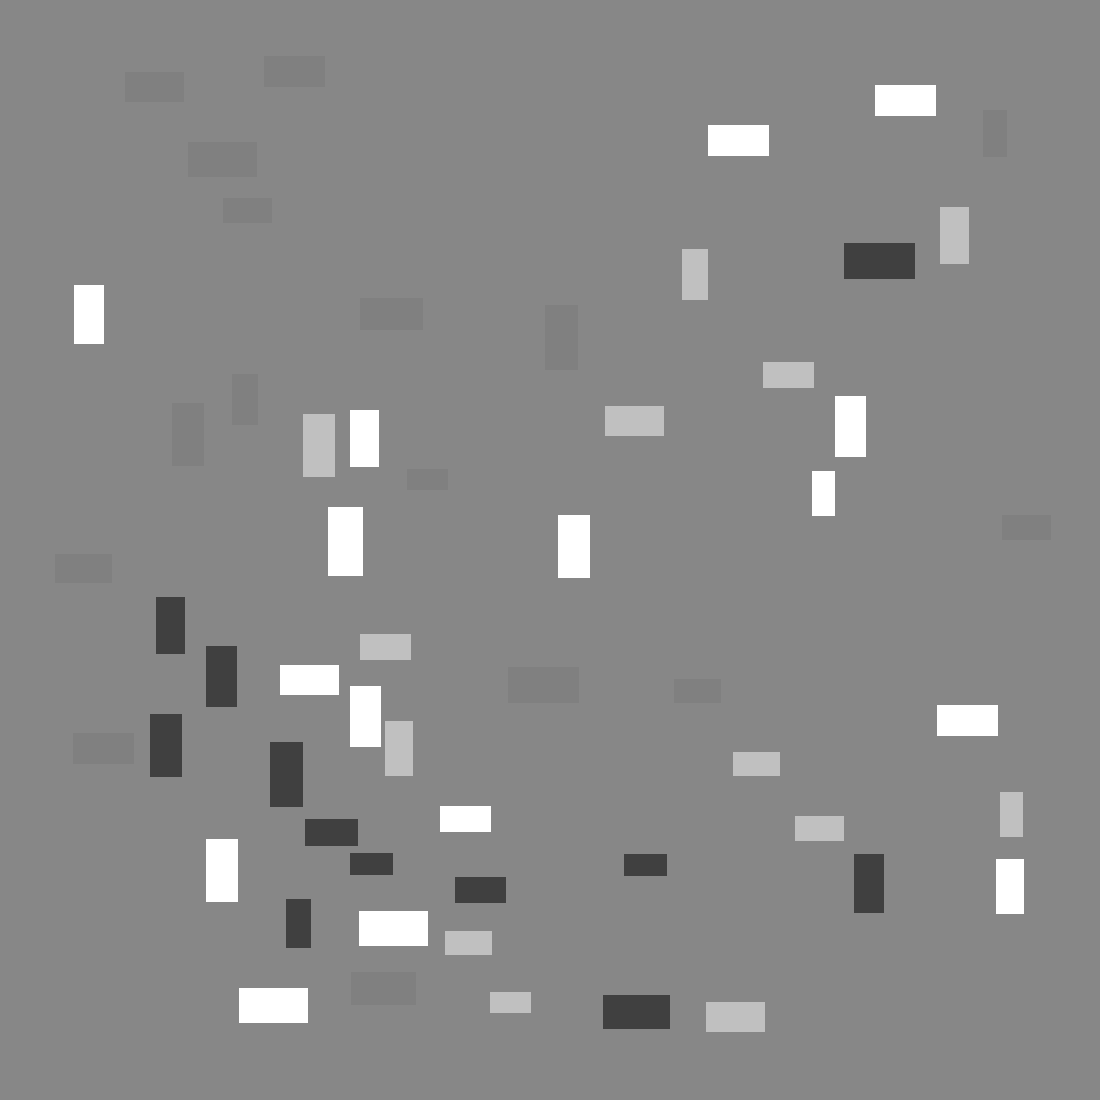

29 58


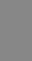

sum 263520 234240
255 135


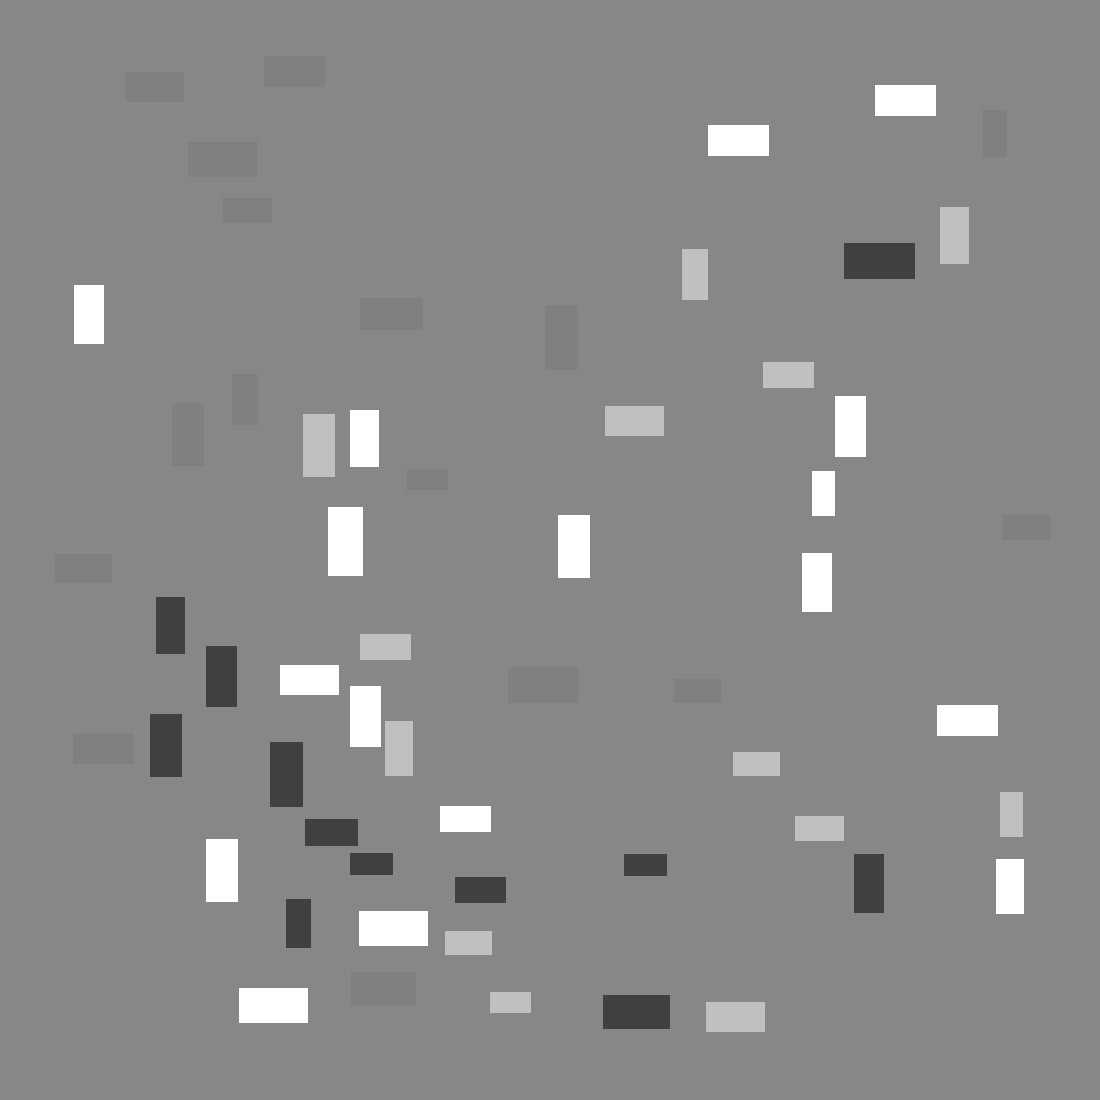

29 58


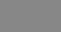

sum 263520 234240
64 135


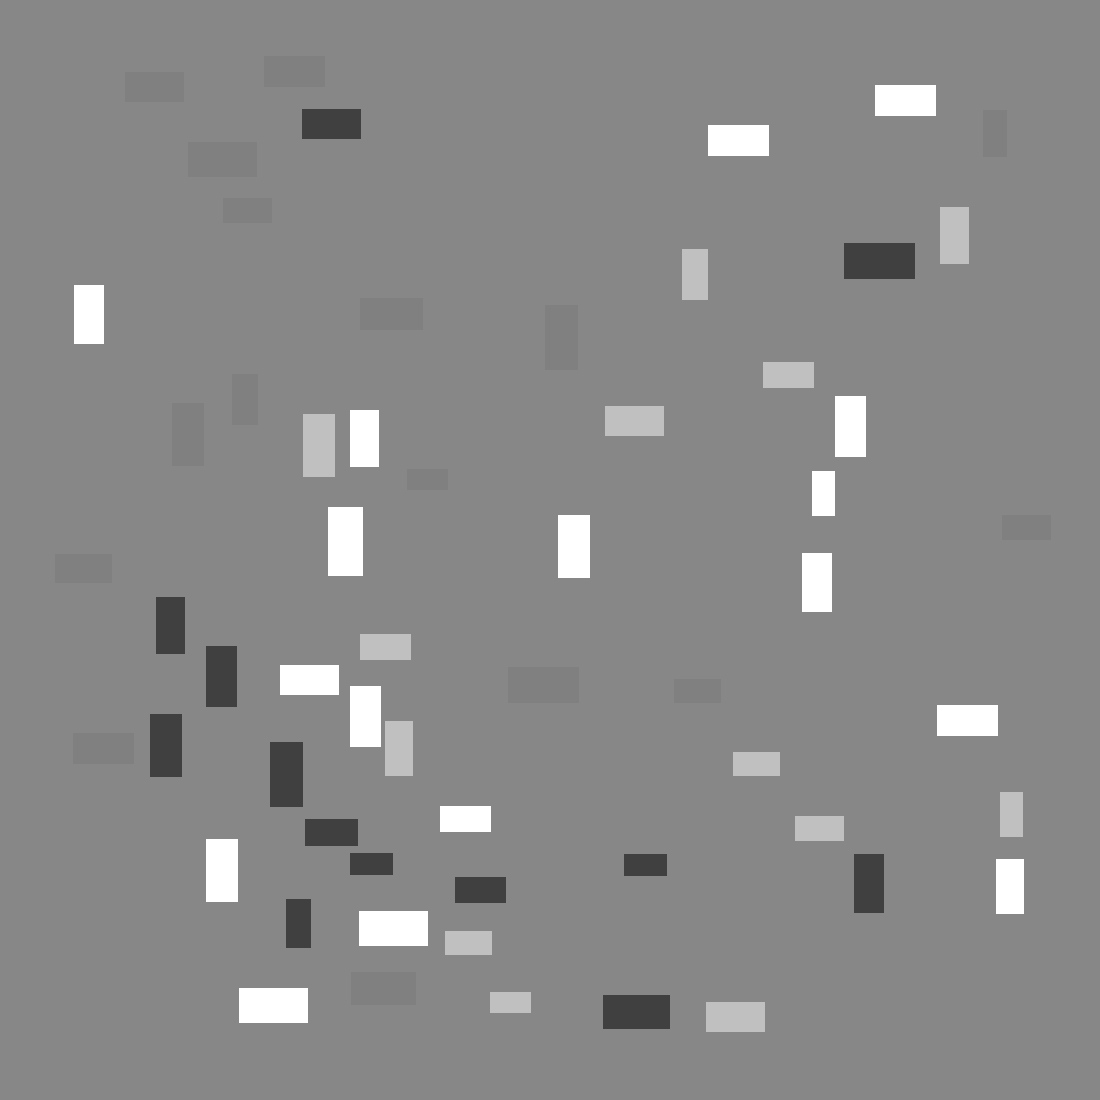

23 46


sum 171990 152880
192 135


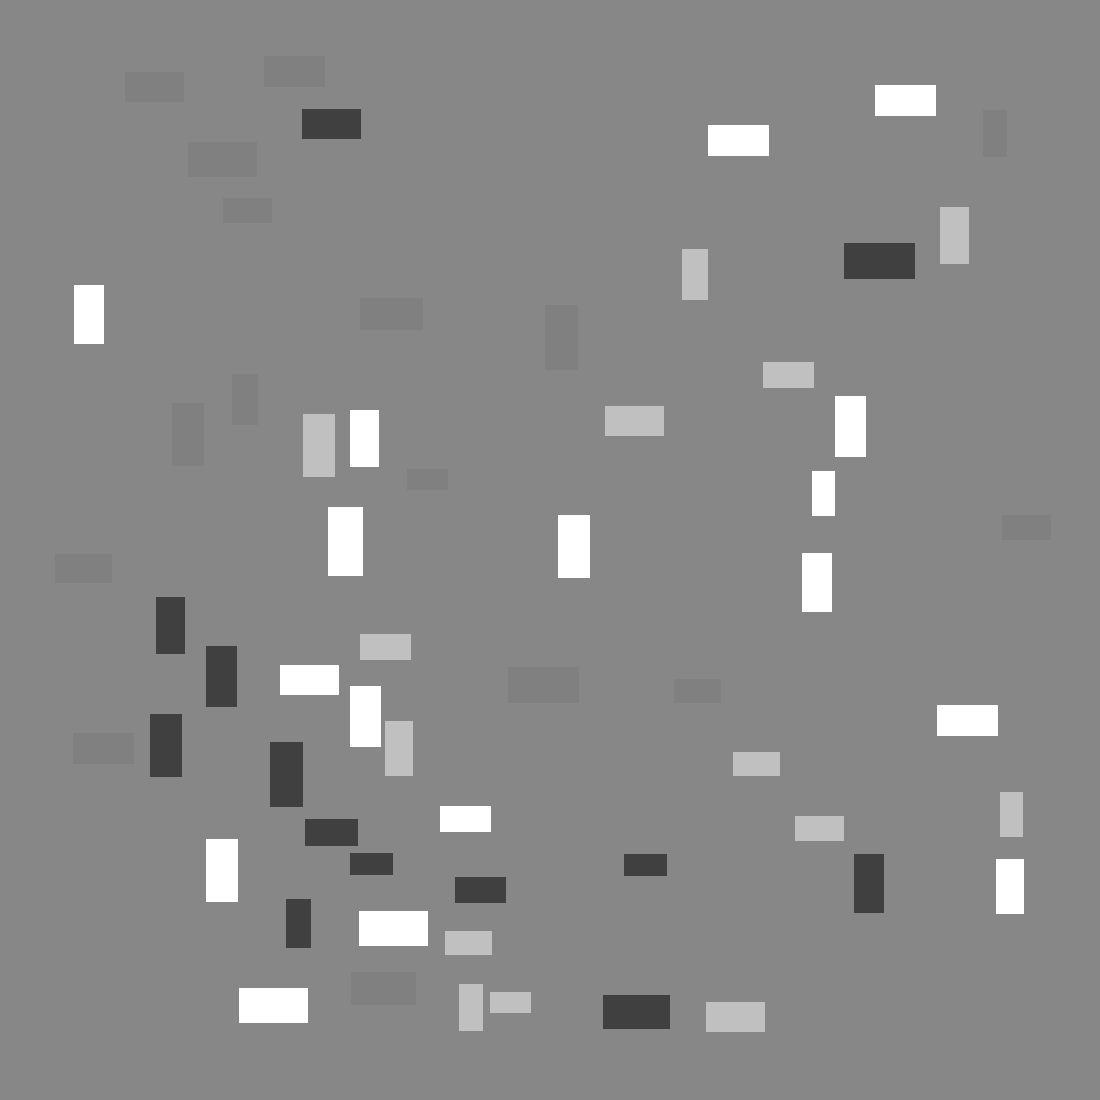

28 56


sum 311553 154842
35 70


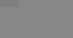

sum 373559 333811
22 44


sum 158625 141000
0 135


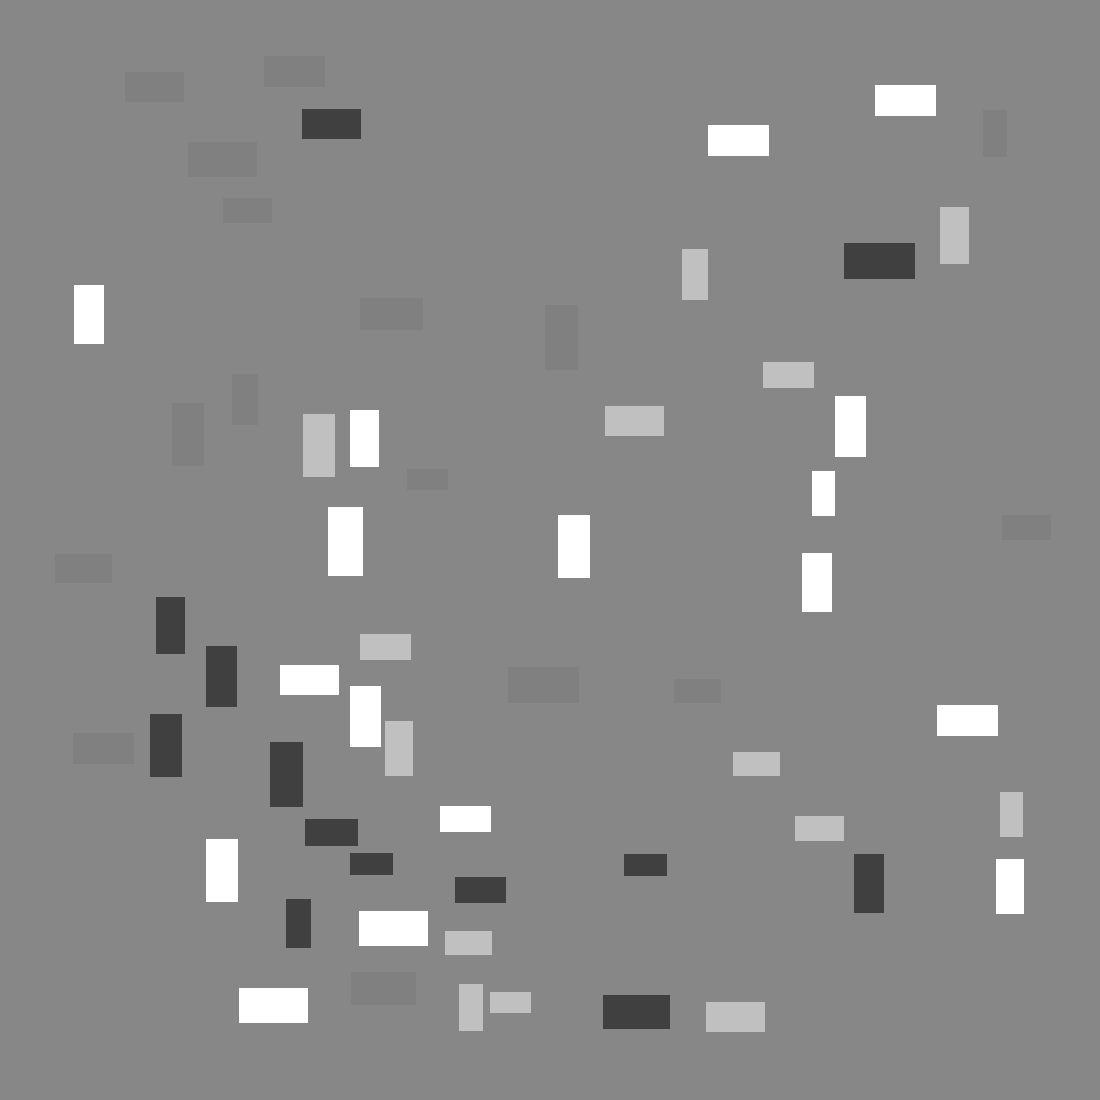

21 42


sum 94680 180720
32 64


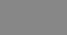

sum 316575 281400
128 135


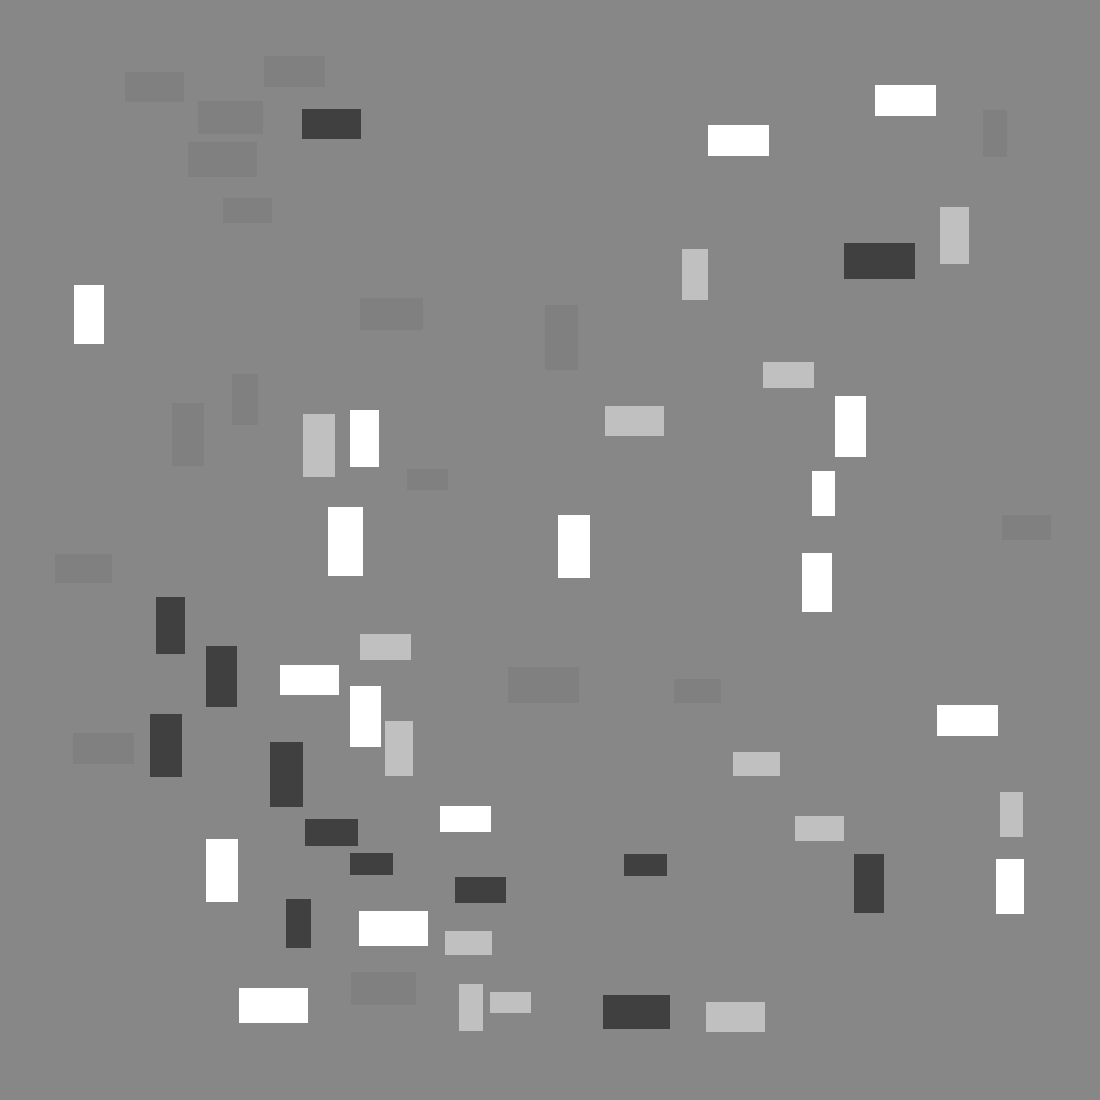

24 48


sum 185895 165240
192 135


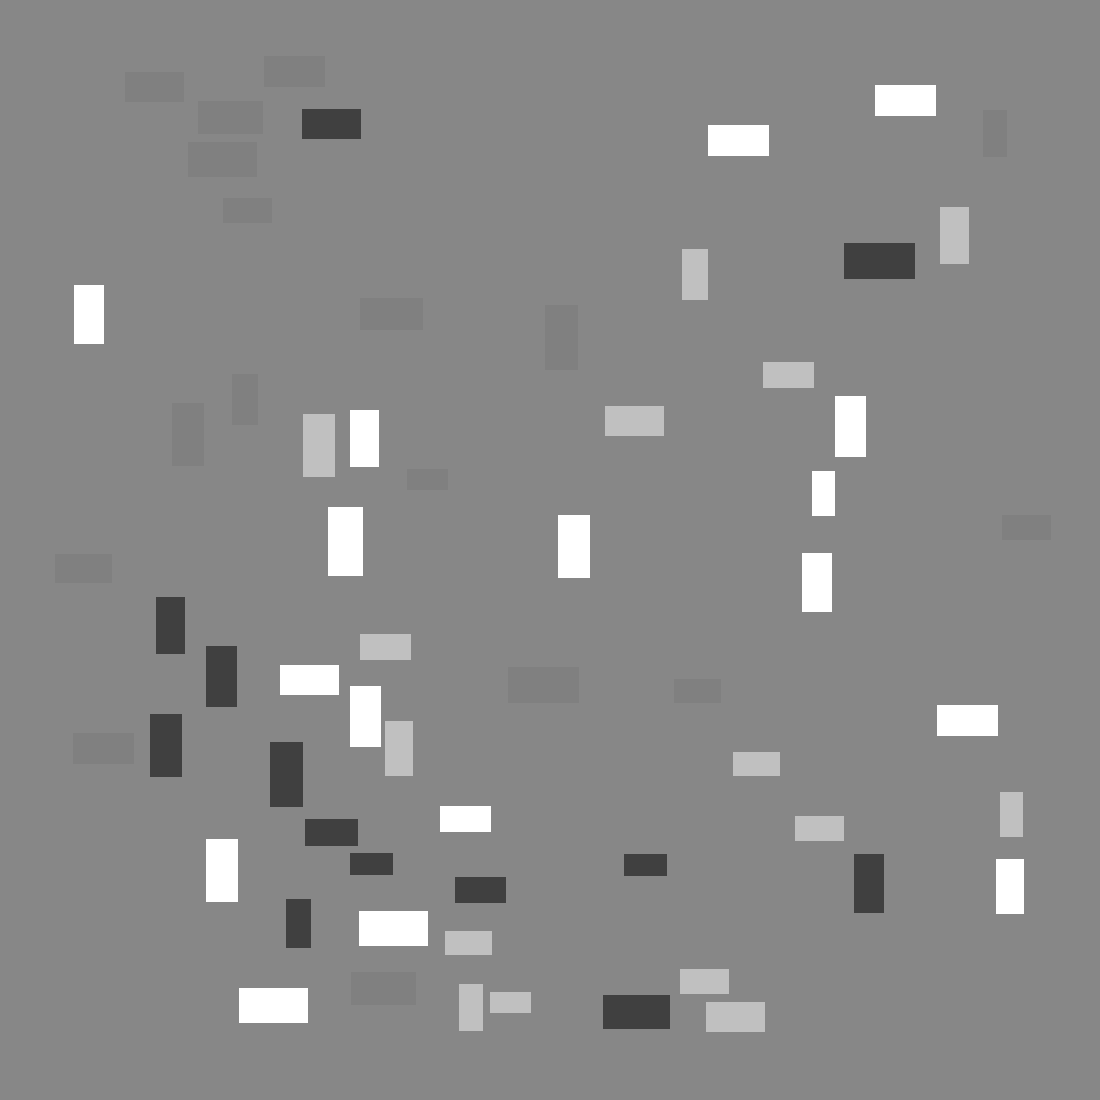

29 58


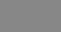

sum 263520 234240
128 135


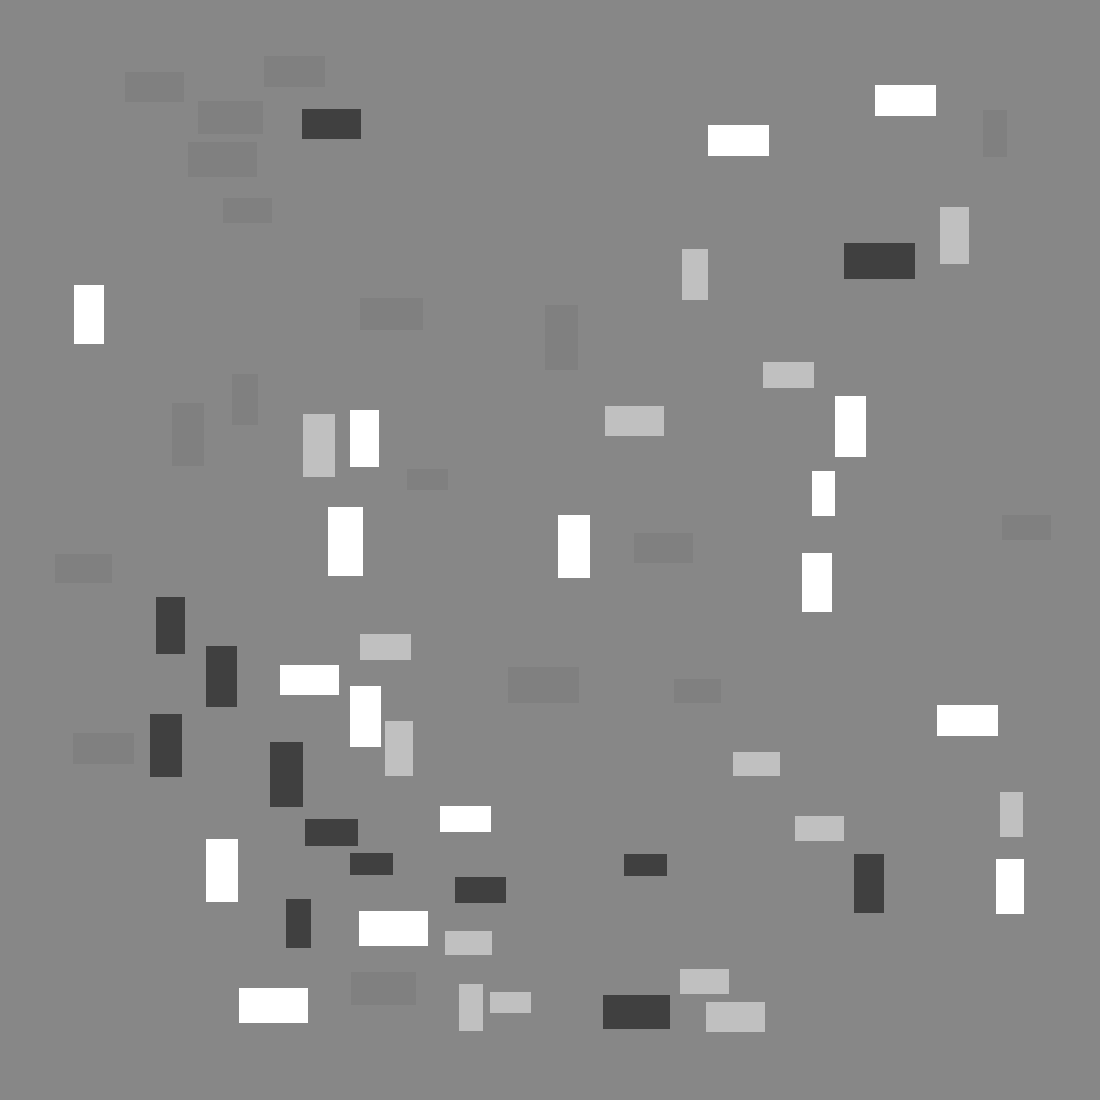

23 46


sum 171990 152880
0 135


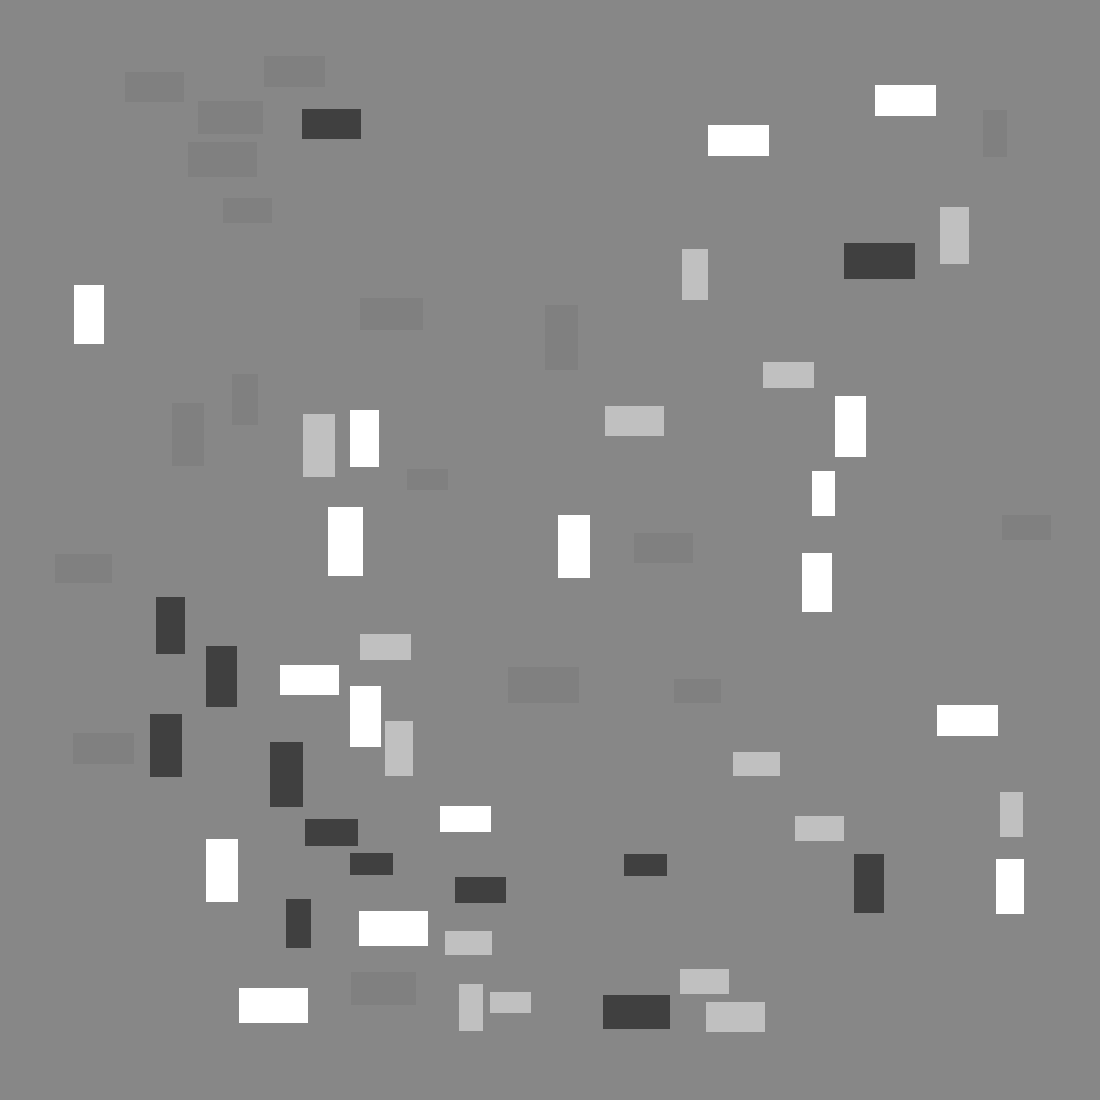

35 70


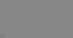

sum 374350 333020
32 64


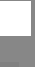

sum 446110 151865
33 66


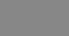

sum 335340 298080
0 135


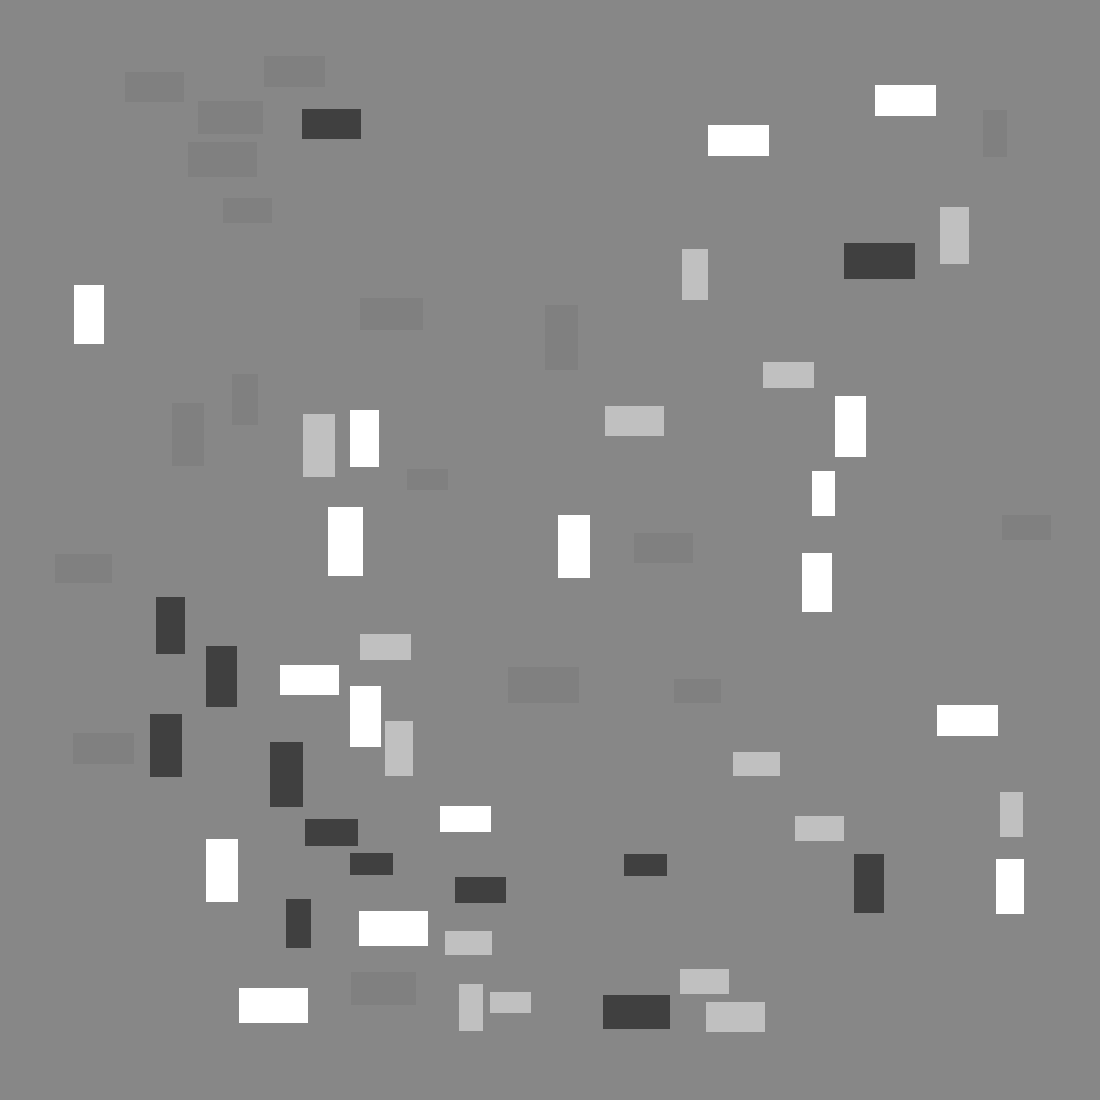

26 52


sum 148869 257856
26 52


sum 322965 83760
21 42


sum 159360 116040
28 56


sum 209498 256897
30 60


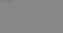

sum 280497 249648
25 50


sum 275820 102600
21 42


sum 145800 129600
128 135


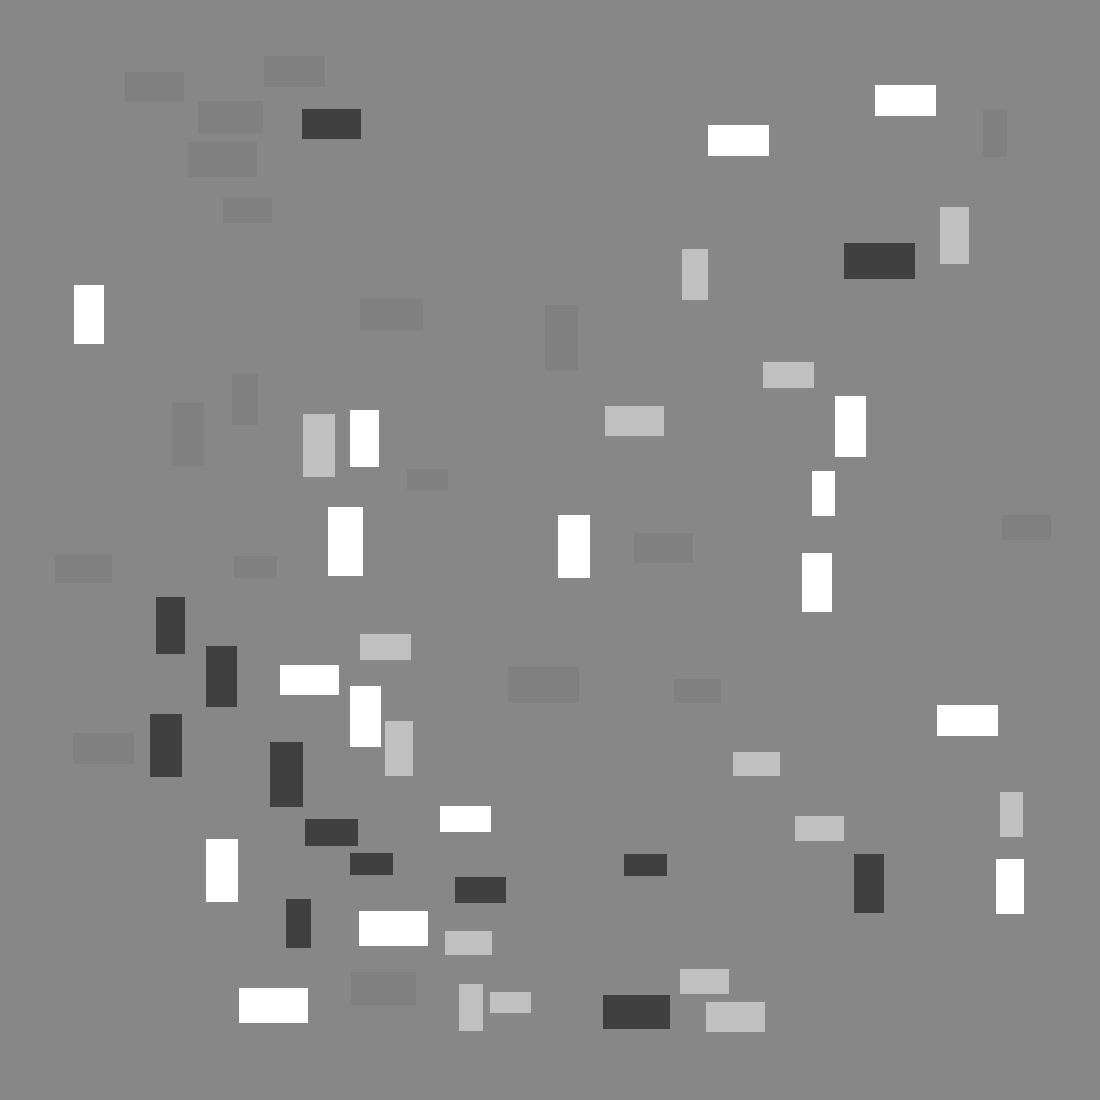

22 44


sum 158625 141000
0 135


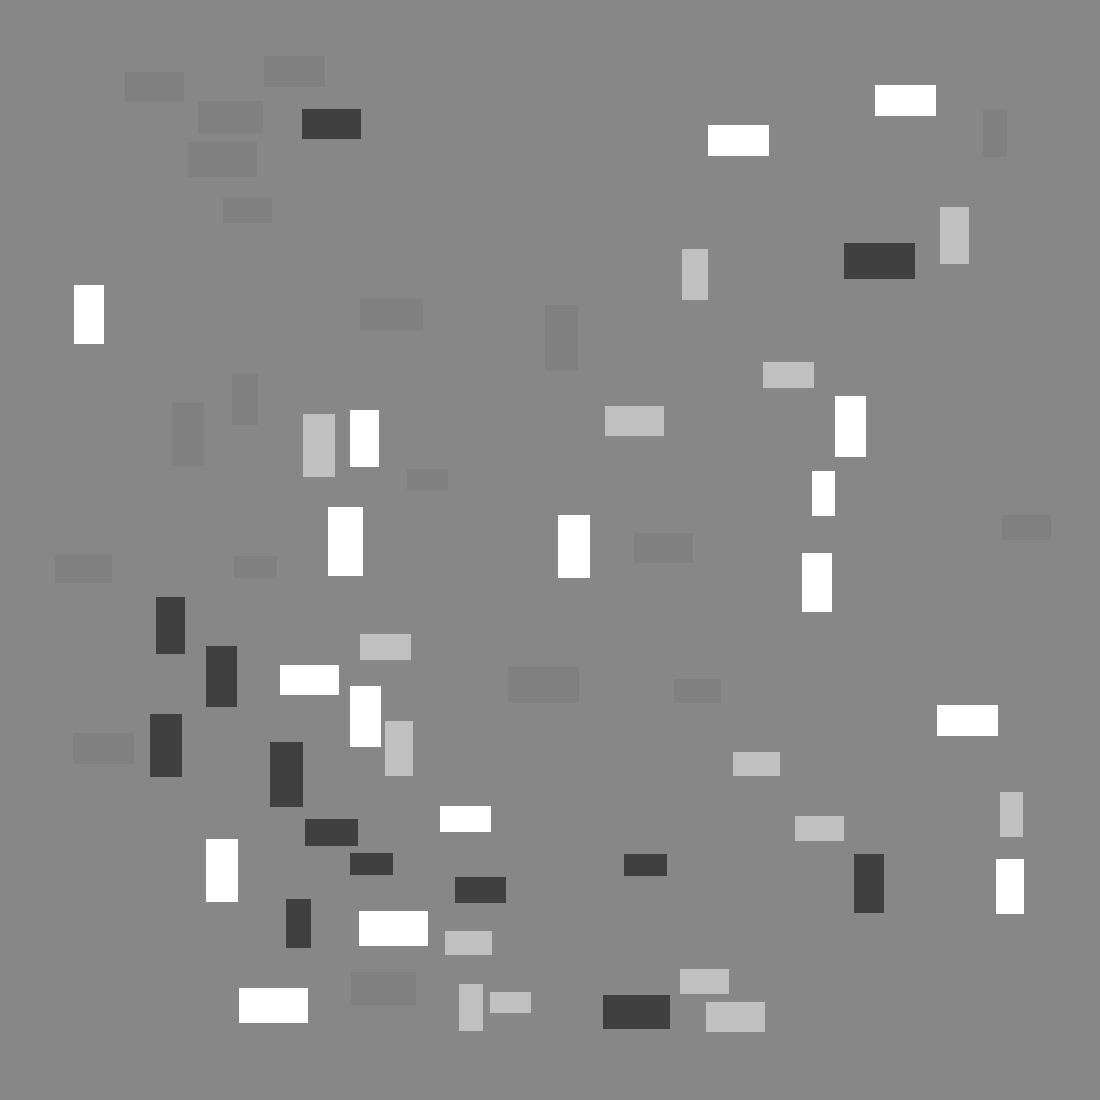

20 40


sum 141075 111120
26 52


sum 215325 191400
0 135


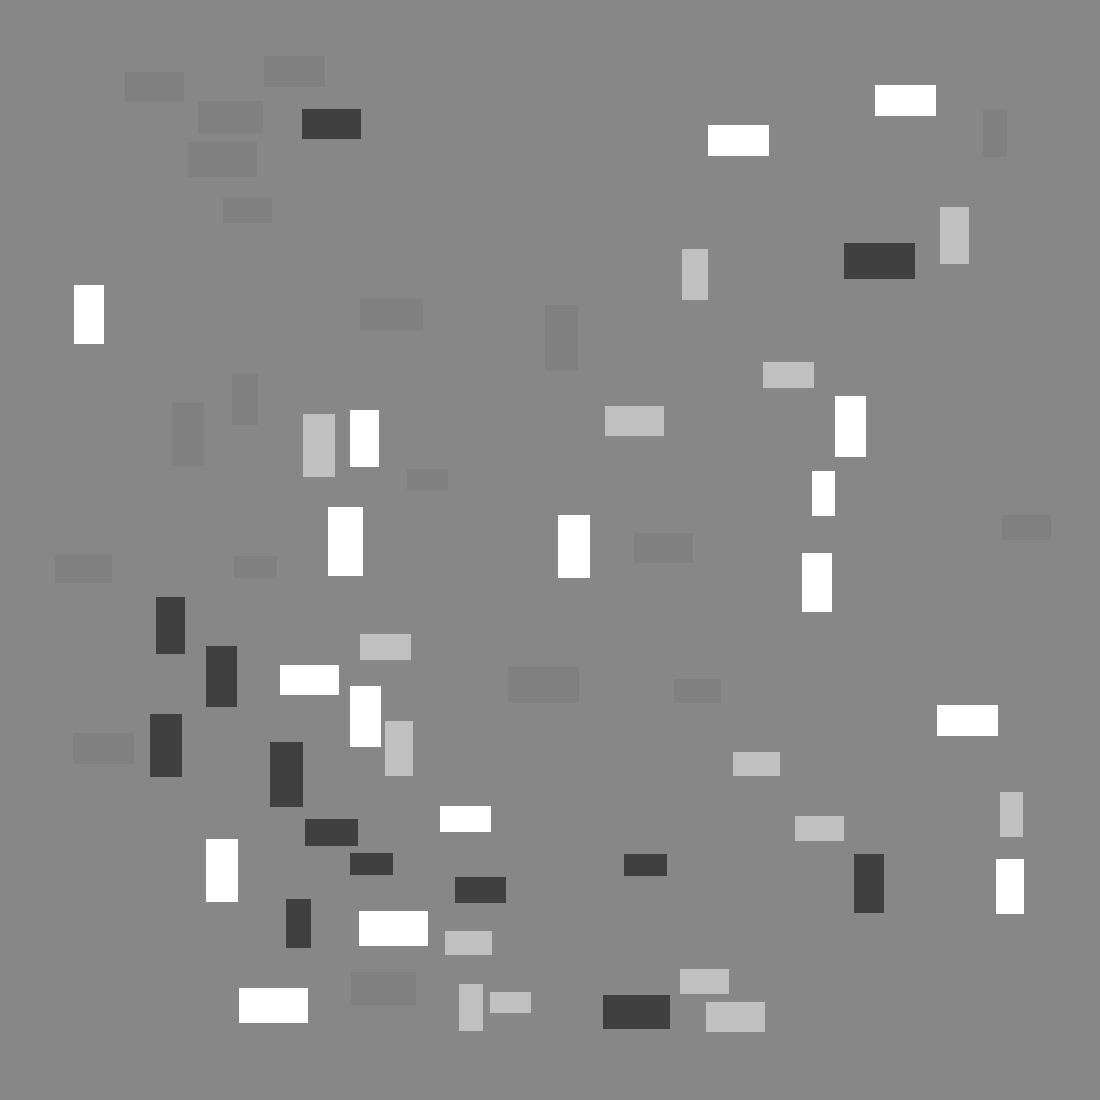

21 42


sum 143448 131952
30 60


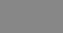

sum 280665 249480
192 135


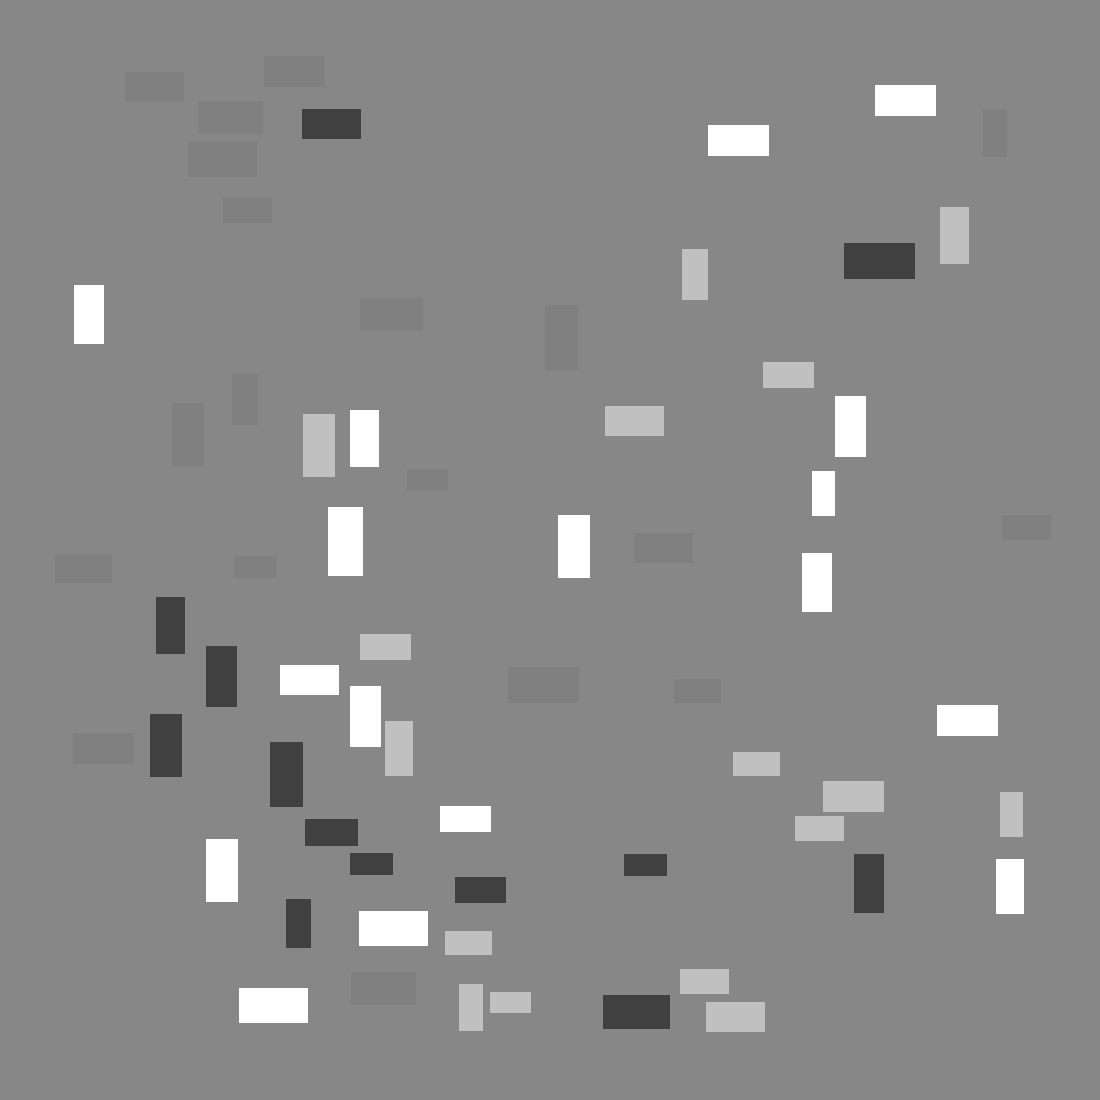

27 54


sum 242136 193914
28 56


sum 243401 222994
20 40


sum 133515 118680
128 135


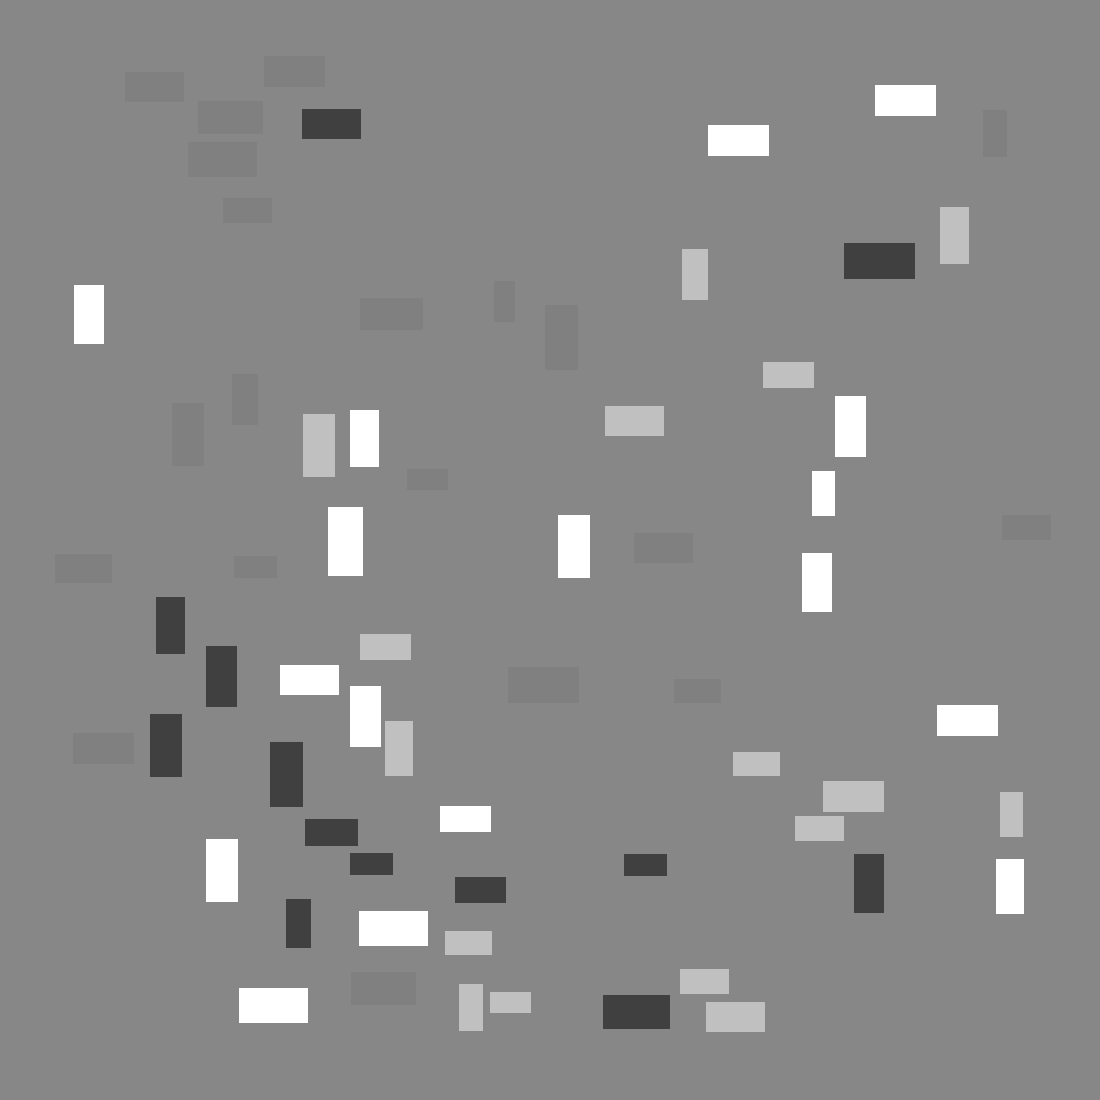

33 66


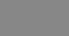

sum 335340 298080
255 135


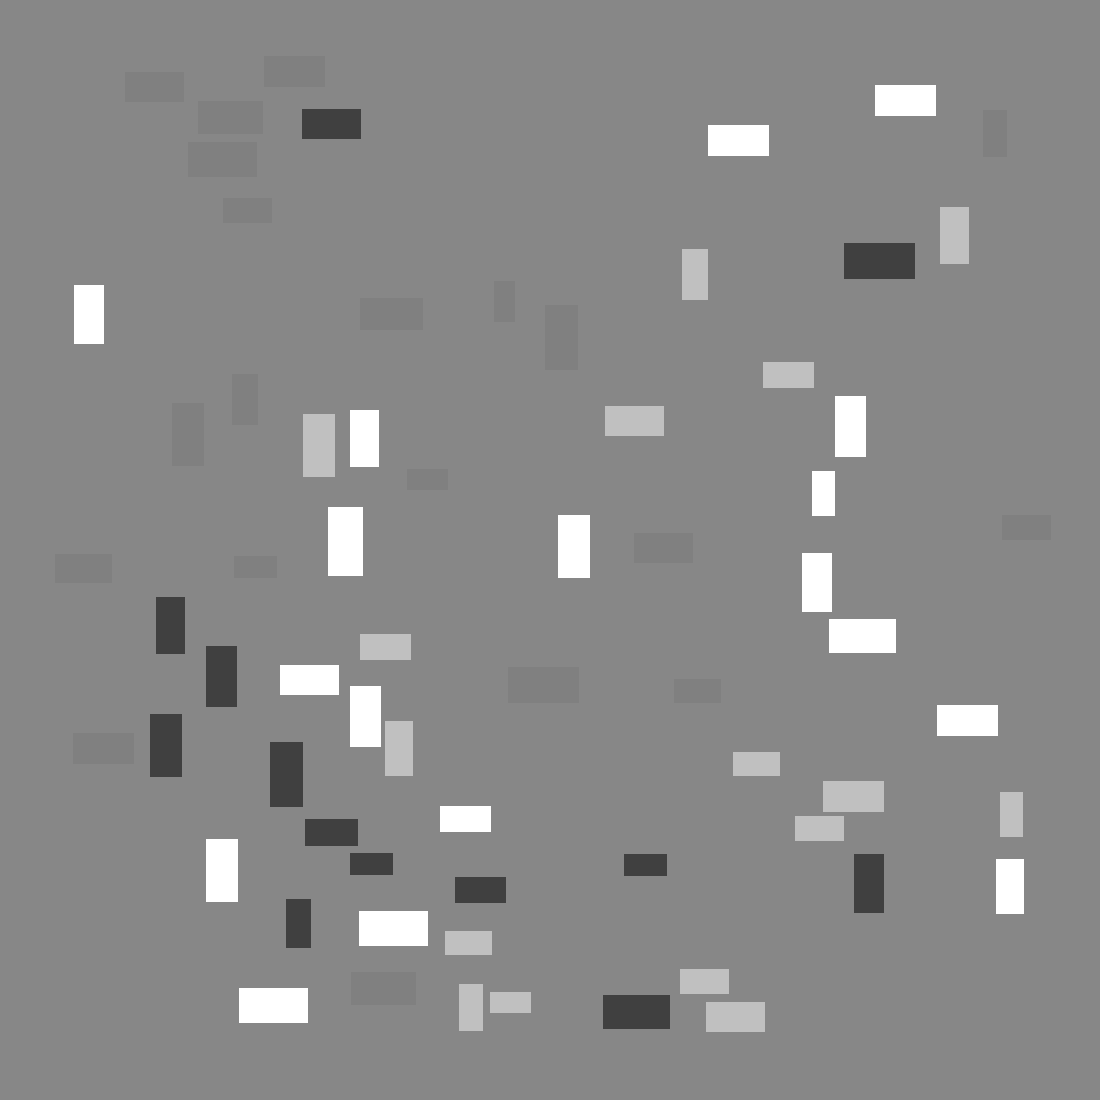

20 40


sum 133515 118680
192 135


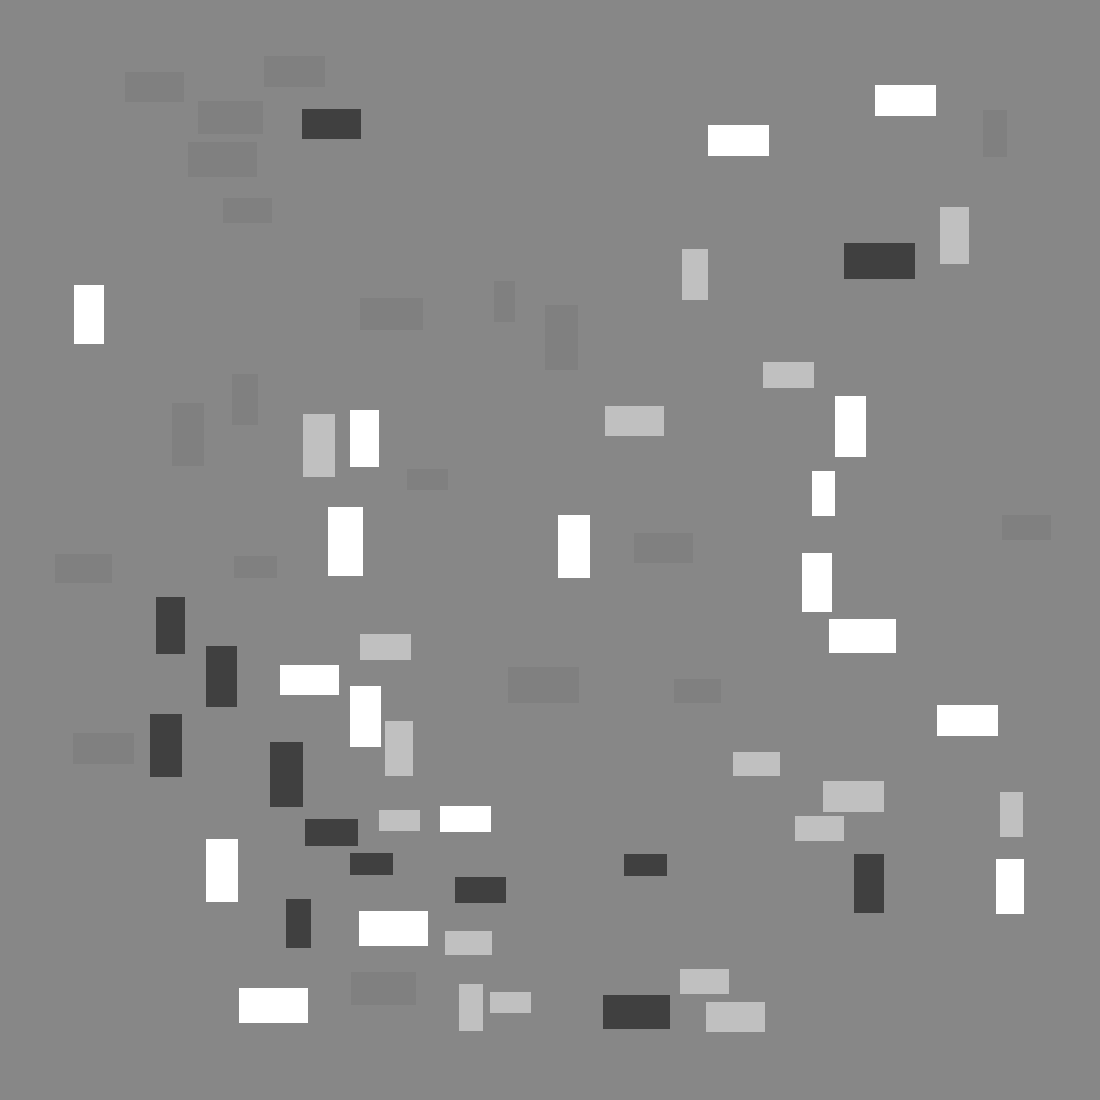

24 48


sum 185895 165240
64 135


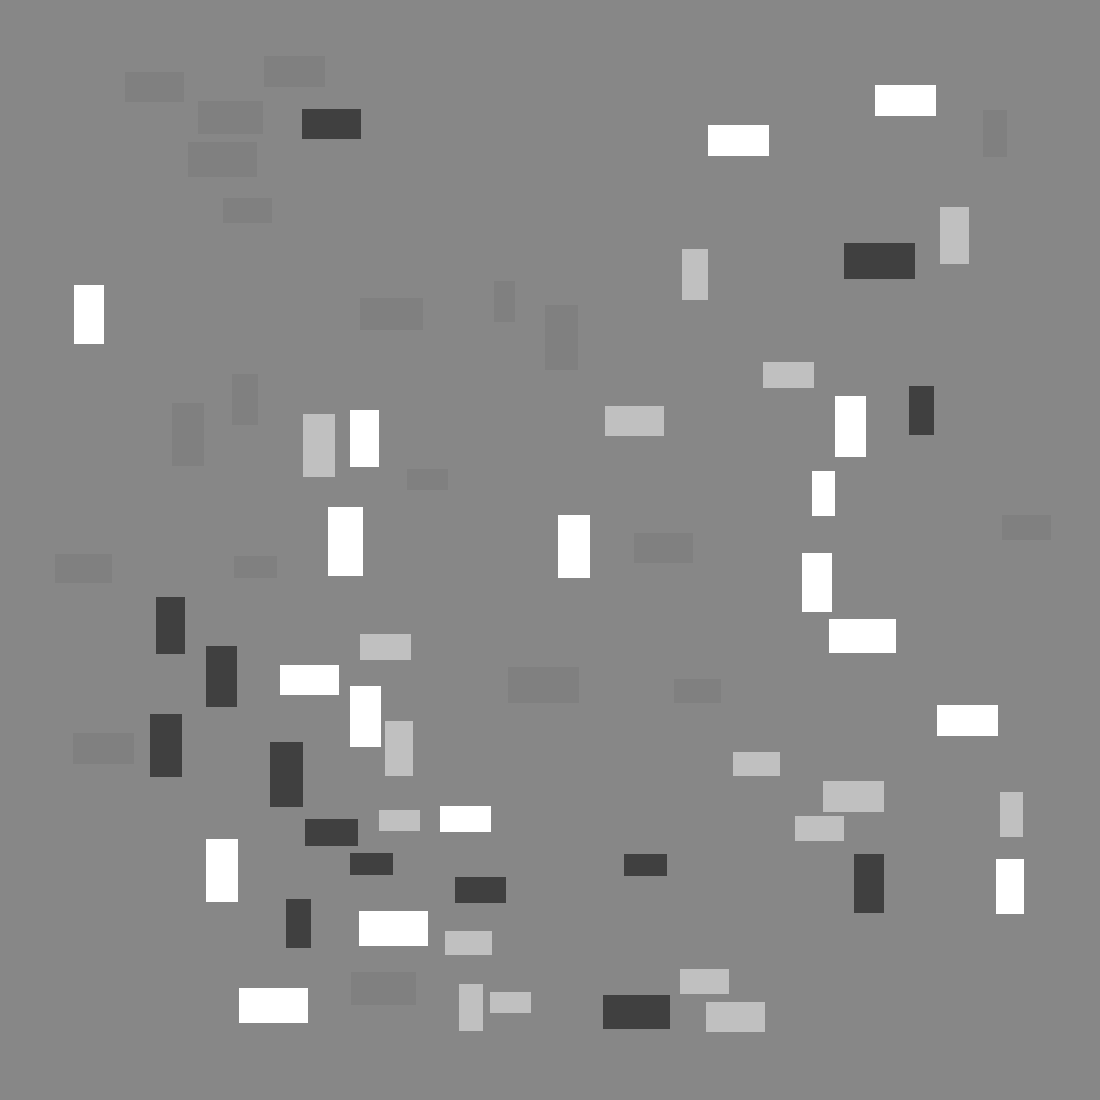

35 70


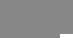

sum 380730 326640
30 60


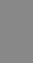

sum 280665 249480
128 135


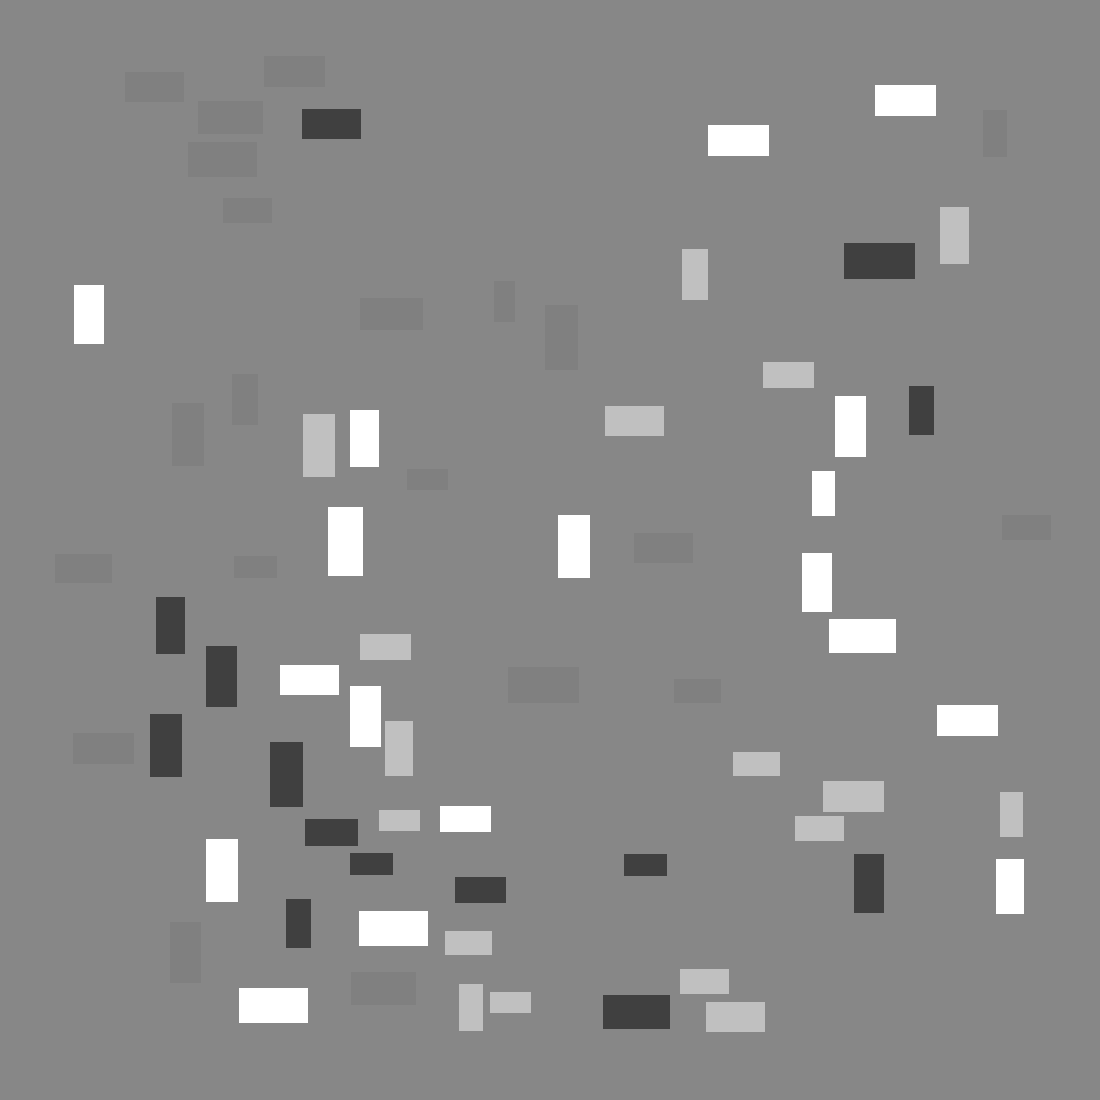

23 46


sum 171990 152880
192 135


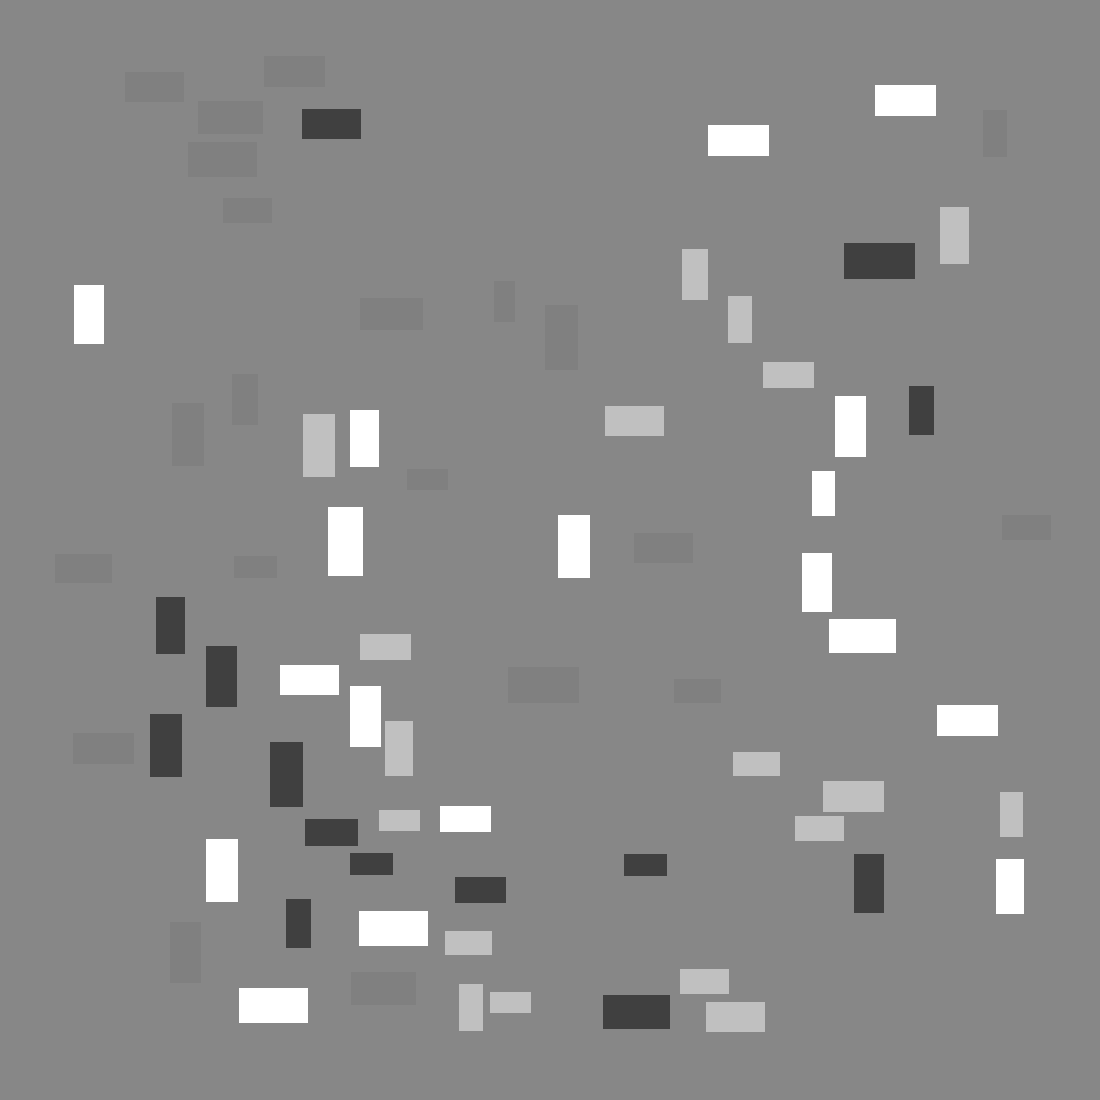

20 40


sum 133515 118680
255 135


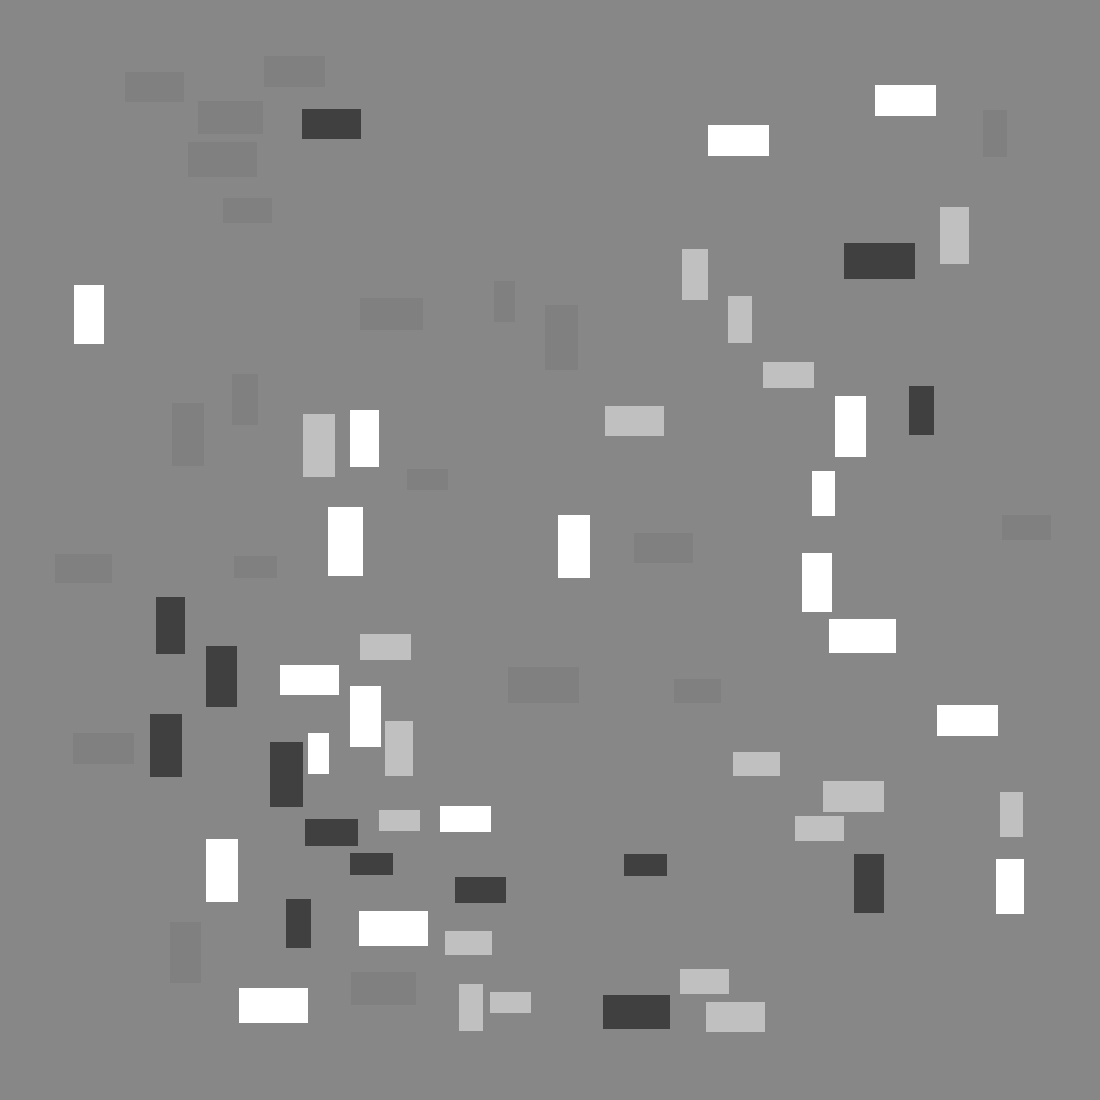

20 40


sum 105754 146441
23 46


sum 171990 152880
128 135


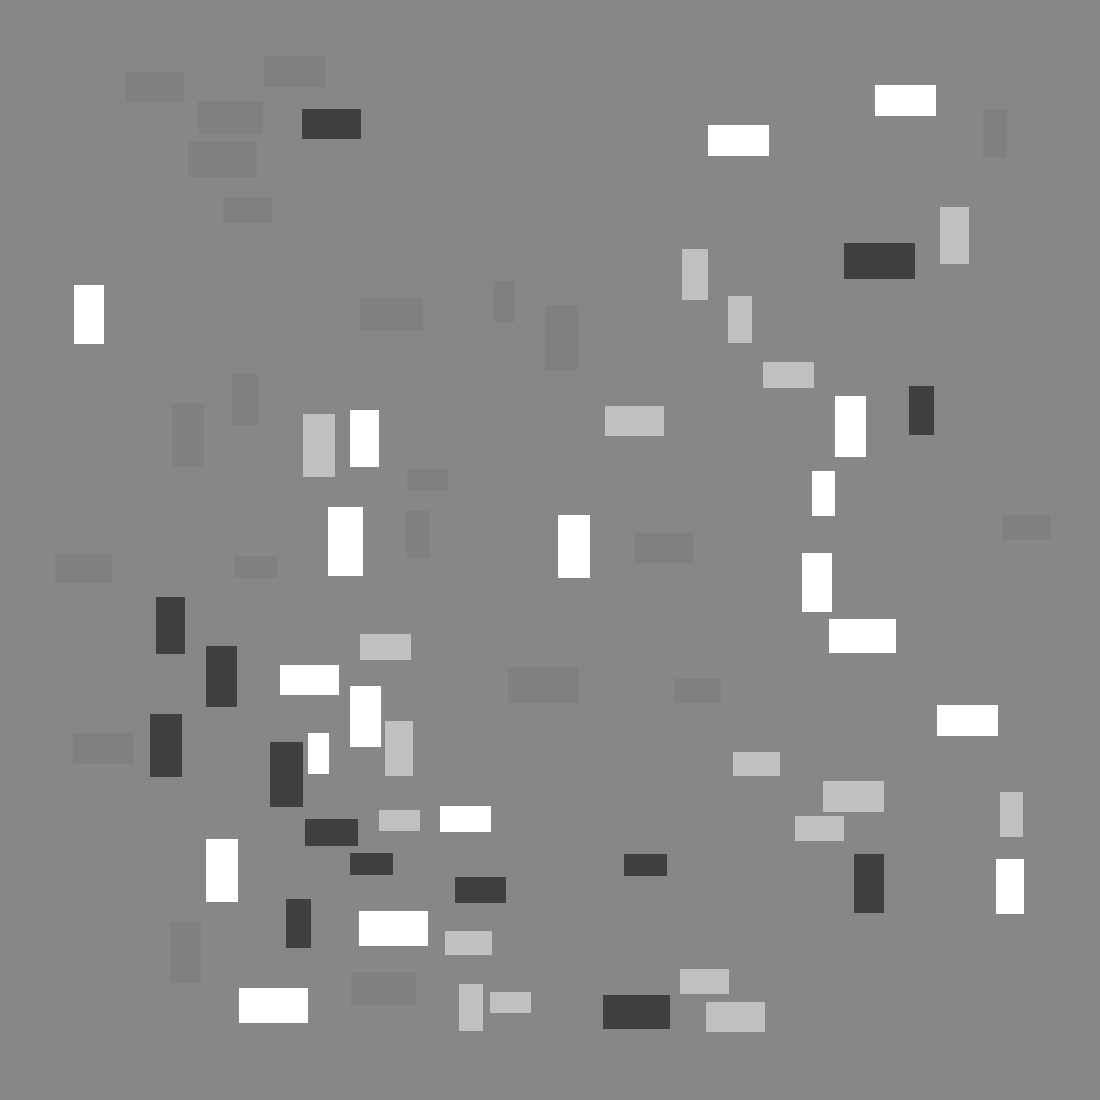

20 40


sum 133515 118680
0 135


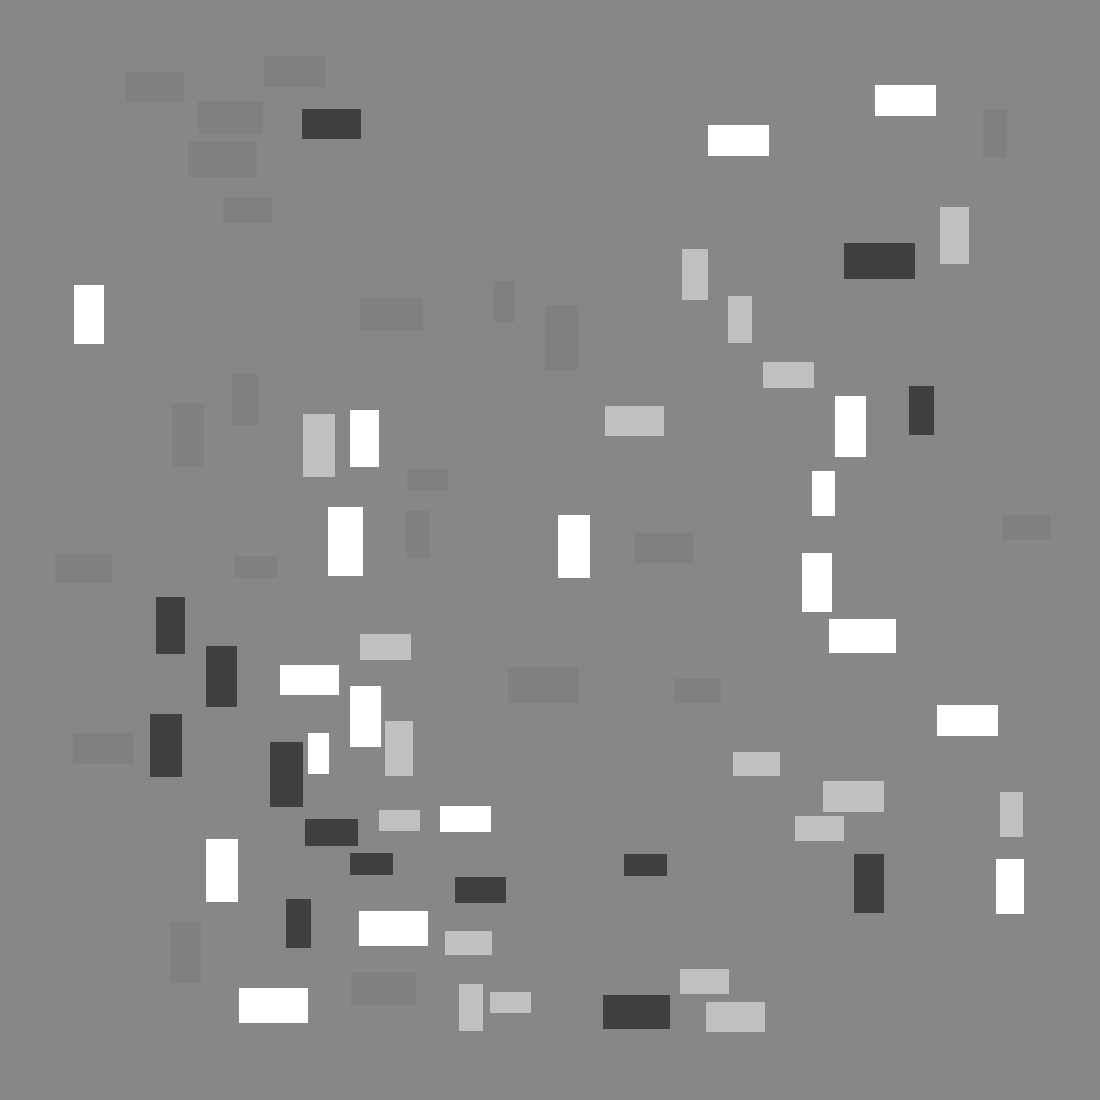

27 54


sum 230850 205200
255 135


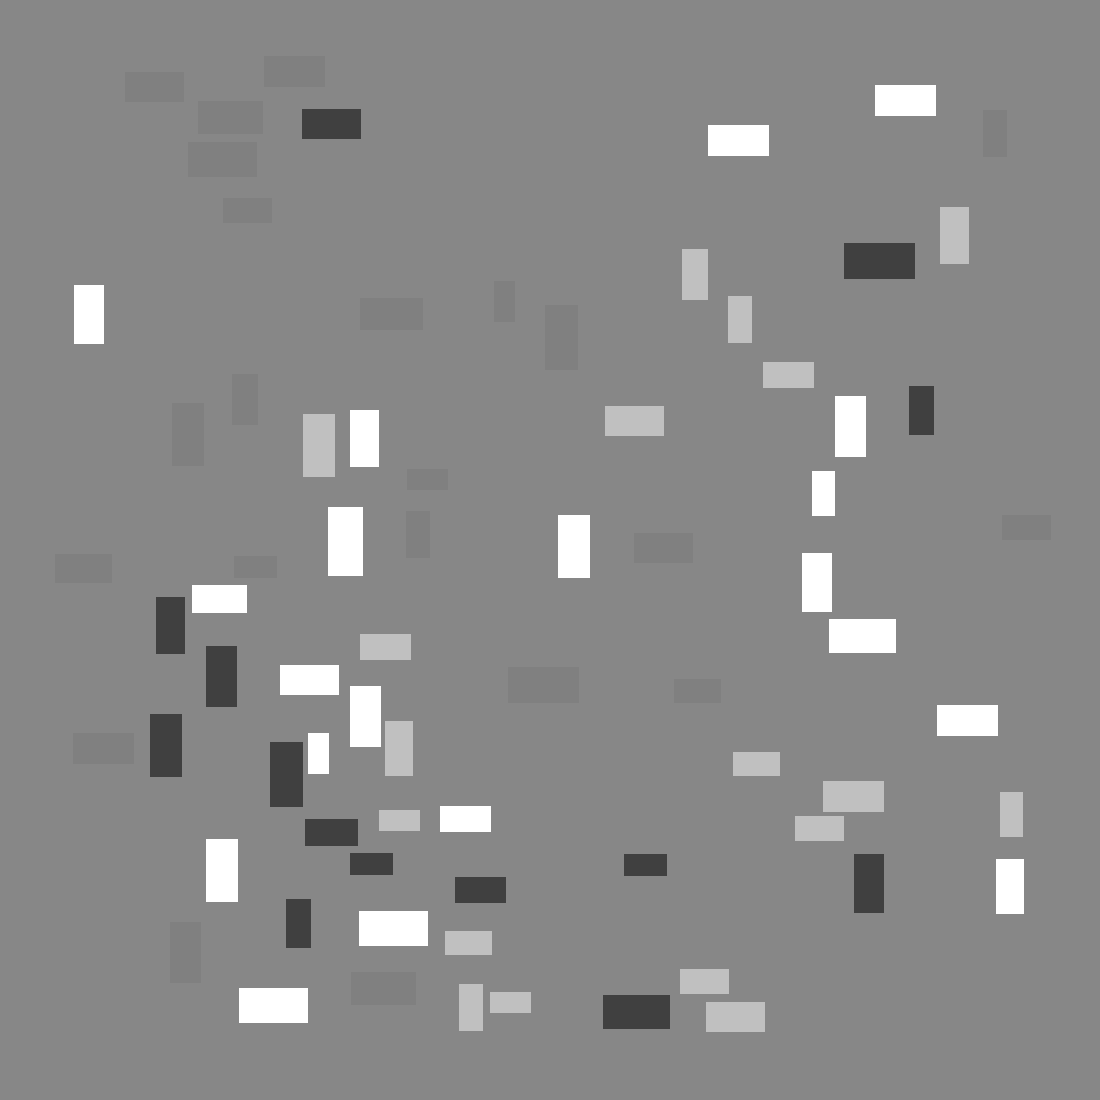

35 70


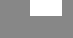

sum 435930 271440
28 56


sum 363315 103080
23 46


sum 171990 152880
128 135


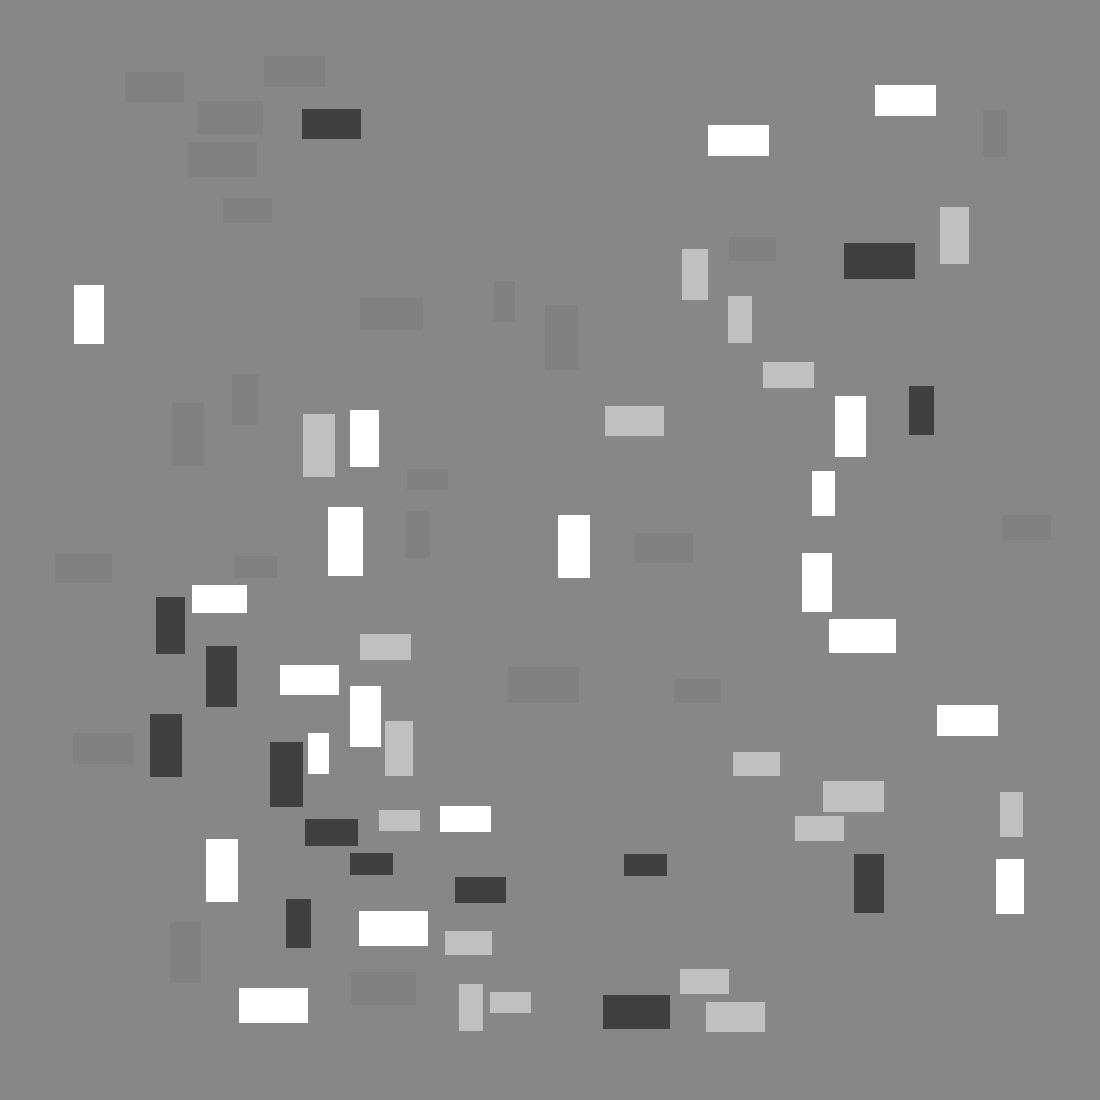

35 70


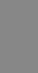

sum 374490 332880
128 135


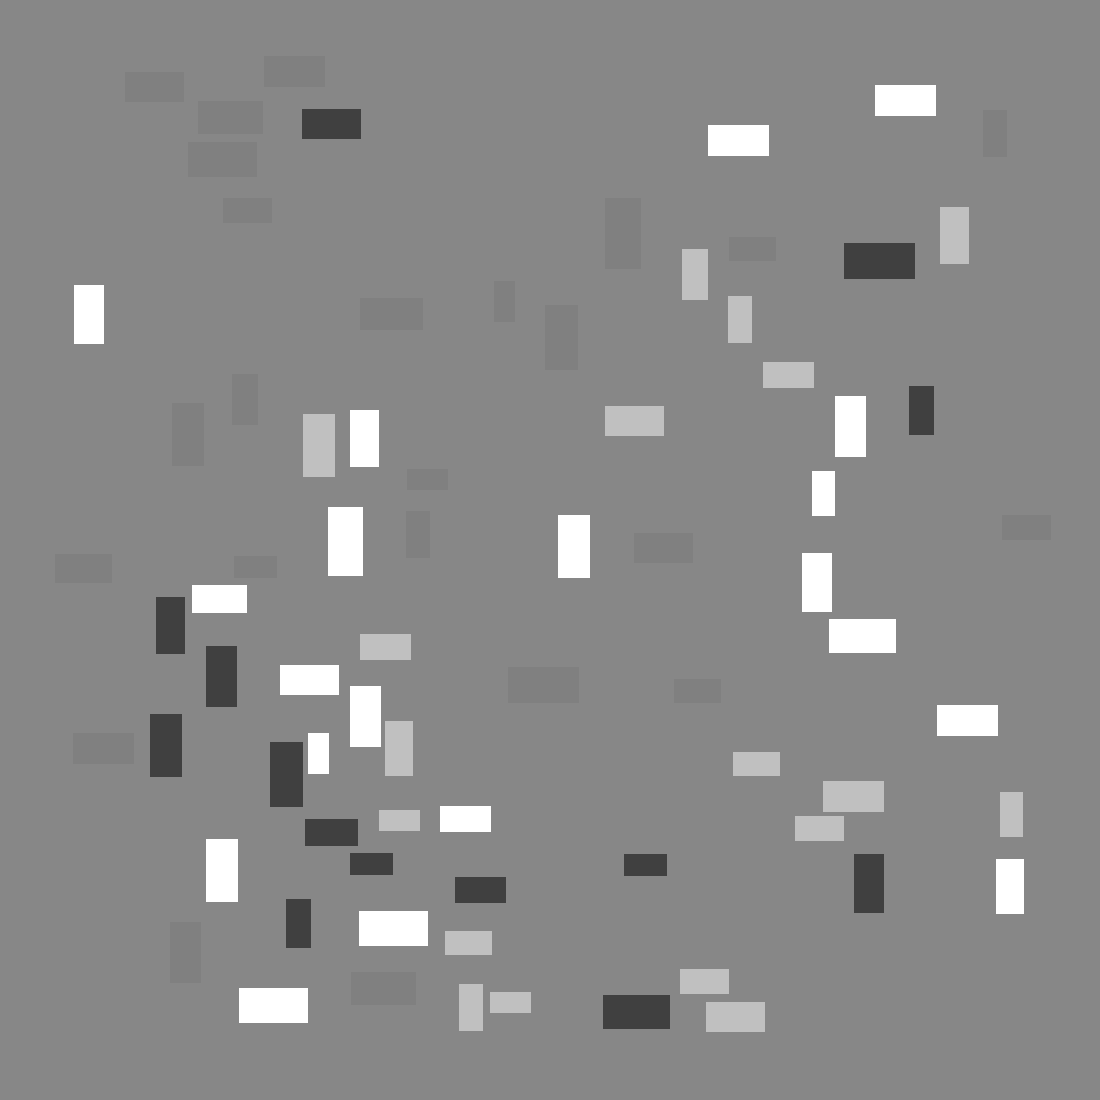

23 46


sum 171990 152880
255 135


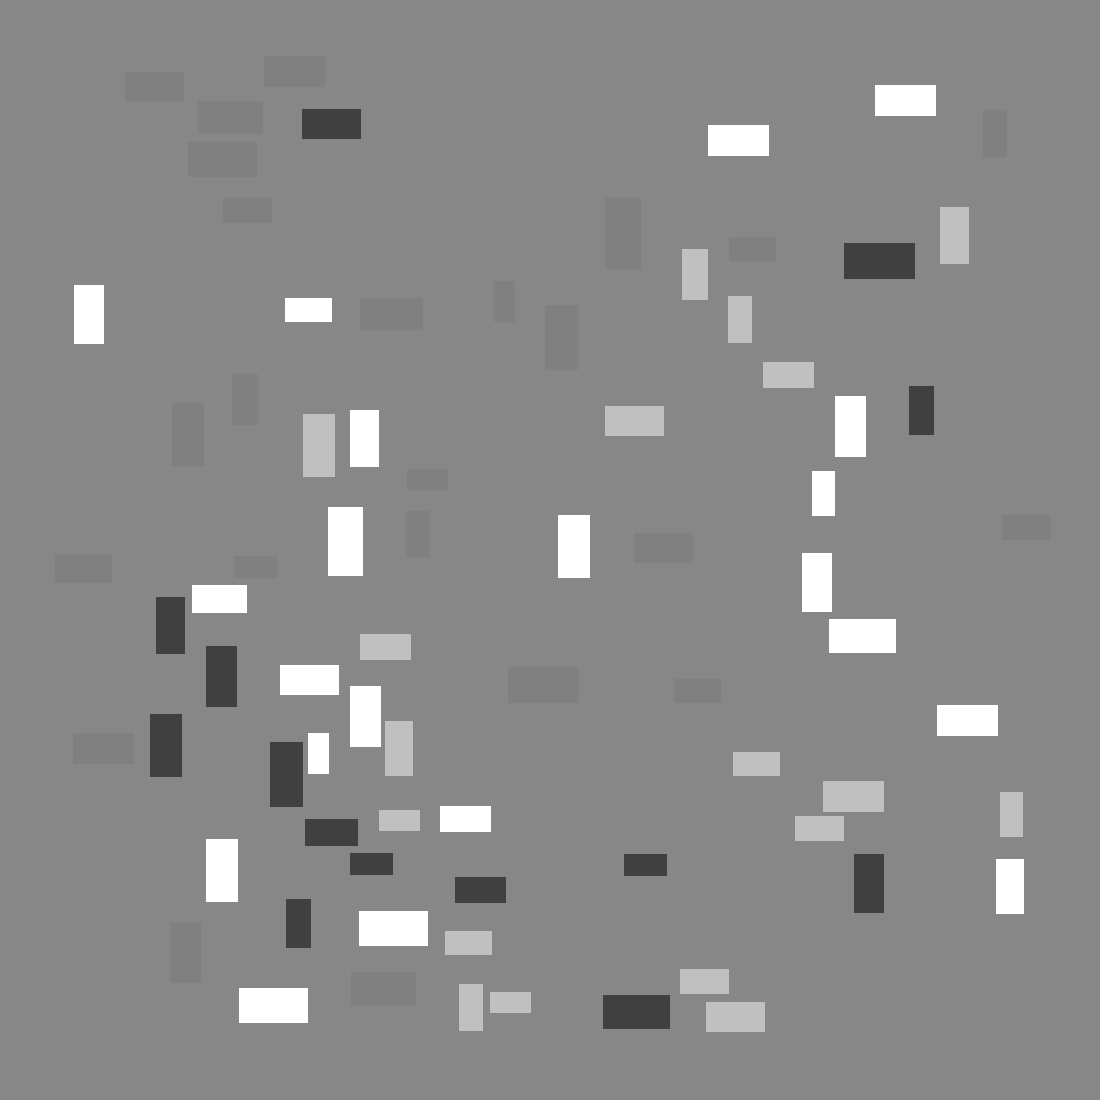

32 64


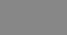

sum 316575 281400
192 135


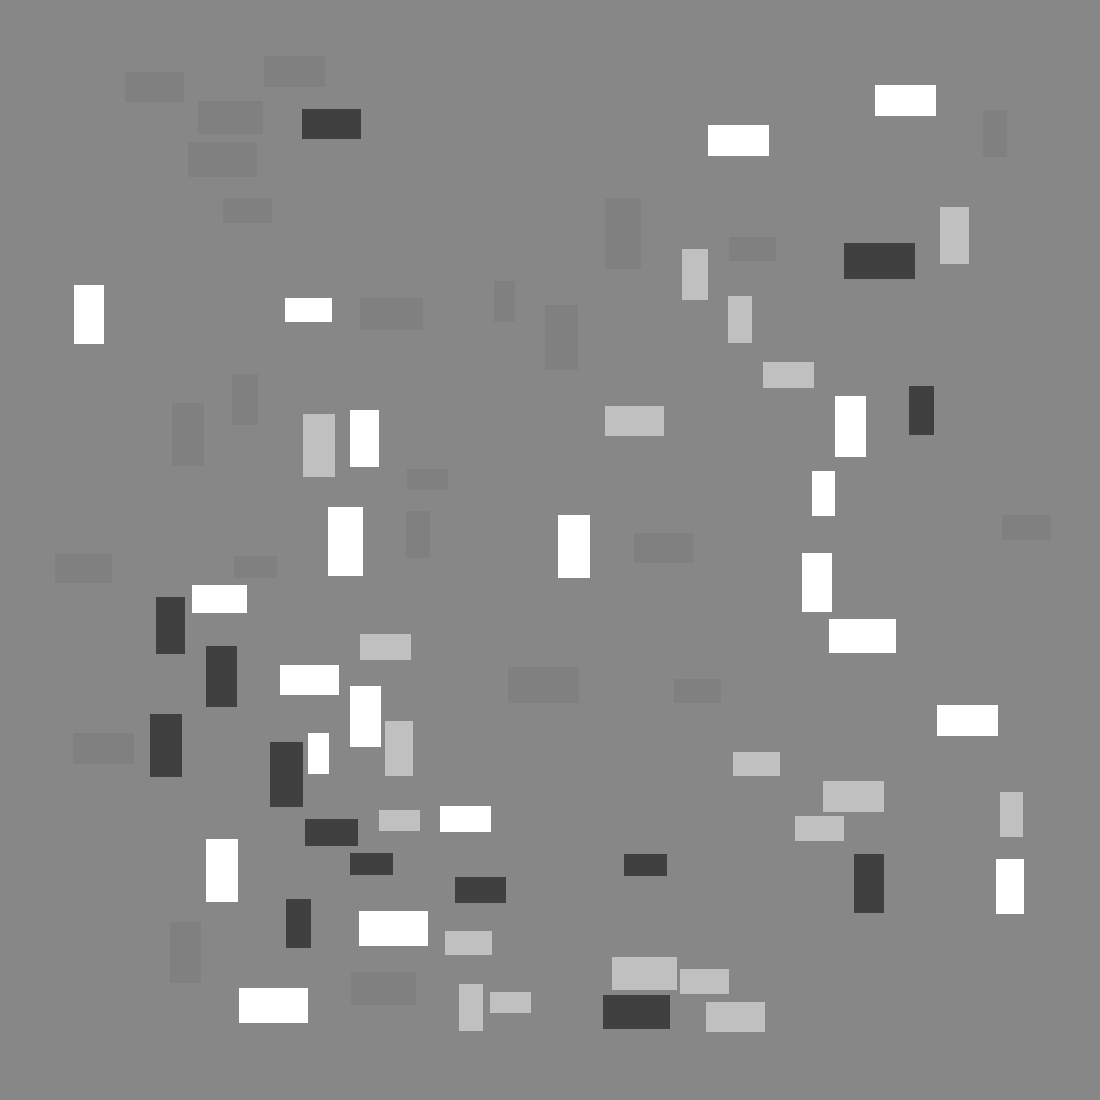

26 52


sum 215325 191400
0 135


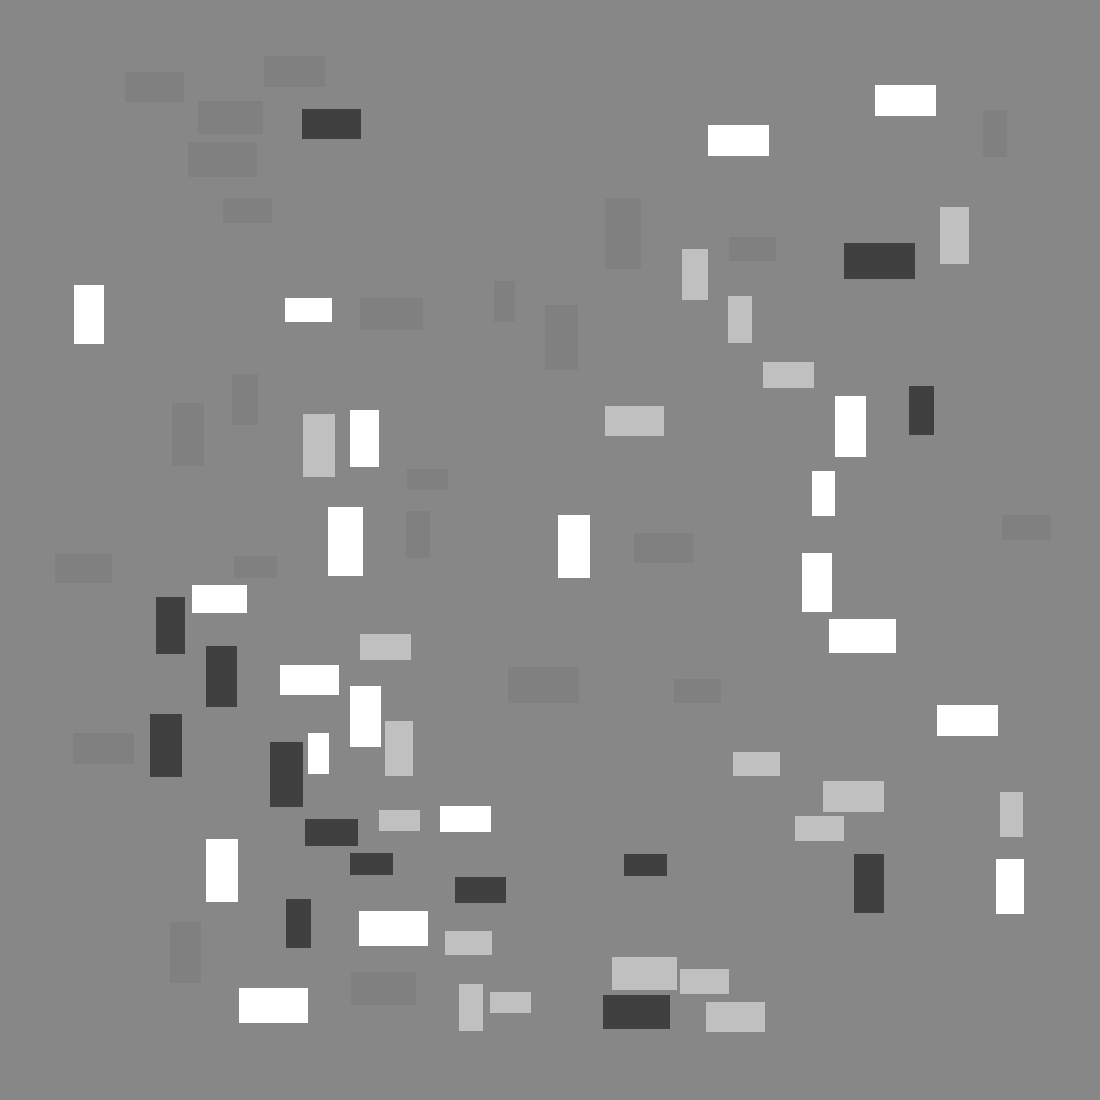

26 52


sum 252285 154440
27 54


sum 199000 237050
20 40


sum 133515 118680
64 135


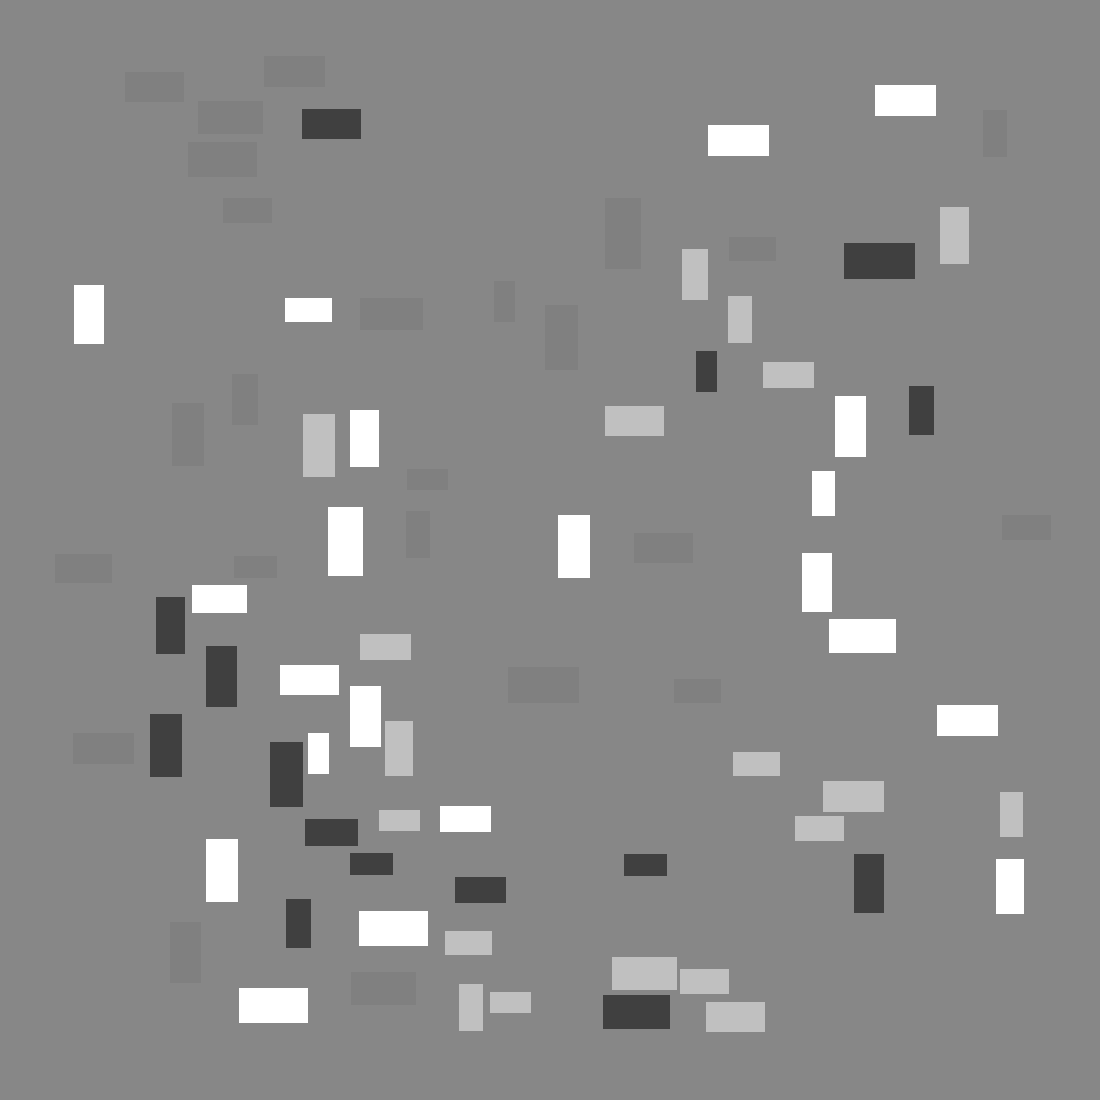

33 66


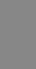

sum 335340 298080
64 135


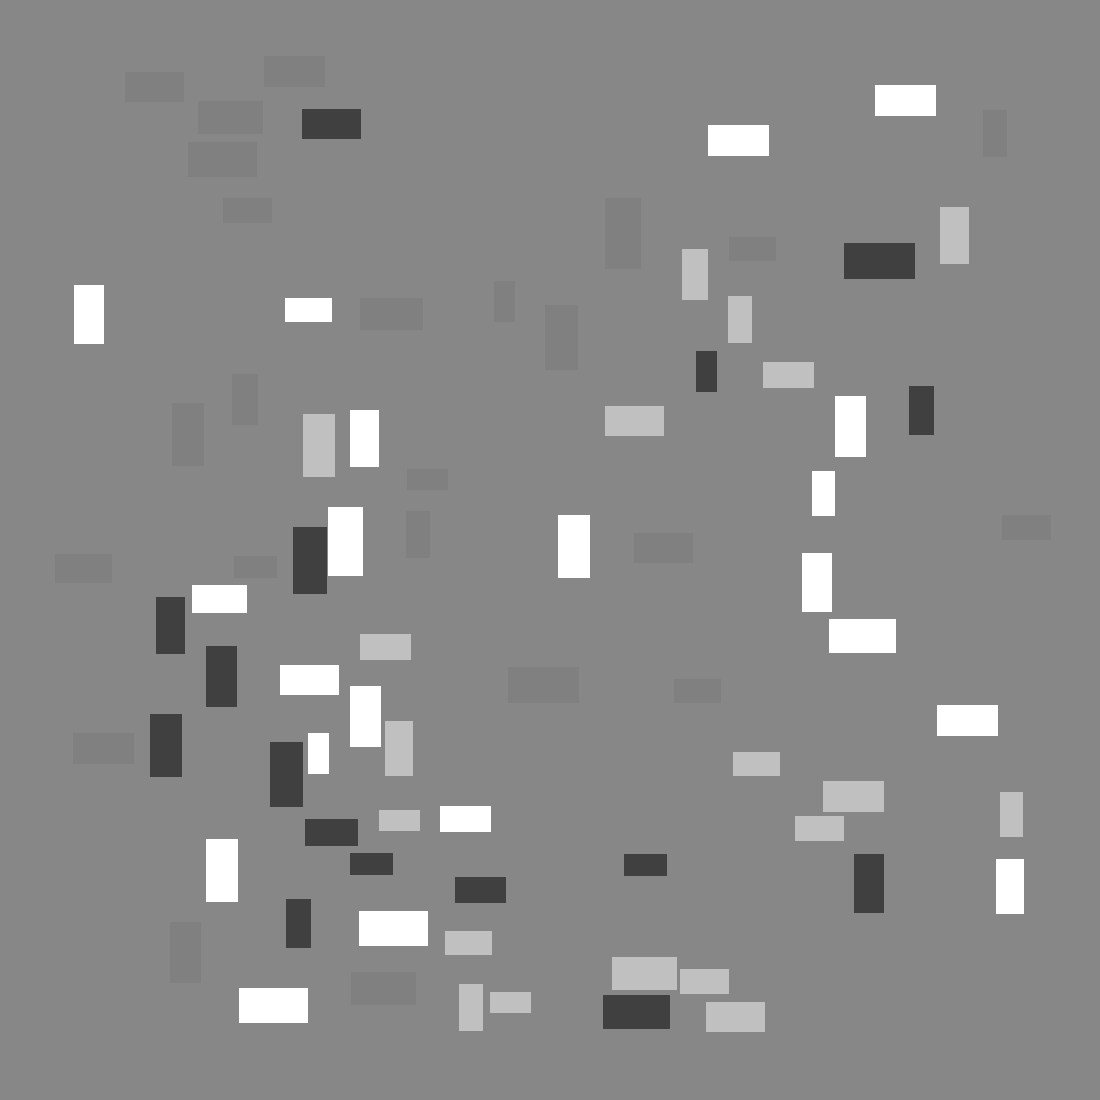

34 68


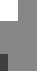

sum 390349 279536
24 48


sum 185895 165240
255 135


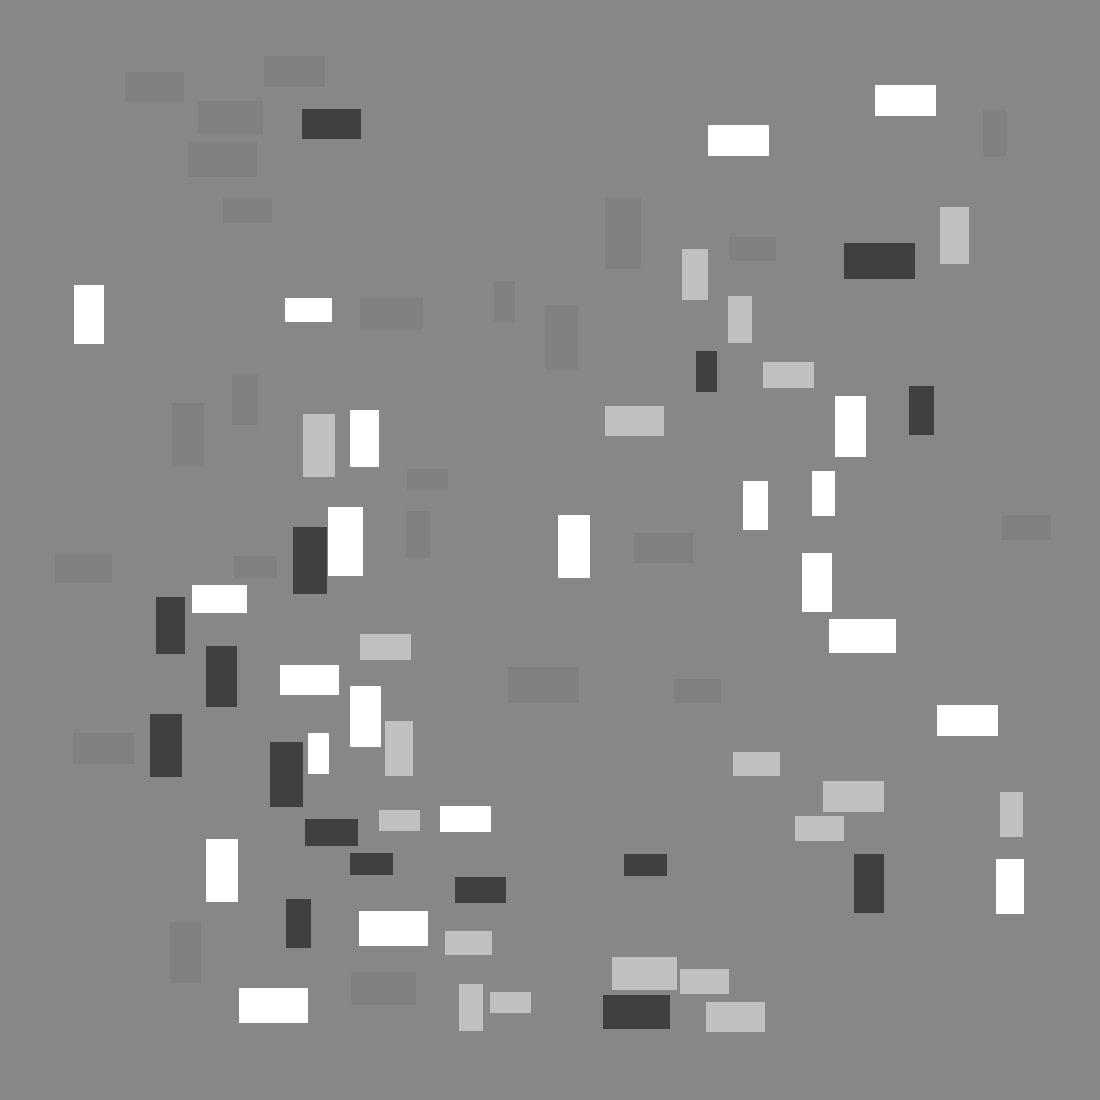

27 54


sum 230850 205200
0 135


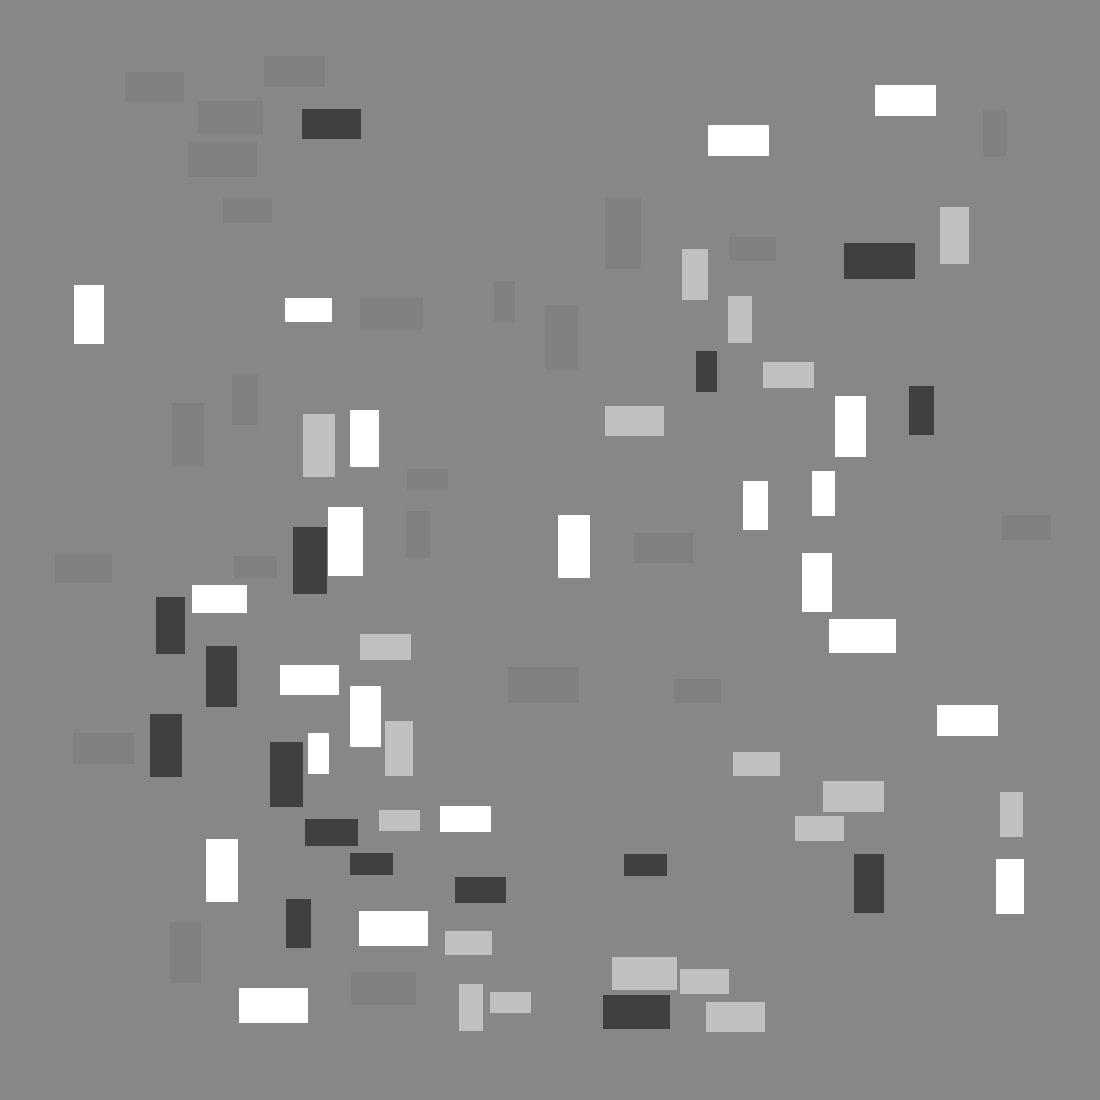

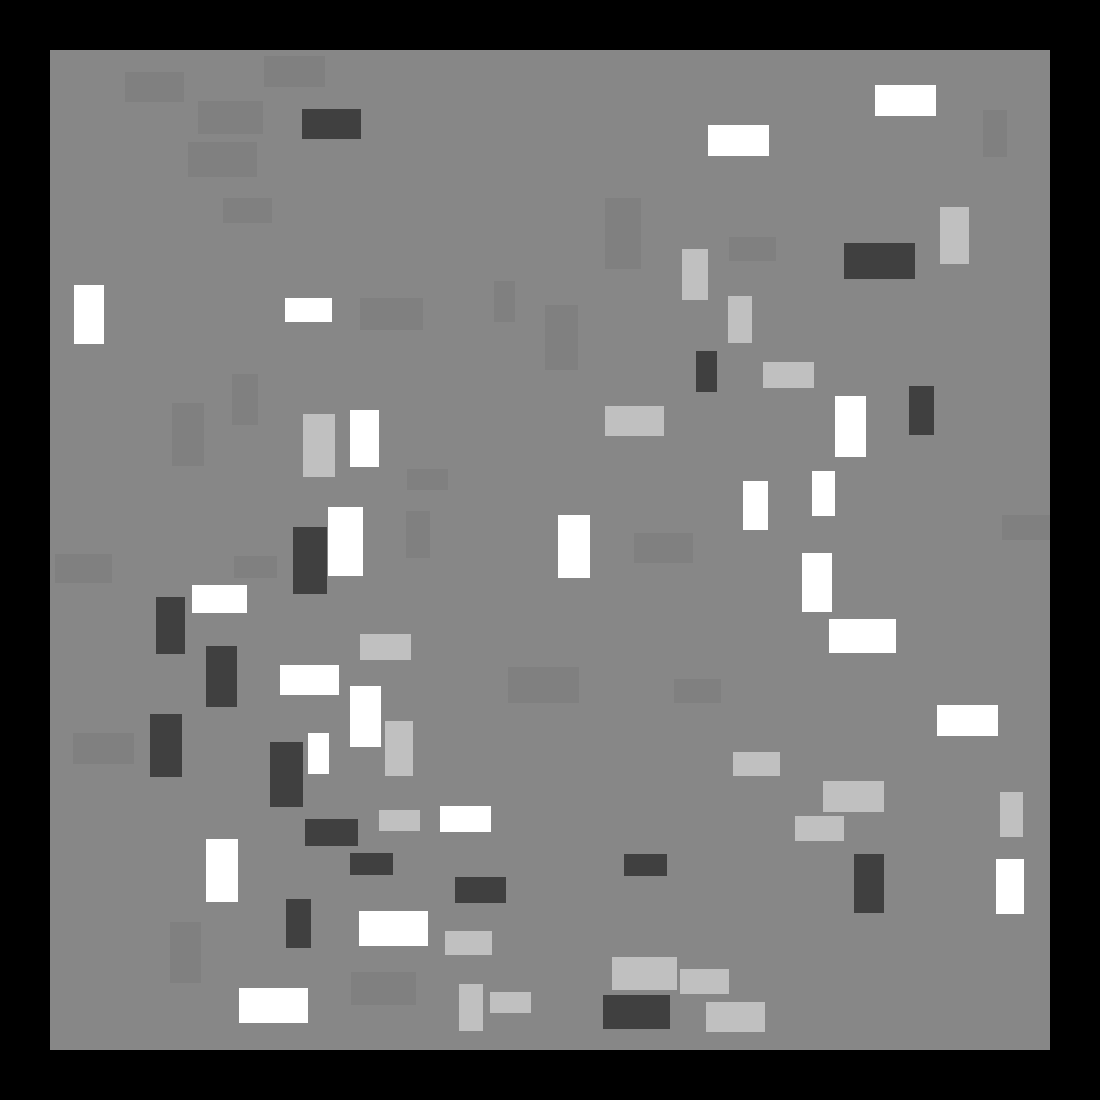

In [2]:
import cv2
import numpy as np

# Example usage of create_rectangles function
Vf=[0, 64, 128, 192, 255]
Vb=[127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255]
img = create_rectangles(500, 500, 50, 100, 20, 35, 2, [1, 2], Vf, Vb)
cv2_imshow(img)
cv2.imwrite('output.png', img)
cv2.waitKey()
cv2.destroyAllWindows()

The code defines a function called create_rectangles that generates a binary image of specified size and populates it with non-overlapping rectangles. The function takes the following arguments:

- M: an integer that represents the height of the image (excluding the border)
- N: an integer that represents the width of the image (excluding the border)
- border: an integer that represents the thickness of the border
- n: an integer that represents the number of rectangles to be placed in the image
- w1: an integer that represents the minimum width of the rectangles
- w2: an integer that represents the maximum width of the rectangles
- alpha: a float that represents the aspect ratio of the rectangles
orientation: a list that specifies the possible orientations of the rectangles. It can be either [1,2] (horizontal and vertical) or [1] (horizontal only)
- Vf: a list of integer values that represent the possible foreground intensities of the rectangles (optional)
- Vb: a list of integer values that represent the possible background intensities of the image (optional)
The function starts by creating a blank grayscale image of size (M+2*border, N+2*border). If Vb is not provided, the background color of the image is set to white (255), otherwise, a random value from Vb is chosen as the background color.

The function then proceeds to place n rectangles in the image. For each rectangle, a random width w is chosen between w1 and w2, and the height is calculated as h = w * alpha. The orientation of the rectangle is randomly chosen from the values specified in orientation. The rectangle is placed at a random position within the image such that it does not overlap with any of the previously placed rectangles. To check for overlaps, a sub-image around the proposed position of the rectangle is extracted from the main image, and the sum of pixel intensities (after negation if necessary) is computed. If the sum is zero, the position is accepted, and the rectangle is drawn on the image with a foreground intensity chosen either randomly from Vf or set to maximum if Vf is not provided. If Vf is provided and a foreground intensity is chosen, it must be different from the background intensity vb. If Vf is not provided, the foreground intensity is set to maximum.

If a non-overlapping position cannot be found after 2*n attempts, the size of the image is doubled, and the placement process starts over. Once all rectangles have been placed, the function adds the specified border to the image and returns it.